In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
from datetime import date, datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import sklearn

In [2]:
#Importing warnings to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting options
pd.options.display.max_columns = 150

In [4]:
#Reading data with applied method to convert invalid values to NaN
data = pd.read_csv("ConsumerElectronics.csv", low_memory = False, na_values=['\\N', ' '])

In [5]:
#Checking the number of rows & columns
data.shape

(1648824, 20)

In [6]:
#Exploring the first few rows of the dataset
data.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id     gmv  units  deliverybdays  deliverycdays  \
0   3.419301e+15  6400.0      1            NaN            NaN   
1   1.420831e+15  6900.0      1            NaN            NaN   
2   2.421913e+15  1990.0      1            NaN            NaN   
3   4.416592e+15  1690.0      1            NaN            NaN   
4   4.419525e+15  1618.0      1            NaN            NaN   

  s1_fact.order_payment_type  sla       cust_id       pincode  \
0                        COD    5 -1.012991e+18 -7.791756e+18   
1                        COD    7 -8.990325e+18  7.335411e+18   
2                        COD   10 -1.040443e+18 -7.477688e+18   
3                    Prepaid    4 -7.604961e+18 -5.835932e+18   
4                    Prepaid    6  2.894557e+18  5.347354e+17   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3

In [7]:
#Different product analytic categories & their respective record count
data.product_analytic_category.astype('category').value_counts()

EntertainmentSmall    944698
CameraAccessory       257493
GamingHardware        230958
GameCDDVD             114503
Camera                101172
Name: product_analytic_category, dtype: int64

In [8]:
#Different product analytic sub categories & their respective record count
data.product_analytic_sub_category.astype('category').value_counts()

Speaker                543928
CameraAccessory        239508
GamingAccessory        201899
TVVideoSmall           142995
HomeAudio              124860
Game                   114406
AudioMP3Player         112892
Camera                 101172
GamingConsole           29059
CameraStorage           17985
AudioAccessory          11713
HomeTheatre              4254
AmplifierReceiver        4056
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [9]:
#Exploring the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1643920 non-null float64
units                              1648824 non-null int64
deliverybdays                      335852 non-null float64
deliverycdays                      335853 non-null float64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1648824 non-null object
p

In [10]:
print("Percentage of unique orders for the 3 categories:",len(data.loc[(data['product_analytic_sub_category']=='GamingAccessory') | (data['product_analytic_sub_category']=='CameraAccessory') | (data['product_analytic_sub_category']=='HomeAudio')].drop_duplicates(subset = ["order_id"], keep = False))/len(data.loc[((data['product_analytic_sub_category']=='GamingAccessory') | (data['product_analytic_sub_category']=='CameraAccessory') | (data['product_analytic_sub_category']=='HomeAudio'))])*100)

Percentage of unique orders for the 3 categories: 81.95886392814697


In [11]:
print("Percentage of unique orders for all the categories:",len(data.drop_duplicates(subset = ["order_id"], keep = False))/len(data)*100)

Percentage of unique orders for all the categories: 83.02159599811745


In [12]:
# Duplicate rows removal from the dataset
data = data.drop_duplicates(subset = ["order_date", "order_id", "order_item_id" ,"units"], keep = 'first', inplace = False)

In [13]:
#Checking the shape of the dataframe
data.shape

(1536296, 20)

In [14]:
print("Number of duplicate records removed:", 1648824 - 1536296)

Number of duplicate records removed: 112528


In [15]:
#Converting order_date column to datetime format
data['order_datetime'] = pd.to_datetime(data['order_date'], format='%Y-%m-%d %H:%M:%S') 

In [16]:
#Let's check the data type of the column order_datetime, it should be dateTime
data[['order_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536296 entries, 0 to 1543996
Data columns (total 1 columns):
order_datetime    1536296 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 23.4 MB


In [17]:
#Creating order_date column from order_datetime column
data['order_date'] = data['order_datetime'].dt.date

In [18]:
#Checking the order_date column
data[['order_datetime','order_date']].head()

order_datetime  order_date
0 2015-10-17 15:11:54  2015-10-17
1 2015-10-19 10:07:22  2015-10-19
2 2015-10-20 15:45:56  2015-10-20
3 2015-10-14 12:05:15  2015-10-14
4 2015-10-17 21:25:03  2015-10-17

In [19]:
#Checking the starting & ending order dates in the provided data
print("Transaction start date: ",min(data.order_date))
print("Transaction end date: ", max(data.order_date))

Transaction start date:  2015-05-19
Transaction end date:  2016-07-25


#### As its mentioned to use the data from  July 2015 to June 2016, let's filter accordingly

In [20]:
#Filtering rows based upon start date & end date (edited)
startdate = pd.to_datetime("2015-07-01").date()
enddate = pd.to_datetime("2016-06-30").date()
data = data.loc[(data['order_date']>=startdate) & (data['order_date']<=enddate)]

In [21]:
#Checking the number of rows
len(data)

1535689

In [22]:
print("Error rows removed: ",1536296-1535689)

Error rows removed:  607


In [23]:
#Creating new column i.e. order_week which would contain week number when order is placed
data['order_week'] = data['order_datetime'].dt.week

In [24]:
data.head()

fsn_id  order_date  Year  Month      order_id  order_item_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3.419301e+15   3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1.420831e+15   1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2.421913e+15   2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4.416592e+15   4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4.419525e+15   4.419525e+15   

      gmv  units  deliverybdays  deliverycdays s1_fact.order_payment_type  \
0  6400.0      1            NaN            NaN                        COD   
1  6900.0      1            NaN            NaN                        COD   
2  1990.0      1            NaN            NaN                        COD   
3  1690.0      1            NaN            NaN                    Prepaid   
4  1618.0      1            NaN            NaN                    Prepaid   

   sla       cust_id       pincode product_analytic_super_category  \
0    5 -1.012991e+18 -7.791756e+18                              CE   
1    7 -8.990325e+18  7.335411e+18                              CE   
2   10 -1.040443e+18 -7.477688e+18                              CE   
3    4 -7.604961e+18 -5.835932e+18                              CE   
4    6  2.894557e+18  5.347354e+17                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod         7190                        0   
1              CameraTripod         7190                        0   
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   

       order_datetime  order_week  
0 2015-10-17 15:11:54          42  
1 2015-10-19 10:07:22          43  
2 2015-10-20 15:45:56          43  
3 2015-10-14 12:05:15          42  
4 2015-10-17 21:25:03          42

In [25]:
#Function to check  null percentages in the data
def getNullPercentages(df):
    return np.round(pd.isnull(df).sum()/len(df)*100,4).sort_values(ascending = False)

In [26]:
#Checking the perecentages of nulls in the columns
getNullPercentages(data)

deliverybdays                      78.2881
deliverycdays                      78.2881
product_analytic_vertical           0.3773
pincode                             0.2616
cust_id                             0.2616
gmv                                 0.2616
order_week                          0.0000
order_date                          0.0000
Year                                0.0000
Month                               0.0000
order_id                            0.0000
order_item_id                       0.0000
units                               0.0000
s1_fact.order_payment_type          0.0000
order_datetime                      0.0000
sla                                 0.0000
product_analytic_super_category     0.0000
product_analytic_category           0.0000
product_analytic_sub_category       0.0000
product_mrp                         0.0000
product_procurement_sla             0.0000
fsn_id                              0.0000
dtype: float64

In [27]:
data.shape

(1535689, 22)

In [28]:
#Checking the data where deliverybdays is null
data.loc[pd.isnull(data['deliverybdays'])].head(20)

fsn_id  order_date  Year  Month      order_id  order_item_id  \
0   ACCCX3S58G7B5F6P  2015-10-17  2015     10  3.419301e+15   3.419301e+15   
1   ACCCX3S58G7B5F6P  2015-10-19  2015     10  1.420831e+15   1.420831e+15   
2   ACCCX3S5AHMF55FV  2015-10-20  2015     10  2.421913e+15   2.421913e+15   
3   ACCCX3S5AHMF55FV  2015-10-14  2015     10  4.416592e+15   4.416592e+15   
4   ACCCX3S5AHMF55FV  2015-10-17  2015     10  4.419525e+15   4.419525e+15   
5   ACCCX3S5JGAJETYR  2015-10-17  2015     10  3.419189e+15   3.419189e+15   
6   ACCCX3S5JGAJETYR  2015-10-16  2015     10  3.418429e+15   3.418429e+15   
7   ACCCX3S5JGAJETYR  2015-10-15  2015     10  3.417799e+15   3.417799e+15   
8   ACCCX3S5JGAJETYR  2015-10-16  2015     10  2.417870e+15   2.417870e+15   
9   ACCCX3S5JGAJETYR  2015-10-25  2015     10  4.426482e+15   4.426482e+15   
10  ACCCX3S5JGAJETYR  2015-10-19  2015     10  2.420829e+15   2.420829e+15   
11  ACCCX3SG2GG9YYAH  2015-10-06  2015     10  1.410089e+15   1.410089e+15   
12  ACCCX3SG2GG9YYAH  2015-10-10  2015     10  3.413503e+15   3.413503e+15   
13  ACCCX3SG2GG9YYAH  2015-10-13  2015     10  4.416128e+15   4.416128e+15   
14  ACCCX3SG2GG9YYAH  2015-10-14  2015     10  3.416931e+15   3.416931e+15   
15  ACCCX3SG2GG9YYAH  2015-10-15  2015     10  2.417575e+15   2.417575e+15   
16  ACCCX3SG2GG9YYAH  2015-10-16  2015     10  3.418345e+15   3.418345e+15   
17  ACCCX3SG2GG9YYAH  2015-10-16  2015     10  2.418725e+15   2.418725e+15   
18  ACCCX3SG2GG9YYAH  2015-10-17  2015     10  3.419396e+15   3.419396e+15   
19  ACCCX3SG2GG9YYAH  2015-10-15  2015     10  4.417632e+15   4.417632e+15   

       gmv  units  deliverybdays  deliverycdays s1_fact.order_payment_type  \
0   6400.0      1            NaN            NaN                        COD   
1   6900.0      1            NaN            NaN                        COD   
2   1990.0      1            NaN            NaN                        COD   
3   1690.0      1            NaN            NaN                    Prepaid   
4   1618.0      1            NaN            NaN                    Prepaid   
5   3324.0      1            NaN            NaN                    Prepaid   
6   3695.0      1            NaN            NaN                    Prepaid   
7   3695.0      1            NaN            NaN                        COD   
8      NaN      1            NaN            NaN                    Prepaid   
9   3695.0      1            NaN            NaN                        COD   
10  3695.0      1            NaN            NaN                        COD   
11  6750.0      1            NaN            NaN                    Prepaid   
12  6750.0      1            NaN            NaN                    Prepaid   
13  6675.0      1            NaN            NaN                    Prepaid   
14  6750.0      1            NaN            NaN                    Prepaid   
15  6749.0      1            NaN            NaN                        COD   
16  6075.0      1            NaN            NaN                    Prepaid   
17  6670.0      1            NaN            NaN                        COD   
18  6749.0      1            NaN            NaN                        COD   
19  6749.0      1            NaN            NaN                    Prepaid   

    sla       cust_id       pincode product_analytic_super_category  \
0     5 -1.012991e+18 -7.791756e+18                              CE   
1     7 -8.990325e+18  7.335411e+18                              CE   
2    10 -1.040443e+18 -7.477688e+18                              CE   
3     4 -7.604961e+18 -5.835932e+18                              CE   
4     6  2.894557e+18  5.347354e+17                              CE   
5     5 -7.641546e+18 -1.919053e+18                              CE   
6     6 -7.156140e+16  6.404913e+18                              CE   
7     5  9.173276e+18 -1.606303e+18                              CE   
8     9           NaN           NaN                              CE   
9     7 -7.809156e+18 -9.7

In [29]:
#Let's remove the columns deliverybdays & deliverycdays as there are 79% null values
data.drop(['deliverybdays', 'deliverycdays'], axis = 1, inplace = True)

In [30]:
#Checking the perecentages of nulls in the columns
getNullPercentages(data)

product_analytic_vertical          0.3773
pincode                            0.2616
cust_id                            0.2616
gmv                                0.2616
order_week                         0.0000
units                              0.0000
order_date                         0.0000
Year                               0.0000
Month                              0.0000
order_id                           0.0000
order_item_id                      0.0000
sla                                0.0000
s1_fact.order_payment_type         0.0000
order_datetime                     0.0000
product_analytic_super_category    0.0000
product_analytic_category          0.0000
product_analytic_sub_category      0.0000
product_mrp                        0.0000
product_procurement_sla            0.0000
fsn_id                             0.0000
dtype: float64

In [31]:
#Dropping rows containing nulls in the product_analytic_vertical column
data = data.loc[~pd.isnull(data['product_analytic_vertical'])]

In [32]:
#Checking the various payment types
data['s1_fact.order_payment_type'].astype('category').value_counts()

COD        1102785
Prepaid     427110
Name: s1_fact.order_payment_type, dtype: int64

In [33]:
print("Which shows that most i.e.,",np.round(1102785/len(data)*100,2),"percent of the transactions were COD transactions")

Which shows that most i.e., 72.08 percent of the transactions were COD transactions


#### Therfore, we have only two types of payments i.e. COD & Prepaid

In [34]:
#Converting scientific notations in columns order_id, order_item_id, cust_id, pincode to integer format
data['cust_id']=  data['cust_id'].apply(lambda x: '{:.0f}'.format(x))
data['order_id']=  data['order_id'].apply(lambda x: '{:.0f}'.format(x))
data['order_item_id']=  data['order_item_id'].apply(lambda x: '{:.0f}'.format(x))
data['pincode']=  data['pincode'].apply(lambda x: '{:.0f}'.format(x))

In [35]:
#Checking the dataframe
data.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units s1_fact.order_payment_type  sla  \
0  3419300926147000  6400.0      1                        COD    5   
1  1420830839915200  6900.0      1                        COD    7   
2  2421912925714800  1990.0      1                        COD   10   
3  4416592101738400  1690.0      1                    Prepaid    4   
4  4419525153426400  1618.0      1                    Prepaid    6   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod         7190                        0   
1              CameraTripod         7190                        0   
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   

       order_datetime  order_week  
0 2015-10-17 15:11:54          42  
1 2015-10-19 10:07:22          43  
2 2015-10-20 15:45:56          43  
3 2015-10-14 12:05:15          42  
4 2015-10-17 21:25:03          42

In [36]:
#Number of unique orders
len(data.order_id.unique())/len(data)

0.9771448367371617

In [37]:
#Checking the perecentages of nulls in the columns
getNullPercentages(data)

gmv                                0.2618
order_week                         0.0000
order_datetime                     0.0000
order_date                         0.0000
Year                               0.0000
Month                              0.0000
order_id                           0.0000
order_item_id                      0.0000
units                              0.0000
s1_fact.order_payment_type         0.0000
sla                                0.0000
cust_id                            0.0000
pincode                            0.0000
product_analytic_super_category    0.0000
product_analytic_category          0.0000
product_analytic_sub_category      0.0000
product_analytic_vertical          0.0000
product_mrp                        0.0000
product_procurement_sla            0.0000
fsn_id                             0.0000
dtype: float64

#### January 2016 onwards should be week 54 as per our analysis

In [38]:
data.loc[data.Year == 2016].head()

fsn_id  order_date  Year  Month          order_id  \
3089  ACCD2H57TFFW7P2V  2016-04-23  2016      4  1405526346422300   
3162  ACCD2H57TFFW7P2V  2016-03-11  2016      3  1415088085940800   
6970  ACCDAGSHU2ZYMHCF  2016-02-23  2016      2  3410065212860100   
7292  ACCDAW7ECFQYHBU7  2016-04-27  2016      4  4408219125325300   
9726  ACCDF2Z7KXGSZEP7  2016-02-03  2016      2  4415891349854800   

         order_item_id    gmv  units s1_fact.order_payment_type  sla  \
3089  1405526346422300  425.0      1                        COD   15   
3162  1415088085940800  390.0      1                    Prepaid    9   
6970  3410065212860100  676.0      1                        COD    6   
7292  4408219125325300  619.0      1                    Prepaid    6   
9726  4415891349854800  384.0      1                    Prepaid    6   

                   cust_id               pincode  \
3089   1116383604361229952  -3865923861894329856   
3162  -5450116817158400000   2875338360313149952   
6970  -2050163915291840000   2386640620499219968   
7292  -4339338613873079808  -1329613459110640128   
9726   -550337769581817984  -8034088492417779712   

     product_analytic_super_category product_analytic_category  \
3089                              CE           CameraAccessory   
3162                              CE           CameraAccessory   
6970                              CE           CameraAccessory   
7292                              CE           CameraAccessory   
9726                              CE            GamingHardware   

     product_analytic_sub_category product_analytic_vertical  product_mrp  \
3089               CameraAccessory       CameraRemoteControl          850   
3162               CameraAccessory       CameraRemoteControl          850   
6970               CameraAccessory              CameraTripod         1450   
7292                 CameraStorage   CameraStorageMemoryCard         1341   
9726               GamingAccessory                   GamePad          350   

      product_procurement_sla      order_datetime  order_week  
3089                        2 2016-04-23 16:12:05          16  
3162                        2 2016-03-11 22:01:13          10  
6970                        4 2016-02-23 10:03:16           8  
7292                        3 2016-04-27 00:26:16          17  
9726                        3 2016-02-03 14:39:53           5

In [39]:
#Function to change order_week for the months of the year 2016 to make them in continuation with the week number of December 2015
def mapOrderWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week

In [40]:
#Mapping order_week according to the new logic
data['order_week'] = data.apply(lambda x: mapOrderWeek(x['order_week'],x['Year']), axis = 1)

In [41]:
data.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units s1_fact.order_payment_type  sla  \
0  3419300926147000  6400.0      1                        COD    5   
1  1420830839915200  6900.0      1                        COD    7   
2  2421912925714800  1990.0      1                        COD   10   
3  4416592101738400  1690.0      1                    Prepaid    4   
4  4419525153426400  1618.0      1                    Prepaid    6   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod         7190                        0   
1              CameraTripod         7190                        0   
2              CameraTripod         2099                        3   
3              CameraTripod         2099                        3   
4              CameraTripod         2099                        3   

       order_datetime  order_week  
0 2015-10-17 15:11:54          42  
1 2015-10-19 10:07:22          43  
2 2015-10-20 15:45:56          43  
3 2015-10-14 12:05:15          42  
4 2015-10-17 21:25:03          42

In [42]:
#Checking if the order_week values have been converted correctly
data.loc[data['order_datetime'].dt.month.isin([11,12,1,2])][['order_datetime','Year','order_week']].head(30)

order_datetime  Year  order_week
722   2015-11-04 11:56:07  2015          45
925   2015-11-06 19:19:34  2015          45
1961  2015-11-13 17:18:28  2015          46
6970  2016-02-23 10:03:16  2016          61
8791  2015-11-15 23:41:11  2015          46
9726  2016-02-03 14:39:53  2016          58
10280 2015-11-08 15:13:47  2015          45
10342 2015-11-28 20:13:07  2015          48
10433 2015-11-18 14:52:31  2015          47
11443 2015-11-01 00:00:50  2015          44
12116 2016-02-26 18:33:43  2016          61
13185 2015-11-21 16:50:07  2015          47
13363 2015-11-04 11:07:08  2015          45
14739 2016-02-19 16:22:39  2016          60
14901 2015-11-06 10:39:55  2015          45
15202 2016-01-21 15:00:47  2016          56
18886 2015-11-10 23:19:49  2015          46
18889 2015-11-09 09:21:07  2015          46
18890 2015-11-09 09:25:39  2015          46
18892 2015-11-09 09:22:37  2015          46
18897 2015-11-09 09:21:16  2015          46
20361 2016-02-21 08:13:06  2016          60
21205 2015-11-02 18:36:07  2015          45
21236 2015-11-20 17:35:04  2015          47
22377 2015-11-02 23:35:31  2015          45
23136 2015-11-10 19:34:37  2015          46
24202 2015-11-02 16:55:37  2015          45
24657 2015-11-01 00:11:44  2015          44
25546 2016-01-12 20:40:52  2016          55
25979 2016-02-21 20:59:09  2016          60

In [43]:
#Let's also check the unique values in the column 'order_week'
data.order_week.sort_values().unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79], dtype=int64)

In [44]:
#Let's check if we have transactions where MRP of the product is 0
len(data.loc[data.product_mrp == 0])

4879

#### The products having 0 MRP, we're removing as we're not considering any free products

In [45]:
data = data.loc[data.product_mrp != 0]

In [46]:
#Verifying if the rows have been removed
len(data.loc[data.product_mrp == 0])

0

In [47]:
#Checking the perecentages of nulls in the columns
getNullPercentages(data)

gmv                                0.2616
order_week                         0.0000
order_datetime                     0.0000
order_date                         0.0000
Year                               0.0000
Month                              0.0000
order_id                           0.0000
order_item_id                      0.0000
units                              0.0000
s1_fact.order_payment_type         0.0000
sla                                0.0000
cust_id                            0.0000
pincode                            0.0000
product_analytic_super_category    0.0000
product_analytic_category          0.0000
product_analytic_sub_category      0.0000
product_analytic_vertical          0.0000
product_mrp                        0.0000
product_procurement_sla            0.0000
fsn_id                             0.0000
dtype: float64

In [48]:
#Let's count number of transactions with 0 GMV
len(data.loc[data.gmv == 0])

940

In [49]:
# Let's check if the GMV is 0
data.loc[data.gmv == 0].head()

fsn_id  order_date  Year  Month          order_id  \
146744  AUDE9THNRJSGXEC9  2015-10-10  2015     10  2413528762148000   
146745  AUDE9THNRJSGXEC9  2015-10-10  2015     10  3413300199960500   
146746  AUDE9THNRJSGXEC9  2015-10-07  2015     10  1410797869411700   
146747  AUDE9THNRJSGXEC9  2015-10-15  2015     10  4417087388468700   
146748  AUDE9THNRJSGXEC9  2015-10-11  2015     10  2414251811451200   

           order_item_id  gmv  units s1_fact.order_payment_type  sla  \
146744  2413528762148000  0.0      1                        COD    5   
146745  3413300199960500  0.0      1                    Prepaid    4   
146746  1410797869411700  0.0      1                        COD    5   
146747  4417087388468700  0.0      1                        COD    4   
146748  2414251811451200  0.0      1                        COD    4   

                     cust_id               pincode  \
146744   1877197590163269888  -3855908424619049984   
146745  -1512839743230650112   -602812941021181056   
146746   3028970872096790016   2159736044416740096   
146747   7565929128569639936  -7081269570826689536   
146748  -6175114313902419968  -2947387774676320256   

       product_analytic_super_category product_analytic_category  \
146744                              CE        EntertainmentSmall   
146745                              CE        EntertainmentSmall   
146746                              CE        EntertainmentSmall   
146747                              CE        EntertainmentSmall   
146748                              CE        EntertainmentSmall   

       product_analytic_sub_category product_analytic_vertical  product_mrp  \
146744                AudioMP3Player            AudioMP3Player          699   
146745                AudioMP3Player            AudioMP3Player          699   
146746                AudioMP3Player            AudioMP3Player          699   
146747                AudioMP3Player            AudioMP3Player          699   
146748                AudioMP3Player            AudioMP3Player          699   

        product_procurement_sla      order_datetime  order_week  
146744                        1 2015-10-10 22:51:11          41  
146745                        1 2015-10-10 16:34:55          41  
146746                        1 2015-10-07 19:09:11          41  
146747                        1 2015-10-15 03:02:36          42  
146748                        1 2015-10-11 19:44:11          41

#### Therefore, we do have transactions where GMV is 0, but rather than imputing these, let's drop becuase
- GMV is our target variable
- Imputing it with 1 won't add any additional value to the target variable
- Also, imputing it with MRP * Units might mislead the model from the actual scenario( i.e. might be there was some special scheme to distribute these products for free but we're not considering it)

In [50]:
# Removing records where GMV = 0
data = data.loc[~(data.gmv == 0)]

In [51]:
#Verifying if the values have been successfully imputed
data.loc[data['gmv'] == 0.0]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_datetime, order_week]
Index: []

In [52]:
#Another verification to check if the rows have been removed
len(data.loc[data.gmv == 0.0])

0

In [53]:
# Let's check if we have GMV greater than or equal to the MRP x Number of units sold
gmvMoreThanMRP = data.loc[data.gmv > data.product_mrp * data.units]
print("Number of records: ",len(gmvMoreThanMRP))
gmvMoreThanMRP.head()

Number of records:  30067


fsn_id  order_date  Year  Month          order_id  \
511  ACCCX3SGJRUGH99Z  2015-10-06  2015     10  4409414274572400   
512  ACCCX3SGN4BGZGQY  2015-10-16  2015     10  2417955407141700   
818  ACCCX3SUBDTT3GMA  2015-10-08  2015     10  1411811239304700   
819  ACCCX3SUBDTT3GMA  2015-10-22  2015     10  4423484217011800   
820  ACCCX3SUBXAF4QRK  2015-10-07  2015     10  1410601049371400   

        order_item_id      gmv  units s1_fact.order_payment_type  sla  \
511  4409414274572400  38839.0      1                    Prepaid    6   
512  2417955407141700  30155.0      1                    Prepaid    4   
818  1411811239304700    450.0      1                        COD    7   
819  4423484217011800    900.0      2                    Prepaid    8   
820  1410601049371400    380.0      1                        COD    5   

                  cust_id               pincode  \
511  -1617884985499729920  -5488422414876180480   
512   7810252194098679808  -3845369806734649856   
818   1094225417257330048  -4625296276251990016   
819   6138352773202599936  -6222871012507570176   
820  -8616460973717909504   1948276093461929984   

    product_analytic_super_category product_analytic_category  \
511                              CE           CameraAccessory   
512                              CE           CameraAccessory   
818                              CE           CameraAccessory   
819                              CE           CameraAccessory   
820                              CE           CameraAccessory   

    product_analytic_sub_category product_analytic_vertical  product_mrp  \
511               CameraAccessory                      Lens        34980   
512               CameraAccessory                      Lens        24696   
818               CameraAccessory                      Lens          405   
819               CameraAccessory                      Lens          405   
820               CameraAccessory                      Lens          285   

     product_procurement_sla      order_datetime  order_week  
511                        0 2015-10-06 04:41:01          41  
512                        1 2015-10-16 05:36:04          42  
818                        0 2015-10-08 23:12:54          41  
819                        0 2015-10-22 11:23:26          43  
820                       -1 2015-10-07 13:31:33          41

#### Removing the records where the GMV is greater than the number of units sold multiplied by the MRP of the product

In [54]:
#Removing the records where GMV is greater than the Product MRP * Units
data = data.loc[(data.gmv <= data.product_mrp * data.units)]

In [55]:
#checking the shape
data.shape

(1490019, 20)

In [56]:
#Checking the null percentages
getNullPercentages(data)

order_week                         0.0
order_datetime                     0.0
order_date                         0.0
Year                               0.0
Month                              0.0
order_id                           0.0
order_item_id                      0.0
gmv                                0.0
units                              0.0
s1_fact.order_payment_type         0.0
sla                                0.0
cust_id                            0.0
pincode                            0.0
product_analytic_super_category    0.0
product_analytic_category          0.0
product_analytic_sub_category      0.0
product_analytic_vertical          0.0
product_mrp                        0.0
product_procurement_sla            0.0
fsn_id                             0.0
dtype: float64

#### Therefore, we've successfully handled the null values

In [57]:
#Let's check some outliers in columns
data.describe()

Year         Month           gmv         units           sla  \
count  1.490019e+06  1.490019e+06  1.490019e+06  1.490019e+06  1.490019e+06   
mean   2.015556e+03  6.411632e+00  2.495538e+03  1.021619e+00  5.683975e+00   
std    4.968865e-01  3.690315e+00  5.677618e+03  2.504660e-01  2.998176e+00   
min    2.015000e+03  1.000000e+00  1.000000e+01  1.000000e+00  0.000000e+00   
25%    2.015000e+03  3.000000e+00  3.390000e+02  1.000000e+00  4.000000e+00   
50%    2.016000e+03  6.000000e+00  7.500000e+02  1.000000e+00  6.000000e+00   
75%    2.016000e+03  1.000000e+01  1.999000e+03  1.000000e+00  7.000000e+00   
max    2.016000e+03  1.200000e+01  2.269470e+05  5.000000e+01  1.006000e+03   

        product_mrp  product_procurement_sla    order_week  
count  1.490019e+06             1.490019e+06  1.490019e+06  
mean   4.214486e+03             5.269346e+00  5.556354e+01  
std    8.686505e+03             5.209425e+01  1.354709e+01  
min    4.900000e+01            -1.000000e+00  2.700000e+01  
25%    8.000000e+02             1.000000e+00  4.400000e+01  
50%    1.599000e+03             2.000000e+00  5.600000e+01  
75%    3.499000e+03             3.000000e+00  6.700000e+01  
max    2.999990e+05             1.000000e+03  7.900000e+01

In [58]:
# checking the percentage of rows having sla greater than 30 days.
len(data.loc[data.sla>30])/len(data)*100

0.005838851719340492

##### Only 0.005% of the data has sla more than 30 days

##### Let's cap the sla to 30 days, as more than 30 days is not practically acceptable

In [59]:
# checking if any data with sla greater than 30 days is present
data.loc[data.sla>30]

fsn_id  order_date  Year  Month          order_id  \
90993    ACCE99BYQKMYXB6N  2015-10-30  2015     10  1430640928558600   
110827   ACCEAU5FH5ESHZDJ  2015-10-29  2015     10  1429195019456700   
110829   ACCEAU5FH5ESHZDJ  2015-10-28  2015     10  1428769621577400   
110830   ACCEAU5FH5ESHZDJ  2015-10-28  2015     10  4428920131167500   
110832   ACCEAU5FH5ESHZDJ  2015-10-27  2015     10  1428099375455100   
181991   GAME8YF9FXGUTASQ  2016-04-27  2016      4  4410726581427400   
182342   GAME94ZHZYG7CGS8  2015-10-05  2015     10  3408833998130800   
182346   GAME94ZHZYG7CGS8  2015-10-09  2015     10  4412309768657300   
182347   GAME94ZHZYG7CGS8  2015-10-04  2015     10  3407986846812500   
188474   REME5WEWDHE3PGEZ  2015-10-18  2015     10  2419982860867300   
188476   REME5WEWDHE3PGEZ  2015-10-12  2015     10  2414819225948000   
188477   REME5WEWDHE3PGEZ  2015-10-15  2015     10  1417565272118500   
188478   REME5WEWNKHZYVA2  2015-10-20  2015     10  1421679822007000   
188479   REME5WEWPDF7GYBQ  2015-10-10  2015     10  4413562981700500   
247257   ACCE62MUQEVJCXQ4  2015-11-05  2015     11  1435631597483600   
323437   GAME8YF9AQKQAA3Q  2016-02-18  2016      2  2448104808504500   
479211   GAME8YF9AQKQAA3Q  2016-02-20  2016      2  3476365638100700   
504314   ACCDGRWHSZ6BSBP7  2016-01-18  2016      1  4499505521724400   
709085   ACCEC89PAZSXGGZF  2016-02-18  2016      2  3526188664141000   
709117   ACCEC89PAZSXGGZF  2016-02-18  2016      2  1526181328000400   
709139   ACCEC89PAZSXGGZF  2016-02-18  2016      2  4526167550748500   
709215   ACCEC89WZ2NSMQFA  2016-02-18  2016      2  2526223825264800   
709218   ACCEC89WZ2NSMQFA  2016-02-18  2016      2  1526175188537600   
709234   ACCEC89WZ2NSMQFA  2016-02-17  2016      2  2525698758187400   
709247   ACCEC89WZ2NSMQFA  2016-02-18  2016      2  2525972306616500   
977384   ACCEAPFG4JRKBZEZ  2016-04-27  2016      4  1574734432616600   
977756   ACCEATHYFZ5ZHAZ6  2016-04-27  2016      4  3580987846038800   
977761   ACCEATHYFZ5ZHAZ6  2016-04-27  2016      4  1581661257716700   
984118   ACCEBG6YPGM9HQY8  2016-04-12  2016      4  1573030718536600   
985854   ACCEBUZTM3Y7SNG7  2016-04-28  2016      4  3586998756782400   
...                   ...         ...   ...    ...               ...   
1165020  ACCEH5AZQYZUZTZ9  2016-05-04  2016      5  4592396013721500   
1165021  ACCEH5AZQYZUZTZ9  2016-05-09  2016      5  3596214127902200   
1175481  AUDEDFSA8VTDHFTF  2016-05-07  2016      5  1594672420203400   
1175483  AUDEDFSA8VTDHFTF  2016-05-22  2016      5  3607576561323500   
1175492  AUDEDPCSG6RVK8SF  2016-05-27  2016      5  2612236099253500   
1177664  AUDEFM6ZXFMHR6QB  2016-05-23  2016      5  4608648122068800   
1177666  AUDEFM6ZXFMHR6QB  2016-05-25  2016      5  3610399309022400   
1177668  AUDEFM6ZXFMHR6QB  2016-06-10  2016      6  4610283205984700   
1177669  AUDEFM6ZXFMHR6QB  2016-05-23  2016      5  3608519716216400   
1177673  AUDEFM6ZXFMHR6QB  2016-05-04  2016      5  3592061241466400   
1177674  AUDEFM6ZXFMHR6QB  2016-05-21  2016      5  2606353094670800   
1177696  AUDEFM6ZXFMHR6QB  2016-05-21  2016      5  2606348773523300   
1177703  AUDEFM6ZXFMHR6QB  2016-05-20  2016      5  2606159660620400   
1177706  AUDEFM6ZXFMHR6QB  2016-05-24  2016      5  4609411612462500   
1177711  AUDEFM6ZXFMHR6QB  2016-05-23  2016      5  4608431567760400   
1177867  AUDEG52VFHABZSJS  2016-05-05  2016      5  3593243872594100   
1178990  AUDEHCG6WH7HHWDZ  2016-05-21  2016      5  4606239829735700   
1178992  AUDEHCG6WH7HHWDZ  2016-05-21  2016      5  3606996762547100   
1178994  AUDEHCG6WH7HHWDZ  2016-05-23  2016      5  3608428313930300   
1178997  AUDEHCG6WH7HHWDZ  2016-05-20  2016      5  3606212367115600   
1178999  AUDEHCG6WH7HHWDZ  2016-05-23  2016      5  4608766453067100   
1179000  AUDEHCG6WH7HHWDZ  2016-05-25  2016      5  3610545533334200   
1179002  AUDEHCG6WH7HHWDZ  2016-05-24  2016      5  4609311177464200   
1179004  AUDEHCG6WH7HHWDZ  2016-05-25  2016      5  2610015

In [60]:
# checking the shape of data
data.shape

(1490019, 20)

In [61]:
#Remove rows with SLA greater than 30
data = data.loc[data.sla<=30]

In [62]:
data.shape

(1489932, 20)

In [63]:
#Checking product_procurement_sla
len(data.loc[data.product_procurement_sla<0])/len(data)

0.04257039918600312

#### As we see above, there are 4.2% of negative values in product_procurement_sla.

In [64]:
#Checking product_procurement_sla for the categories that we need 
len(data.loc[(data.product_procurement_sla<0)&((data['product_analytic_sub_category']=='GamingAccessory') | (data['product_analytic_sub_category']=='CameraAccessory') | (data['product_analytic_sub_category']=='HomeAudio'))])/len(data.loc[((data['product_analytic_sub_category']=='GamingAccessory') | (data['product_analytic_sub_category']=='CameraAccessory') | (data['product_analytic_sub_category']=='HomeAudio'))])

0.019769659335376954

#### For the 3 categories that we're going to work on, the percent of rows with negative product_procurment_sla is just 1.9%, let's remove these

In [65]:
#Removing rows with negative product_procurement_sla
data = data.loc[data.product_procurement_sla >=0 ]

In [66]:
#Checking if rows with negative sla were removed
data.loc[data.product_procurement_sla<0]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_datetime, order_week]
Index: []

Therefore, we have successfully removed the rows with negative sla

In [67]:
#Let's check for product_procurement_sla
len(data.loc[data.product_procurement_sla > 60])

4065

In [68]:
#Let's check for product_procurement_sla
len(data.loc[data.product_procurement_sla > 30])

4065

In [69]:
#Let's check for product_procurement_sla
len(data.loc[data.product_procurement_sla > 20])

4065

In [70]:
#Let's check for product_procurement_sla
len(data.loc[data.product_procurement_sla > 15])

4065

#### As we see above, the number of rows have product procuremnt sla greater than 15 & even greater than 60 are same which means there is no rows containing product_procurement_sla b/w 15 & 60<br><br> Let's cap the product_procuremnt_sla to less than equal to 15

In [71]:
# checking the shape of the data
data.shape

(1426505, 20)

In [72]:
# Capping the product_procurement_sla to be less than equal to 15
data = data.loc[data.product_procurement_sla <=15 ]

In [73]:
data.shape

(1422440, 20)

### Let's filter out the data for the 3 categories 

In [74]:
# Filtering the data for the 3 categories
data= data[(data['product_analytic_sub_category']=='GamingAccessory')|(data['product_analytic_sub_category']=='CameraAccessory')|(data['product_analytic_sub_category']=='HomeAudio')]

In [75]:
# checking the length of the data present now
len(data)

497561

##### Therefore, we have now 4,97,561 rows of data for the three categories that we're going to analyze further

In [76]:
#Seeing the trend in the dataset & the outliers
data.describe()

Year          Month            gmv          units  \
count  497561.000000  497561.000000  497561.000000  497561.000000   
mean     2015.580580       6.204186    1268.510002       1.025587   
std         0.493465       3.663982    2377.020413       0.251929   
min      2015.000000       1.000000      10.000000       1.000000   
25%      2015.000000       3.000000     295.000000       1.000000   
50%      2016.000000       6.000000     545.000000       1.000000   
75%      2016.000000      10.000000    1499.000000       1.000000   
max      2016.000000      12.000000  148050.000000      39.000000   

                 sla    product_mrp  product_procurement_sla     order_week  
count  497561.000000  497561.000000            497561.000000  497561.000000  
mean        5.888470    2497.172984                 2.635916      55.949996  
std         2.688981    4705.444523                 1.656838      13.525343  
min         0.000000      99.000000                 0.000000      27.000000  
25%         4.000000     766.000000                 2.000000      45.000000  
50%         6.000000    1200.000000                 2.000000      57.000000  
75%         7.000000    2800.000000                 3.000000      67.000000  
max        30.000000  180000.000000                15.000000      79.000000

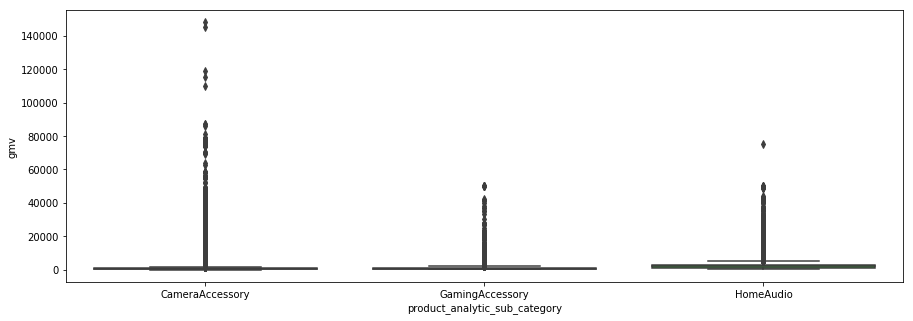

In [77]:
#Let's check outliers in gmv individaully for the three categories
plt.figure(figsize = (15,5))
sns.boxplot(y = 'gmv',data = data, x = 'product_analytic_sub_category')

#### We see a humongous amount of outliers in the category CameraAccessory & also some in the other two categories. Let's handle these

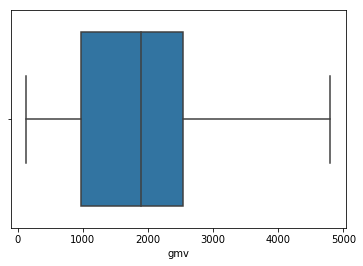

In [78]:
#Checking if the outliers get removed from gmv for the category 'HomeAudio' when capped at certain value
sns.boxplot(data.loc[(data.product_analytic_sub_category=='HomeAudio') & (data.gmv<4800)]['gmv'])

In [79]:
# Home Audio capping value for gmv for outlier removal
data.loc[(data.product_analytic_sub_category=='HomeAudio')]['gmv'].quantile(0.95)

4706.249999999913

In [80]:
# Getting the .95 percentile value for gmv 
data.loc[(data.product_analytic_sub_category=='GamingAccessory')]['gmv'].quantile(0.95)

2890.0

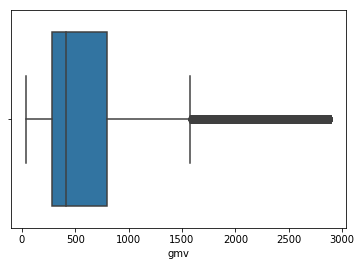

In [81]:
## plotting the box plot for checking the outliers after caping the gmv to 95 percentile
sns.boxplot(data.loc[(data.product_analytic_sub_category=='GamingAccessory') & (data.gmv<2890)]['gmv'])

##### So as we can see there are still many outliers left caping it to 95 percentile, we are considering this data to be premium quality as removing all will lead to huge loss of data.

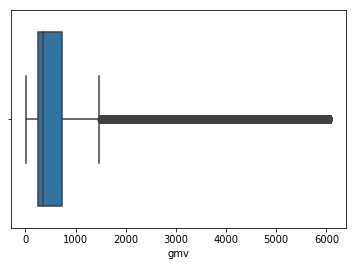

In [82]:
## plotting the box plot for checking the outliers for camera accessory  data after capping it to 95 percentile
sns.boxplot(data.loc[(data.product_analytic_sub_category=='CameraAccessory') & (data.gmv<6079)]['gmv'])

##### So as we can see there are still many outliers left caping it to 95 percentile, we are considering this data to be premium quality as removing all will lead to huge loss of data.

In [83]:
## removing the outliers based on our analysis
camera_data = data.loc[(data.product_analytic_sub_category=='CameraAccessory') & (data.gmv<6079)]
gaming_data = data.loc[(data.product_analytic_sub_category=='GamingAccessory') & (data.gmv<3000)]
homeaudio_data = data.loc[(data.product_analytic_sub_category=='HomeAudio') & (data.gmv<4708)]

In [84]:
## checking the shape of the 3 categories
print(camera_data.shape)
print(gaming_data.shape)
print(homeaudio_data.shape)

(199598, 20)
(172870, 20)
(100755, 20)


In [85]:
## concatinating the three categories to a single dataframe data
data = pd.concat([camera_data, gaming_data, homeaudio_data], axis = 0)

In [86]:
## checking the shape of the data
data.shape

(473223, 20)

#### Therefore, we've successfully removed the prominent outliers from each of the 3 categories

In [87]:
#Let's drop columns which are not required
data.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'], inplace = True, axis = 1)

In [88]:
#Changing data types for Year, Month & order_week
data['Year'] = data['Year'].astype('int')
data['Month'] = data['Month'].astype('int')
data['order_week'] = data['order_week'].astype('int')

# EDA: Part1

#### We've already filtered out the data for 3 categories i.e. GamingAccessory, CameraAccessory & HomeAudio for which we'll study using graphs

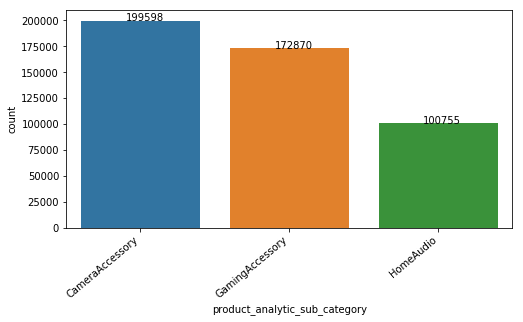

In [89]:
## No of transactions by Sub-Category
plt.figure(figsize = (8,4))
ax = sns.countplot(data['product_analytic_sub_category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

#### Based on our analysis , maximum number of transaction were from Camera Accessory category, then Gaming Accessory , followed by Home Audio category.

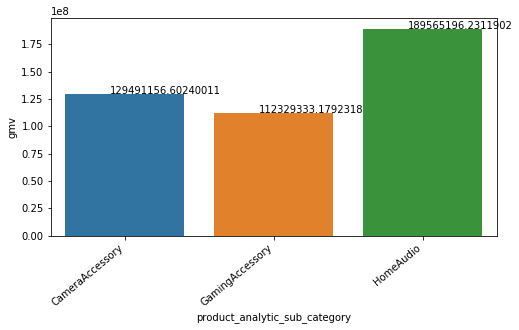

In [90]:
## Total GMV by Sub-Category
plot_gmv = data.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (8,4))
ax = sns.barplot(x='product_analytic_sub_category', y='gmv', data=plot_gmv)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

#### The most number of transactions are for Home Audio followed by Camera Accessory & then Gamming Audio

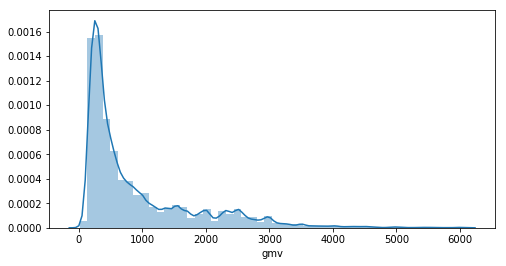

In [91]:
## plotting to check the the frequency of maximum transaction range
plt.figure(figsize = (8,4))
sns.distplot(data.gmv )

#### As seen above, most of the products range from 0 to 1000

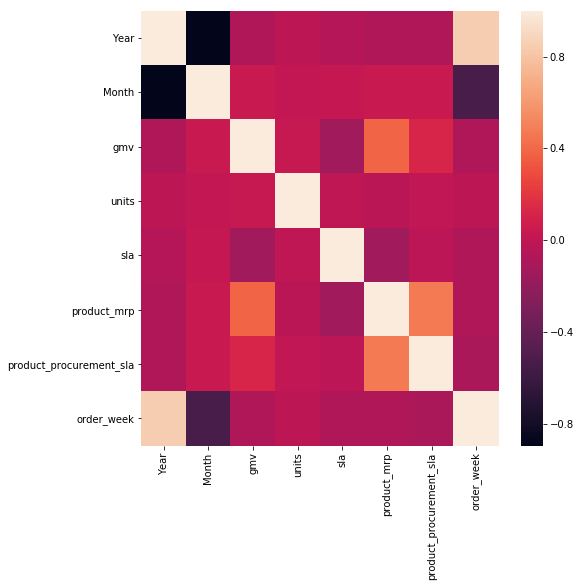

In [92]:
## checking the correlations
plt.figure(figsize = (8,8))
sns.heatmap(data.corr())

#### As we see above, there is a high correlation b/w 
- Month & Year
- Month & order_week

#### Medium correlation b/w
- product_mrp & GMV

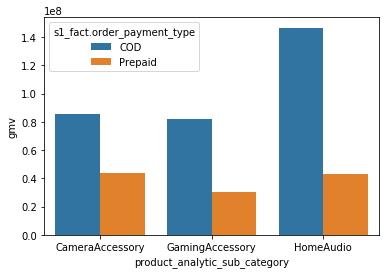

In [93]:
## Total GMV vs Payment Type
GMV_by_Payment_type = data.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="s1_fact.order_payment_type", data=GMV_by_Payment_type)

- For COD orders, maximum revenue is from Home Audio category followed by Camera Accessory , then by Gaming Accessory
- For Prepaid order's , maximum revenue is from Camera Accessory, followed by Home audio and then followed by slight decrease in Gaming accessory category

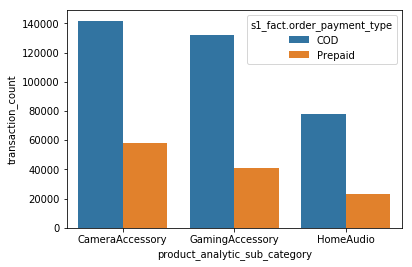

In [94]:
## Order Count vs Payment Type
OC_by_Payment_type = data.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'transaction_count'})
sns.barplot(x='product_analytic_sub_category', y='transaction_count', hue="s1_fact.order_payment_type", data=OC_by_Payment_type)

- For Camera Accessory , maximum number of orders are by COD mode.
- For Gaming Accesrsory , maximum orders are again from COD mode.
- For Home Audio also, maimum orders are from COD mode.

### Creating the data set for each category

In [95]:
GamingAccessory_data = data[(data['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
CameraAccessory_data = data[(data['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
HomeAudio_data = data[(data['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis = 1)

In [96]:
#Checking gamingAccessory_data
GamingAccessory_data.shape

(172870, 14)

In [97]:
#Checking CameraAccessory data
CameraAccessory_data.shape

(199598, 14)

In [98]:
#Checking HomeAudio data
HomeAudio_data.shape

(100755, 14)

### Creating the KPIs

In [99]:
#Function to map create dataframe containing date, week of a given dictionary example: holidays, special_days
def createDataFrameFromDictionary(listOfValues, desiredColumnName):
    df = pd.DataFrame(listOfValues)
    df[desiredColumnName] = pd.to_datetime(df[desiredColumnName]).dt.date
    df["total_"+desiredColumnName] = 1
    df['order_week'] = pd.to_datetime(df[desiredColumnName]).dt.week
    df['year'] = pd.to_datetime(df[desiredColumnName]).dt.year
    df['order_week'] = df.apply(lambda x: mapOrderWeek(x['order_week'],x['year']), axis = 1)
    df = df.groupby('order_week').sum()
    df["is_"+desiredColumnName] = 1
    df.drop('year', axis = 1, inplace = True)
    return df

In [100]:
#  Taking the special sale days from the data provided
special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
special_sale_df = createDataFrameFromDictionary(special_sale_days,'special_sale_day')

In [101]:
## checking the shape 
special_sale_df.shape

(16, 2)

In [102]:
#Checking the correctness of the data created for the special sales day
special_sale_df.head()

total_special_sale_day  is_special_sale_day
order_week                                             
29                               2                    1
33                               2                    1
34                               1                    1
35                               3                    1
41                               1                    1

In [103]:
# Checking the transactions for a patricular order_id for which we traced that it has multiple payment types
data.loc[data.order_id == '174872717']

order_date  Year  Month   order_id     gmv  units  \
1389650  2015-07-30  2015      7  174872717   400.0      1   
1389724  2015-07-30  2015      7  174872717   400.0      1   
1389747  2015-07-30  2015      7  174872717   400.0      1   
1389806  2015-07-30  2015      7  174872717   400.0      1   
1389834  2015-07-22  2015      7  174872717  1600.0      4   

        s1_fact.order_payment_type  sla               cust_id  \
1389650                    Prepaid    7  -5303085405311529984   
1389724                    Prepaid    7  -5303085405311529984   
1389747                    Prepaid    7  -5303085405311529984   
1389806                        COD    7  -5303085405311529984   
1389834                        COD    7  -5303085405311529984   

        product_analytic_sub_category product_analytic_vertical  product_mrp  \
1389650               GamingAccessory                   GamePad          700   
1389724               GamingAccessory                   GamePad          700   
1389747               GamingAccessory                   GamePad          700   
1389806               GamingAccessory                   GamePad          700   
1389834               GamingAccessory                   GamePad          700   

         product_procurement_sla      order_datetime  order_week  
1389650                        2 2015-07-30 09:20:20          31  
1389724                        2 2015-07-30 09:28:11          31  
1389747                        2 2015-07-30 09:10:39          31  
1389806                        2 2015-07-30 09:03:02          31  
1389834                        2 2015-07-22 13:13:22          30

#### As observed, that some order_id have both payment type : prepaid and cod , hence we are assuming that the customer must have paid partially via prepaid mode and partially by cod.

#### Also, we see that the same order_id for different dates which we assume that the customer must have added some new items to the purchase in the consecutive days. Hence, considering the data to be valid

In [104]:
def createKPIs(df):
#### KPI 1: Payment mode indicator
    df['payment_mode_indicator'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
#### KPI 2: Selling price of each product in every transaction
    df['selling_price'] = df['gmv']/df['units']
#### KPI 3: Discount offered on the products
    df['discount'] = np.round((df['product_mrp']-df['selling_price'])/df['product_mrp'],2)
#### KPI 4: Percent of prepaid orders
    weekly_aggregated_data = df
    weekly_aggregated_data['order_count'] = 1
    weekly_aggregated_data = weekly_aggregated_data.groupby('order_week').sum()
    weekly_aggregated_data['percentage_prepaid_transactions'] = np.round((weekly_aggregated_data.payment_mode_indicator/weekly_aggregated_data.order_count)*100,2)
    weekly_aggregated_data = weekly_aggregated_data.reset_index()[['order_week','percentage_prepaid_transactions']]
    df = pd.merge(df,weekly_aggregated_data, how = 'inner', on = 'order_week')
    return df

In [105]:
def createWeeklyAggregatedKPIs():
#### KPI 5: Holidays
    holidays = {'holiday':["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06", 
            "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03", 
            "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"]}
    holiday_df = createDataFrameFromDictionary(holidays,"holiday")

#### KPI 6: Special sale days
    special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
    special_sale_day_df = createDataFrameFromDictionary(special_sale_days,'special_sale_day')

#### KPI 7: Creating pay_day column
    #Creating order_day column
    pay_days = {'pay_days':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
    pay_days_df = createDataFrameFromDictionary(pay_days,'pay_days')
    final_df = pd.concat([holiday_df, special_sale_day_df, pay_days_df],axis = 1)
    return final_df.fillna(0).astype('int')

In [106]:
#Checking if the createWeeklyAggreagatedKPIs function is giving us correct data
createWeeklyAggregatedKPIs().shape

(38, 6)

In [107]:
#Checking the first few rows of the weekly created KPIs
createWeeklyAggregatedKPIs().head()

total_holiday  is_holiday  total_special_sale_day  \
order_week                                                      
27                      1           1                       0   
29                      0           0                       2   
31                      0           0                       0   
32                      1           1                       0   
33                      0           0                       2   

            is_special_sale_day  total_pay_days  is_pay_days  
order_week                                                    
27                            0               1            1  
29                            1               1            1  
31                            0               1            1  
32                            0               0            0  
33                            1               1            1

In [108]:
# Adding the KPIs to the dataframes of each category
GamingAccessory_data_with_KPIs = createKPIs(GamingAccessory_data)
CameraAccessory_data_with_KPIs = createKPIs(CameraAccessory_data)
HomeAudio_data_with_KPIs = createKPIs(HomeAudio_data)

In [109]:
print(HomeAudio_data_with_KPIs.shape)
print(GamingAccessory_data_with_KPIs.shape)
print(CameraAccessory_data_with_KPIs.shape)

(100755, 19)
(172870, 19)
(199598, 19)


### Creating KPI for Prepaid/COD transactions for visualisation

In [110]:
# Creating KPIs for Prepaid Count, COD Count & Percent Online Orders
cod_cnt = GamingAccessory_data_with_KPIs.loc[GamingAccessory_data_with_KPIs['s1_fact.order_payment_type'] == "COD"].groupby('order_week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'COD_count'})
prepaid_cnt = GamingAccessory_data_with_KPIs.loc[GamingAccessory_data_with_KPIs['s1_fact.order_payment_type'] == "Prepaid"].groupby('order_week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'Prepaid_count'})
online_orders_GA = pd.merge(cod_cnt,prepaid_cnt,on = "order_week", how = "outer").fillna(0)
online_orders_GA["pct_online_transactions"] = (online_orders_GA["Prepaid_count"]/(online_orders_GA["Prepaid_count"]+online_orders_GA["COD_count"])).round(2)

In [111]:
# Creating KPIs for Prepaid Count, COD Count & Percent Online Orders
cod_cnt = CameraAccessory_data_with_KPIs.loc[CameraAccessory_data_with_KPIs['s1_fact.order_payment_type'] == "COD"].groupby('order_week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'COD_count'})
prepaid_cnt = CameraAccessory_data_with_KPIs.loc[CameraAccessory_data_with_KPIs['s1_fact.order_payment_type'] == "Prepaid"].groupby('order_week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'Prepaid_count'})
online_orders_CA = pd.merge(cod_cnt,prepaid_cnt,on = "order_week", how = "outer").fillna(0)
online_orders_CA["pct_online_transactions"] = (online_orders_CA["Prepaid_count"]/(online_orders_CA["Prepaid_count"]+online_orders_CA["COD_count"])).round(2)

In [112]:
# Creating KPIs for Prepaid Count, COD Count & Percent Online Orders
cod_cnt = HomeAudio_data_with_KPIs.loc[HomeAudio_data_with_KPIs['s1_fact.order_payment_type'] == "COD"].groupby('order_week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'COD_count'})
prepaid_cnt = HomeAudio_data_with_KPIs.loc[HomeAudio_data_with_KPIs['s1_fact.order_payment_type'] == "Prepaid"].groupby('order_week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'Prepaid_count'})
online_orders_HA = pd.merge(cod_cnt,prepaid_cnt,on = "order_week", how = "outer").fillna(0)
online_orders_HA["pct_online_transactions"] = (online_orders_HA["Prepaid_count"]/(online_orders_HA["Prepaid_count"]+online_orders_HA["COD_count"])).round(2)

In [113]:
print(HomeAudio_data_with_KPIs.shape)
print(GamingAccessory_data_with_KPIs.shape)
print(CameraAccessory_data_with_KPIs.shape)

(100755, 19)
(172870, 19)
(199598, 19)


In [114]:
# Checking the first few rows of the Gaming Accessory dataframe with KPIs
GamingAccessory_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
0  2015-10-14  2015     10  1416985339691600  2750.0      1   
1  2015-10-15  2015     10  1417669228375400  2899.0      1   
2  2015-10-17  2015     10  1419414998353400  2609.0      1   
3  2015-10-16  2015     10  4417730112316700  2750.0      1   
4  2015-10-18  2015     10  3420000107033800  2999.0      1   

  s1_fact.order_payment_type  sla               cust_id  \
0                        COD    7   9041577304631719936   
1                    Prepaid    5   8973831124140309504   
2                    Prepaid    5  -4824142736471789568   
3                    Prepaid    7   2297791966161220096   
4                    Prepaid    4  -8159330392897349632   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0                   GamePad         3999                        5   
1                   GamePad         3999                        5   
2                   GamePad         3999                        5   
3                   GamePad         3999                        5   
4                   GamePad         3999                        5   

       order_datetime  order_week  payment_mode_indicator  selling_price  \
0 2015-10-14 22:54:54          42                       0         2750.0   
1 2015-10-15 20:19:38          42                       1         2899.0   
2 2015-10-17 18:21:43          42                       1         2609.0   
3 2015-10-16 04:02:08          42                       1         2750.0   
4 2015-10-18 10:40:06          42                       1         2999.0   

   discount  order_count  percentage_prepaid_transactions  
0      0.31            1                            20.27  
1      0.28            1                            20.27  
2      0.35            1                            20.27  
3      0.31            1                            20.27  
4      0.25            1                            20.27

In [115]:
# Checking the first few rows of the Camera Accessory dataframe with KPIs
CameraAccessory_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
0  2015-10-20  2015     10  2421912925714800  1990.0      1   
1  2015-10-25  2015     10  4426481574167600  3695.0      1   
2  2015-10-19  2015     10  2420828677270800  3695.0      1   
3  2015-10-22  2015     10  4423471780328000  4499.0      1   
4  2015-10-23  2015     10  3424658116375400  3789.0      1   

  s1_fact.order_payment_type  sla               cust_id  \
0                        COD   10  -1040442942046599936   
1                        COD    7  -7809156068961630208   
2                        COD    8  -8990324579055120384   
3                    Prepaid    6   3951369679301279744   
4                        COD    6  -8715611406883560448   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod         2099                        3   
1              CameraTripod         4044                        5   
2              CameraTripod         4044                        5   
3                 CameraBag         5999                        0   
4                 CameraBag         4700                        0   

       order_datetime  order_week  payment_mode_indicator  selling_price  \
0 2015-10-20 15:45:56          43                       0         1990.0   
1 2015-10-25 22:52:34          43                       0         3695.0   
2 2015-10-19 09:37:06          43                       0         3695.0   
3 2015-10-22 11:07:53          43                       1         4499.0   
4 2015-10-23 20:03:01          43                       0         3789.0   

   discount  order_count  percentage_prepaid_transactions  
0      0.05            1                            20.81  
1      0.09            1                            20.81  
2      0.09            1                            20.81  
3      0.25            1                            20.81  
4      0.19            1                            20.81

In [116]:
# Checking the first few rows of the Home Audio dataframe with KPIs
HomeAudio_data_with_KPIs.head()

order_date  Year  Month          order_id     gmv  units  \
0  2015-10-08  2015     10  1411753777965600  3700.0      1   
1  2015-10-11  2015     10  2414104375842400  3700.0      1   
2  2015-10-08  2015     10  4411629266828400  3700.0      1   
3  2015-10-09  2015     10  4412152259651800  1970.0      1   
4  2015-10-10  2015     10  3413199701716100  1970.0      1   

  s1_fact.order_payment_type  sla               cust_id  \
0                        COD    3   8628124667745449984   
1                        COD    5   5684936202558919680   
2                        COD    3  -1123729755469779968   
3                        COD    8  -1350434790011350016   
4                    Prepaid    6   2453367163355780096   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0          HomeAudioSpeaker         4599                        0   
1          HomeAudioSpeaker         4599                        0   
2          HomeAudioSpeaker         4599                        0   
3          HomeAudioSpeaker         4999                        5   
4          HomeAudioSpeaker         4999                        5   

       order_datetime  order_week  payment_mode_indicator  selling_price  \
0 2015-10-08 21:34:04          41                       0         3700.0   
1 2015-10-11 16:54:52          41                       0         3700.0   
2 2015-10-08 18:06:04          41                       0         3700.0   
3 2015-10-09 08:55:52          41                       0         1970.0   
4 2015-10-10 13:43:33          41                       1         1970.0   

   discount  order_count  percentage_prepaid_transactions  
0      0.20            1                            18.41  
1      0.20            1                            18.41  
2      0.20            1                            18.41  
3      0.61            1                            18.41  
4      0.61            1                            18.41

###  Creating KPIs for Product Analytical Vertical

In [117]:
# Creating KPIs for product analytical vertical
prd_vert_CA = CameraAccessory_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
CA_prdvr_KPI = prd_vert_CA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = CA_prdvr_KPI.columns
CA_prdvr_KPI[cols] = CA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
CameraAccessory_data_with_KPIs = CameraAccessory_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

In [118]:
#Counting products sold in each vertical
prd_vrt_units_sold = prd_vert_CA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
prd_vrt_units_sold.head()

product_analytic_vertical  units
15                     Flash  48003
3              CameraBattery  35974
12              CameraTripod  31268
17                      Lens  22800
2                  CameraBag  15279

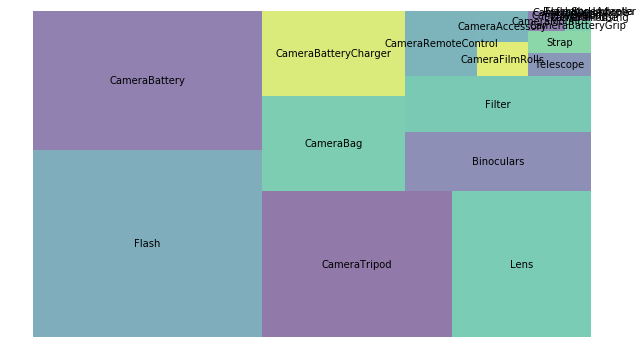

In [119]:
import squarify
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

#### As we see the highest sold item is Flash followed by Camera Battery and Camera Tripod

In [120]:
# Creating KPIs for product analytical vertical
prd_vert_GA = GamingAccessory_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
GA_prdvr_KPI = prd_vert_GA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0")
cols = GA_prdvr_KPI.columns
GA_prdvr_KPI[cols] = GA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
GamingAccessory_data_with_KPIs = GamingAccessory_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

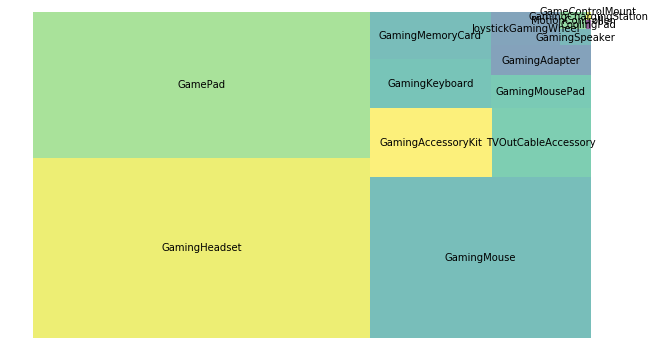

In [121]:
#Creating number of products sold for each vertical & plotting
prd_vrt_units_sold = prd_vert_GA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

#### As we see the highest sold item is Gaming Headset followed by Game Pad and Gaming Mouse

In [122]:
# Creating KPIs for product analytical vertical
prd_vert_HA = HomeAudio_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
HA_prdvr_KPI = prd_vert_HA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = HA_prdvr_KPI.columns
HA_prdvr_KPI[cols] = HA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
HomeAudio_data_with_KPIs = HomeAudio_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

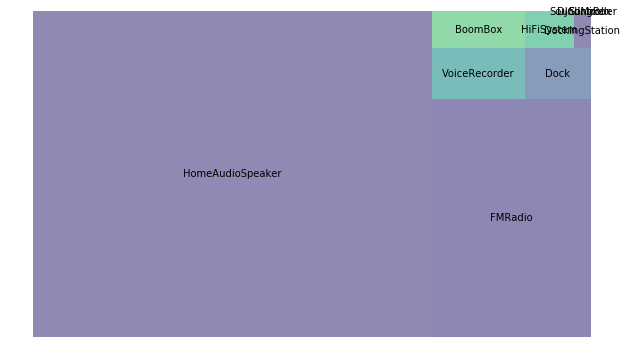

In [123]:
#Creating number of products sold for each vertical & plotting
prd_vrt_units_sold = prd_vert_HA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

#### As we see the highest sold item isHome Audio Speaker followed by FMRadio

### KPI 8: Including NPS & Stock Index -> Creating separately & merging with the 3 dataframes

In [124]:
#Reading media data from the excel file
nps_data = pd.read_excel("Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 1).T.reset_index()

#Creating Month & Year columns to merge with transactional data
nps_data['Year'] = nps_data['index'].apply(lambda x: int("20"+x.split("'")[1]))
nps_data['Month'] = nps_data['index'].apply(lambda x: x.split("'")[0][:3])

#Create mapping to convert month names to month number
import calendar

d = dict((v,k) for k,v in enumerate(calendar.month_abbr))
d

nps_data.Month = nps_data.Month.apply(lambda x: d.get(x))

#Drop index column from media_data
nps_data.drop('index', inplace = True, axis = 1)

nps_data

NPS  Stock Index  Year  Month
0   54.599588       1177.0  2015      7
1   59.987101       1206.0  2015      8
2   46.925419       1101.0  2015      9
3   44.398389       1210.0  2015     10
4   47.000000       1233.0  2015     11
5   45.800000       1038.0  2015     12
6   47.093031       1052.0  2016      1
7   50.327406       1222.0  2016      2
8   49.020550       1015.0  2016      3
9   51.827605       1242.0  2016      4
10  47.306951       1228.0  2016      5
11  50.516687       1194.0  2016      6

In [125]:
# Adding NPS KPI to each of the dataframes
GamingAccessory_data_with_KPIs = pd.merge(nps_data,GamingAccessory_data_with_KPIs,on=['Month','Year'],how='inner')
CameraAccessory_data_with_KPIs = pd.merge(nps_data,CameraAccessory_data_with_KPIs,on=['Month','Year'],how='inner')
HomeAudio_data_with_KPIs = pd.merge(nps_data,HomeAudio_data_with_KPIs,on=['Month','Year'],how='inner')

In [126]:
# Creating dataframes for plots for each of the category
GamingAccessory_data_with_KPIs_for_plot = GamingAccessory_data_with_KPIs
GamingAccessory_data_with_KPIs_for_plot['analytic_vertical'] = "Gaming Accessory"
CameraAccessory_data_with_KPIs_for_plot = CameraAccessory_data_with_KPIs
CameraAccessory_data_with_KPIs_for_plot['analytic_vertical'] = "Camera Accessory"
HomeAudio_data_with_KPIs_for_plot = HomeAudio_data_with_KPIs
HomeAudio_data_with_KPIs_for_plot['analytic_vertical'] = "Home Audio"

all_data_with_kpi = pd.concat([GamingAccessory_data_with_KPIs_for_plot, CameraAccessory_data_with_KPIs_for_plot, HomeAudio_data_with_KPIs_for_plot], axis = 0)

### Weekly Agrregation of Data

### Gaming Accessory

In [127]:
#GamingAccessory Data - Aggregating weekly some features being summed up & for some taking mean
GamingAccessory_data_sum = GamingAccessory_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
GamingAccessory_data_mean = GamingAccessory_data_with_KPIs[['sla','product_procurement_sla','order_week',
                                                            'product_mrp','selling_price','discount','NPS']].groupby('order_week').mean()
GamingAccessory_data_count = GamingAccessory_data_with_KPIs[['order_id','order_week']].groupby('order_week').count().rename(columns={'order_id':'total_transactions'})

final_gaming_data = pd.concat([GamingAccessory_data_sum, GamingAccessory_data_mean,GamingAccessory_data_count], axis = 1).reset_index()

In [128]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_gaming_data = pd.merge(final_gaming_data, createWeeklyAggregatedKPIs().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_gaming_data.shape

(53, 16)

In [129]:
#Merging with Prepaid/COD KPI
final_gaming_data = pd.merge(final_gaming_data,online_orders_GA,on = "order_week", how = "left")
final_gaming_data.shape

(53, 19)

In [130]:
#Merging with Product Analytical Vertical KPI
final_gaming_data = pd.merge(final_gaming_data,GA_prdvr_KPI,on=['order_week'],how='left')
final_gaming_data.shape

(53, 34)

In [131]:
final_gaming_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'pct_online_transactions', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

### Camera Accessory

In [132]:
#Camera data  - Aggregating weekly some features being summed up & for some taking mean
CameraAccessory_data_sum = CameraAccessory_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
CameraAccessory_data_mean = CameraAccessory_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp',
                                                            'selling_price','discount','NPS']].groupby('order_week').mean()
CameraAccessory_data_count = CameraAccessory_data_with_KPIs[['order_id','order_week']].groupby('order_week').count().rename(columns={'order_id':'total_transactions'})
final_camera_data = pd.concat([CameraAccessory_data_sum, CameraAccessory_data_mean,CameraAccessory_data_count], axis = 1).reset_index()

In [133]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_camera_data = pd.merge(final_camera_data, createWeeklyAggregatedKPIs().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_camera_data.shape

(52, 16)

In [134]:
#Merging with Prepaid/Cod KPI
final_camera_data = pd.merge(final_camera_data,online_orders_CA,on = "order_week", how = "left")
final_camera_data.shape

(52, 19)

In [135]:
#Merging with Product Analytical Vertical KPI
final_camera_data = pd.merge(final_camera_data,CA_prdvr_KPI,on=['order_week'],how='left')
final_camera_data.shape

(52, 41)

In [136]:
final_camera_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'pct_online_transactions', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

### Home Audio

In [137]:
# Home Audio data
HomeAudio_data_sum = HomeAudio_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
HomeAudio_data_mean = HomeAudio_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp','selling_price','discount','NPS']].groupby('order_week').mean()
HomeAudio_data_count = HomeAudio_data_with_KPIs[['order_id','order_week']].groupby('order_week').count().rename(columns={'order_id':'total_transactions'})
final_home_audio_data = pd.concat([HomeAudio_data_sum, HomeAudio_data_mean,HomeAudio_data_count], axis = 1).reset_index()

In [138]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_home_audio_data = pd.merge(final_home_audio_data, createWeeklyAggregatedKPIs().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_home_audio_data.shape

(50, 16)

In [139]:
#Merging with Prepaid/COD KPI
final_home_audio_data = pd.merge(final_home_audio_data,online_orders_HA,on = "order_week", how = "left")
final_home_audio_data.shape

(50, 19)

In [140]:
#Merging with Product Analytical Vertical KPI
final_home_audio_data = pd.merge(final_home_audio_data,HA_prdvr_KPI,on=['order_week'],how='left')
final_home_audio_data.shape

(50, 29)

In [141]:
final_home_audio_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'pct_online_transactions', 'BoomBox', 'DJController',
       'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [142]:
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_audio_data.shape)

Shape of Gaming Accessory DF (53, 34)
Shape of Camera Accessory DF (52, 41)
Shape of Home Audio DF (50, 29)


### KPI 9: Media Investment data - Creating separately & merging with the 3 dataframes of each category

In [143]:
# Reading the media data from the provided file
media_investment = pd.read_excel("Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment

Year  Month  Total Investment         TV    Digital  Sponsorship  \
NaN  2015.0    7.0         17.061775   0.215330   2.533014     7.414270   
NaN  2015.0    8.0          5.064306   0.006438   1.278074     1.063332   
NaN  2015.0    9.0         96.254380   3.879504   1.356528    62.787651   
NaN  2015.0   10.0        170.156297   6.144711  12.622480    84.672532   
NaN  2015.0   11.0         51.216220   4.220630   1.275469    14.172116   
NaN  2015.0   12.0        106.745312   5.397502   3.063360    56.705419   
NaN  2016.0    1.0         74.196000   4.380000   0.456000     4.200000   
NaN  2016.0    2.0         48.052000   2.586008   1.912651    11.725555   
NaN  2016.0    3.0        100.024621   9.300000   2.100000    41.590000   
NaN  2016.0    4.0         56.848241   5.205196   0.871892    24.308354   
NaN  2016.0    5.0         78.057000   1.370000   0.770000    31.680000   
NaN  2016.0    6.0         42.834216   1.662717   1.420761    25.048541   
NaN     NaN    NaN               NaN        NaN        NaN          NaN   
NaN     NaN    NaN               NaN        NaN        NaN          NaN   
NaN     NaN    NaN               NaN        NaN        NaN          NaN   
NaN     NaN    NaN               NaN  18.549000        NaN          NaN   

     Content Marketing  Online marketing   Affiliates        SEM  Radio  \
NaN           0.000933          1.327278     0.547254   5.023697    NaN   
NaN           0.000006          0.129244     0.073684   2.513528    NaN   
NaN           0.610292         16.379990     5.038266   6.202149    NaN   
NaN           3.444075         24.371778     6.973711  31.927011    NaN   
NaN           0.168633         19.561574     6.595767   5.222032    NaN   
NaN           1.067307         22.503756     6.826938  11.181030    NaN   
NaN           0.900000         22.900000     7.370000   4.200000   2.70   
NaN           0.596771         19.892366     6.465019   4.873630    NaN   
NaN           0.370000         18.437818     6.217667   5.193591   0.87   
NaN           0.034876         16.514510     5.693456   4.219958    NaN   
NaN           0.790000         23.650000     6.800000   6.910000   1.10   
NaN           0.045081          7.971300     2.768023   3.735516    NaN   
NaN                NaN               NaN          NaN        NaN    NaN   
NaN                NaN               NaN          NaN        NaN    NaN   
NaN                NaN               NaN          NaN        NaN    NaN   
NaN                NaN               NaN          NaN        NaN    NaN   

         Other  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN  27.090000  
NaN        NaN  
NaN  15.945545  
NaN        NaN  
NaN   4.987000  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN  
NaN        NaN

In [144]:
#Formatting the dataframe in the required format i.e. removing the extra rows & columns
media_investment = media_investment.iloc[:-4].reset_index()
media_investment.drop('index', inplace = True, axis = 1)

In [145]:
#Converting columns year & month in int type
media_investment['Year']  = media_investment['Year'] .astype('int')
media_investment['Month']  = media_investment['Month'] .astype('int')

In [146]:
#Filling NaN values as 0 assuming that the investment done in respective area was 0
media_investment  = media_investment.fillna(0)

In [147]:
#Checking the final media_investment dataframe
media_investment

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6   27.090000  
7    0.000000  
8   15.945545  
9    0.000000  
10   4.987000  
11   0.000000

In [148]:
#Creating a mapping of the Months & number of weeks in order to find the media data weekly for each of the monts
number_of_weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
number_of_weeks_df = pd.DataFrame(number_of_weeks)
number_of_weeks_df

Month  number_of_weeks
0       1                4
1       2                4
2       3                5
3       4                4
4       5                4
5       6                5
6       7                4
7       8                4
8       9                5
9      10                4
10     11                4
11     12                5

In [149]:
#Merging the media_investment data with dataframe containing the mapping of months & number of weeks in that month
media_investment = pd.merge(media_investment,number_of_weeks_df, on = 'Month', how = 'inner')
media_investment

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  number_of_weeks  
0    0.000000                4  
1    0.000000                4  
2    0.000000                5  
3    0.000000                4  
4    0.000000                4  
5    0.000000                5  
6   27.090000                4  
7    0.000000                4  
8   15.945545                5  
9    0.000000                4  
10   4.987000                4  
11   0.000000                5

In [150]:
# Calculating the final media_investments weekly by dividing the value in a month with the respecitve number_of_weeks in the month
media_investment['TV']  = media_investment['TV']/media_investment['number_of_weeks']
media_investment['Digital']  = media_investment['Digital']/media_investment['number_of_weeks']
media_investment['Sponsorship']  = media_investment['Sponsorship']/media_investment['number_of_weeks']
media_investment['Content Marketing']  = media_investment['Content Marketing']/media_investment['number_of_weeks']
media_investment['Online marketing']  = media_investment['Online marketing']/media_investment['number_of_weeks']
media_investment[' Affiliates']  = media_investment[' Affiliates']/media_investment['number_of_weeks']
media_investment['SEM']  = media_investment['SEM']/media_investment['number_of_weeks']
media_investment['Radio']  = media_investment['Radio']/media_investment['number_of_weeks']
media_investment['Other']  = media_investment['Other']/media_investment['number_of_weeks']

In [151]:
# Checking the media investment data
media_investment

Year  Month  Total Investment        TV   Digital  Sponsorship  \
0   2015      7         17.061775  0.053833  0.633253     1.853567   
1   2015      8          5.064306  0.001610  0.319518     0.265833   
2   2015      9         96.254380  0.775901  0.271306    12.557530   
3   2015     10        170.156297  1.536178  3.155620    21.168133   
4   2015     11         51.216220  1.055157  0.318867     3.543029   
5   2015     12        106.745312  1.079500  0.612672    11.341084   
6   2016      1         74.196000  1.095000  0.114000     1.050000   
7   2016      2         48.052000  0.646502  0.478163     2.931389   
8   2016      3        100.024621  1.860000  0.420000     8.318000   
9   2016      4         56.848241  1.301299  0.217973     6.077088   
10  2016      5         78.057000  0.342500  0.192500     7.920000   
11  2016      6         42.834216  0.332543  0.284152     5.009708   

    Content Marketing  Online marketing   Affiliates       SEM  Radio  \
0            0.000233          0.331819     0.136813  1.255924  0.000   
1            0.000002          0.032311     0.018421  0.628382  0.000   
2            0.122058          3.275998     1.007653  1.240430  0.000   
3            0.861019          6.092944     1.743428  7.981753  0.000   
4            0.042158          4.890394     1.648942  1.305508  0.000   
5            0.213461          4.500751     1.365388  2.236206  0.000   
6            0.225000          5.725000     1.842500  1.050000  0.675   
7            0.149193          4.973092     1.616255  1.218407  0.000   
8            0.074000          3.687564     1.243533  1.038718  0.174   
9            0.008719          4.128627     1.423364  1.054990  0.000   
10           0.197500          5.912500     1.700000  1.727500  0.275   
11           0.009016          1.594260     0.553605  0.747103  0.000   

       Other  number_of_weeks  
0   0.000000                4  
1   0.000000                4  
2   0.000000                5  
3   0.000000                4  
4   0.000000                4  
5   0.000000                5  
6   6.772500                4  
7   0.000000                4  
8   3.189109                5  
9   0.000000                4  
10  1.246750                4  
11  0.000000                5

In [152]:
# Getting unique order_week, month & year present in the original dataframe
order_week_data = data[['order_week',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'order_week')
order_week_data = order_week_data.sort_values(by = ['order_week','Month']).drop_duplicates(keep = 'last', subset = 'order_week')
order_week_data

order_week  Month  Year
53          27      7  2015
51          28      7  2015
49          29      7  2015
52          30      7  2015
55          31      8  2015
60          32      8  2015
61          33      8  2015
62          34      8  2015
15          35      8  2015
58          36      9  2015
54          37      9  2015
57          38      9  2015
56          39      9  2015
4           40     10  2015
2           41     10  2015
1           42     10  2015
0           43     10  2015
22          44     11  2015
5           45     11  2015
19          46     11  2015
10          47     11  2015
21          48     11  2015
23          49     12  2015
24          50     12  2015
26          51     12  2015
27          52     12  2015
28          53     12  2015
31          54      1  2016
12          55      1  2016
16          56      1  2016
33          57      1  2016
25          58      2  2016
34          59      2  2016
17          60      2  2016
8           61      2  2016
32          62      3  2016
7           63      3  2016
13          64      3  2016
37          65      3  2016
14          66      4  2016
11          67      4  2016
35          68      4  2016
6           69      4  2016
40          70      5  2016
38          71      5  2016
39          72      5  2016
43          73      5  2016
41          74      5  2016
45          75      6  2016
44          76      6  2016
46          77      6  2016
47          78      6  2016
48          79      6  2016

In [153]:
#Checking number of rows
order_week_data.shape

(53, 3)

In [154]:
# Merging the media_investment_data with the order_week_data to add order_week into this dataframe for final merging with other dataframes containing the KPIs
media_investment_weekwise = pd.merge(order_week_data, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekwise.head()

order_week  Month  Year  Total Investment        TV   Digital  Sponsorship  \
0          27      7  2015         17.061775  0.053833  0.633253     1.853567   
1          28      7  2015         17.061775  0.053833  0.633253     1.853567   
2          29      7  2015         17.061775  0.053833  0.633253     1.853567   
3          30      7  2015         17.061775  0.053833  0.633253     1.853567   
4          31      8  2015          5.064306  0.001610  0.319518     0.265833   

   Content Marketing  Online marketing   Affiliates       SEM  Radio  Other  
0           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
1           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
2           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
3           0.000233          0.331819     0.136813  1.255924    0.0    0.0  
4           0.000002          0.032311     0.018421  0.628382    0.0    0.0

In [155]:
#Checking the columns
media_investment_weekwise.columns

Index(['order_week', 'Month', 'Year', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other'],
      dtype='object')

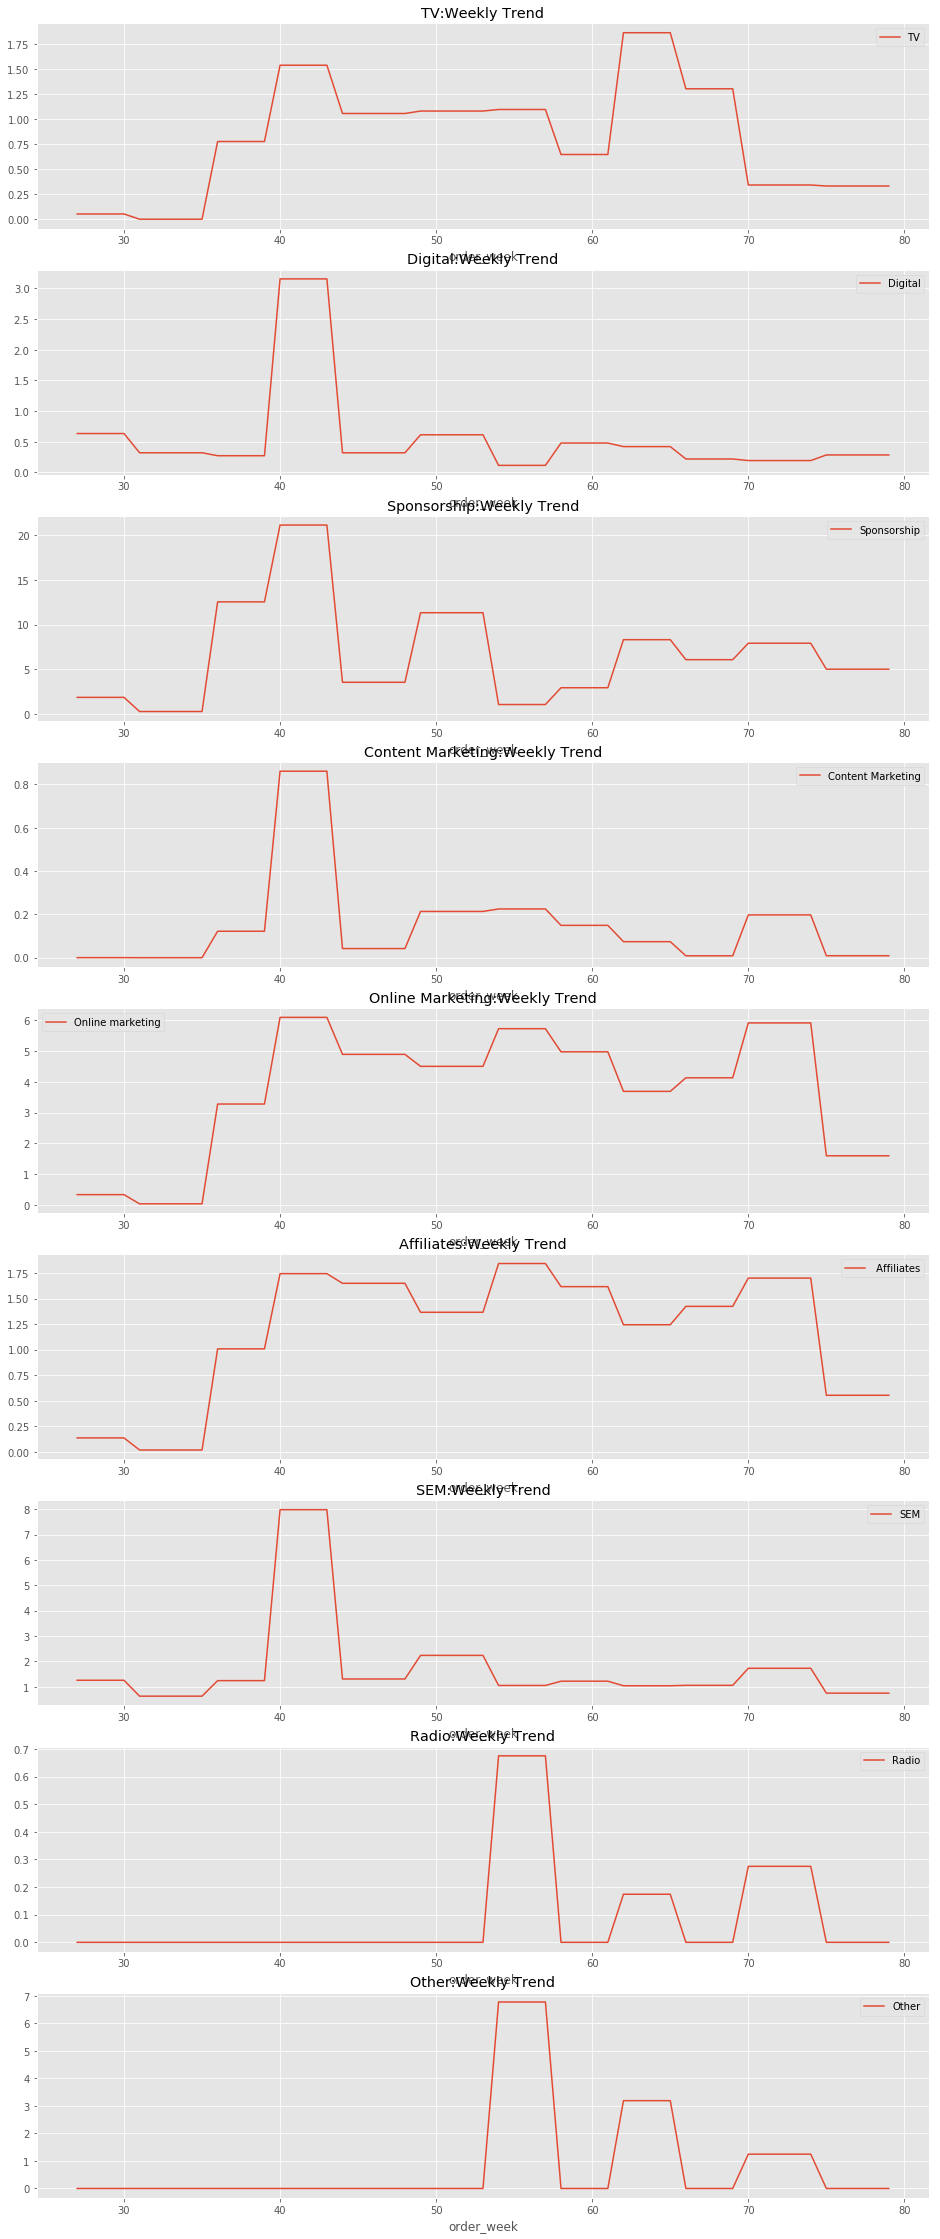

In [156]:
# Lets Analyze the Weekly Spends on different channels
fig = plt.figure(figsize=(16,40))

ax1 = fig.add_subplot(911)
ax1.set_title('TV:Weekly Trend')
ax2 = fig.add_subplot(912)
ax2.set_title('Digital:Weekly Trend')
ax3 = fig.add_subplot(913)
ax3.set_title('Sponsorship:Weekly Trend')
ax4 = fig.add_subplot(914)
ax4.set_title('Content Marketing:Weekly Trend')
ax5 = fig.add_subplot(915)
ax5.set_title('Online Marketing:Weekly Trend')
ax6 = fig.add_subplot(916)
ax6.set_title('Affiliates:Weekly Trend')
ax7 = fig.add_subplot(917)
ax7.set_title('SEM:Weekly Trend')
ax8 = fig.add_subplot(918)
ax8.set_title('Radio:Weekly Trend')
ax9 = fig.add_subplot(919)
ax9.set_title('Other:Weekly Trend')

media_investment_weekwise.plot(x= 'order_week',y=['TV'],ax = ax1)
media_investment_weekwise.plot(x= 'order_week',y=['Digital'],ax = ax2)
media_investment_weekwise.plot(x= 'order_week',y=['Sponsorship'],ax = ax3)
media_investment_weekwise.plot(x= 'order_week',y=['Content Marketing'],ax = ax4)
media_investment_weekwise.plot(x= 'order_week',y=['Online marketing'],ax = ax5)
media_investment_weekwise.plot(x= 'order_week',y=[' Affiliates'],ax = ax6)
media_investment_weekwise.plot(x= 'order_week',y=['SEM'],ax = ax7)
media_investment_weekwise.plot(x= 'order_week',y=['Radio'],ax = ax8)
media_investment_weekwise.plot(x= 'order_week',y=['Other'],ax = ax9)

#### The maximum investments occurred between week 39-45 for most channels, Maximum investments was done through Sponsorship media


In [157]:
media_investment_weekwise.shape

(53, 13)

In [158]:
#Checking if we have equal number of rows
len(media_investment_weekwise) == len(order_week_data)

True

In [159]:
#Creating function to create Adstocks at the adstock_rate which will be passed on to this function
def getAdStockValues(media_investment_df,col_name, adstock_rate):
    media_investment_df['week_carry_over_1_value'] = adstock_rate**1 * media_investment_df[col_name]
    media_investment_df['week_carry_over_2_value'] = adstock_rate**2 * media_investment_df[col_name]
    media_investment_df['week_carry_over_3_value'] = adstock_rate**3 * media_investment_df[col_name]
    media_investment_df['week_carry_over_4_value'] = adstock_rate**4 * media_investment_df[col_name]
    media_investment_df['week_carry_over_5_value'] = adstock_rate**5 * media_investment_df[col_name]
    for i in range(0, len(media_investment_df)):
        week1CarryOverValue  = media_investment_df.loc[i-1,["week_carry_over_1_value"]][0] if(i-1 > -1) else 0
        week2CarryOverValue  = media_investment_df.loc[i-2,["week_carry_over_2_value"]][0] if(i-2 > -1) else 0
        week3CarryOverValue  = media_investment_df.loc[i-3,["week_carry_over_3_value"]][0] if(i-3 > -1) else 0
        week4CarryOverValue  = media_investment_df.loc[i-4,["week_carry_over_4_value"]][0] if(i-4 > -1) else 0
        week5CarryOverValue  = media_investment_df.loc[i-5,["week_carry_over_5_value"]][0] if(i-5 > -1) else 0
        media_investment_df.loc[i,"adStock_"+col_name] = media_investment_df.loc[i,[col_name]][0] + week1CarryOverValue + week2CarryOverValue + week3CarryOverValue + week4CarryOverValue + week5CarryOverValue
    return media_investment_df[["order_week","adStock_"+col_name]]

In [160]:
#Creating adstocks for each of the investments by calling the above created function
adStock_TV = getAdStockValues(media_investment_weekwise[['TV','order_week']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = getAdStockValues(media_investment_weekwise[['Digital','order_week']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = getAdStockValues(media_investment_weekwise[['Sponsorship','order_week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = getAdStockValues(media_investment_weekwise[['Content Marketing','order_week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = getAdStockValues(media_investment_weekwise[['Online marketing','order_week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = getAdStockValues(media_investment_weekwise[[' Affiliates','order_week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = getAdStockValues(media_investment_weekwise[['SEM','order_week']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = getAdStockValues(media_investment_weekwise[['Radio','order_week']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = getAdStockValues(media_investment_weekwise[['Other','order_week']],"Other", 0.5)

In [161]:
# Concating all the individual adstocks to form the final dataframe containing all the adstock data
all_adstock = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)

In [162]:
#Exploring the first few rows
all_adstock.head()

adStock_TV  adStock_Digital  adStock_Sponsorship  \
0    0.053833         0.633253             1.853567   
1    0.080749         0.949880             2.780351   
2    0.094207         1.108193             3.243743   
3    0.100936         1.187350             3.475439   
4    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  order_week  adStock_Other  
0     1.255924            0.0          27            0.0  
1     1.883887            0.0          28            0.0  
2     2.197868            0.0          29            0.0  
3     2.354858            0.0          30            0.0  
4     1.805811            0.0          31            0.0

In [163]:
#Merging the adstock data with the media investment data
final_adstock_data = pd.merge(media_investment_weekwise,all_adstock, on = "order_week", how = 'inner')

In [164]:
#Checking the merged dataframe containing the data for the original media investments & their respective adstocks
final_adstock_data

order_week  Month  Year  Total Investment        TV   Digital  \
0           27      7  2015         17.061775  0.053833  0.633253   
1           28      7  2015         17.061775  0.053833  0.633253   
2           29      7  2015         17.061775  0.053833  0.633253   
3           30      7  2015         17.061775  0.053833  0.633253   
4           31      8  2015          5.064306  0.001610  0.319518   
5           32      8  2015          5.064306  0.001610  0.319518   
6           33      8  2015          5.064306  0.001610  0.319518   
7           34      8  2015          5.064306  0.001610  0.319518   
8           35      8  2015          5.064306  0.001610  0.319518   
9           36      9  2015         96.254380  0.775901  0.271306   
10          37      9  2015         96.254380  0.775901  0.271306   
11          38      9  2015         96.254380  0.775901  0.271306   
12          39      9  2015         96.254380  0.775901  0.271306   
13          40     10  2015        170.156297  1.536178  3.155620   
14          41     10  2015        170.156297  1.536178  3.155620   
15          42     10  2015        170.156297  1.536178  3.155620   
16          43     10  2015        170.156297  1.536178  3.155620   
17          44     11  2015         51.216220  1.055157  0.318867   
18          45     11  2015         51.216220  1.055157  0.318867   
19          46     11  2015         51.216220  1.055157  0.318867   
20          47     11  2015         51.216220  1.055157  0.318867   
21          48     11  2015         51.216220  1.055157  0.318867   
22          49     12  2015        106.745312  1.079500  0.612672   
23          50     12  2015        106.745312  1.079500  0.612672   
24          51     12  2015        106.745312  1.079500  0.612672   
25          52     12  2015        106.745312  1.079500  0.612672   
26          53     12  2015        106.745312  1.079500  0.612672   
27          54      1  2016         74.196000  1.095000  0.114000   
28          55      1  2016         74.196000  1.095000  0.114000   
29          56      1  2016         74.196000  1.095000  0.114000   
30          57      1  2016         74.196000  1.095000  0.114000   
31          58      2  2016         48.052000  0.646502  0.478163   
32          59      2  2016         48.052000  0.646502  0.478163   
33          60      2  2016         48.052000  0.646502  0.478163   
34          61      2  2016         48.052000  0.646502  0.478163   
35          62      3  2016        100.024621  1.860000  0.420000   
36          63      3  2016        100.024621  1.860000  0.420000   
37          64      3  2016        100.024621  1.860000  0.420000   
38          65      3  2016        100.024621  1.860000  0.420000   
39          66      4  2016         56.848241  1.301299  0.217973   
40          67      4  2016         56.848241  1.301299  0.217973   
41          68      4  2016         56.848241  1.301299  0.217973   
42          69      4  2016         56.848241  1.301299  0.217973   
43          70      5  2016         78.057000  0.342500  0.192500   
44          71      5  2016         78.057000  0.342500  0.192500   
45          72      5  2016         78.057000  0.342500  0.192500   
46          73      5  2016         78.057000  0.342500  0.192500   
47          74      5  2016         78.057000  0.342500  0.192500   
48          75      6  2016         42.834216  0.332543  0.284152   
49          76      6  2016         42.834216  0.332543  0.284152   
50          77      6  2016         42.834216  0.332543  0.284152   
51          78      6  2016         42.834216  0.332543  0.284152   
52          79      6  2016         42.834216  0.332543  0.284152   

    Sponsorship  Content Marketing  Online marketing   Affiliates       SEM  \
0      1.853567           0.000233          0.331819     0.136813  1.255924   
1      1.853567           0.000233          0.331819     0.136813  1.255924   
2      1.853567           0.000233      

In [165]:
#Checking the columns
final_adstock_data.columns

Index(['order_week', 'Month', 'Year', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [166]:
#Let's drop the redundant columns whose information has already been captured from the final_adstock_datafram
final_adstock_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)

In [167]:
#Checking the first few rows
final_adstock_data.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other  
0     1.255924            0.0            0.0  
1     1.883887            0.0            0.0  
2     2.197868            0.0            0.0  
3     2.354858            0.0            0.0  
4     1.805811            0.0            0.0

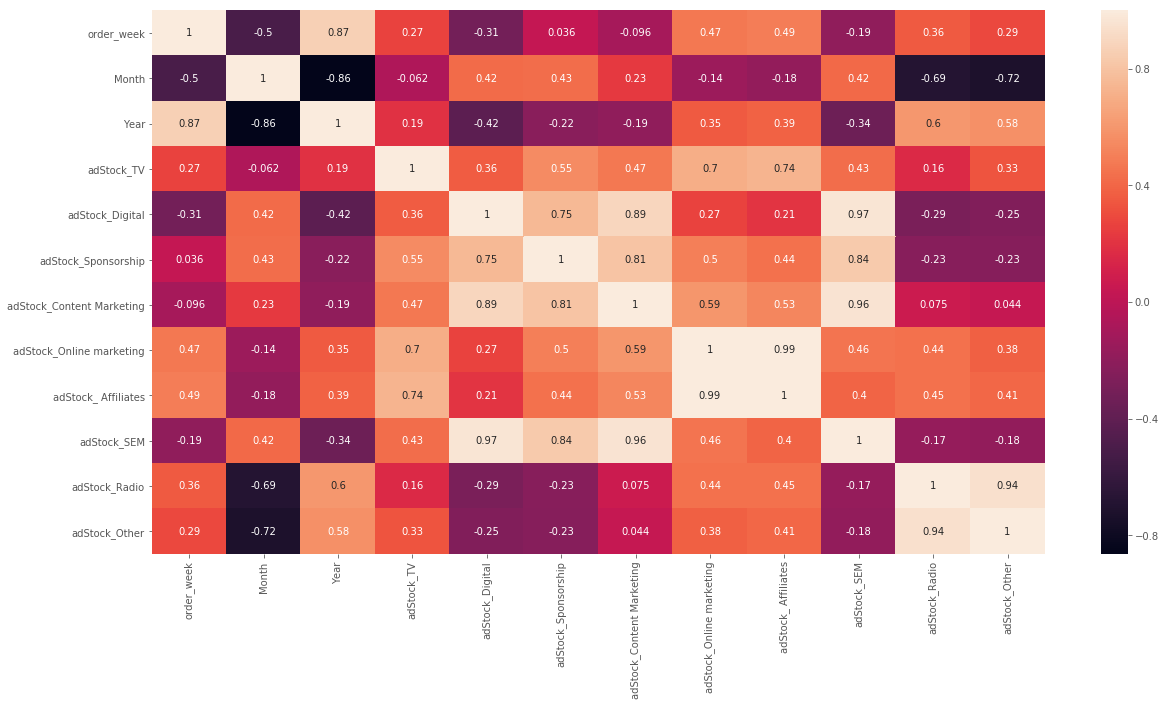

In [168]:
#Let's visualise the correlations b/w the adstocks again
plt.figure(figsize = (20,10))
sns.heatmap(final_adstock_data.corr(), annot = True)

As we see above, there is high correlation b/w 
- order_week & month, year & month, order_week & year
- adStock_Affiliates & adStock_Online marketing
- adStock_Other & adStock_Radio
- adStock_Digital & adStock_SEM
- adStock_Content Marketing & adStock_SEM
- Month & adstock_radio, Month & adstock_others
- adStock_TV & adStock_affiliates
- adStock_Sponsorship & adStock_Content Marketing

In [169]:
#Preparing final_data for 3 categories by adding the adstock data
final_camera_data_with_adstock = pd.merge(final_adstock_data,final_camera_data, on = "order_week", how = 'right')
final_gaming_data_with_adstock = pd.merge(final_adstock_data,final_gaming_data, on = "order_week", how = 'right')
final_home_audio_data_with_adstock = pd.merge(final_adstock_data,final_home_audio_data, on = "order_week", how = 'right')

In [170]:
#Checking the shape of the final dataframes
print("Shape of Gaming Accessory DF",final_gaming_data_with_adstock.shape)
print("Shape of Camera Accessory DF",final_camera_data_with_adstock.shape)
print("Shape of Home Audio DF",final_home_audio_data_with_adstock.shape)

Shape of Gaming Accessory DF (53, 45)
Shape of Camera Accessory DF (52, 52)
Shape of Home Audio DF (50, 40)


In [171]:
#Checking the gaming data columns
final_gaming_data_with_adstock.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'units', 'sla',
       'product_procurement_sla', 'product_mrp', 'selling_price', 'discount',
       'NPS', 'total_transactions', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'COD_count', 'Prepaid_count', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory'],
      dtype='object')

In [172]:
#Checking the camera data columns
final_camera_data_with_adstock.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'units', 'sla',
       'product_procurement_sla', 'product_mrp', 'selling_price', 'discount',
       'NPS', 'total_transactions', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'COD_count', 'Prepaid_count', 'pct_online_transactions',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope'],
      dtype='object')

In [173]:
#Checking the Home Audio data columns
final_home_audio_data_with_adstock.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'units', 'sla',
       'product_procurement_sla', 'product_mrp', 'selling_price', 'discount',
       'NPS', 'total_transactions', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'COD_count', 'Prepaid_count', 'pct_online_transactions',
       'BoomBox', 'DJController', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

 ## EDA: Part 2 ##

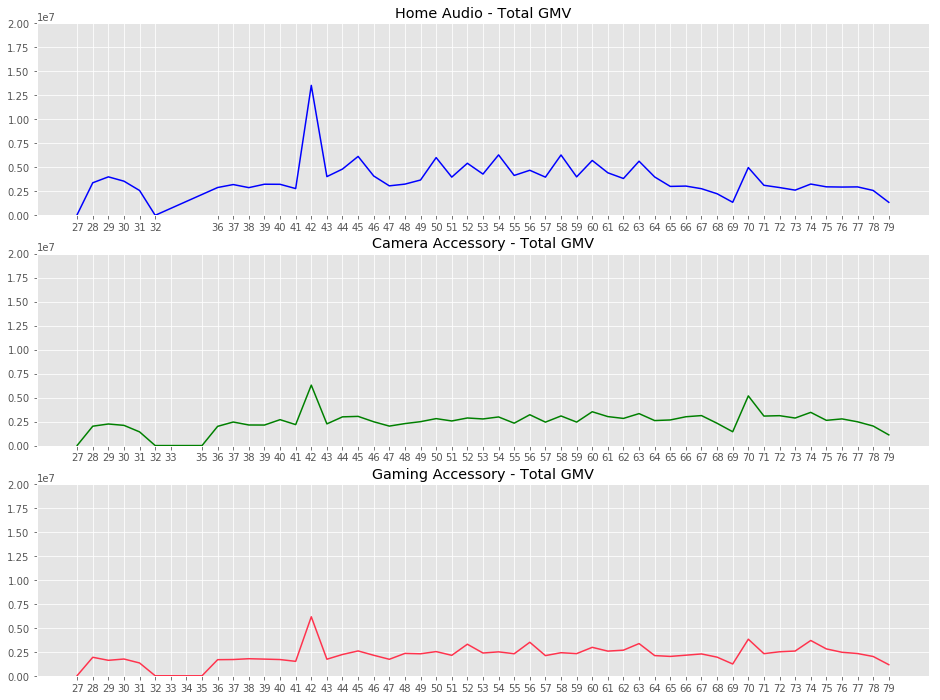

In [174]:
## Total GMV vs Week
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,20000000)
ax1 = plt.title('Home Audio - Total GMV')
ax1 = plt.plot(final_home_audio_data_with_adstock['order_week'],final_home_audio_data_with_adstock['gmv'],color='blue')
plt.xticks(final_home_audio_data_with_adstock['order_week'])

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,20000000)
ax2 = plt.title('Camera Accessory - Total GMV')
ax2 = plt.plot(final_camera_data_with_adstock['order_week'],final_camera_data_with_adstock['gmv'],color='g')
plt.xticks(final_camera_data_with_adstock['order_week'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,20000000)
ax3 = plt.title('Gaming Accessory - Total GMV')
ax3 = plt.plot(final_gaming_data_with_adstock['order_week'],final_gaming_data_with_adstock['gmv'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data_with_adstock['order_week'])

plt.show()


#### Highest GMV seems to be around week 42 for all categories with the maximum gmv for HomeAudio

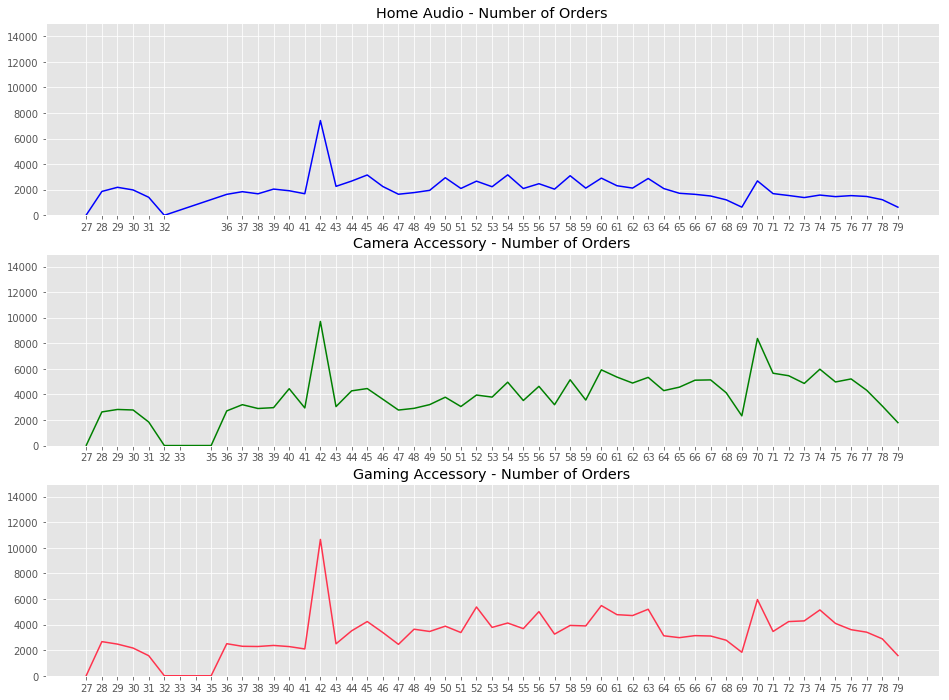

In [175]:
## No of Orders vs Week
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,15000)
ax1 = plt.title('Home Audio - Number of Orders')
ax1 = plt.plot(final_home_audio_data_with_adstock['order_week'],final_home_audio_data_with_adstock['total_transactions'],color='blue')
plt.xticks(final_home_audio_data_with_adstock['order_week'])

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,15000)
ax2 = plt.title('Camera Accessory - Number of Orders')
ax2 = plt.plot(final_camera_data_with_adstock['order_week'],final_camera_data_with_adstock['total_transactions'],color='g')
plt.xticks(final_camera_data_with_adstock['order_week'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,15000)
ax3 = plt.title('Gaming Accessory - Number of Orders')
ax3 = plt.plot(final_gaming_data_with_adstock['order_week'],final_gaming_data_with_adstock['total_transactions'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data_with_adstock['order_week'])

plt.show()

#### Highest number of transactions are around week 42 with maximum transactions for Gaming Accessory

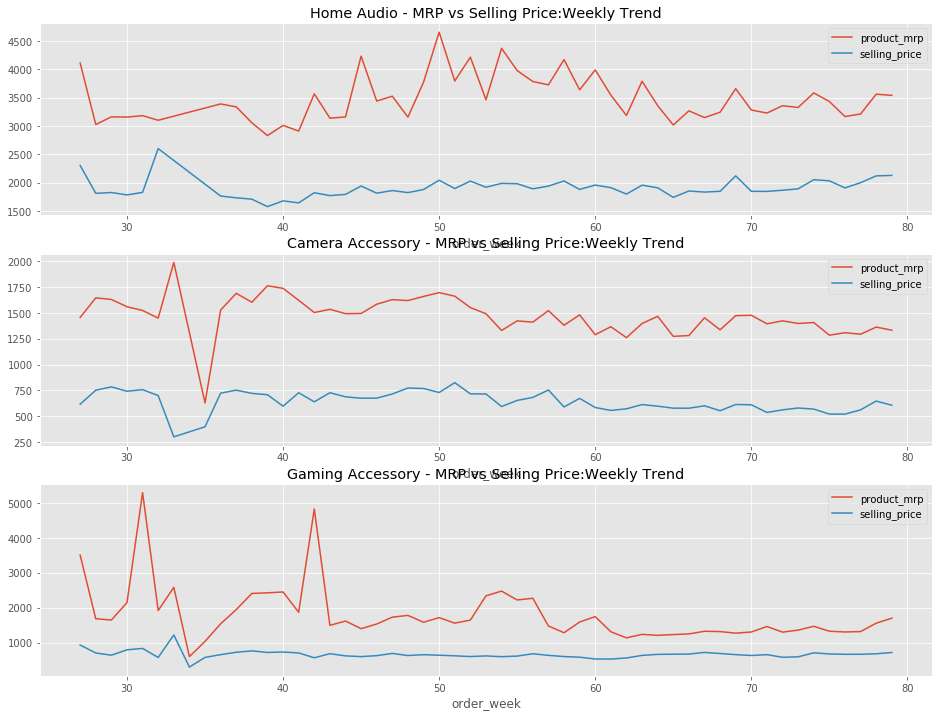

In [176]:
## Weekly Analysis of Product_MRP vs Selling Price

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(311)
ax1.set_title('Home Audio - MRP vs Selling Price:Weekly Trend')

ax2 = fig.add_subplot(312)
ax2.set_title('Camera Accessory - MRP vs Selling Price:Weekly Trend')

ax3 = fig.add_subplot(313)
ax3.set_title('Gaming Accessory - MRP vs Selling Price:Weekly Trend')

final_home_audio_data_with_adstock.plot(x= 'order_week',y=['product_mrp','selling_price'],ax = ax1)
final_camera_data_with_adstock.plot(x= 'order_week',y=['product_mrp','selling_price'],ax = ax2)
final_gaming_data_with_adstock.plot(x= 'order_week',y=['product_mrp','selling_price'],ax = ax3)

#### Product_mrp and selling price seem to be highest for HomeAudio. We can also see huge fluctuations in the product_mrp for GamingAccessory

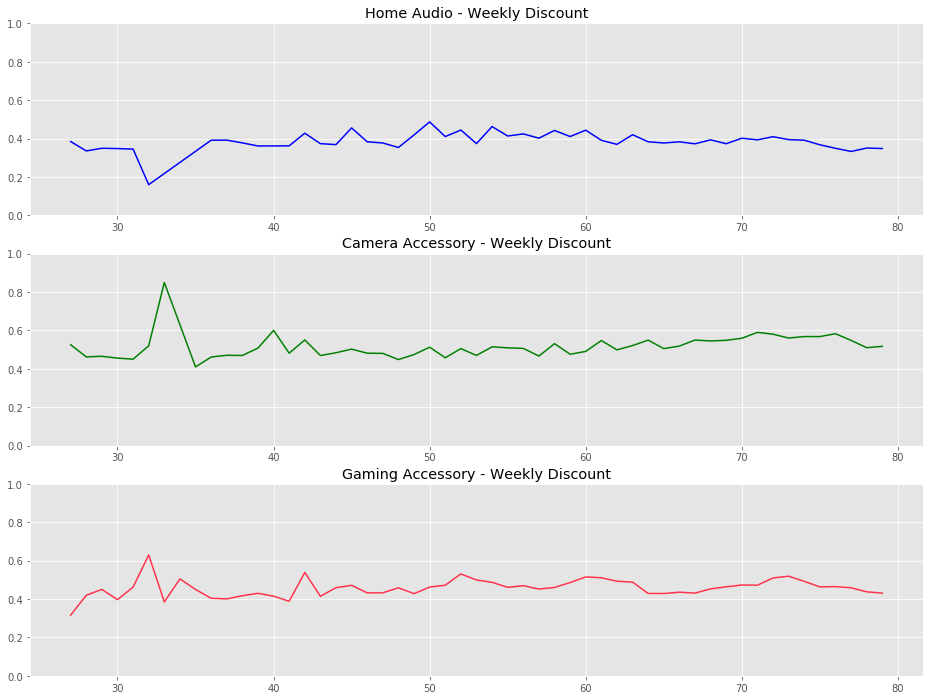

In [177]:
## Discount Analysis
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,1)
ax1 = plt.title('Home Audio - Weekly Discount')
ax1 = plt.plot(final_home_audio_data_with_adstock['order_week'],final_home_audio_data_with_adstock['discount'],color='blue')

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,1)
ax2 = plt.title('Camera Accessory - Weekly Discount')
ax2 = plt.plot(final_camera_data_with_adstock['order_week'],final_camera_data_with_adstock['discount'],color='g')

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,1)
ax3 = plt.title('Gaming Accessory - Weekly Discount')
ax3 = plt.plot(final_gaming_data_with_adstock['order_week'],final_gaming_data_with_adstock['discount'],color=(1.0,0.2,0.3))

plt.show()

#### Discounts seem to be highest for Camera Accessory

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029274497048>],
      dtype=object)

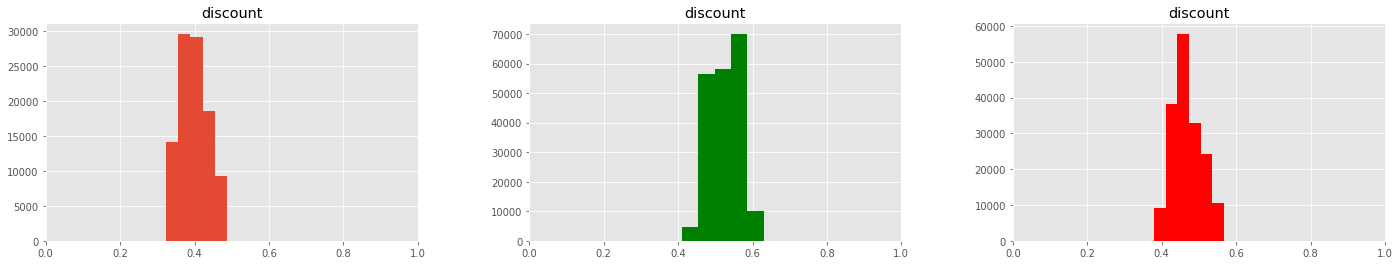

In [178]:
## Discount Analysis : Hist Plot of Discount vs No of tranactions
fig = plt.figure(figsize=(24,4))

ax1 = fig.add_subplot(131)
ax1.set_title('Home Audio - Discount Analysis')
ax1.set_xlim(0,1)
ax2 = fig.add_subplot(132)
ax2.set_title('Camera Accessory - Discount Analysis')
ax2.set_xlim(0,1)
ax3 = fig.add_subplot(133)
ax3.set_title('Gaming Accessory - Discount Analysis')
ax3.set_xlim(0,1)

final_home_audio_data_with_adstock.hist('discount',weights=final_home_audio_data_with_adstock['total_transactions'] ,ax = ax1)
final_camera_data_with_adstock.hist('discount',weights=final_camera_data_with_adstock['total_transactions'] ,ax = ax2,color = "green")
final_gaming_data_with_adstock.hist('discount',weights=final_gaming_data_with_adstock['total_transactions'] ,ax = ax3,color = "red")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029226BE5A20>],
      dtype=object)

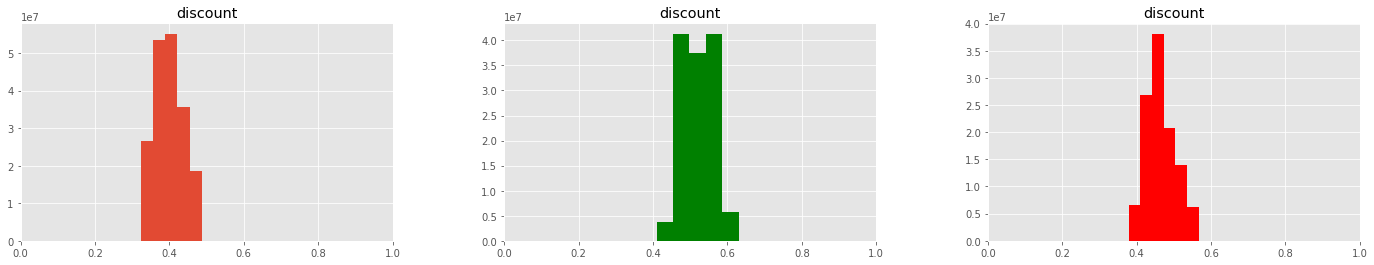

In [179]:
## Discount Analysis: Hist Plot of Discount vs GMV
fig = plt.figure(figsize=(24,4))

ax1 = fig.add_subplot(131)
ax1.set_title('Home Audio - Discount Analysis')
ax1.set_xlim(0,1)
ax2 = fig.add_subplot(132)
ax2.set_title('Camera Accessory - Discount Analysis')
ax2.set_xlim(0,1)
ax3 = fig.add_subplot(133)
ax3.set_title('Gaming Accessory - Discount Analysis')
ax3.set_xlim(0,1)

final_home_audio_data_with_adstock.hist('discount',weights=final_home_audio_data_with_adstock['gmv'] ,ax = ax1)
final_camera_data_with_adstock.hist('discount',weights=final_camera_data_with_adstock['gmv'] ,ax = ax2,color = "green")
final_gaming_data_with_adstock.hist('discount',weights=final_gaming_data_with_adstock['gmv'] ,ax = ax3,color = "red")

#### From the above two graphs, we see that:-
#### In case of HomeAudio and Gaming Accessory, discounts over 50% is not very useful
#### In case of Camera Accessory, discounts could go upto approx. 58-59%.


In [180]:
## Holiday week vs Average GMV
Holiday_week_sale_HA = final_home_audio_data_with_adstock.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_CA = final_camera_data_with_adstock.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_GA = final_gaming_data_with_adstock.groupby('is_holiday')[['gmv']].mean().reset_index()

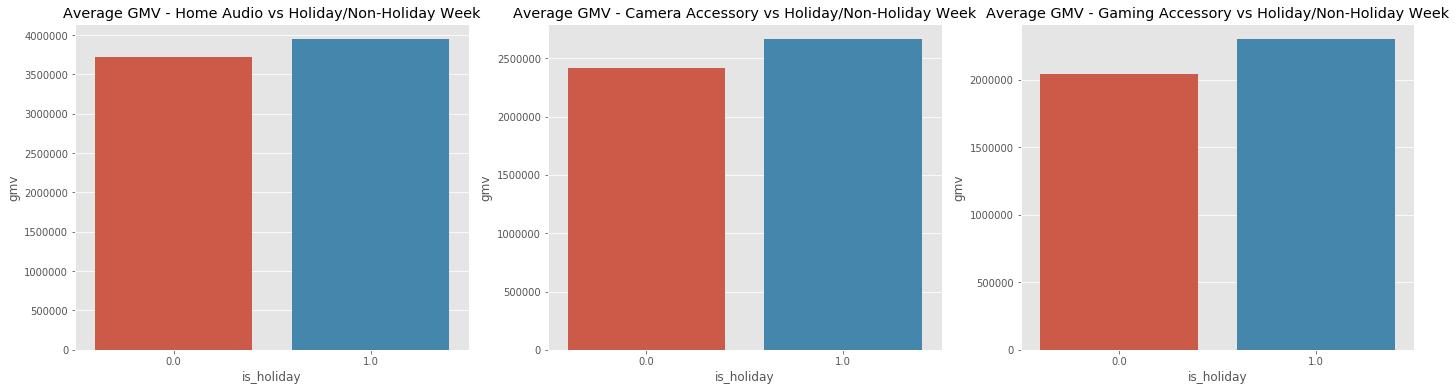

In [181]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Holiday/Non-Holiday Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Holiday/Non-Holiday Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

In [182]:
## Holiday week vs Average GMV
Holiday_week_sale_HA = final_home_audio_data_with_adstock.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_CA = final_camera_data_with_adstock.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_GA = final_gaming_data_with_adstock.groupby('is_holiday')[['gmv']].sum().reset_index()

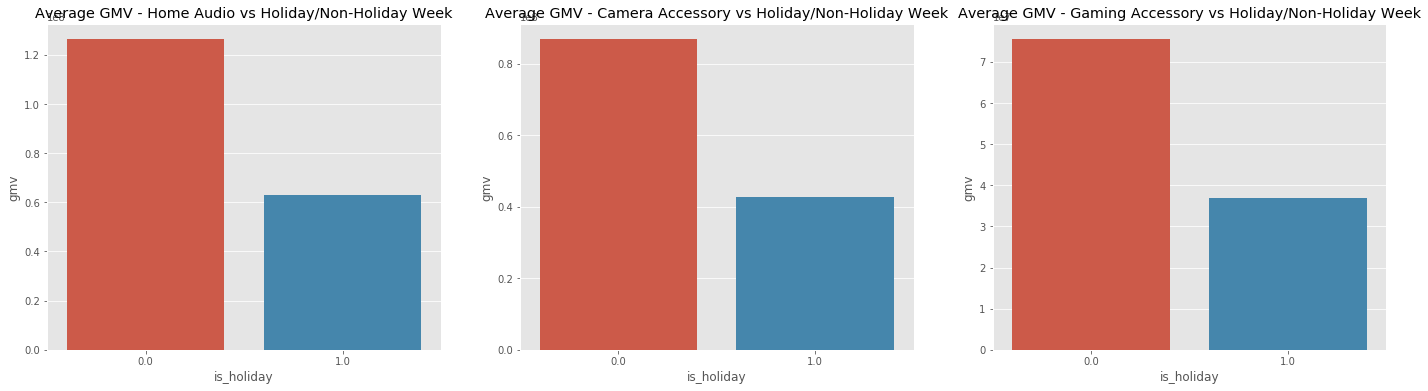

In [183]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Holiday/Non-Holiday Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Holiday/Non-Holiday Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

#### From the above two graphs(mean and sum), overall, total gmv on weeks without holidays is more, however mean_gmv for weeks with holiday is higher.


In [184]:
## Speacial Sale week vs Average GMV
Special_week_sale_HA = final_home_audio_data_with_adstock.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_CA = final_camera_data_with_adstock.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_GA = final_gaming_data_with_adstock.groupby('is_special_sale_day')[['gmv']].mean().reset_index()

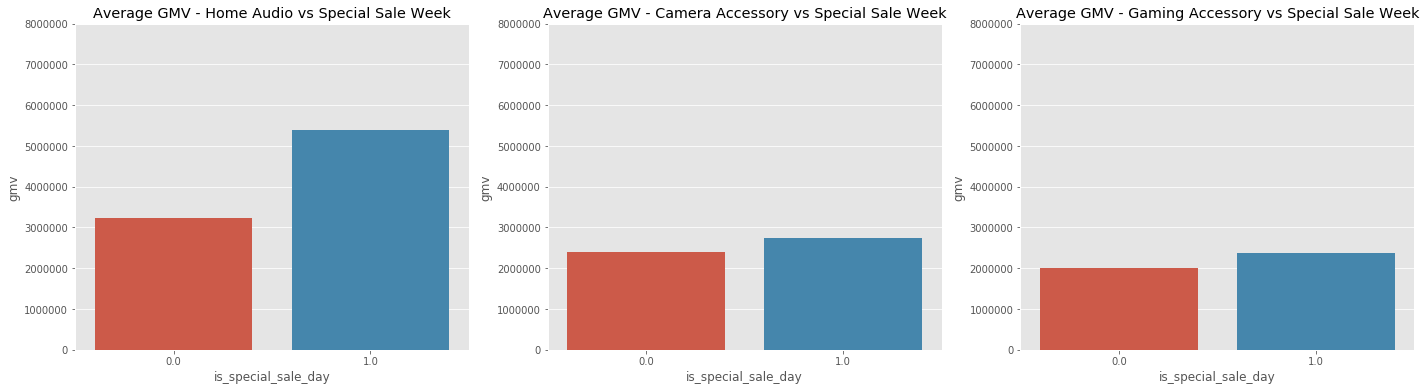

In [185]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Special Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Special Sale Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Special Sale Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Special Sale Week")

plt.show()

In [186]:
## Speacial Sale week vs Average GMV
Special_week_sale_HA = final_home_audio_data_with_adstock.groupby('is_special_sale_day')[['gmv']].sum().reset_index()
Special_week_sale_CA = final_camera_data_with_adstock.groupby('is_special_sale_day')[['gmv']].sum().reset_index()
Special_week_sale_GA = final_gaming_data_with_adstock.groupby('is_special_sale_day')[['gmv']].sum().reset_index()

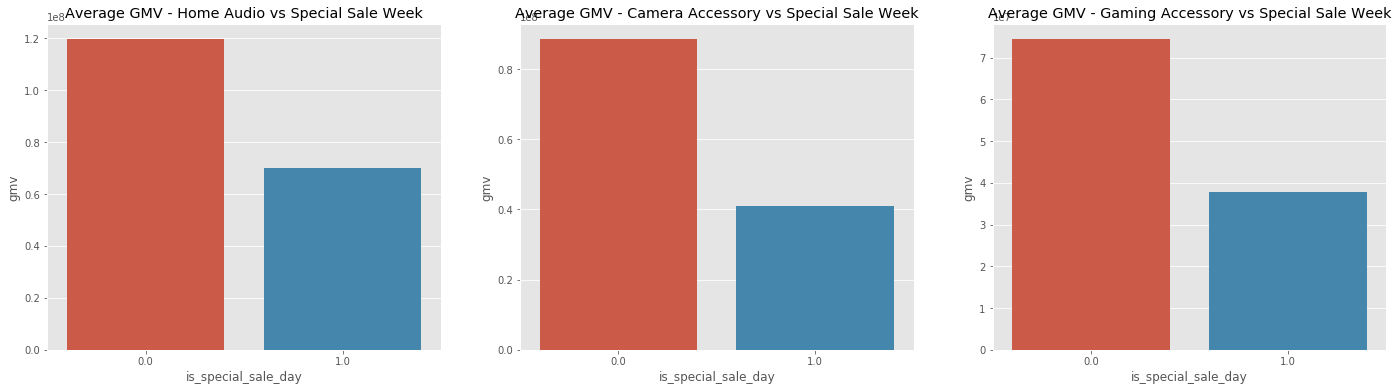

In [187]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Special Sale Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Special Sale Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Special Sale Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Special Sale Week")

plt.show()

#### From the above two graphs(mean and sum), Overall, total gmv on weeks without special sale day is more, however mean_gmv for weeks with special sale day is higher.
#### We can also see the special sale have more effect on Home Audio than other categories


In [188]:
## Speacial Sale week vs Average GMV
PayDay_week_sale_HA = final_home_audio_data_with_adstock.groupby('is_pay_days')[['gmv']].mean().reset_index()
PayDay_week_sale_CA = final_camera_data_with_adstock.groupby('is_pay_days')[['gmv']].mean().reset_index()
PayDay_week_sale_GA = final_gaming_data_with_adstock.groupby('is_pay_days')[['gmv']].mean().reset_index()

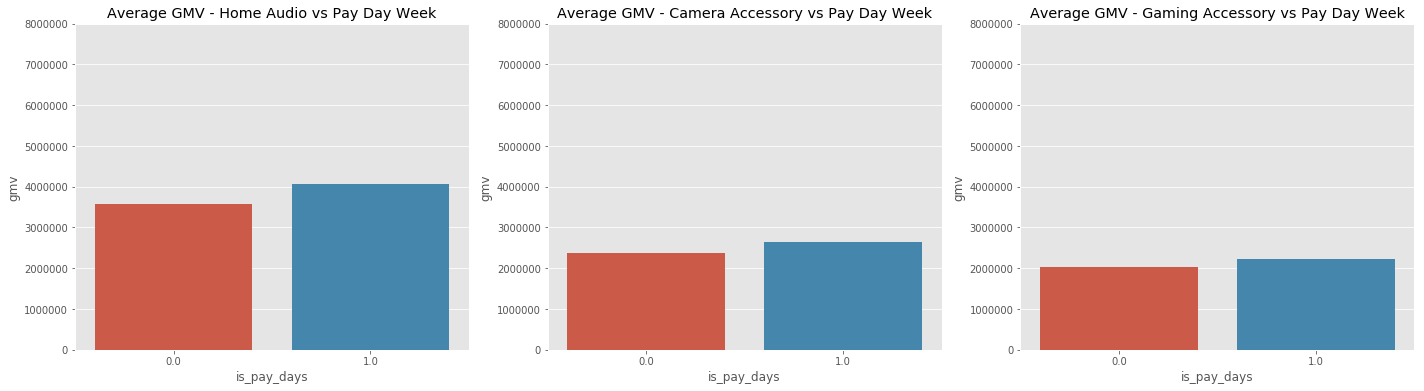

In [189]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Pay Day Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_pay_days', y='gmv', data=PayDay_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Pay Day Week")

# subplot 3: Average GMV - Camera Accessory vs Pay Day Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_pay_days', y='gmv', data=PayDay_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Pay Day Week")

# subplot 5: Average GMV - Gaming Accessory vs Pay Day Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_pay_days', y='gmv', data=PayDay_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Pay Day Week")

plt.show()

In [190]:
## Pay Day week vs Total GMV
PayDay_week_sale_HA = final_home_audio_data_with_adstock.groupby('is_pay_days')[['gmv']].sum().reset_index()
PayDay_week_sale_CA = final_camera_data_with_adstock.groupby('is_pay_days')[['gmv']].sum().reset_index()
PayDay_week_sale_GA = final_gaming_data_with_adstock.groupby('is_pay_days')[['gmv']].sum().reset_index()

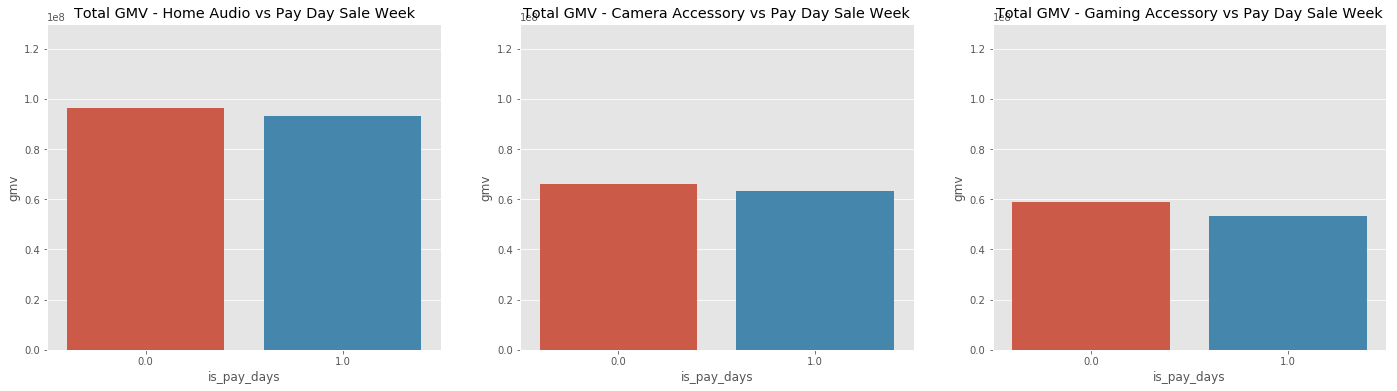

In [191]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Total GMV - Home Audio vs Pay Day Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,130000000)
ax1 = sns.barplot(x='is_pay_days', y='gmv', data=PayDay_week_sale_HA)
ax1 = plt.title("Total GMV - Home Audio vs Pay Day Sale Week")

# subplot 3: Total GMV - Camera Accessory vs Pay Day Sale Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,130000000)
ax2 = sns.barplot(x='is_pay_days', y='gmv', data=PayDay_week_sale_CA)
ax2 = plt.title("Total GMV - Camera Accessory vs Pay Day Sale Week")

# subplot 5: Total GMV - Gaming Accessory vs Pay Day Sale Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,130000000)
ax3 = sns.barplot(x='is_pay_days', y='gmv', data=PayDay_week_sale_GA)
ax3 = plt.title("Total GMV - Gaming Accessory vs Pay Day Sale Week")

plt.show()

#### From the above two graphs(mean and sum), overall, total gmv on weeks without holidays is more, however mean_gmv for weeks with holiday is higher

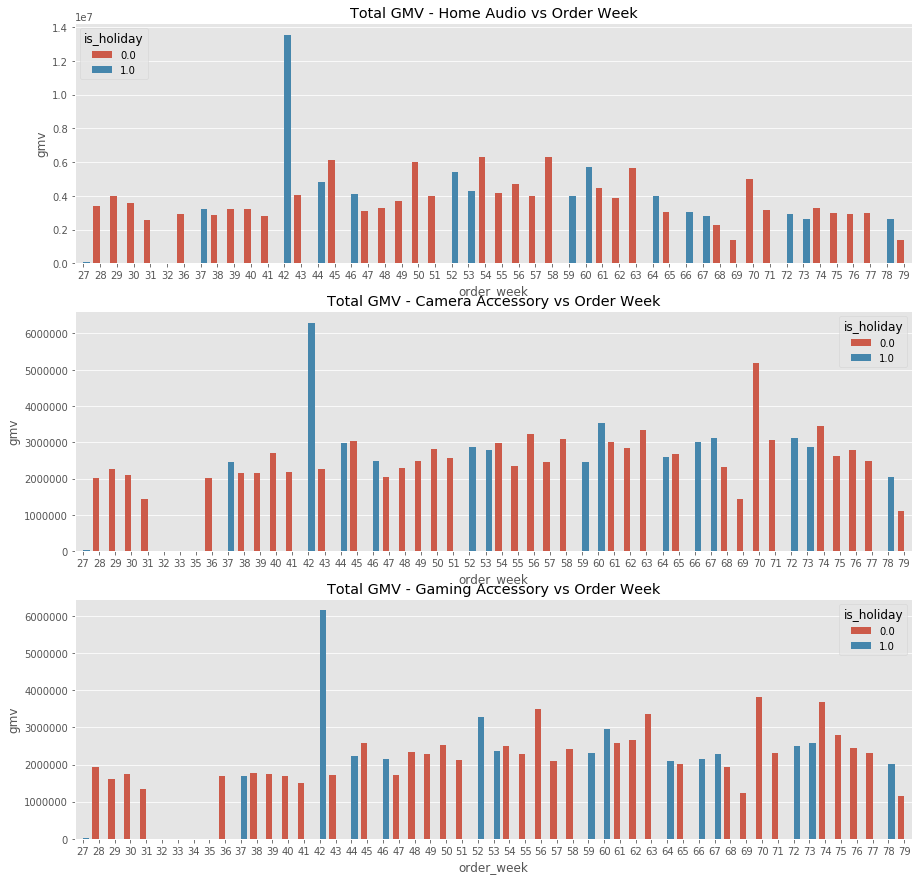

In [192]:
#Analyzing the total gmv over the weeks based upon whether the week contained a holiday or not for all the three categories
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data_with_adstock, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data_with_adstock, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data_with_adstock, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")


##### Highest sales can be seen in the 42nd week across all the 3 categories. <br><br>However, not much trend can be seen i.e. there are times when it was a holiday in the week but the sales are pretty low compared to the adjacent week when there was no hoilday

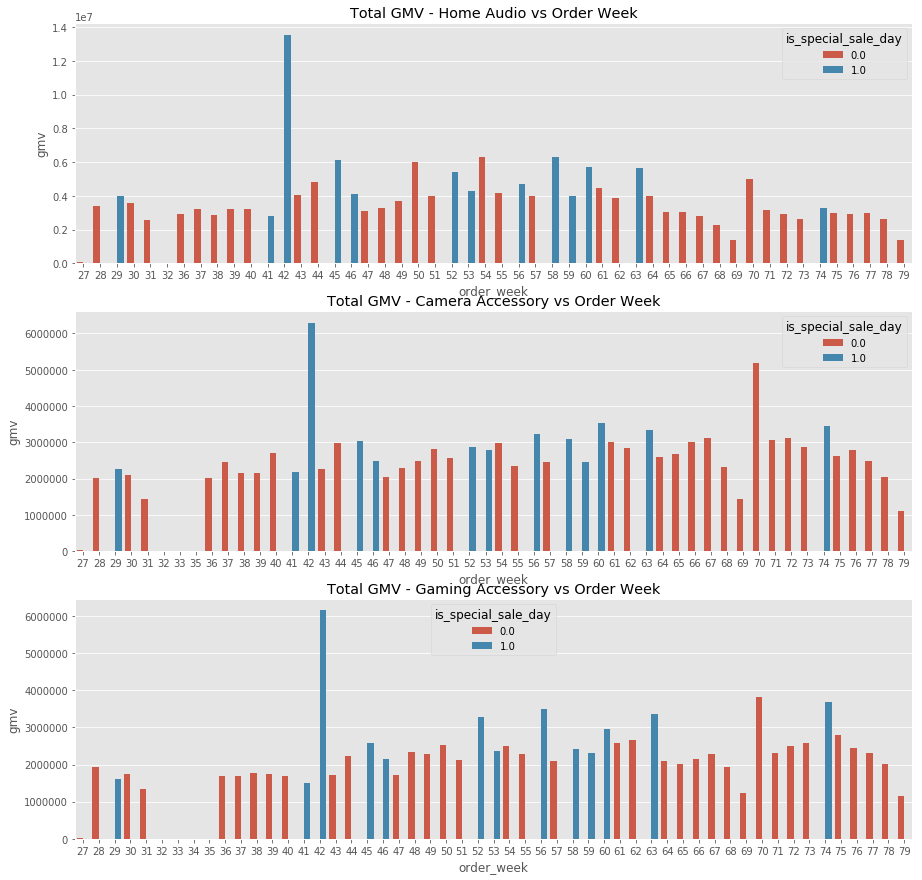

In [193]:
#Analyzing the total gmv over the weeks based upon whether the week contained a special sales day or not for all the three categories
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data_with_adstock, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data_with_adstock, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data_with_adstock, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")


##### Special Sale day seems to be an important feature across all the three categories as the sales in the week when there was a sale day are pretty higher as compared to the adjacent weeks in which sale was not there

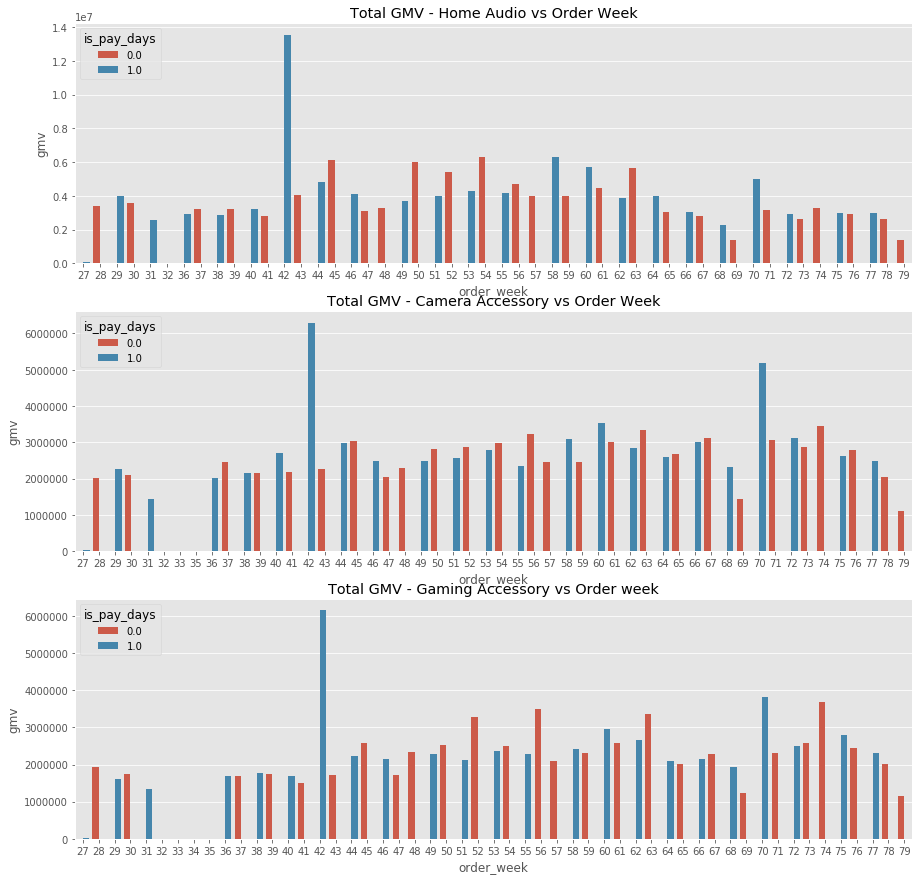

In [194]:
#Analyzing the total gmv over the weeks based upon whether the week contained a pay day or not for all the three categories
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data_with_adstock, hue = 'is_pay_days')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data_with_adstock, hue = 'is_pay_days')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data_with_adstock, hue = 'is_pay_days')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order week")


##### Pay day also seems to be an important feature as a clear trend can be seen across all the three categories i.e. the week with a Pay day is a having lesser total sales as compared to the adjacent weeks not having any pay day <br><br> Which is quite practical as people must be meeting their regular expenses in the pay day week & then going out for shopping in the following week.

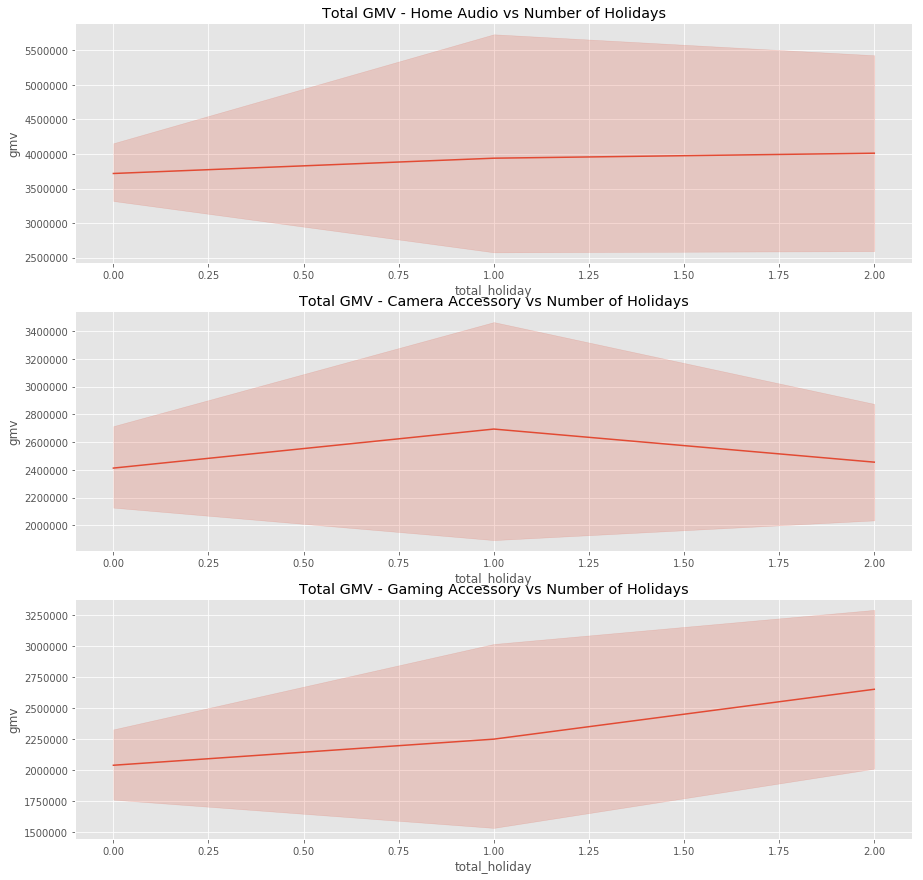

In [195]:
# Plot to see the trend b/w number of holidays in a week & the gmv
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.lineplot(x = 'total_holiday', y = 'gmv', data = final_home_audio_data_with_adstock)
ax1 = plt.title("Total GMV - Home Audio vs Number of Holidays")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.lineplot(x = 'total_holiday', y = 'gmv', data = final_camera_data_with_adstock)
ax1 = plt.title("Total GMV - Camera Accessory vs Number of Holidays")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.lineplot(x = 'total_holiday', y = 'gmv', data = final_gaming_data_with_adstock)
ax1 = plt.title("Total GMV - Gaming Accessory vs Number of Holidays")


##### Total number of holidays shows a great effect in the Gaming Accessory category where the sales can be seen increasing with increasing number of holidays in a week respectively<br><br> For Camera Accessory, the gmv can be seen increasing in a linear fashion but then suddenly dropping a bit at number of holidays = 2<br><br> For Home Audio, the sales are pretty constant across the holiday count


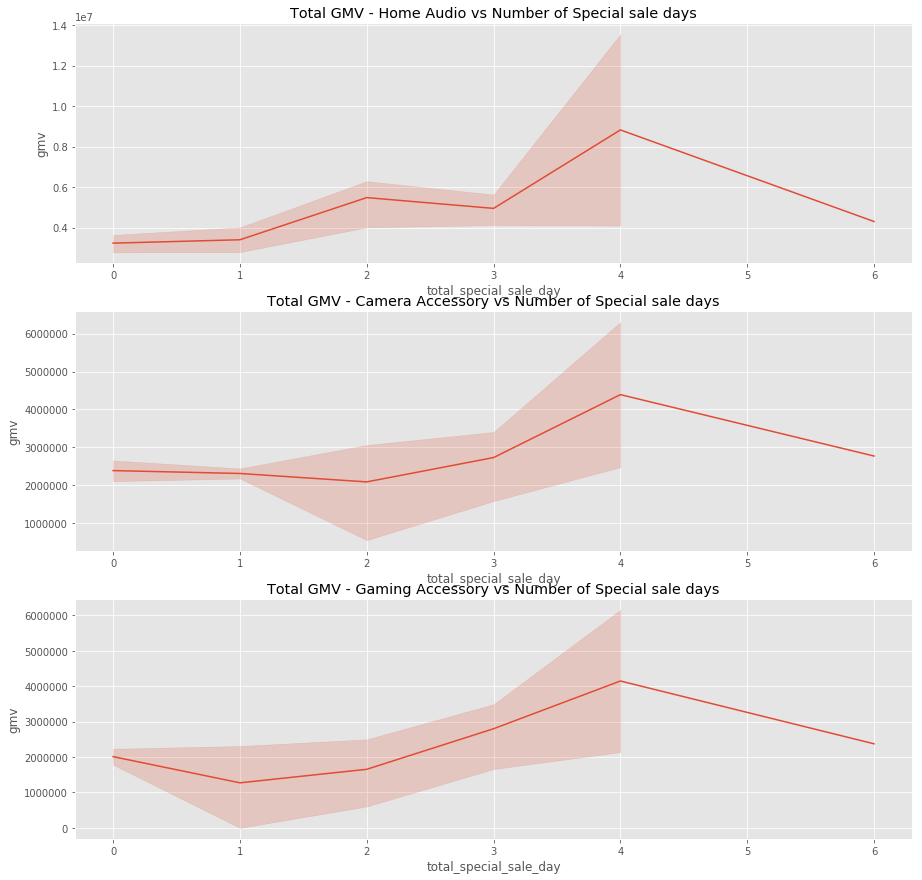

In [196]:
# Plot to see the trend b/w number of special sale days in a week & the gmv
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.lineplot(x = 'total_special_sale_day', y = 'gmv', data = final_home_audio_data_with_adstock)
ax1 = plt.title("Total GMV - Home Audio vs Number of Special sale days")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.lineplot(x = 'total_special_sale_day', y = 'gmv', data = final_camera_data_with_adstock)
ax1 = plt.title("Total GMV - Camera Accessory vs Number of Special sale days")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.lineplot(x = 'total_special_sale_day', y = 'gmv', data = final_gaming_data_with_adstock)
ax1 = plt.title("Total GMV - Gaming Accessory vs Number of Special sale days")


##### total_special_sale_days again seems an important feature. <br> <br> Among all the three categories 2-4 number of special sale days in a week, the sale is showing an increasing trend. <br><br> Important key takeaway from here is that if the number of special sale days becomes more than 4 in a week, the sales come down drastically among all the three categories

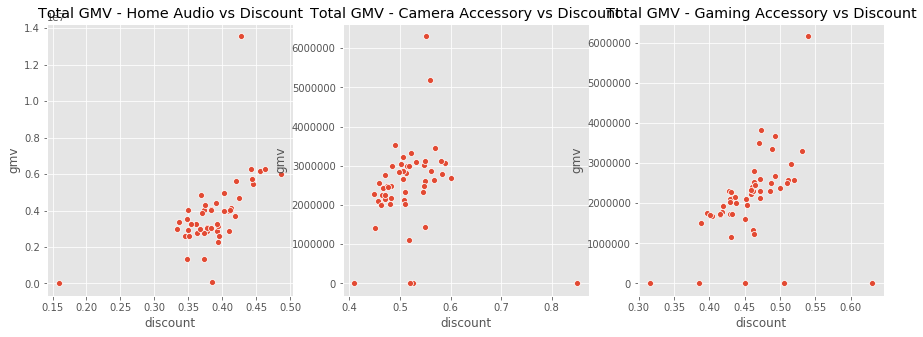

In [197]:
# Plot to see the trend b/w discount & GMV
plt.figure(figsize = (15,5))
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.scatterplot(x = 'discount', y = 'gmv', data = final_home_audio_data_with_adstock)
ax1 = plt.title("Total GMV - Home Audio vs Discount")

ax1 = plt.subplot(1, 3, 2)
ax1 = sns.scatterplot(x = 'discount', y = 'gmv', data = final_camera_data_with_adstock)
ax1 = plt.title("Total GMV - Camera Accessory vs Discount")

ax1 = plt.subplot(1, 3, 3)
ax1 = sns.scatterplot(x = 'discount', y = 'gmv', data = final_gaming_data_with_adstock)
ax1 = plt.title("Total GMV - Gaming Accessory vs Discount")


##### Clearly, we can see a positive relation b/w the discount & gmv for Gaming Accessory & Home Audio<br><br> However, GMV for Camera Accessory seems to be pretty ineffective of discount offered as we see both high & low values at the same discount percentage

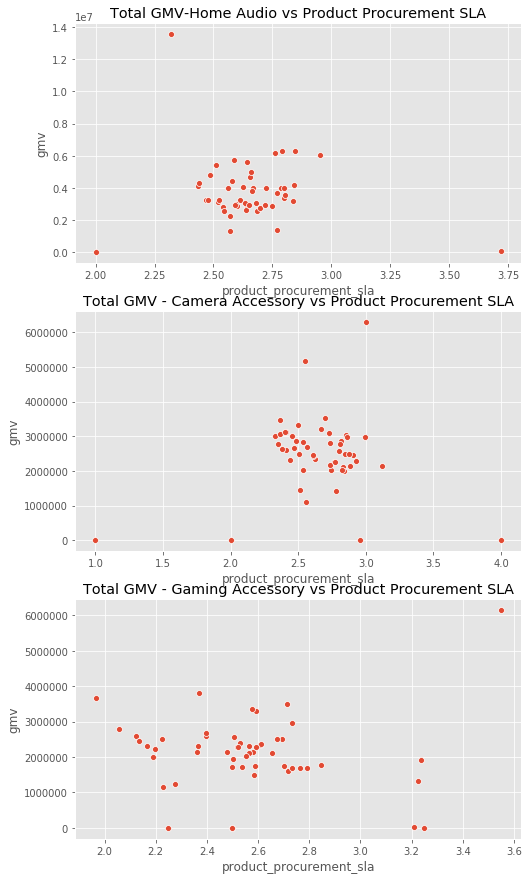

In [198]:
# Plot to see the trend b/w product_procurement_sla & GMV
plt.figure(figsize = (8,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.scatterplot(x = 'product_procurement_sla', y = 'gmv', data = final_home_audio_data_with_adstock)
ax1 = plt.title("Total GMV-Home Audio vs Product Procurement SLA")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.scatterplot(x = 'product_procurement_sla', y = 'gmv', data = final_camera_data_with_adstock)
ax1 = plt.title("Total GMV - Camera Accessory vs Product Procurement SLA")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.scatterplot(x = 'product_procurement_sla', y = 'gmv', data = final_gaming_data_with_adstock)
ax1 = plt.title("Total GMV - Gaming Accessory vs Product Procurement SLA")


##### For Gaming acessory, we can see that there is a negative relation b/w the product_procurement_sla & gmv which seems practical, as there would be higher number of orders if the delivery time is less & the product procurment sla definitely affects the total delivery time

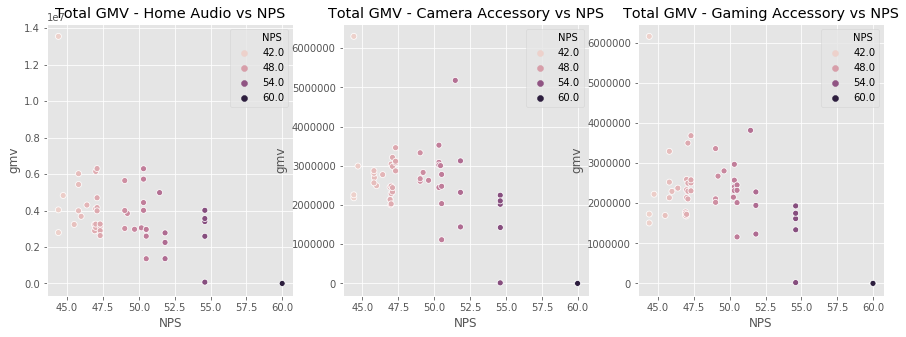

In [199]:
# Plot to see the trend b/w product_procurement_sla & NPS
plt.figure(figsize = (15,5))
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_home_audio_data_with_adstock, hue = 'NPS')
ax1 = plt.title("Total GMV - Home Audio vs NPS")

ax1 = plt.subplot(1, 3, 2)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_camera_data_with_adstock, hue = 'NPS')
ax1 = plt.title("Total GMV - Camera Accessory vs NPS")

ax1 = plt.subplot(1, 3, 3)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_gaming_data_with_adstock, hue = 'NPS')
ax1 = plt.title("Total GMV - Gaming Accessory vs NPS")


##### A negative realtion can be seen b/w the NPS & GMV for all the three categories

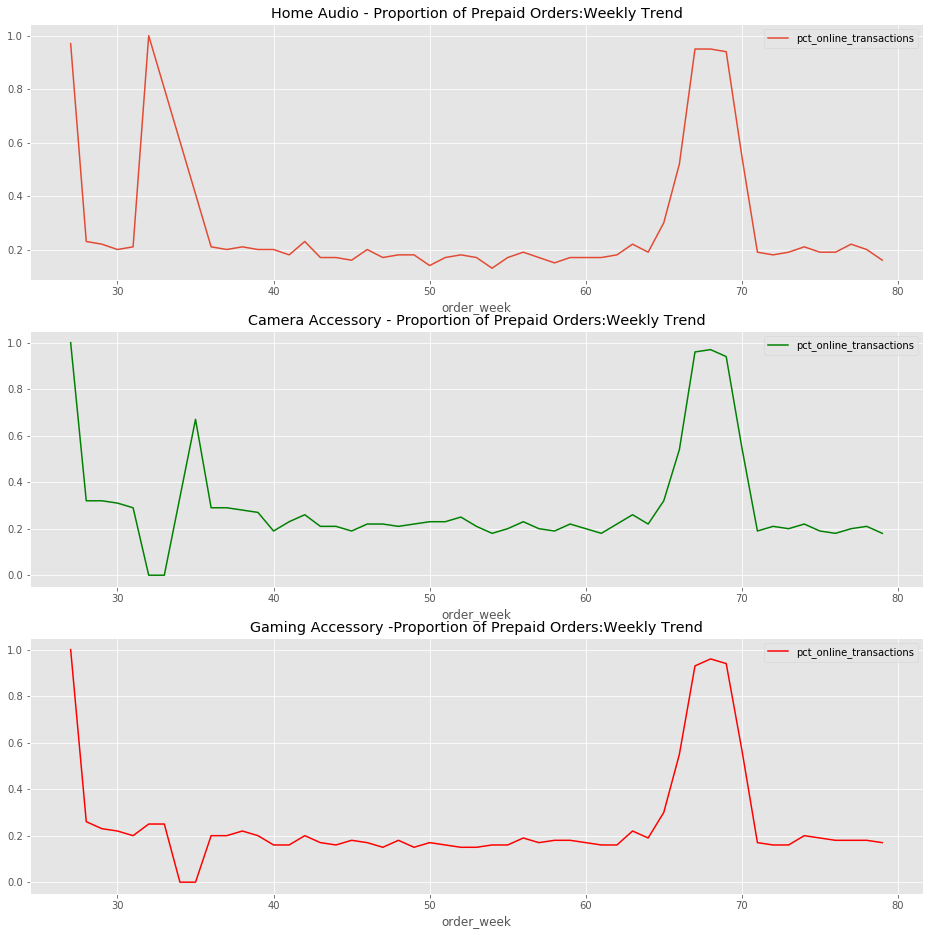

In [200]:
## Weekly Analysis of Percenatge of Prepaid Orders

fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(311)
ax1.set_title('Home Audio - Proportion of Prepaid Orders:Weekly Trend')

ax2 = fig.add_subplot(312)
ax2.set_title('Camera Accessory - Proportion of Prepaid Orders:Weekly Trend')

ax3 = fig.add_subplot(313)
ax3.set_title('Gaming Accessory -Proportion of Prepaid Orders:Weekly Trend')

final_home_audio_data_with_adstock.plot(x= 'order_week',y=['pct_online_transactions'],ax = ax1)
final_camera_data_with_adstock.plot(x= 'order_week',y=['pct_online_transactions'],ax = ax2,color = "green")
final_gaming_data_with_adstock.plot(x= 'order_week',y=['pct_online_transactions'],ax = ax3, color = "red")

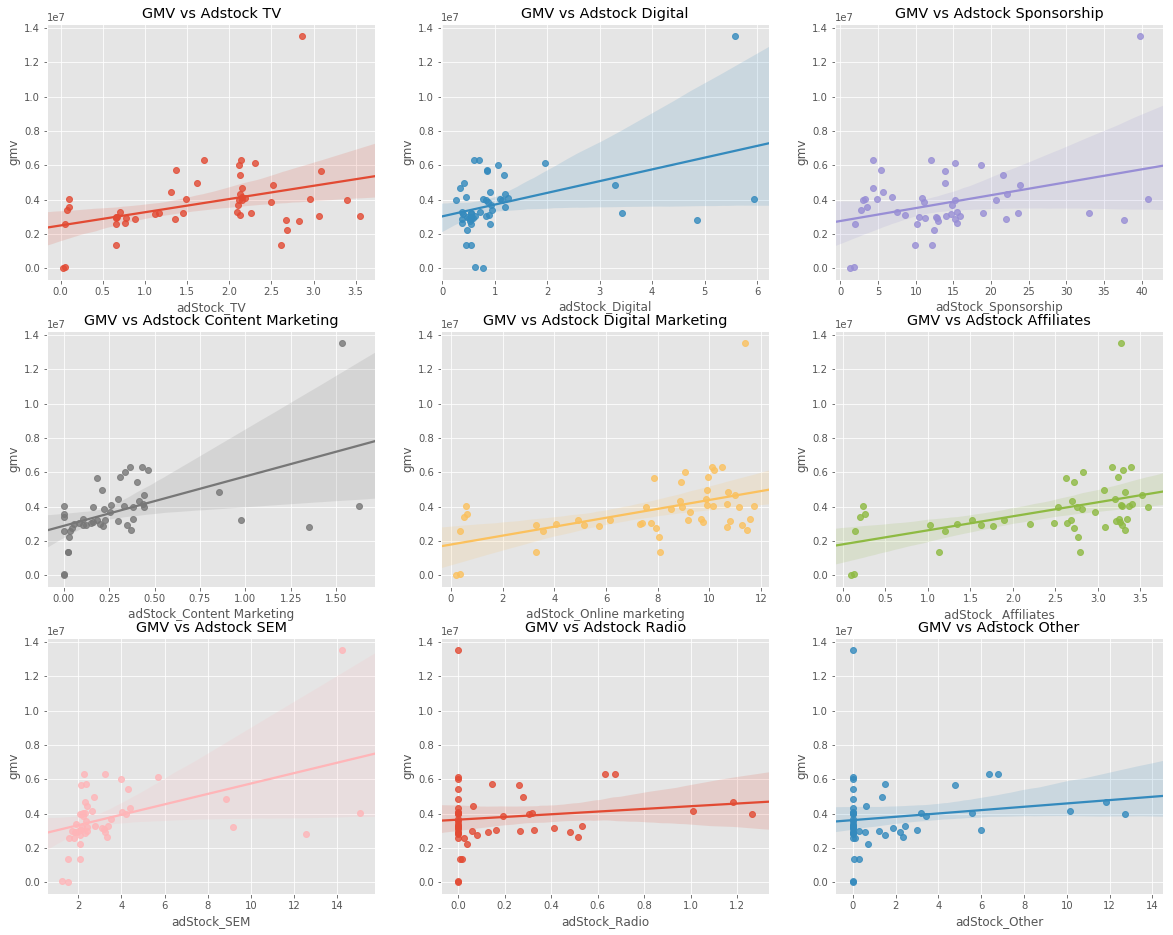

In [201]:
## Relationship between GMV and Adstocks of different channels for Home Audio
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(331)
ax1.set_title('GMV vs Adstock TV')
ax2 = fig.add_subplot(332)
ax2.set_title('GMV vs Adstock Digital')
ax3 = fig.add_subplot(333)
ax3.set_title('GMV vs Adstock Sponsorship')
ax4 = fig.add_subplot(334)
ax4.set_title('GMV vs Adstock Content Marketing')
ax5 = fig.add_subplot(335)
ax5.set_title('GMV vs Adstock Digital Marketing')
ax6 = fig.add_subplot(336)
ax6.set_title('GMV vs Adstock Affiliates')
ax7 = fig.add_subplot(337)
ax7.set_title('GMV vs Adstock SEM')
ax8 = fig.add_subplot(338)
ax8.set_title('GMV vs Adstock Radio')
ax9 = fig.add_subplot(339)
ax9.set_title('GMV vs Adstock Other')

sns.regplot(final_home_audio_data_with_adstock['adStock_TV'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax1)
sns.regplot(final_home_audio_data_with_adstock['adStock_Digital'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax2)
sns.regplot(final_home_audio_data_with_adstock['adStock_Sponsorship'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax3)
sns.regplot(final_home_audio_data_with_adstock['adStock_Content Marketing'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax4)
sns.regplot(final_home_audio_data_with_adstock['adStock_Online marketing'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax5)
sns.regplot(final_home_audio_data_with_adstock['adStock_ Affiliates'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax6)
sns.regplot(final_home_audio_data_with_adstock['adStock_SEM'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax7)
sns.regplot(final_home_audio_data_with_adstock['adStock_Radio'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax8)
sns.regplot(final_home_audio_data_with_adstock['adStock_Other'],final_home_audio_data_with_adstock['gmv'],order=1,ax = ax9)

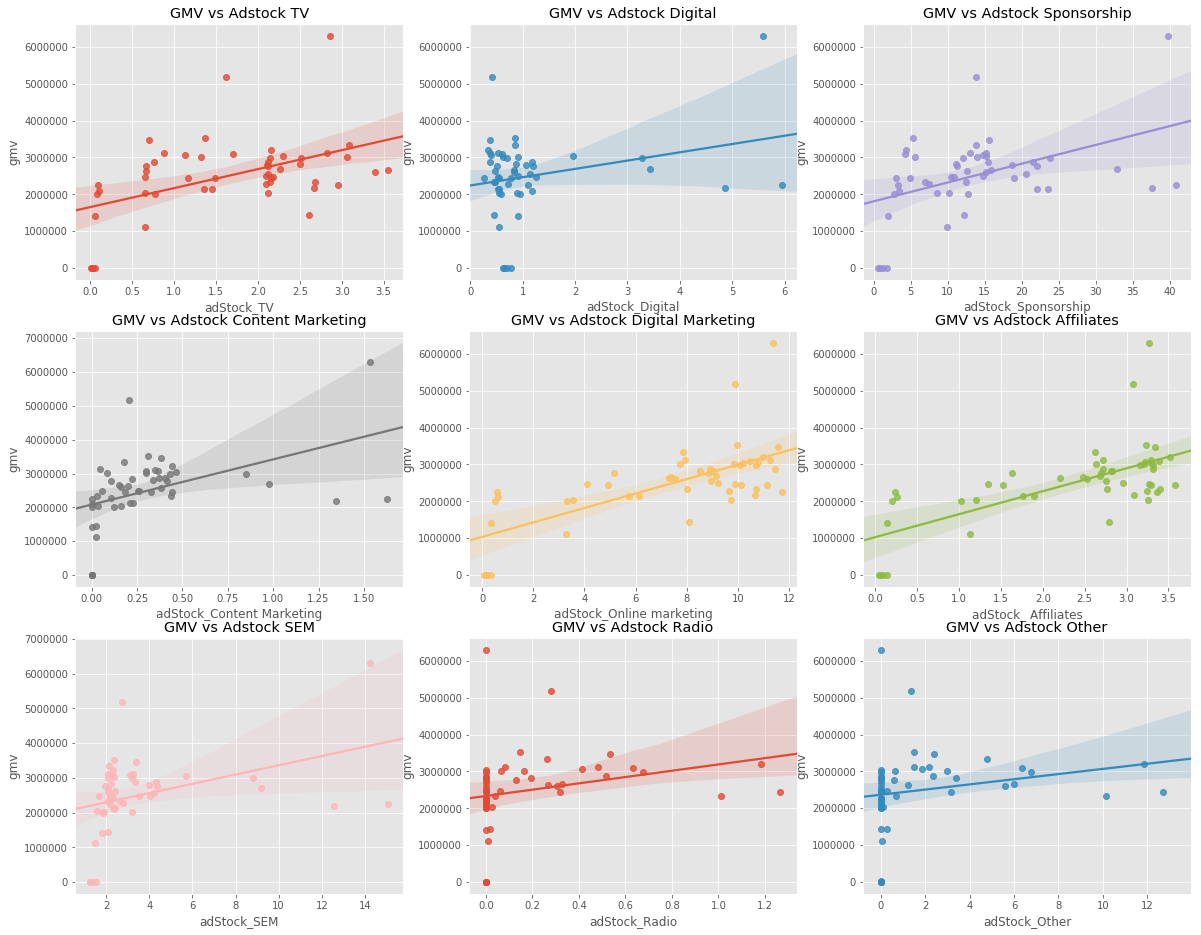

In [202]:
## Relationship between GMV and Adstocks of different channels for Camera Accessory
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(331)
ax1.set_title('GMV vs Adstock TV')
ax2 = fig.add_subplot(332)
ax2.set_title('GMV vs Adstock Digital')
ax3 = fig.add_subplot(333)
ax3.set_title('GMV vs Adstock Sponsorship')
ax4 = fig.add_subplot(334)
ax4.set_title('GMV vs Adstock Content Marketing')
ax5 = fig.add_subplot(335)
ax5.set_title('GMV vs Adstock Digital Marketing')
ax6 = fig.add_subplot(336)
ax6.set_title('GMV vs Adstock Affiliates')
ax7 = fig.add_subplot(337)
ax7.set_title('GMV vs Adstock SEM')
ax8 = fig.add_subplot(338)
ax8.set_title('GMV vs Adstock Radio')
ax9 = fig.add_subplot(339)
ax9.set_title('GMV vs Adstock Other')

sns.regplot(final_camera_data_with_adstock['adStock_TV'],final_camera_data_with_adstock['gmv'],order=1,ax = ax1)
sns.regplot(final_camera_data_with_adstock['adStock_Digital'],final_camera_data_with_adstock['gmv'],order=1,ax = ax2)
sns.regplot(final_camera_data_with_adstock['adStock_Sponsorship'],final_camera_data_with_adstock['gmv'],order=1,ax = ax3)
sns.regplot(final_camera_data_with_adstock['adStock_Content Marketing'],final_camera_data_with_adstock['gmv'],order=1,ax = ax4)
sns.regplot(final_camera_data_with_adstock['adStock_Online marketing'],final_camera_data_with_adstock['gmv'],order=1,ax = ax5)
sns.regplot(final_camera_data_with_adstock['adStock_ Affiliates'],final_camera_data_with_adstock['gmv'],order=1,ax = ax6)
sns.regplot(final_camera_data_with_adstock['adStock_SEM'],final_camera_data_with_adstock['gmv'],order=1,ax = ax7)
sns.regplot(final_camera_data_with_adstock['adStock_Radio'],final_camera_data_with_adstock['gmv'],order=1,ax = ax8)
sns.regplot(final_camera_data_with_adstock['adStock_Other'],final_camera_data_with_adstock['gmv'],order=1,ax = ax9)

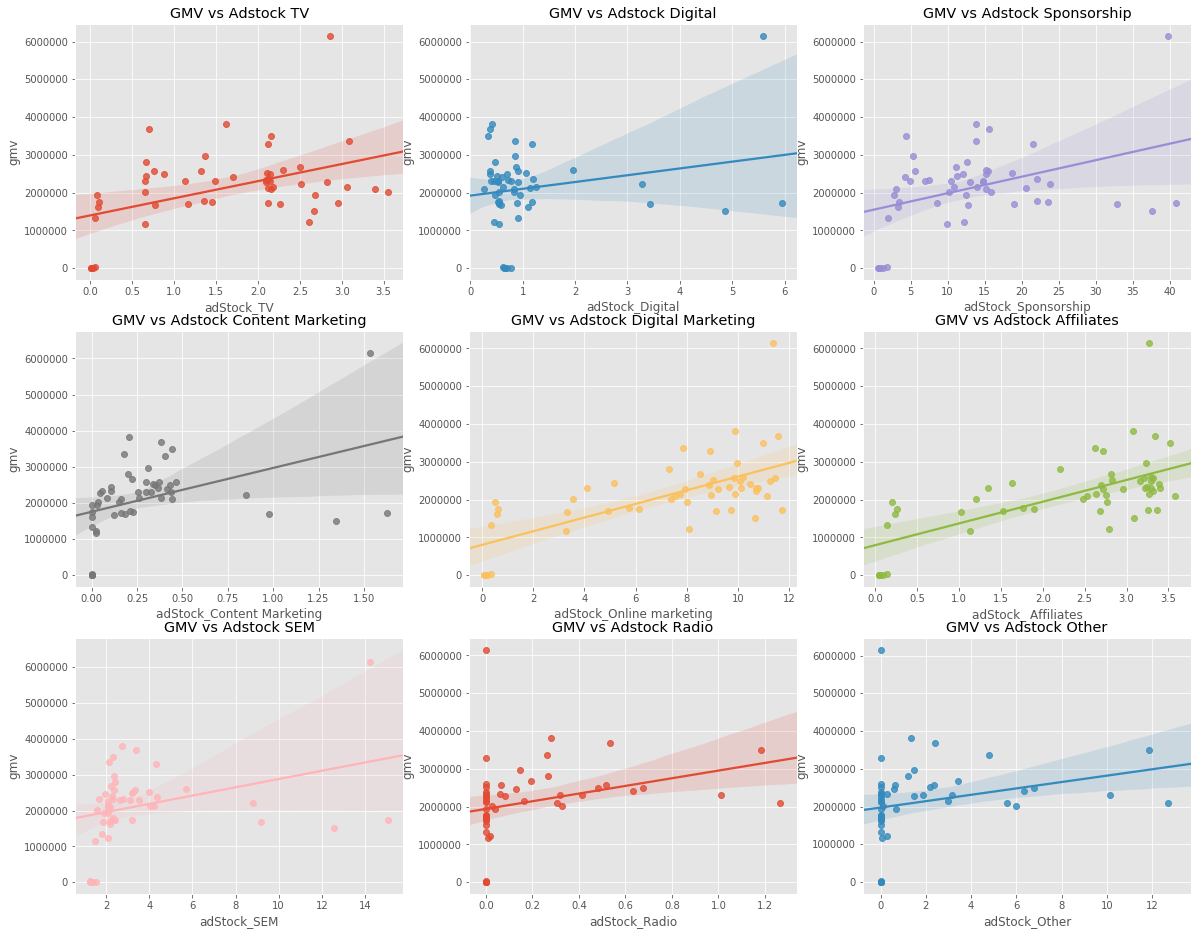

In [203]:
## Relationship between GMV and Adstocks of different channels for Gaming Accessory
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(331)
ax1.set_title('GMV vs Adstock TV')
ax2 = fig.add_subplot(332)
ax2.set_title('GMV vs Adstock Digital')
ax3 = fig.add_subplot(333)
ax3.set_title('GMV vs Adstock Sponsorship')
ax4 = fig.add_subplot(334)
ax4.set_title('GMV vs Adstock Content Marketing')
ax5 = fig.add_subplot(335)
ax5.set_title('GMV vs Adstock Digital Marketing')
ax6 = fig.add_subplot(336)
ax6.set_title('GMV vs Adstock Affiliates')
ax7 = fig.add_subplot(337)
ax7.set_title('GMV vs Adstock SEM')
ax8 = fig.add_subplot(338)
ax8.set_title('GMV vs Adstock Radio')
ax9 = fig.add_subplot(339)
ax9.set_title('GMV vs Adstock Other')

sns.regplot(final_gaming_data_with_adstock['adStock_TV'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax1)
sns.regplot(final_gaming_data_with_adstock['adStock_Digital'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax2)
sns.regplot(final_gaming_data_with_adstock['adStock_Sponsorship'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax3)
sns.regplot(final_gaming_data_with_adstock['adStock_Content Marketing'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax4)
sns.regplot(final_gaming_data_with_adstock['adStock_Online marketing'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax5)
sns.regplot(final_gaming_data_with_adstock['adStock_ Affiliates'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax6)
sns.regplot(final_gaming_data_with_adstock['adStock_SEM'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax7)
sns.regplot(final_gaming_data_with_adstock['adStock_Radio'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax8)
sns.regplot(final_gaming_data_with_adstock['adStock_Other'],final_gaming_data_with_adstock['gmv'],order=1,ax = ax9)

#### There seems to be slighty positve correlation between astocks and all three subcategories as seen in above 3 graphs

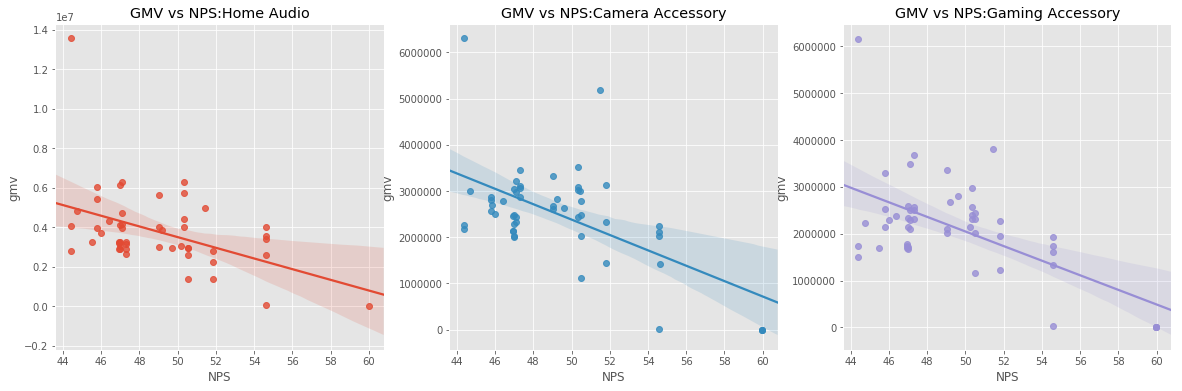

In [204]:
## Relationship between GMV and NPS for all three categories
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
ax1.set_title('GMV vs NPS:Home Audio')
ax2 = fig.add_subplot(132)
ax2.set_title('GMV vs NPS:Camera Accessory')
ax3 = fig.add_subplot(133)
ax3.set_title('GMV vs NPS:Gaming Accessory')

sns.regplot(final_home_audio_data_with_adstock['NPS'],final_home_audio_data_with_adstock['gmv'],ax = ax1)
sns.regplot(final_camera_data_with_adstock['NPS'],final_camera_data_with_adstock['gmv'],ax = ax2)
sns.regplot(final_gaming_data_with_adstock['NPS'],final_gaming_data_with_adstock['gmv'],ax = ax3) 

In [205]:
##### A negative realtion can be seen b/w the NPS & GMV

In [206]:
## importing climate data

climate_data=pd.read_csv('climate_weeks.csv')
climate_data=climate_data.drop('Heat Deg Days (°C)',axis=1)
climate_data.head()

order_week  Mean Temp (°C)  Total Rain (mm)
0          27       19.360000         0.000000
1          28       20.100000         4.416667
2          29       23.183333         1.400000
3          30       22.966667         0.900000
4          31       24.566667         4.633333

In [207]:
#Preparing final_data for 3 categories
final_camera_data_with_adstock_climate = pd.merge(final_camera_data_with_adstock,climate_data, on = "order_week", how = 'inner')
final_gaming_data_with_adstock_climate = pd.merge(final_gaming_data_with_adstock,climate_data, on = "order_week", how = 'inner')
final_home_audio_data_with_adstock_climate = pd.merge(final_home_audio_data_with_adstock,climate_data, on = "order_week", how = 'inner')

#### We're not including the climate data for modelling as its not a factor that can be controlled by the company.

In [208]:
final_camera_data_with_adstock_climate.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other        gmv  units       sla  \
0     1.255924            0.0            0.0    15375.0     25  2.280000   
1     1.883887            0.0            0.0  2019042.0   2752  7.156274   
2     2.197868            0.0            0.0  2249245.0   2917  6.491321   
3     2.354858            0.0            0.0  2105858.0   2888  6.488138   
4     1.805811            0.0            0.0  1426134.0   1932  6.470684   

   product_procurement_sla  product_mrp  selling_price  discount        NPS  \
0                 2.960000  1456.840000     615.000000  0.525600  54.599588   
1                 2.742586  1646.428137     751.233460  0.462194  54.599588   
2                 2.764789  1630.936238     783.509033  0.465349  54.599588   
3                 2.831776  1560.504313     740.930625  0.455913  54.599588   
4                 2.777959  1524.232356     756.820304  0.450456  54.605438   

   total_transactions  total_holiday  is_holiday  total_special_sale_day  \
0                  25            1.0         1.0                     0.0   
1                2630            0.0         0.0                     0.0   
2                2823            0.0         0.0                     2.0   
3                2782            0.0         0.0                     0.0   
4                1842            0.0         0.0                     0.0   

   is_special_sale_day  total_pay_days  is_pay_days  COD_count  Prepaid_count  \
0                  0.0             1.0          1.0        0.0           25.0   
1                  0.0             0.0          0.0     1796.0          834.0   
2                  1.0             1.0          1.0     1906.0          917.0   
3                  0.0             0.0          0.0     1914.0          868.0   
4                  0.0             1.0          1.0     1315.0          527.0   

   pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
0                     1.00         1.0              1.0        2.0   
1                     0.32       193.0             45.0      328.0   
2                     0.32       247.0             30.0      351.0   
3                     0.31       209.0             44.0      284.0   
4                     0.29       144.0             41.0      175.0   

   CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
0            4.0                   1.0                0.0           0.0   
1          735.0                 224.0               11.0           0.0   
2          770.0                 228.0                5.0           0.0   
3          812.0                 270.0                9.0           0.0   
4          516.0                 194.0                8.0           0.0   

   CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
0              0.0            0.0               0.0          0.0   
1              0.0            0.0               0.0          4.0   
2              0.0            0.0               0.0         11.0   
3              0.0         

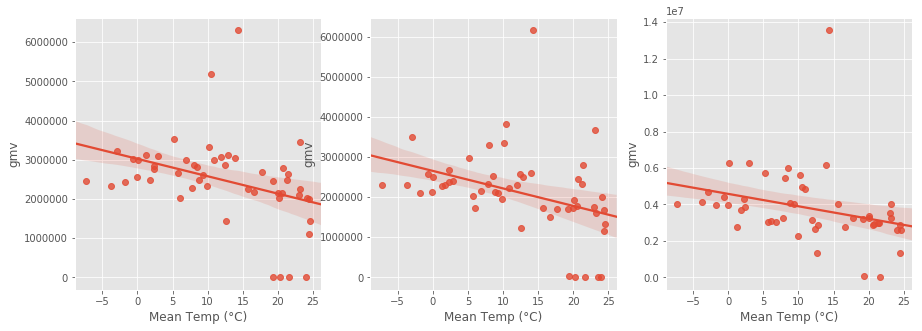

In [209]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.regplot(x = 'Mean Temp (°C)', y = 'gmv', data = final_camera_data_with_adstock_climate)

plt.subplot(1,3,2)
sns.regplot(x = 'Mean Temp (°C)', y = 'gmv', data = final_gaming_data_with_adstock_climate)

plt.subplot(1,3,3)
sns.regplot(x = 'Mean Temp (°C)', y = 'gmv', data = final_home_audio_data_with_adstock_climate)

##### Negative relation can be seen between the mean temperature and gmv

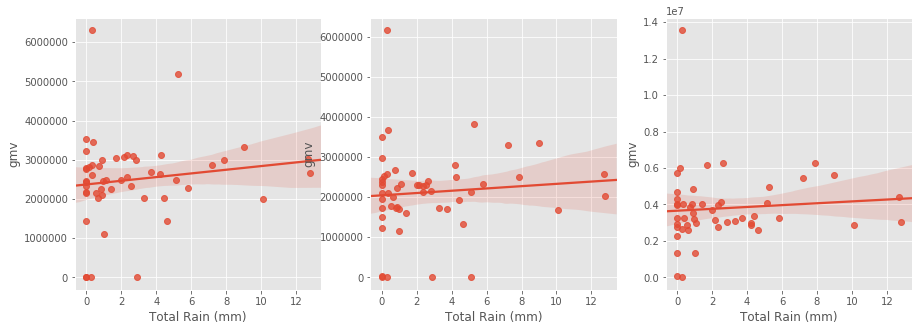

In [210]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.regplot(x = 'Total Rain (mm)', y = 'gmv', data = final_camera_data_with_adstock_climate)

plt.subplot(1,3,2)
sns.regplot(x = 'Total Rain (mm)', y = 'gmv', data = final_gaming_data_with_adstock_climate)

plt.subplot(1,3,3)
sns.regplot(x = 'Total Rain (mm)', y = 'gmv', data = final_home_audio_data_with_adstock_climate)

##### It seems that there is no such hard relation between the rain and the gmv value

## Modelling

In [211]:
#Function to calculate the elasticity of the important KPIs
def calculateElasticity(df_train, gmv, coefficient_df):
    elasticity = []
    for i in coefficient_df.feature:
        feature_mean = df_train[i].mean()
        elasticity.append((((coefficient_df.loc[coefficient_df['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient_df['elasticity'] = pd.Series(elasticity)
    return coefficient_df

## Building the Basic Linear Models

#### I. Camera Accessory - Basic Linear Model

In [212]:
# taking the final camera accessory data for basic linear mode
final_camera_data_with_adstock.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other        gmv  units       sla  \
0     1.255924            0.0            0.0    15375.0     25  2.280000   
1     1.883887            0.0            0.0  2019042.0   2752  7.156274   
2     2.197868            0.0            0.0  2249245.0   2917  6.491321   
3     2.354858            0.0            0.0  2105858.0   2888  6.488138   
4     1.805811            0.0            0.0  1426134.0   1932  6.470684   

   product_procurement_sla  product_mrp  selling_price  discount        NPS  \
0                 2.960000  1456.840000     615.000000  0.525600  54.599588   
1                 2.742586  1646.428137     751.233460  0.462194  54.599588   
2                 2.764789  1630.936238     783.509033  0.465349  54.599588   
3                 2.831776  1560.504313     740.930625  0.455913  54.599588   
4                 2.777959  1524.232356     756.820304  0.450456  54.605438   

   total_transactions  total_holiday  is_holiday  total_special_sale_day  \
0                  25            1.0         1.0                     0.0   
1                2630            0.0         0.0                     0.0   
2                2823            0.0         0.0                     2.0   
3                2782            0.0         0.0                     0.0   
4                1842            0.0         0.0                     0.0   

   is_special_sale_day  total_pay_days  is_pay_days  COD_count  Prepaid_count  \
0                  0.0             1.0          1.0        0.0           25.0   
1                  0.0             0.0          0.0     1796.0          834.0   
2                  1.0             1.0          1.0     1906.0          917.0   
3                  0.0             0.0          0.0     1914.0          868.0   
4                  0.0             1.0          1.0     1315.0          527.0   

   pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
0                     1.00         1.0              1.0        2.0   
1                     0.32       193.0             45.0      328.0   
2                     0.32       247.0             30.0      351.0   
3                     0.31       209.0             44.0      284.0   
4                     0.29       144.0             41.0      175.0   

   CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
0            4.0                   1.0                0.0           0.0   
1          735.0                 224.0               11.0           0.0   
2          770.0                 228.0                5.0           0.0   
3          812.0                 270.0                9.0           0.0   
4          516.0                 194.0                8.0           0.0   

   CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
0              0.0            0.0               0.0          0.0   
1              0.0            0.0               0.0          4.0   
2              0.0            0.0               0.0         11.0   
3              0.0         

#### Let's drop the columns which cannot be controlled by the company

In [213]:
# dropping the uncontrolable factors=
df = final_camera_data_with_adstock.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [214]:
# checking the number of columns in the dataset
len(df.columns)

46

In [215]:
# printing the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope'],
      dtype='object')

In [216]:
# splitting the data into test and train set
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [217]:
scaler = MinMaxScaler()

In [218]:
# Apply scaler() to all the columns except the categorical variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days',
       'pct_online_transactions', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [219]:
# assigning the x_train and y_train values
y_train = df_train.pop('gmv')
X_train = df_train

## RFE

In [220]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [221]:
# selecting  the top 20 features selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_SEM', 'adStock_Radio',
       'adStock_Other', 'discount', 'NPS', 'total_holiday', 'is_holiday',
       'pct_online_transactions', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraTripod', 'Filter', 'Flash', 'ReflectorUmbrella',
       'Telescope'],
      dtype='object')

In [222]:
#checking  the features which are not included in the top 20 
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_Digital', 'adStock_ Affiliates',
       'sla', 'product_procurement_sla', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'Binoculars',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'ExtensionTube', 'FlashShoeAdapter', 'Lens',
       'Softbox', 'Strap'],
      dtype='object')

In [223]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [224]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.18e-17
Time:                        00:53:24   Log-Likelihood:                 116.14
No. Observations:                  41   AIC:                            -190.3
Df Residuals:                      20   BIC:                            -154.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
7               adStock_Other  1787.76
6               adStock_Radio  1383.74
3   adStock_Content Marketing   732.97
5                 adStock_SEM   516.23
1                  adStock_TV   422.30
4    adStock_Online marketing   273.38
0                       const   155.78
2         adStock_Sponsorship    88.60
14                  CameraBag    38.94
17                     Filter    26.90
12    pct_online_transactions    16.74
11                 is_holiday    13.83
18                      Flash    13.43
20                  Telescope    13.30
9                         NPS    12.98
10              total_holiday    12.64
15              CameraBattery    11.14
8                    discount     8.43
16               CameraTripod     8.34
13            CameraAccessory     3.84
19          ReflectorUmbrella     2.60

In [225]:
#removing the feature with highest p-values
X_train_new= X_train_rfe.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     134.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.62e-18
Time:                        00:53:25   Log-Likelihood:                 115.45
No. Observations:                  41   AIC:                            -190.9
Df Residuals:                      21   BIC:                            -156.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
6               adStock_Other  530.88
5               adStock_Radio  525.01
4                 adStock_SEM  159.17
2   adStock_Content Marketing  147.98
1                  adStock_TV  108.83
0                       const   97.61
3    adStock_Online marketing   62.63
13                  CameraBag   38.93
16                     Filter   26.83
10                 is_holiday   13.35
19                  Telescope   12.75
17                      Flash   12.74
8                         NPS   12.50
9               total_holiday   12.23
11    pct_online_transactions   11.25
14              CameraBattery   11.03
15               CameraTripod    8.03
7                    discount    7.26
12            CameraAccessory    3.81
18          ReflectorUmbrella    2.60

In [226]:
#removing the feature with highest p-values
X_train_new1 = X_train_new.drop(["Filter"], axis = 1)

X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     140.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.41e-18
Time:                        00:53:25   Log-Likelihood:                 114.31
No. Observations:                  41   AIC:                            -190.6
Df Residuals:                      22   BIC:                            -158.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
6               adStock_Other  458.26
5               adStock_Radio  440.73
4                 adStock_SEM  155.05
2   adStock_Content Marketing  142.67
1                  adStock_TV   99.85
0                       const   94.38
3    adStock_Online marketing   59.09
10                 is_holiday   13.09
9               total_holiday   11.68
8                         NPS   10.95
14              CameraBattery   10.66
16                      Flash   10.07
18                  Telescope    9.54
11    pct_online_transactions    9.45
13                  CameraBag    9.03
15               CameraTripod    5.70
7                    discount    5.66
12            CameraAccessory    3.62
17          ReflectorUmbrella    2.54

In [227]:
#removing the feature with highest p-values
X_train_new2 = X_train_new1.drop(["Telescope"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.38e-19
Time:                        00:53:25   Log-Likelihood:                 113.91
No. Observations:                  41   AIC:                            -191.8
Df Residuals:                      23   BIC:                            -161.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
6               adStock_Other  367.15
5               adStock_Radio  358.79
4                 adStock_SEM  121.55
2   adStock_Content Marketing  113.82
0                       const   93.95
1                  adStock_TV   84.69
3    adStock_Online marketing   49.32
10                 is_holiday   12.90
9               total_holiday   11.23
8                         NPS   10.75
16                      Flash    9.91
11    pct_online_transactions    8.83
13                  CameraBag    8.76
14              CameraBattery    7.26
7                    discount    5.29
15               CameraTripod    4.83
12            CameraAccessory    3.57
17          ReflectorUmbrella    2.53

In [228]:
# dropping feature based on the highest p-value
X_train_new3 = X_train_new2.drop(["adStock_Radio"], axis = 1)

X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     155.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.81e-20
Time:                        00:53:25   Log-Likelihood:                 112.19
No. Observations:                  41   AIC:                            -190.4
Df Residuals:                      24   BIC:                            -161.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [229]:
#removing the feature with highest p-values
X_train_new4 = X_train_new3.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
 
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     170.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.41e-21
Time:                        00:53:25   Log-Likelihood:                 111.96
No. Observations:                  41   AIC:                            -191.9
Df Residuals:                      25   BIC:                            -164.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3                 adStock_SEM  90.41
2   adStock_Content Marketing  85.26
0                       const  63.96
8                  is_holiday  10.48
7               total_holiday   9.85
14                      Flash   8.66
1                  adStock_TV   7.78
11                  CameraBag   7.24
6                         NPS   7.09
4               adStock_Other   6.93
12              CameraBattery   6.07
5                    discount   5.27
13               CameraTripod   4.78
9     pct_online_transactions   4.47
10            CameraAccessory   3.39
15          ReflectorUmbrella   1.93

In [230]:
#removing the feature with highest p-values
X_train_new5 = X_train_new4.drop(["adStock_TV"], axis = 1)
# Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     184.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.51e-22
Time:                        00:53:25   Log-Likelihood:                 111.34
No. Observations:                  41   AIC:                            -192.7
Df Residuals:                      26   BIC:                            -167.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [231]:
#removing the feature with highest p-values
X_train_new6 = X_train_new5.drop(["ReflectorUmbrella"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     201.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.32e-23
Time:                        00:53:25   Log-Likelihood:                 110.86
No. Observations:                  41   AIC:                            -193.7
Df Residuals:                      27   BIC:                            -169.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
1   adStock_Content Marketing  57.93
2                 adStock_SEM  56.64
0                       const  33.42
7                  is_holiday   9.07
6               total_holiday   8.98
13                      Flash   7.13
11              CameraBattery   4.92
10                  CameraBag   4.71
4                    discount   4.44
12               CameraTripod   4.25
3               adStock_Other   3.88
9             CameraAccessory   3.29
5                         NPS   2.57
8     pct_online_transactions   2.14

In [232]:
#removing the feature with highest p-values
X_train_new7= X_train_new6.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     219.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.28e-24
Time:                        00:53:25   Log-Likelihood:                 110.25
No. Observations:                  41   AIC:                            -194.5
Df Residuals:                      28   BIC:                            -172.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
1   adStock_Content Marketing  57.66
2                 adStock_SEM  56.46
0                       const  33.40
12                      Flash   7.12
10              CameraBattery   4.86
9                   CameraBag   4.71
4                    discount   4.43
11               CameraTripod   4.19
3               adStock_Other   3.86
8             CameraAccessory   3.20
5                         NPS   2.56
7     pct_online_transactions   2.08
6               total_holiday   1.09

In [233]:
#removing the feature with highest p-values
X_train_new8= X_train_new7.drop(["total_holiday"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     226.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.12e-25
Time:                        00:53:26   Log-Likelihood:                 108.41
No. Observations:                  41   AIC:                            -192.8
Df Residuals:                      29   BIC:                            -172.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
1   adStock_Content Marketing  57.41
2                 adStock_SEM  56.11
0                       const  32.63
11                      Flash   7.12
9               CameraBattery   4.81
8                   CameraBag   4.59
4                    discount   4.43
10               CameraTripod   4.19
3               adStock_Other   3.80
7             CameraAccessory   3.20
5                         NPS   2.52
6     pct_online_transactions   2.06

In [234]:
#removing the feature with highest p-values
X_train_new9= X_train_new8.drop(["CameraAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     227.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.92e-25
Time:                        00:53:26   Log-Likelihood:                 105.91
No. Observations:                  41   AIC:                            -189.8
Df Residuals:                      30   BIC:                            -171.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
1   adStock_Content Marketing  51.46
2                 adStock_SEM  49.76
0                       const  29.44
10                      Flash   5.98
4                    discount   4.35
7                   CameraBag   4.25
8               CameraBattery   4.18
9                CameraTripod   4.15
3               adStock_Other   3.78
5                         NPS   2.49
6     pct_online_transactions   1.85

In [235]:
#removing the feature with highest p-values
X_train_new10= X_train_new9.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     236.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.18e-26
Time:                        00:53:26   Log-Likelihood:                 103.90
No. Observations:                  41   AIC:                            -187.8
Df Residuals:                      31   BIC:                            -170.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  29.28
9                      Flash   5.97
3                   discount   4.32
6                  CameraBag   4.24
7              CameraBattery   4.17
8               CameraTripod   4.15
4                        NPS   2.43
1  adStock_Content Marketing   2.42
5    pct_online_transactions   1.76
2              adStock_Other   1.54

In [236]:
#removing the feature with highest p-values
X_train_new11= X_train_new10.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     261.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.50e-27
Time:                        00:53:26   Log-Likelihood:                 102.91
No. Observations:                  41   AIC:                            -187.8
Df Residuals:                      32   BIC:                            -172.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  24.13
8                    Flash   5.94
2                 discount   4.09
5                CameraBag   3.98
6            CameraBattery   3.78
7             CameraTripod   3.41
3                      NPS   1.94
4  pct_online_transactions   1.75
1            adStock_Other   1.53

In [237]:
#removing the feature with highest p-values
X_train_new12= X_train_new11.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new12)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     294.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.60e-28
Time:                        00:53:26   Log-Likelihood:                 101.96
No. Observations:                  41   AIC:                            -187.9
Df Residuals:                      33   BIC:                            -174.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  21.22
7                    Flash   4.59
1                 discount   3.85
5            CameraBattery   3.77
4                CameraBag   3.74
6             CameraTripod   3.38
2                      NPS   1.93
3  pct_online_transactions   1.72

##### Selecting this as our first model for evaluation as all the p-values & VIFs are in the acceptable range

In [238]:
#removing the feature with highest vif as all the p-values were in the acceptable range.
X_train_new13= X_train_new12.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     94.31
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.86e-20
Time:                        00:53:26   Log-Likelihood:                 75.740
No. Observations:                  41   AIC:                            -137.5
Df Residuals:                      34   BIC:                            -125.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  17.47
4                CameraBag   3.52
5            CameraBattery   3.17
2                      NPS   1.92
6             CameraTripod   1.81
3  pct_online_transactions   1.70
1                 discount   1.52

In [239]:
#removing the feature with highest p-values
X_train_new14= X_train_new13.drop(["pct_online_transactions"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     113.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.28e-20
Time:                        00:53:26   Log-Likelihood:                 75.273
No. Observations:                  41   AIC:                            -138.5
Df Residuals:                      35   BIC:                            -128.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0571      0.027      2.102

Features    VIF
0          const  17.36
3      CameraBag   3.45
4  CameraBattery   3.16
5   CameraTripod   1.80
2            NPS   1.37
1       discount   1.36

In [240]:
# Dropping feature based on the highest p-value
X_train_new15= X_train_new14.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.47e-21
Time:                        00:53:26   Log-Likelihood:                 73.838
No. Observations:                  41   AIC:                            -137.7
Df Residuals:                      36   BIC:                            -129.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0740      0.026      2.893

Features    VIF
0          const  14.73
3  CameraBattery   2.99
2      CameraBag   2.94
4   CameraTripod   1.71
1            NPS   1.37

##### Selecting this as our second model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [241]:
# Dropping another feature to see if the model is able to explain the variance with one less feature or not based upon minimum loss in adjusted r-squared
X_train_new16= X_train_new15.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     129.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.19e-19
Time:                        00:53:26   Log-Likelihood:                 66.910
No. Observations:                  41   AIC:                            -125.8
Df Residuals:                      37   BIC:                            -119.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1141      0.027      4.194   

Features    VIF
0         const  12.23
3  CameraTripod   1.65
1           NPS   1.37
2     CameraBag   1.35

##### Selecting this as our third model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [242]:
# Dropping another feature to see if the model is able to explain the variance with one less feature or not based upon minimum loss in adjusted r-squared
X_train_new17= X_train_new16.drop(["CameraTripod"], axis = 1)
 # Add a constant
X_train_lm4 = sm.add_constant(X_train_new17)
    # Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params
print(lr4.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm4 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4 .values, i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     156.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.67e-19
Time:                        00:53:27   Log-Likelihood:                 62.438
No. Observations:                  41   AIC:                            -118.9
Df Residuals:                      38   BIC:                            -113.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1477      0.027      5.412      0.0

Features    VIF
0      const  10.16
1        NPS   1.12
2  CameraBag   1.12

##### Selecting this as our fourth model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [243]:
# k-fold CV - adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3, X_train_lm4]
for i in range(0,len(x_trains)):
    x_test = df[x_trains[i].drop('const',axis = 1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df['gmv']
    scores = cross_val_score(lm, x_test, y_test , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.5716307170173522
lr model 2 r2_score 0.41838876232517974
lr model 3 r2_score 0.14124792347178788
lr model 4 r2_score 0.2944186984126991


In [244]:
# k-fold CV
lm = LinearRegression()
# scores = cross_val_score(lm, X_train_lm4, y_train, scoring='r2', cv=5)
# scores

#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3, X_train_lm4]
for i in range(0,len(x_trains)):
    x_test = df[x_trains[i].drop('const',axis = 1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df['gmv']
    scores = cross_val_score(lm, x_trains[i], y_train , scoring='mean_squared_error', cv=10)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0008102616590540754
lr model 2 MSE 0.0021918476317663916
lr model 3 MSE 0.003386518004216926
lr model 4 MSE 0.0033080530749224


##### Based upon the above adjusted r-squared from cross-validation & MSE, the first model seems the best model

### Model Evaluation

In [245]:
y_test = df_test.pop('gmv')
X_test = df_test

In [246]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'pct_online_transactions', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [247]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
6           33      8  2015    0.000000         0.387803             0.000000   
32          60      2  2016    0.440584         0.588921             0.211609   
38          66      4  2016    0.990971         0.300736             0.617353   
35          63      3  2016    1.000000         0.579623             0.611897   
33          61      2  2016    0.422372         0.644730             0.222695   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
6                    0.000000                  0.000000             0.000000   
32                   0.718614                  0.866206             0.972552   
38                   0.191557                  0.671023             0.790947   
35                   0.418960                  0.681721             0.785803   
33                   0.696666                  0.857921             0.963873   

    adStock_SEM  adStock_Radio  adStock_Other       sla  \
6      0.000000       0.000000       0.000000  0.752212   
32     0.329271       0.218750       0.218750  0.979147   
38     0.230894       0.241667       0.441460  0.524385   
35     0.251681       0.386667       0.706336  0.843206   
33     0.336290       0.093750       0.093750  1.000000   

    product_procurement_sla  discount       NPS  total_holiday  is_holiday  \
6                  0.000000  1.000000  1.000000            0.0         0.0   
32                 0.565428  0.055216  0.288647            1.0         1.0   
38                 0.484511  0.128248  0.296878            1.0         1.0   
35                 0.500063  0.135462  0.192408            0.0         0.0   
33                 0.442266  0.204454  0.288647            0.0         0.0   

    total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
6                 0.333333                  1.0             1.0          1.0   
32                0.500000                  1.0             1.0          1.0   
38                0.000000                  0.0             1.0          1.0   
35                0.500000                  1.0             0.0          0.0   
33                0.000000                  0.0             0.0          0.0   

    pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
6                  0.000000    0.000000         0.000000   0.000000   
32                 0.370370    0.876866         1.000000   0.697674   
38                 1.000000    0.925373         0.355932   0.739535   
35                 0.481481    0.910448         0.711864   0.806977   
33                 0.333333    0.985075         0.949153   0.727907   

    CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
6        0.000000              0.000000                0.0           0.0   
32       1.000000              1.000000                0.4           0.3   
38       0.746073              0.914596                0.4           0.3   
35       0.749346              0.732919                0.3           0.1   
33       0.545812              0.472050                0.3           0.5   

    CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
6          0.000000            0.0          0.000000     0.000000   
32         0.411765            0.0          0.285714     1.000000   
38         0.403361            0.0          1.000000     0.269231   
35         0.319328            0.0          0.714286     0.750000   
33         0.327731            0.0          0.857143     0.980769   

    CameraRemoteControl  CameraTripod  ExtensionTube    Filter     Flash  \
6              0.000000      0.000000            0.0  0.000000  0.000000   
32             1.000000      0.969427            0.0  0.692308  0.686877   
38             0.860294      0.713376            0.4  0.720000  0.627544   
35             0.985294      0.791083            1.0  1.000000  0.657861   
33             0.963235      0.960510            0.6

In [248]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  discount       NPS  pct_online_transactions  CameraBag  \
6     1.0  1.000000  1.000000                 0.000000   0.000000   
32    1.0  0.055216  0.288647                 0.370370   0.697674   
38    1.0  0.128248  0.296878                 1.000000   0.739535   
35    1.0  0.135462  0.192408                 0.481481   0.806977   
33    1.0  0.204454  0.288647                 0.333333   0.727907   
51    1.0  0.124305  0.302585                 0.333333   0.455814   
5     1.0  0.132127  1.000000                 0.000000   0.000000   
26    1.0  0.118267  0.050463                 0.333333   0.616279   
25    1.0  0.000000  0.000000                 0.388889   0.662791   
45    1.0  0.238472  0.066216                 0.370370   1.000000   
48    1.0  0.298216  0.302585                 0.333333   0.818605   

    CameraBattery  CameraTripod     Flash  
6        0.000000      0.000000  0.000000  
32       1.000000      0.969427  0.686877  
38       0.746073      0.713376  0.627544  
35       0.749346      0.791083  0.657861  
33       0.545812      0.960510  0.879168  
51       0.165576      0.110828  0.225206  
5        0.000000      0.000000  0.000000  
26       0.363874      1.000000  0.881767  
25       0.419503      0.854777  0.360329  
45       0.496073      0.537580  0.689043  
48       0.433246      0.287898  1.000000

In [249]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0,0.5,'y_pred')

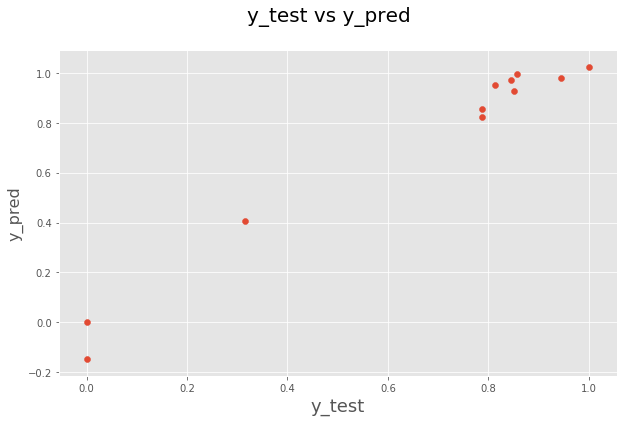

In [250]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity - Camera Accessory - Basic Linear Model

In [251]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

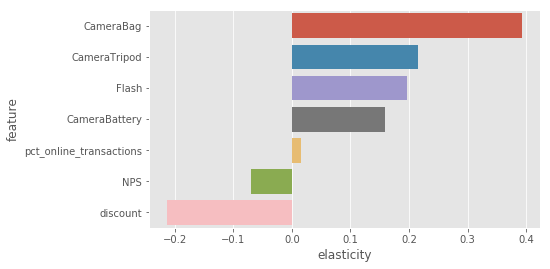

In [252]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### II. Gaming Accessory - Basic Linear Model

In [253]:
# Creating df1 by dropping the features which the company cannot control
df1= final_gaming_data_with_adstock.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [254]:
#Checking the columns
df1.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory'],
      dtype='object')

In [255]:
#Doing the test train split
np.random.seed(0)
df1_train, df1_test = train_test_split(df1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [256]:
#Scaling the features
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars1=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df1_train[num_vars1] = scaler.fit_transform(df1_train[num_vars1])
df1_test[num_vars1] = scaler.fit_transform(df1_test[num_vars1])

In [257]:
# assiging the values for x_train & y_train
y_train1 = df1_train.pop('gmv')
X_train1 = df1_train

## RFE

In [258]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train1, y_train1)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train1, y_train1)

In [259]:
## selecting the top 20 rfe features
col = X_train1.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Content Marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'NPS', 'total_holiday', 'is_holiday', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard',
       'GamingMouse', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController'],
      dtype='object')

In [260]:
## checking the columns excluded by rfe
X_train1.columns[~rfe.support_]

Index(['order_week', 'Month', 'adStock_Sponsorship',
       'adStock_Online marketing', 'sla', 'product_procurement_sla',
       'discount', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingChargingStation',
       'GamingMousePad', 'TVOutCableAccessory'],
      dtype='object')

In [261]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train1[col]

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe1)
# Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.35e-17
Time:                        00:53:35   Log-Likelihood:                 114.93
No. Observations:                  42   AIC:                            -187.9
Df Residuals:                      21   BIC:                            -151.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  8.925740e+08
6                 adStock_SEM  7.454440e+03
3             adStock_Digital  4.475930e+03
7               adStock_Radio  3.753880e+03
8               adStock_Other  3.657300e+03
2                  adStock_TV  4.854200e+02
4   adStock_Content Marketing  2.843000e+02
5         adStock_ Affiliates  8.000000e+01
1                        Year  5.488000e+01
19        JoystickGamingWheel  2.863000e+01
10              total_holiday  2.340000e+01
11                 is_holiday  2.260000e+01
14              GamingHeadset  1.513000e+01
13              GamingAdapter  1.376000e+01
17                GamingMouse  1.152000e+01
9                         NPS  1.150000e+01
12         GamingAccessoryKit  1.133000e+01
16           GamingMemoryCard  8.470000e+00
15             GamingKeyboard  5.880000e+00
20           MotionController  5.310000e+00
18              GamingSpeaker  4.700000e+00

In [262]:
# removing the feature with highest p-value
X_train1_new= X_train_rfe1.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new)
  
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.74e-18
Time:                        00:53:35   Log-Likelihood:                 113.11
No. Observations:                  42   AIC:                            -186.2
Df Residuals:                      22   BIC:                            -151.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.868306e+08
6                 adStock_SEM  6.218360e+03
3             adStock_Digital  3.569970e+03
7               adStock_Radio  3.373580e+03
8               adStock_Other  3.348650e+03
2                  adStock_TV  4.030900e+02
4   adStock_Content Marketing  2.820900e+02
5         adStock_ Affiliates  7.941000e+01
10              total_holiday  2.108000e+01
11                 is_holiday  2.054000e+01
1                        Year  1.764000e+01
13              GamingAdapter  1.211000e+01
9                         NPS  1.125000e+01
14              GamingHeadset  1.096000e+01
12         GamingAccessoryKit  8.100000e+00
17                GamingMouse  7.510000e+00
16           GamingMemoryCard  6.850000e+00
15             GamingKeyboard  5.630000e+00
18              GamingSpeaker  4.100000e+00
19           MotionController  3.980000e+00

In [263]:
# removing the feature with highest p-values
X_train1_new1= X_train1_new.drop(["GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new1)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.55e-18
Time:                        00:53:35   Log-Likelihood:                 111.98
No. Observations:                  42   AIC:                            -186.0
Df Residuals:                      23   BIC:                            -152.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.823193e+08
6                 adStock_SEM  6.015710e+03
3             adStock_Digital  3.515650e+03
7               adStock_Radio  3.351380e+03
8               adStock_Other  3.313910e+03
2                  adStock_TV  4.022400e+02
4   adStock_Content Marketing  2.466000e+02
5         adStock_ Affiliates  7.857000e+01
10              total_holiday  2.107000e+01
11                 is_holiday  2.047000e+01
1                        Year  1.736000e+01
9                         NPS  1.111000e+01
13              GamingHeadset  1.043000e+01
16                GamingMouse  7.150000e+00
12         GamingAccessoryKit  6.320000e+00
15           GamingMemoryCard  6.130000e+00
14             GamingKeyboard  5.250000e+00
17              GamingSpeaker  3.840000e+00
18           MotionController  3.720000e+00

In [264]:
# dropping feature on the basis of highest p-value
X_train1_new2= X_train1_new1.drop(["GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new2)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.58e-19
Time:                        00:53:35   Log-Likelihood:                 110.79
No. Observations:                  42   AIC:                            -185.6
Df Residuals:                      24   BIC:                            -154.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.751940e+08
6                 adStock_SEM  5.236440e+03
3             adStock_Digital  2.947290e+03
7               adStock_Radio  2.831630e+03
8               adStock_Other  2.818960e+03
2                  adStock_TV  3.418600e+02
4   adStock_Content Marketing  2.445300e+02
5         adStock_ Affiliates  6.654000e+01
10              total_holiday  2.063000e+01
11                 is_holiday  1.989000e+01
1                        Year  1.692000e+01
9                         NPS  1.060000e+01
13              GamingHeadset  1.041000e+01
12         GamingAccessoryKit  6.310000e+00
14           GamingMemoryCard  5.060000e+00
15                GamingMouse  4.800000e+00
16              GamingSpeaker  3.800000e+00
17           MotionController  3.270000e+00

In [265]:
# removing feature on the basis of highest vif value  as all the p-values are in acceptable range
X_train1_new3= X_train1_new2.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new3)
    # Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     63.38
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.12e-16
Time:                        00:53:35   Log-Likelihood:                 94.526
No. Observations:                  42   AIC:                            -155.1
Df Residuals:                      25   BIC:                            -125.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.154553e+08
6               adStock_Radio  2.095000e+02
7               adStock_Other  1.733900e+02
4   adStock_Content Marketing  8.423000e+01
3             adStock_Digital  7.034000e+01
2                  adStock_TV  3.567000e+01
5         adStock_ Affiliates  3.075000e+01
9               total_holiday  1.726000e+01
10                 is_holiday  1.645000e+01
12              GamingHeadset  1.036000e+01
8                         NPS  8.060000e+00
1                        Year  7.100000e+00
11         GamingAccessoryKit  5.910000e+00
14                GamingMouse  4.600000e+00
13           GamingMemoryCard  3.830000e+00
16           MotionController  3.250000e+00
15              GamingSpeaker  3.120000e+00

In [266]:
# removing feature on the basis of highest p-value
X_train1_new4= X_train1_new3.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new4)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     70.19
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.71e-17
Time:                        00:53:36   Log-Likelihood:                 94.489
No. Observations:                  42   AIC:                            -157.0
Df Residuals:                      26   BIC:                            -129.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [267]:
# removing feature on the basis of highest p-value
X_train1_new5= X_train1_new4.drop(["total_holiday"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new5)
   
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     78.01
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.13e-18
Time:                        00:53:36   Log-Likelihood:                 94.468
No. Observations:                  42   AIC:                            -158.9
Df Residuals:                      27   BIC:                            -132.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5               adStock_Radio  198.15
6               adStock_Other  169.70
3   adStock_Content Marketing   82.53
2             adStock_Digital   69.97
0                       const   67.27
1                  adStock_TV   31.23
4         adStock_ Affiliates   30.54
10              GamingHeadset    8.12
7                         NPS    7.42
9          GamingAccessoryKit    5.43
12                GamingMouse    3.91
11           GamingMemoryCard    3.48
13              GamingSpeaker    2.95
14           MotionController    2.62
8                  is_holiday    1.16

In [268]:
# removing feature on the basis of highest p-value
X_train1_new6= X_train1_new5.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new6)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     85.56
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.49e-19
Time:                        00:53:36   Log-Likelihood:                 94.096
No. Observations:                  42   AIC:                            -160.2
Df Residuals:                      28   BIC:                            -135.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4               adStock_Radio  145.19
5               adStock_Other  136.70
0                       const   58.98
3         adStock_ Affiliates   29.88
1                  adStock_TV   28.90
9               GamingHeadset    6.64
6                         NPS    4.56
8          GamingAccessoryKit    4.14
11                GamingMouse    3.40
10           GamingMemoryCard    2.97
12              GamingSpeaker    2.94
2   adStock_Content Marketing    2.67
13           MotionController    2.55
7                  is_holiday    1.16

In [269]:
# removing feature on the basis of highest p-value
X_train1_new7= X_train1_new6.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new7)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     94.76
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.52e-20
Time:                        00:53:36   Log-Likelihood:                 93.831
No. Observations:                  42   AIC:                            -161.7
Df Residuals:                      29   BIC:                            -139.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  58.58
3         adStock_ Affiliates   8.42
5                         NPS   4.55
1                  adStock_TV   4.17
7          GamingAccessoryKit   3.93
8               GamingHeadset   3.87
10                GamingMouse   2.81
9            GamingMemoryCard   2.61
4               adStock_Radio   2.54
2   adStock_Content Marketing   2.52
12           MotionController   2.50
11              GamingSpeaker   1.90
6                  is_holiday   1.15

In [270]:
# removing feature on the basis of highest p-value
X_train1_new8= X_train1_new7.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new8)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.86e-21
Time:                        00:53:36   Log-Likelihood:                 93.306
No. Observations:                  42   AIC:                            -162.6
Df Residuals:                      30   BIC:                            -141.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  49.58
3         adStock_ Affiliates   8.41
1                  adStock_TV   4.08
5                         NPS   3.95
7          GamingAccessoryKit   3.92
8               GamingHeadset   3.76
9                 GamingMouse   2.80
2   adStock_Content Marketing   2.44
11           MotionController   2.17
10              GamingSpeaker   1.90
4               adStock_Radio   1.82
6                  is_holiday   1.14

In [271]:
# removing feature on the basis of highest p-value
X_train1_new9= X_train1_new8.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new9)
   
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.70e-21
Time:                        00:53:36   Log-Likelihood:                 92.253
No. Observations:                  42   AIC:                            -162.5
Df Residuals:                      31   BIC:                            -143.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  49.01
3         adStock_ Affiliates   8.38
1                  adStock_TV   4.04
5                         NPS   3.94
6          GamingAccessoryKit   3.91
7               GamingHeadset   3.74
8                 GamingMouse   2.77
2   adStock_Content Marketing   2.42
10           MotionController   2.10
9               GamingSpeaker   1.90
4               adStock_Radio   1.73

In [272]:
# removing feature on the basis of highest p-value
X_train1_new10= X_train1_new9.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new10)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.69e-22
Time:                        00:53:36   Log-Likelihood:                 90.700
No. Observations:                  42   AIC:                            -161.4
Df Residuals:                      32   BIC:                            -144.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0732    

Features    VIF
0                const  43.49
2  adStock_ Affiliates   8.07
1           adStock_TV   4.03
5   GamingAccessoryKit   3.72
6        GamingHeadset   3.63
4                  NPS   3.27
7          GamingMouse   2.13
9     MotionController   2.10
8        GamingSpeaker   1.89
3        adStock_Radio   1.70

In [273]:
# removing feature on the basis of highest p-value
X_train1_new11= X_train1_new10.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new11)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.57e-23
Time:                        00:53:36   Log-Likelihood:                 89.667
No. Observations:                  42   AIC:                            -161.3
Df Residuals:                      33   BIC:                            -145.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0363    

Features   VIF
0                const  8.98
2  adStock_ Affiliates  5.48
1           adStock_TV  3.96
4   GamingAccessoryKit  3.26
5        GamingHeadset  3.16
8     MotionController  2.10
6          GamingMouse  2.05
7        GamingSpeaker  1.83
3        adStock_Radio  1.70

In [274]:
# removing feature on the basis of highest p-value
X_train1_new12= X_train1_new11.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new12)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.34e-23
Time:                        00:53:37   Log-Likelihood:                 87.650
No. Observations:                  42   AIC:                            -159.3
Df Residuals:                      34   BIC:                            -145.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0389    

Features   VIF
0                const  8.90
3   GamingAccessoryKit  3.05
4        GamingHeadset  3.04
1  adStock_ Affiliates  2.76
5          GamingMouse  1.98
7     MotionController  1.83
2        adStock_Radio  1.67
6        GamingSpeaker  1.62

In [275]:
# removing feature on the basis of highest p-value
X_train1_new13= X_train1_new12.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new13)
    
lr= sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     163.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.43e-24
Time:                        00:53:37   Log-Likelihood:                 86.935
No. Observations:                  42   AIC:                            -159.9
Df Residuals:                      35   BIC:                            -147.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0347      0

Features   VIF
0               const  8.32
3       GamingHeadset  2.68
2  GamingAccessoryKit  2.21
4         GamingMouse  1.96
5       GamingSpeaker  1.62
6    MotionController  1.57
1       adStock_Radio  1.49

In [276]:
# removing feature on the basis of highest p-value
X_train1_new14= X_train1_new13.drop(["GamingSpeaker"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new14)
    
lr1= sm.OLS(y_train1, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.50e-24
Time:                        00:53:37   Log-Likelihood:                 85.034
No. Observations:                  42   AIC:                            -158.1
Df Residuals:                      36   BIC:                            -147.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0299      0

Features   VIF
0               const  8.07
3       GamingHeadset  2.55
2  GamingAccessoryKit  2.19
4         GamingMouse  1.90
5    MotionController  1.44
1       adStock_Radio  1.26

##### Selecting this as the first model as the VIFs & p-values are in the acceptable range

In [277]:
# Dropping the feature to see if the model is able to explain much variance with one less feature
X_train1_new15= X_train1_new14.drop(["MotionController"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train1_new15)

lr2= sm.OLS(y_train1, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     188.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.68e-24
Time:                        00:53:37   Log-Likelihood:                 80.551
No. Observations:                  42   AIC:                            -151.1
Df Residuals:                      37   BIC:                            -142.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0356      0

Features   VIF
0               const  7.94
3       GamingHeadset  2.55
4         GamingMouse  1.90
2  GamingAccessoryKit  1.77
1       adStock_Radio  1.25

##### Selecting this as the second model as the VIFs & p-values are in the acceptable range

In [278]:
# Dropping the feature to see if the model is able to explain much variance with one less feature
X_train1_new16= X_train1_new15.drop(["GamingHeadset"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train1_new16)
    # Create a first fitted model
lr3= sm.OLS(y_train1, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3.values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     151.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.56e-21
Time:                        00:53:37   Log-Likelihood:                 70.033
No. Observations:                  42   AIC:                            -132.1
Df Residuals:                      38   BIC:                            -125.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0293      0

Features   VIF
0               const  7.89
2  GamingAccessoryKit  1.43
3         GamingMouse  1.43
1       adStock_Radio  1.00

##### Selecting this as the third model as the VIFs & p-values are in the acceptable range

In [279]:
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train1 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9115547380081738
lr model 2 r2_score 0.8888565166366238
lr model 3 r2_score 0.8288635696434105


In [280]:
#Checking performance of top 4 models finding MSE
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train1 , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0023506874795198697
lr model 2 MSE 0.0030856638000180217
lr model 3 MSE 0.004780182796398104


##### We select the model 2 as the best model as one less feature can still explain 88% variance of the model

### Model Evaluation

In [281]:
y_test = df1_test.pop('gmv')
X_test = df1_test

In [282]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'pct_online_transactions', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [283]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
25          52     12  2015    0.623447         0.505849             1.000000   
48          75      6  2016    0.192129         0.056635             0.569889   
52          79      6  2016    0.189369         0.111151             0.438248   
37          64      3  2016    1.000000         0.290729             0.691260   
6           33      8  2015    0.000000         0.200688             0.000000   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
25                   0.865790                  0.772951             0.797967   
48                   0.429084                  0.634075             0.643276   
52                   0.050530                  0.277200             0.319957   
37                   0.347230                  0.653390             0.742328   
6                    0.000000                  0.000000             0.000000   

    adStock_SEM  adStock_Radio  adStock_Other       sla  \
25     0.679923       0.000000       0.000000  0.317935   
48     0.241883       0.420988       0.190226  0.216185   
52     0.029384       0.013580       0.006136  0.000000   
37     0.164123       0.481185       0.878996  0.343969   
6      0.000000       0.000000       0.000000  0.429704   

    product_procurement_sla  discount       NPS  total_holiday  is_holiday  \
25                 0.795241  0.595767  0.000000            1.0         1.0   
48                 0.000000  0.320509  0.268580            0.0         0.0   
52                 0.256520  0.187079  0.332463            0.0         0.0   
37                 0.751125  0.180817  0.227006            0.5         1.0   
6                  0.657737  0.000000  1.000000            0.0         0.0   

    total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
25                1.000000                  1.0             0.0          0.0   
48                0.000000                  0.0             1.0          1.0   
52                0.000000                  0.0             0.0          0.0   
37                0.000000                  0.0             1.0          1.0   
6                 0.666667                  1.0             1.0          1.0   

    pct_online_transactions  CoolingPad  GameControlMount   GamePad  \
25                      0.0    0.166667               0.0  1.000000   
48                      0.4    0.166667               0.0  0.944306   
52                      0.2    0.000000               0.0  0.348296   
37                      0.4    0.000000               0.0  0.820449   
6                       1.0    0.000000               0.0  0.000831   

    GamingAccessoryKit  GamingAdapter  GamingChargingStation  GamingHeadset  \
25            0.931193       0.532110                    1.0       0.856222   
48            1.000000       0.651376                    0.0       0.512686   
52            0.472477       0.311927                    0.0       0.220701   
37            0.972477       0.733945                    0.0       0.361257   
6             0.000000       0.000000                    0.0       0.000000   

    GamingKeyboard  GamingMemoryCard  GamingMouse  GamingMousePad  \
25        0.618056          1.000000     0.605735           0.720   
48        0.861111          0.108020     0.513142           0.464   
52        0.479167          0.013093     0.158303           0.128   
37        1.000000          0.076923     0.328554           0.448   
6         0.000000          0.000000     0.000000           0.000   

    GamingSpeaker  JoystickGamingWheel  MotionController  TVOutCableAccessory  
25       0.236364             0.156627          0.823529             0.653631  
48       1.000000             1.000000          0.352941             0.893855  
52       0.145455             0.518072          0.647059             0.340782  
37       0.145455             0.192771          0.529412             1.000000  
6        0.000

In [284]:
X_test = X_test[X_train_lm2.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Radio  GamingAccessoryKit  GamingHeadset  GamingMouse
25    1.0       0.000000            0.931193       0.856222     0.605735
48    1.0       0.420988            1.000000       0.512686     0.513142
52    1.0       0.013580            0.472477       0.220701     0.158303
37    1.0       0.481185            0.972477       0.361257     0.328554
6     1.0       0.000000            0.000000       0.000000     0.000000
18    1.0       0.000000            0.977064       0.415224     1.000000
20    1.0       0.000000            0.848624       0.326621     0.236559
46    1.0       0.814815            0.912844       0.801853     0.367981
5     1.0       0.000000            0.000000       0.000000     0.000000
31    1.0       1.000000            0.619266       0.643576     0.429510
33    1.0       0.233333            0.564220       1.000000     0.814217

In [285]:
# Making predictions using the final model
y_pred = lr2.predict(X_test)

Text(0,0.5,'y_pred')

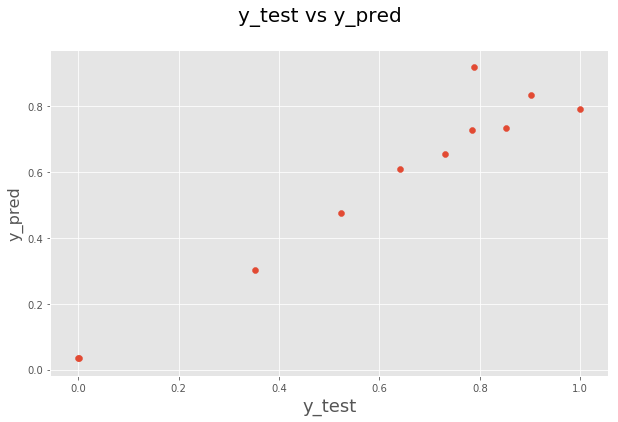

In [286]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity - Gaming Accessory - Basic Linear Model

In [287]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2, y_train1, coefficients_df)

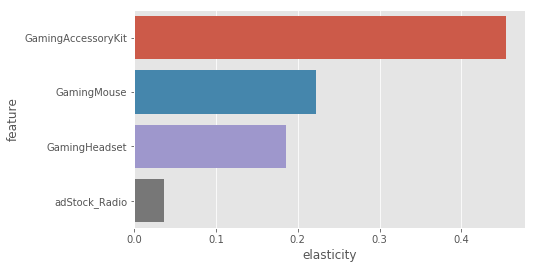

In [288]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### III. Home Audio - Basic Linear Model

In [289]:
# Dropping the unnecessary features which the company cannot control from the Home Audio data frame with KPIs
df2= final_home_audio_data_with_adstock.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)
df2.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [290]:
#Doing the test-train split
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [291]:
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars2=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'pct_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df2_train[num_vars2] = scaler.fit_transform(df2_train[num_vars2])
df2_test[num_vars2] = scaler.fit_transform(df2_test[num_vars2])

In [292]:
# Splitting into X_train & y_train
y_train2 = df2_train.pop('gmv')
X_train2 = df2_train

#### RFE

In [293]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train2, y_train2)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train2, y_train2)

In [294]:
# selecting the top 20 features given by rfe
col = X_train2.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'discount', 'NPS', 'pct_online_transactions', 'BoomBox',
       'DockingStation', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [295]:
# checking the features not selected in top 20
X_train2.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'product_procurement_sla',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'DJController',
       'Dock', 'SlingBox'],
      dtype='object')

In [296]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train2[col]

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)
# Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1675.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.63e-27
Time:                        00:53:46   Log-Likelihood:                 170.41
No. Observations:                  40   AIC:                            -298.8
Df Residuals:                      19   BIC:                            -263.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
9               adStock_Other  4393.05
7                 adStock_SEM  4178.79
8               adStock_Radio  3581.25
5    adStock_Online marketing  2824.87
6         adStock_ Affiliates  2694.36
2             adStock_Digital  2456.84
4   adStock_Content Marketing  1229.02
1                  adStock_TV   805.50
0                       const   270.86
3         adStock_Sponsorship   247.42
12                        NPS    56.69
13    pct_online_transactions    18.09
16                    FMRadio    16.66
18           HomeAudioSpeaker    13.60
14                    BoomBox    13.38
10                        sla     8.79
20              VoiceRecorder     7.68
15             DockingStation     6.72
11                   discount     5.45
17                 HiFiSystem     5.05
19                 SoundMixer     4.16

In [297]:
# removing the feature based on the highest p-value
X_train2_new= X_train_rfe2.drop(["adStock_Radio"], axis = 1)
# Add a constant
X_train_lm2 = sm.add_constant(X_train2_new)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1847.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.29e-28
Time:                        00:53:46   Log-Likelihood:                 170.30
No. Observations:                  40   AIC:                            -300.6
Df Residuals:                      20   BIC:                            -266.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
5    adStock_Online marketing  2763.56
6         adStock_ Affiliates  2622.56
2             adStock_Digital  1361.17
7                 adStock_SEM   675.88
4   adStock_Content Marketing   575.11
0                       const   214.19
3         adStock_Sponsorship   185.42
1                  adStock_TV   158.75
8               adStock_Other    56.29
11                        NPS    49.90
15                    FMRadio    16.38
17           HomeAudioSpeaker    13.59
13                    BoomBox    13.33
12    pct_online_transactions    12.93
9                         sla     8.69
19              VoiceRecorder     7.50
14             DockingStation     6.71
10                   discount     5.44
16                 HiFiSystem     5.01
18                 SoundMixer     4.11

In [298]:
# removing the feature based on the highest p-value
X_train2_new1= X_train2_new.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new1)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1911.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.01e-29
Time:                        00:53:46   Log-Likelihood:                 168.93
No. Observations:                  40   AIC:                            -299.9
Df Residuals:                      21   BIC:                            -267.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
5    adStock_Online marketing  2596.39
6         adStock_ Affiliates  2571.38
2             adStock_Digital   641.22
4   adStock_Content Marketing   409.08
7                 adStock_SEM   305.70
0                       const   189.65
3         adStock_Sponsorship   168.39
1                  adStock_TV   129.69
8               adStock_Other    45.07
10                        NPS    25.65
12                    BoomBox    13.28
16           HomeAudioSpeaker    10.69
14                    FMRadio     8.81
18              VoiceRecorder     6.98
13             DockingStation     6.59
11    pct_online_transactions     5.14
15                 HiFiSystem     4.50
9                    discount     4.12
17                 SoundMixer     4.11

In [299]:
# removing the feature on the basis of highest p-value
X_train2_new2= X_train2_new1.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new2)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1995.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.19e-31
Time:                        00:53:46   Log-Likelihood:                 167.72
No. Observations:                  40   AIC:                            -299.4
Df Residuals:                      22   BIC:                            -269.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
5    adStock_Online marketing  2319.84
6         adStock_ Affiliates  2317.78
2             adStock_Digital   640.98
4   adStock_Content Marketing   409.01
7                 adStock_SEM   302.62
0                       const   185.44
3         adStock_Sponsorship   163.13
1                  adStock_TV   123.72
8               adStock_Other    43.77
10                        NPS    25.55
12                    BoomBox    12.87
15           HomeAudioSpeaker    10.66
14                    FMRadio     7.07
17              VoiceRecorder     6.94
13             DockingStation     6.48
11    pct_online_transactions     5.01
9                    discount     4.10
16                 SoundMixer     4.05

In [300]:
# removing the feature based on highest p-value
X_train2_new3= X_train2_new2.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new3)
    # Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2057.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.04e-32
Time:                        00:53:46   Log-Likelihood:                 166.23
No. Observations:                  40   AIC:                            -298.5
Df Residuals:                      23   BIC:                            -269.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
2             adStock_Digital  629.60
4   adStock_Content Marketing  407.58
6                 adStock_SEM  270.93
0                       const  185.34
3         adStock_Sponsorship   81.85
1                  adStock_TV   76.28
5         adStock_ Affiliates   61.12
7               adStock_Other   36.72
9                         NPS   24.74
14           HomeAudioSpeaker    7.51
13                    FMRadio    7.01
16              VoiceRecorder    6.67
11                    BoomBox    6.54
12             DockingStation    6.09
10    pct_online_transactions    4.55
8                    discount    4.07
15                 SoundMixer    2.92

In [301]:
# removing the feature on the basis of highest p-value
X_train2_new4= X_train2_new3.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new4)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2113.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.08e-33
Time:                        00:53:47   Log-Likelihood:                 164.63
No. Observations:                  40   AIC:                            -297.3
Df Residuals:                      24   BIC:                            -270.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
5               adStock_SEM  227.89
0                     const  178.25
2           adStock_Digital  170.88
3       adStock_Sponsorship   20.51
8                       NPS   19.54
4       adStock_ Affiliates   14.27
1                adStock_TV   10.76
13         HomeAudioSpeaker    7.04
12                  FMRadio    6.56
15            VoiceRecorder    6.02
10                  BoomBox    5.91
11           DockingStation    5.30
7                  discount    3.90
9   pct_online_transactions    3.44
6             adStock_Other    2.75
14               SoundMixer    2.49

In [302]:
# removing the features in the basis of highest p-values
X_train2_new5= X_train2_new4.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new5)
  
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2224.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.51e-35
Time:                        00:53:47   Log-Likelihood:                 163.46
No. Observations:                  40   AIC:                            -296.9
Df Residuals:                      25   BIC:                            -271.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
5               adStock_SEM  194.86
2           adStock_Digital  133.65
0                     const   38.18
3       adStock_Sponsorship   17.33
4       adStock_ Affiliates   12.36
1                adStock_TV    9.91
11                  FMRadio    6.53
12         HomeAudioSpeaker    6.50
14            VoiceRecorder    5.66
9                   BoomBox    5.56
10           DockingStation    4.88
7                  discount    3.73
6             adStock_Other    2.69
13               SoundMixer    2.13
8   pct_online_transactions    2.02

In [303]:
# removing column on the bsis of highest p-value
X_train2_new6= X_train2_new5.drop(["SoundMixer"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new6)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2270.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.94e-36
Time:                        00:53:47   Log-Likelihood:                 161.60
No. Observations:                  40   AIC:                            -295.2
Df Residuals:                      26   BIC:                            -271.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
5               adStock_SEM  194.75
2           adStock_Digital  133.41
0                     const   33.93
3       adStock_Sponsorship   16.71
4       adStock_ Affiliates   12.30
1                adStock_TV    9.49
11                  FMRadio    6.49
12         HomeAudioSpeaker    6.03
13            VoiceRecorder    5.52
9                   BoomBox    4.84
10           DockingStation    4.82
7                  discount    3.39
6             adStock_Other    2.68
8   pct_online_transactions    1.96

In [304]:
# dropping feature on the basis of highest vif values as all the p-values are in acceptable range
X_train2_new7= X_train2_new6.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new7)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1837.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.76e-36
Time:                        00:53:47   Log-Likelihood:                 155.02
No. Observations:                  40   AIC:                            -284.0
Df Residuals:                      27   BIC:                            -262.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  19.63
10                  FMRadio   6.33
3       adStock_Sponsorship   5.98
11         HomeAudioSpeaker   5.89
1                adStock_TV   5.03
4       adStock_ Affiliates   4.88
2           adStock_Digital   4.81
9            DockingStation   4.53
8                   BoomBox   4.52
12            VoiceRecorder   4.34
6                  discount   3.38
5             adStock_Other   2.03
7   pct_online_transactions   1.75

In [305]:
# removinf feature on the basis of highest p-value
X_train2_new8= X_train2_new7.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new8)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1977.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.05e-37
Time:                        00:53:47   Log-Likelihood:                 154.01
No. Observations:                  40   AIC:                            -284.0
Df Residuals:                      28   BIC:                            -263.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  16.98
9                   FMRadio   6.29
3       adStock_Sponsorship   5.97
10         HomeAudioSpeaker   5.89
2           adStock_Digital   4.75
7                   BoomBox   4.28
11            VoiceRecorder   4.05
8            DockingStation   3.44
1                adStock_TV   3.24
5                  discount   2.80
4             adStock_Other   2.02
6   pct_online_transactions   1.45

In [306]:
# removing features on the basis of highest p-value
X_train2_new9= X_train2_new8.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new9)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2031.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.86e-38
Time:                        00:53:47   Log-Likelihood:                 151.95
No. Observations:                  40   AIC:                            -281.9
Df Residuals:                      29   BIC:                            -263.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  16.51
9          HomeAudioSpeaker   5.88
8                   FMRadio   5.71
1           adStock_Digital   4.65
10            VoiceRecorder   4.05
2       adStock_Sponsorship   3.76
7            DockingStation   3.30
6                   BoomBox   3.23
4                  discount   2.77
3             adStock_Other   1.57
5   pct_online_transactions   1.33

In [307]:
# removing feature on the basis of highest p-value
X_train2_new10= X_train2_new9.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new10)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2116.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.62e-39
Time:                        00:53:47   Log-Likelihood:                 149.99
No. Observations:                  40   AIC:                            -280.0
Df Residuals:                      30   BIC:                            -263.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  16.47
7                  FMRadio   5.44
8         HomeAudioSpeaker   5.23
9            VoiceRecorder   3.74
6           DockingStation   3.29
5                  BoomBox   2.94
3                 discount   2.42
1      adStock_Sponsorship   1.71
2            adStock_Other   1.57
4  pct_online_transactions   1.29

In [308]:
# removing feature on the basis of highest p-value
X_train2_new11= X_train2_new10.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new11)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2265.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.13e-40
Time:                        00:53:48   Log-Likelihood:                 148.34
No. Observations:                  40   AIC:                            -278.7
Df Residuals:                      31   BIC:                            -263.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  16.34
7         HomeAudioSpeaker   5.05
6                  FMRadio   4.69
8            VoiceRecorder   3.65
5           DockingStation   3.19
4                  BoomBox   2.86
2                 discount   2.30
1            adStock_Other   1.52
3  pct_online_transactions   1.29

In [309]:
# removing feature on the basis of highest p-value
X_train2_new12= X_train2_new11.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new12)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2535.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.81e-42
Time:                        00:53:48   Log-Likelihood:                 147.29
No. Observations:                  40   AIC:                            -278.6
Df Residuals:                      32   BIC:                            -265.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  12.85
5                  FMRadio   4.32
7            VoiceRecorder   3.65
4           DockingStation   3.18
3                  BoomBox   2.68
6         HomeAudioSpeaker   2.66
1            adStock_Other   1.48
2  pct_online_transactions   1.27

In [310]:
# removing feature on the basis of highest p-value
X_train2_new13= X_train2_new12.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new13)

lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2921.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.69e-43
Time:                        00:53:48   Log-Likelihood:                 146.43
No. Observations:                  40   AIC:                            -278.9
Df Residuals:                      33   BIC:                            -267.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  12.49
6            VoiceRecorder   3.24
4                  FMRadio   3.20
3           DockingStation   3.08
5         HomeAudioSpeaker   2.64
1            adStock_Other   1.39
2  pct_online_transactions   1.27

In [311]:
# removing feature on the basis of highest p-value
X_train2_new14= X_train2_new13.drop(["DockingStation"], axis = 1)
 # Add a constant
X_train_lm2_1 = sm.add_constant(X_train2_new14)

lr1 = sm.OLS(y_train2, X_train_lm2_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_1.values, i) for i in range(X_train_lm2_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3303.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.21e-44
Time:                        00:53:48   Log-Likelihood:                 144.65
No. Observations:                  40   AIC:                            -277.3
Df Residuals:                      34   BIC:                            -267.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  11.98
3                  FMRadio   2.90
4         HomeAudioSpeaker   2.63
1            adStock_Other   1.34
2  pct_online_transactions   1.27
5            VoiceRecorder   1.15

#### Selecting this as our first model based on the vif and p -values acceptable ranges

In [312]:
## removing features on the basis of features which give lesser drop in adj. r2 values 
X_train2_new15= X_train2_new14.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm2_2 = sm.add_constant(X_train2_new15)

lr = sm.OLS(y_train2, X_train_lm2_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_2.values, i) for i in range(X_train_lm2_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3733.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.67e-45
Time:                        00:53:48   Log-Likelihood:                 142.06
No. Observations:                  40   AIC:                            -274.1
Df Residuals:                      35   BIC:                            -265.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  11.24
2                  FMRadio   2.48
3         HomeAudioSpeaker   2.40
1  pct_online_transactions   1.20
4            VoiceRecorder   1.02

In [313]:
# removing features to get lesser drop in adj r2 square value
X_train2_new16= X_train2_new15.drop(["pct_online_transactions"], axis = 1)
 # Add a constant
X_train_lm2_3 = sm.add_constant(X_train2_new16)

lr3 = sm.OLS(y_train2, X_train_lm2_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_3.values, i) for i in range(X_train_lm2_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4538.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.86e-46
Time:                        00:53:48   Log-Likelihood:                 139.65
No. Observations:                  40   AIC:                            -271.3
Df Residuals:                      36   BIC:                            -264.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0174      0.004  

Features   VIF
0             const  8.83
2  HomeAudioSpeaker  2.38
1           FMRadio  2.36
3     VoiceRecorder  1.01

In [314]:
# removing features on the basis of drop in adj r2 value
X_train2_new17= X_train2_new16.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm2_4 = sm.add_constant(X_train2_new17)

lr4 = sm.OLS(y_train2, X_train_lm2_4).fit()

lr4.params
print(lr4.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_4.values, i) for i in range(X_train_lm2_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4162.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.82e-44
Time:                        00:53:48   Log-Likelihood:                 129.30
No. Observations:                  40   AIC:                            -252.6
Df Residuals:                      37   BIC:                            -247.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0271      0.004  

Features   VIF
0             const  6.23
1  HomeAudioSpeaker  1.01
2     VoiceRecorder  1.01

In [315]:
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm2_1, X_train_lm2_2, X_train_lm2_3, X_train_lm2_4]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train2 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9882408150971337
lr model 2 r2_score 0.9871193023364931
lr model 3 r2_score 0.9851866316465335
lr model 4 r2_score 0.9717518881355973


In [316]:
#Checking MSE of top 4 models
x_trains = [X_train_lm2_1, X_train_lm2_2, X_train_lm2_3, X_train_lm2_4]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train2 , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 6.312402892839934e-05
lr model 2 MSE 6.449433501914449e-05
lr model 3 MSE 8.162359848278281e-05
lr model 4 MSE 0.0001185595463232086


#### Based upon the lowest number of features & the best model performance, we select model 3 as the best basic linear model for Home Audio Category

### Residual analysis

In [317]:
y_train_price = lr3.predict(X_train_lm2_3)

Text(0.5,0,'Errors')

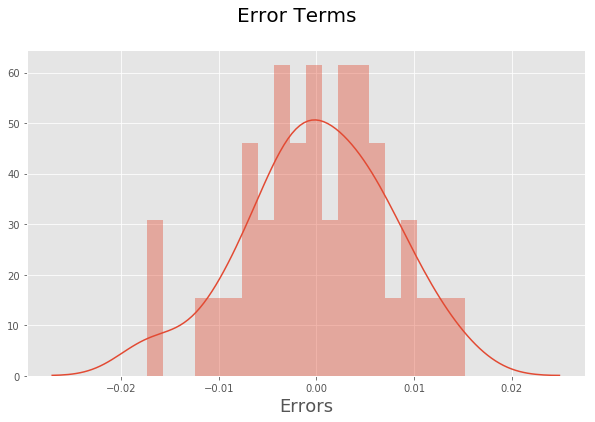

In [318]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train2 - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [319]:
y_test = df2_test.pop('gmv')
X_test = df2_test

In [320]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'pct_online_transactions', 'BoomBox', 'DJController',
       'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [321]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
6           36      9  2015    0.244605         0.290300             0.663463   
36          66      4  2016    0.990932         0.356995             0.729638   
37          67      4  2016    0.912173         0.207337             0.674933   
28          58      2  2016    0.547775         0.324276             0.172513   
43          73      5  2016    0.240274         0.000000             0.813115   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
6                    0.328685                  0.275383             0.283422   
36                   0.222751                  0.668837             0.773385   
37                   0.128442                  0.684842             0.797143   
28                   0.988332                  0.911965             1.000000   
43                   1.000000                  1.000000             0.980171   

    adStock_SEM  adStock_Radio  adStock_Other       sla  \
6      0.141059       0.000000       0.000000  0.331685   
36     0.229379       0.257778       0.470891  0.296060   
37     0.230402       0.128889       0.235445  0.371993   
28     0.312876       1.000000       1.000000  0.183063   
43     0.745088       0.814815       0.368180  0.212139   

    product_procurement_sla  discount       NPS  total_holiday  is_holiday  \
6                  0.787054  0.708261  0.083254            0.0         0.0   
36                 0.717341  0.682570  0.308704            1.0         1.0   
37                 0.735368  0.651006  0.424865            1.0         1.0   
28                 0.833729  0.863723  0.319121            0.0         0.0   
43                 0.673218  0.717877  0.106220            1.0         1.0   

    total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
6                 0.000000                  0.0             1.0          1.0   
36                0.000000                  0.0             1.0          1.0   
37                0.000000                  0.0             0.0          0.0   
28                0.666667                  1.0             1.0          1.0   
43                0.000000                  0.0             0.0          0.0   

    pct_online_transactions   BoomBox  DJController      Dock  DockingStation  \
6                  0.081395  1.000000           0.0  1.000000        0.000000   
36                 0.441860  0.447761           0.0  0.437500        0.526316   
37                 0.941860  0.388060           0.0  0.666667        0.684211   
28                 0.011628  0.492537           0.0  0.645833        0.210526   
43                 0.058140  0.358209           0.0  0.020833        0.842105   

     FMRadio  HiFiSystem  HomeAudioSpeaker  SlingBox  SoundMixer  \
6   0.833648    0.666667          0.416162       0.0         0.0   
36  0.720227    0.454545          0.446061       0.0         0.0   
37  0.725898    0.878788          0.379394       1.0         0.0   
28  0.897921    0.515152          1.000000       0.0         0.0   
43  0.551985    0.333333          0.381414       0.0         0.5   

    VoiceRecorder  
6        0.375000  
36       0.894231  
37       0.894231  
28       0.730769  
43       1.000000

In [322]:
X_test = X_test[X_train_lm2_3.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const   FMRadio  HomeAudioSpeaker  VoiceRecorder
6     1.0  0.833648          0.416162       0.375000
36    1.0  0.720227          0.446061       0.894231
37    1.0  0.725898          0.379394       0.894231
28    1.0  0.897921          1.000000       0.730769
43    1.0  0.551985          0.381414       1.000000
49    1.0  0.164461          0.194343       0.240385
5     1.0  0.000000          0.000000       0.000000
33    1.0  1.000000          0.871515       0.798077
20    1.0  0.843100          0.960000       0.394231
42    1.0  0.642722          0.426263       0.932692

In [323]:
# Making predictions using the final model
y_pred = lr3.predict(X_test)

Text(0,0.5,'y_pred')

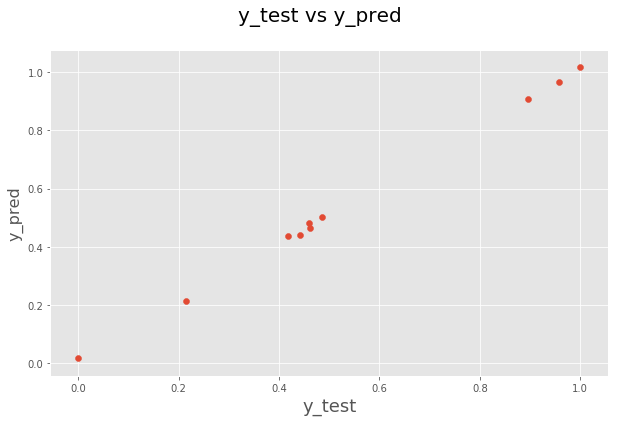

In [324]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity - Home Audio - Basic Linear model

In [325]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr3.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2_3, y_train2, coefficients_df)

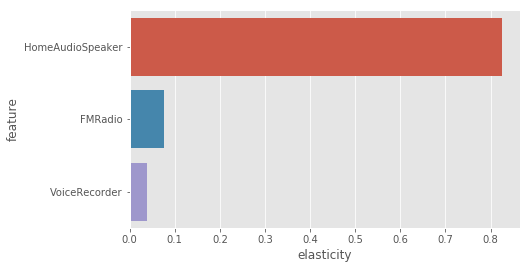

In [326]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Building the Multiplicative models

#### I. Camera Accessory - Multiplicative model

In [327]:
# taking the camera accessory dataset
final_camera_data_with_adstock.head()


order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other        gmv  units       sla  \
0     1.255924            0.0            0.0    15375.0     25  2.280000   
1     1.883887            0.0            0.0  2019042.0   2752  7.156274   
2     2.197868            0.0            0.0  2249245.0   2917  6.491321   
3     2.354858            0.0            0.0  2105858.0   2888  6.488138   
4     1.805811            0.0            0.0  1426134.0   1932  6.470684   

   product_procurement_sla  product_mrp  selling_price  discount        NPS  \
0                 2.960000  1456.840000     615.000000  0.525600  54.599588   
1                 2.742586  1646.428137     751.233460  0.462194  54.599588   
2                 2.764789  1630.936238     783.509033  0.465349  54.599588   
3                 2.831776  1560.504313     740.930625  0.455913  54.599588   
4                 2.777959  1524.232356     756.820304  0.450456  54.605438   

   total_transactions  total_holiday  is_holiday  total_special_sale_day  \
0                  25            1.0         1.0                     0.0   
1                2630            0.0         0.0                     0.0   
2                2823            0.0         0.0                     2.0   
3                2782            0.0         0.0                     0.0   
4                1842            0.0         0.0                     0.0   

   is_special_sale_day  total_pay_days  is_pay_days  COD_count  Prepaid_count  \
0                  0.0             1.0          1.0        0.0           25.0   
1                  0.0             0.0          0.0     1796.0          834.0   
2                  1.0             1.0          1.0     1906.0          917.0   
3                  0.0             0.0          0.0     1914.0          868.0   
4                  0.0             1.0          1.0     1315.0          527.0   

   pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
0                     1.00         1.0              1.0        2.0   
1                     0.32       193.0             45.0      328.0   
2                     0.32       247.0             30.0      351.0   
3                     0.31       209.0             44.0      284.0   
4                     0.29       144.0             41.0      175.0   

   CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
0            4.0                   1.0                0.0           0.0   
1          735.0                 224.0               11.0           0.0   
2          770.0                 228.0                5.0           0.0   
3          812.0                 270.0                9.0           0.0   
4          516.0                 194.0                8.0           0.0   

   CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
0              0.0            0.0               0.0          0.0   
1              0.0            0.0               0.0          4.0   
2              0.0            0.0               0.0         11.0   
3              0.0         

In [328]:
# replacing '0' with '0.0000001' to avaoid NAN values when we take log of the dataset
final_camera_data_with_adstock.replace(0.0, 0.000001).head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other        gmv  units       sla  \
0     1.255924       0.000001       0.000001    15375.0     25  2.280000   
1     1.883887       0.000001       0.000001  2019042.0   2752  7.156274   
2     2.197868       0.000001       0.000001  2249245.0   2917  6.491321   
3     2.354858       0.000001       0.000001  2105858.0   2888  6.488138   
4     1.805811       0.000001       0.000001  1426134.0   1932  6.470684   

   product_procurement_sla  product_mrp  selling_price  discount        NPS  \
0                 2.960000  1456.840000     615.000000  0.525600  54.599588   
1                 2.742586  1646.428137     751.233460  0.462194  54.599588   
2                 2.764789  1630.936238     783.509033  0.465349  54.599588   
3                 2.831776  1560.504313     740.930625  0.455913  54.599588   
4                 2.777959  1524.232356     756.820304  0.450456  54.605438   

   total_transactions  total_holiday  is_holiday  total_special_sale_day  \
0                  25       1.000000    1.000000                0.000001   
1                2630       0.000001    0.000001                0.000001   
2                2823       0.000001    0.000001                2.000000   
3                2782       0.000001    0.000001                0.000001   
4                1842       0.000001    0.000001                0.000001   

   is_special_sale_day  total_pay_days  is_pay_days    COD_count  \
0             0.000001        1.000000     1.000000     0.000001   
1             0.000001        0.000001     0.000001  1796.000000   
2             1.000000        1.000000     1.000000  1906.000000   
3             0.000001        0.000001     0.000001  1914.000000   
4             0.000001        1.000000     1.000000  1315.000000   

   Prepaid_count  pct_online_transactions  Binoculars  CameraAccessory  \
0           25.0                     1.00         1.0              1.0   
1          834.0                     0.32       193.0             45.0   
2          917.0                     0.32       247.0             30.0   
3          868.0                     0.31       209.0             44.0   
4          527.0                     0.29       144.0             41.0   

   CameraBag  CameraBattery  CameraBatteryCharger  CameraBatteryGrip  \
0        2.0            4.0                   1.0           0.000001   
1      328.0          735.0                 224.0          11.000000   
2      351.0          770.0                 228.0           5.000000   
3      284.0          812.0                 270.0           9.000000   
4      175.0          516.0                 194.0           8.000000   

   CameraEyeCup  CameraFilmRolls  CameraHousing  CameraMicrophone  \
0      0.000001         0.000001       0.000001          0.000001   
1      0.000001         0.000001       0.000001          0.000001   
2      0.000001         0.000001       0.000001          0.000001   
3      0.000001         0.000001       0.000001          0.000001   
4      0.000001         0.

In [329]:
# taking log and dropping the uncotrollable featues
df = np.log(final_camera_data_with_adstock.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1))

In [330]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [331]:
# scaling 
scaler = MinMaxScaler()

In [332]:
# checking the features in the dataset
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope'],
      dtype='object')

In [333]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'pct_online_transactions',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [334]:
# assigning x_traim amd y_train values
y_train = df_train.pop('gmv')
X_train = df_train

In [335]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [336]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['order_week', 'Year', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_SEM', 'adStock_Radio', 'adStock_Other', 'sla', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'Flash', 'Lens', 'Strap', 'Telescope'],
      dtype='object')

In [337]:
# neglecting the features other than top 20 features given by rfe
X_train.columns[~rfe.support_]

Index(['Month', 'adStock_TV', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'CameraBattery', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'ExtensionTube', 'Filter', 'FlashShoeAdapter',
       'ReflectorUmbrella', 'Softbox'],
      dtype='object')

In [338]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [339]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1010.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.23e-26
Time:                        00:53:52   Log-Likelihood:                 157.07
No. Observations:                  41   AIC:                            -272.1
Df Residuals:                      20   BIC:                            -236.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  926.4052 

Features           VIF
0                  const  4.892027e+11
7          adStock_Other  1.545280e+03
6          adStock_Radio  1.072660e+03
11             CameraBag  1.055410e+03
15   CameraRemoteControl  7.073200e+02
20             Telescope  6.819900e+02
9             Binoculars  6.538200e+02
19                 Strap  5.440400e+02
12  CameraBatteryCharger  5.265900e+02
2                   Year  5.123600e+02
16          CameraTripod  2.736500e+02
10       CameraAccessory  1.678200e+02
14           CameraMount  1.568500e+02
17                 Flash  1.533700e+02
13     CameraBatteryGrip  1.053400e+02
18                  Lens  7.169000e+01
5            adStock_SEM  3.323000e+01
8                    sla  3.186000e+01
1             order_week  2.436000e+01
4    adStock_Sponsorship  1.967000e+01
3        adStock_Digital  1.371000e+01

In [340]:
# Let's drop feature units with highest p-value 
X_train_new= X_train_rfe.drop(["CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1115.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.43e-27
Time:                        00:53:52   Log-Likelihood:                 157.05
No. Observations:                  41   AIC:                            -274.1
Df Residuals:                      21   BIC:                            -239.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  936.4429 

Features           VIF
0                  const  4.854063e+11
7          adStock_Other  1.520510e+03
6          adStock_Radio  1.065570e+03
19             Telescope  6.602900e+02
14   CameraRemoteControl  6.166800e+02
18                 Strap  5.275800e+02
2                   Year  5.083900e+02
11  CameraBatteryCharger  4.859200e+02
9             Binoculars  4.647700e+02
15          CameraTripod  2.731000e+02
13           CameraMount  1.567100e+02
16                 Flash  1.533400e+02
10       CameraAccessory  1.524000e+02
12     CameraBatteryGrip  1.006700e+02
17                  Lens  6.677000e+01
5            adStock_SEM  3.303000e+01
8                    sla  3.163000e+01
1             order_week  2.390000e+01
4    adStock_Sponsorship  1.845000e+01
3        adStock_Digital  1.349000e+01

In [341]:
# Let's drop featuree with highest p-value
X_train_new1 = X_train_new.drop(["Strap"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1226.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.19e-29
Time:                        00:53:52   Log-Likelihood:                 156.93
No. Observations:                  41   AIC:                            -275.9
Df Residuals:                      22   BIC:                            -243.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  760.6307 

Features           VIF
0                  const  2.970712e+11
7          adStock_Other  1.443150e+03
6          adStock_Radio  1.041200e+03
14   CameraRemoteControl  6.016300e+02
11  CameraBatteryCharger  4.751900e+02
9             Binoculars  4.151800e+02
2                   Year  3.111400e+02
15          CameraTripod  2.667700e+02
18             Telescope  2.200600e+02
13           CameraMount  1.551700e+02
10       CameraAccessory  1.372000e+02
16                 Flash  1.254700e+02
12     CameraBatteryGrip  7.364000e+01
17                  Lens  4.202000e+01
8                    sla  3.054000e+01
1             order_week  2.389000e+01
5            adStock_SEM  2.269000e+01
3        adStock_Digital  1.308000e+01
4    adStock_Sponsorship  8.100000e+00

In [342]:
# Let's drop feature  with highest p-value
X_train_new2 = X_train_new1.drop(["CameraBatteryGrip"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1347.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.06e-30
Time:                        00:53:53   Log-Likelihood:                 156.79
No. Observations:                  41   AIC:                            -277.6
Df Residuals:                      23   BIC:                            -246.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  759.0983 

Features           VIF
0                  const  2.970614e+11
7          adStock_Other  1.432040e+03
6          adStock_Radio  1.020750e+03
13   CameraRemoteControl  5.487100e+02
9             Binoculars  4.050500e+02
11  CameraBatteryCharger  3.914300e+02
2                   Year  3.111300e+02
14          CameraTripod  2.591700e+02
17             Telescope  2.199400e+02
12           CameraMount  1.544900e+02
10       CameraAccessory  1.349900e+02
15                 Flash  1.034000e+02
16                  Lens  4.157000e+01
8                    sla  2.718000e+01
5            adStock_SEM  2.265000e+01
1             order_week  2.158000e+01
3        adStock_Digital  1.298000e+01
4    adStock_Sponsorship  8.070000e+00

In [343]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1397.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.16e-31
Time:                        00:53:53   Log-Likelihood:                 155.41
No. Observations:                  41   AIC:                            -276.8
Df Residuals:                      24   BIC:                            -247.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0188 

Features      VIF
0                  const  5320.41
5          adStock_Radio   992.77
6          adStock_Other   991.43
12   CameraRemoteControl   548.53
10  CameraBatteryCharger   369.57
8             Binoculars   364.36
13          CameraTripod   215.15
16             Telescope   193.70
11           CameraMount   146.14
9        CameraAccessory   131.02
14                 Flash   100.63
15                  Lens    38.45
7                    sla    23.00
4            adStock_SEM    20.62
1             order_week    18.16
2        adStock_Digital    12.15
3    adStock_Sponsorship     7.86

In [344]:
# drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1441.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.26e-33
Time:                        00:53:53   Log-Likelihood:                 153.89
No. Observations:                  41   AIC:                            -275.8
Df Residuals:                      25   BIC:                            -248.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0131 

Features      VIF
0                  const  5306.47
6          adStock_Other   860.78
5          adStock_Radio   856.32
11   CameraRemoteControl   437.88
9   CameraBatteryCharger   352.58
12          CameraTripod   203.65
15             Telescope   187.26
10           CameraMount   141.21
8        CameraAccessory   130.80
13                 Flash   100.57
14                  Lens    37.00
7                    sla    22.64
1             order_week    17.48
4            adStock_SEM    16.18
2        adStock_Digital    10.59
3    adStock_Sponsorship     6.32

In [345]:
# dropping the feature with highest p-value
X_train_new5 = X_train_new4.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1513.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.80e-34
Time:                        00:53:53   Log-Likelihood:                 152.68
No. Observations:                  41   AIC:                            -275.4
Df Residuals:                      26   BIC:                            -249.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0136 

Features      VIF
0                  const  4942.82
5          adStock_Other   793.43
4          adStock_Radio   776.59
10   CameraRemoteControl   389.24
8   CameraBatteryCharger   309.61
11          CameraTripod   200.95
14             Telescope   152.91
9            CameraMount   132.86
7        CameraAccessory   126.19
12                 Flash    99.67
13                  Lens    34.97
6                    sla    22.47
1             order_week    13.54
3            adStock_SEM    13.03
2        adStock_Digital    10.27

In [346]:
# dropping the feature with highest p-value
X_train_new6 = X_train_new5.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1476.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.67e-35
Time:                        00:53:53   Log-Likelihood:                 149.88
No. Observations:                  41   AIC:                            -271.8
Df Residuals:                      27   BIC:                            -247.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0086 

Features      VIF
0                  const  4937.88
4          adStock_Other   489.46
3          adStock_Radio   466.83
9    CameraRemoteControl   368.14
7   CameraBatteryCharger   309.42
10          CameraTripod   178.74
13             Telescope   148.95
8            CameraMount   128.36
6        CameraAccessory   125.73
11                 Flash    96.43
12                  Lens    34.97
5                    sla    22.35
1             order_week    13.52
2            adStock_SEM     3.00

In [347]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1595.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.32e-36
Time:                        00:53:53   Log-Likelihood:                 149.09
No. Observations:                  41   AIC:                            -272.2
Df Residuals:                      28   BIC:                            -249.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0053 

Features      VIF
0                  const  4812.78
3          adStock_Other   483.33
2          adStock_Radio   463.49
8    CameraRemoteControl   356.30
6   CameraBatteryCharger   309.38
9           CameraTripod   140.28
12             Telescope   130.58
7            CameraMount   128.20
5        CameraAccessory   123.41
10                 Flash    95.55
11                  Lens    29.50
4                    sla    21.40
1             order_week    13.48

In [348]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["Telescope"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1696.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.28e-37
Time:                        00:53:54   Log-Likelihood:                 147.84
No. Observations:                  41   AIC:                            -271.7
Df Residuals:                      29   BIC:                            -251.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0029 

Features      VIF
0                  const  4810.66
3          adStock_Other   468.02
2          adStock_Radio   452.21
8    CameraRemoteControl   333.67
6   CameraBatteryCharger   265.30
9           CameraTripod   125.77
5        CameraAccessory   111.81
10                 Flash    91.76
7            CameraMount    89.61
11                  Lens    25.05
4                    sla    21.18
1             order_week    13.21

In [349]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["CameraRemoteControl"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1845.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.50e-39
Time:                        00:53:54   Log-Likelihood:                 146.93
No. Observations:                  41   AIC:                            -271.9
Df Residuals:                      30   BIC:                            -253.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0062 

Features      VIF
0                  const  4768.12
3          adStock_Other   450.65
2          adStock_Radio   444.12
6   CameraBatteryCharger   127.81
8           CameraTripod   111.94
5        CameraAccessory   102.57
7            CameraMount    87.86
9                  Flash    87.10
10                  Lens    24.83
4                    sla    21.09
1             order_week    12.69

In [350]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1980.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.30e-40
Time:                        00:53:54   Log-Likelihood:                 145.53
No. Observations:                  41   AIC:                            -271.1
Df Residuals:                      31   BIC:                            -253.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0675 

Features      VIF
0                 const  3583.08
3         adStock_Other   448.27
2         adStock_Radio   442.11
6  CameraBatteryCharger   125.50
8          CameraTripod   104.41
5       CameraAccessory   102.41
7           CameraMount    65.33
9                  Lens    21.09
4                   sla    20.46
1            order_week     7.20

In [351]:
# dropping the feature with highest p-value
X_train_new11= X_train_new10.drop(["order_week"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2219.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.16e-41
Time:                        00:53:54   Log-Likelihood:                 144.81
No. Observations:                  41   AIC:                            -271.6
Df Residuals:                      32   BIC:                            -256.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1360 

Features     VIF
0                 const  870.23
2         adStock_Other  431.29
1         adStock_Radio  415.25
5  CameraBatteryCharger  125.47
7          CameraTripod   99.17
4       CameraAccessory   98.08
6           CameraMount   52.39
8                  Lens   17.91
3                   sla   13.45

In [352]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2467.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.69e-43
Time:                        00:53:54   Log-Likelihood:                 143.62
No. Observations:                  41   AIC:                            -271.2
Df Residuals:                      33   BIC:                            -257.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1517 

Features     VIF
0                 const  788.45
4  CameraBatteryCharger  125.40
6          CameraTripod   97.58
3       CameraAccessory   97.56
5           CameraMount   39.10
7                  Lens   14.36
2                   sla   12.34
1         adStock_Radio    3.15

In [353]:
# # dropping the feature with highest vif
X_train_new13= X_train_new12.drop(["CameraBatteryCharger"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2500.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.81e-43
Time:                        00:53:54   Log-Likelihood:                 140.12
No. Observations:                  41   AIC:                            -266.2
Df Residuals:                      34   BIC:                            -254.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1157      0.035     

Features     VIF
0            const  657.14
5     CameraTripod   96.73
3  CameraAccessory   53.42
4      CameraMount   32.61
6             Lens   12.51
2              sla   10.21
1    adStock_Radio    3.10

In [354]:
# dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["CameraAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2827.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.44e-44
Time:                        00:53:54   Log-Likelihood:                 138.32
No. Observations:                  41   AIC:                            -264.6
Df Residuals:                      35   BIC:                            -254.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0990      0.035     -2.861

Features     VIF
0          const  608.98
3    CameraMount   30.47
4   CameraTripod   23.98
5           Lens   12.51
2            sla    9.29
1  adStock_Radio    2.50

In [355]:
# dropping the feature with highest vif
X_train_new15= X_train_new14.drop(["CameraMount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2362.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.05e-43
Time:                        00:53:54   Log-Likelihood:                 129.51
No. Observations:                  41   AIC:                            -249.0
Df Residuals:                      36   BIC:                            -240.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2104      0.028     -7.445

Features     VIF
0          const  272.24
4           Lens   10.49
3   CameraTripod    9.29
2            sla    4.34
1  adStock_Radio    1.56

In [356]:
# dropping the feature with highest vif
X_train_new16= X_train_new15.drop(["Lens"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new16)
  
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     552.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.34e-31
Time:                        00:53:55   Log-Likelihood:                 93.626
No. Observations:                  41   AIC:                            -179.3
Df Residuals:                      37   BIC:                            -172.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5133      0.038    -13.366

Features    VIF
0          const  89.71
2            sla   1.08
3   CameraTripod   1.08
1  adStock_Radio   1.02

##### Selecting the above model as the first model as all the p-values & VIFs are in the acceptable range

In [357]:
# dropping the feature with highest p-value
X_train_new17= X_train_new16.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new17)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     102.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.61e-16
Time:                        00:53:55   Log-Likelihood:                 53.345
No. Observations:                  41   AIC:                            -100.7
Df Residuals:                      38   BIC:                            -95.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0775      0.067     -1.165

Features    VIF
0          const  38.82
1  adStock_Radio   1.01
2   CameraTripod   1.01

##### Selecting the above model as the second model as all the p-values & VIFs are in the acceptable range

In [358]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.45107819249765446
lr model 2 r2_score -0.2957020521935899


In [359]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.00722776410212164
lr model 2 MSE 0.06425247845755432


#### As we see linear model 1 performs much better than the second one, therefore we choose that as the best among the multiplicative models for Camera Category

### Residual Analysis


In [360]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5,0,'Errors')

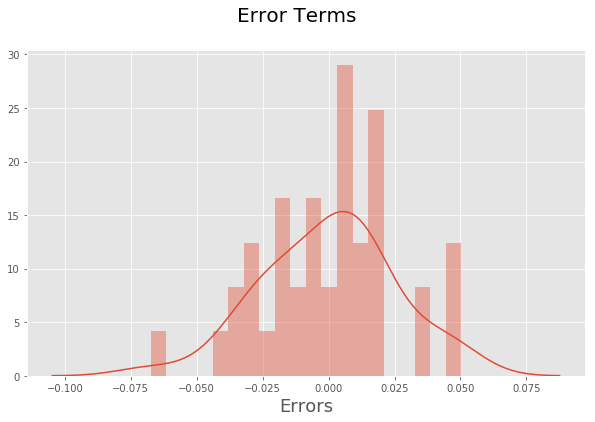

In [361]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [362]:
y_test = df_test.pop('gmv')
X_test = df_test

In [363]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'pct_online_transactions', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [364]:
X_test.head()

order_week     Month      Year  adStock_TV  adStock_Digital  \
6     3.496508  2.079442  7.608374    0.000000         0.528047   
32    4.094345  0.693147  7.608871    0.848092         0.712667   
38    4.189655  1.386294  7.608871    0.998315         0.434195   
35    4.143135  1.098612  7.608871    1.000000         0.704939   
33    4.110874  0.693147  7.608871    0.840296         0.757672   

    adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
6              0.000000                   0.000000                  0.000000   
32             0.562074                   0.963253                  0.968376   
38             0.858298                   0.816250                  0.912312   
35             0.855724                   0.903255                  0.915779   
33             0.575356                   0.959803                  0.966262   

    adStock_ Affiliates  adStock_SEM  adStock_Radio  adStock_Other       sla  \
6              0.000000     0.000000       0.000000       0.000000  0.773305   
32             0.993137     0.467760       0.886770       0.903370  0.981382   
38             0.942289     0.352485       0.894193       0.948013  0.553607   
35             0.940687     0.378158       0.929209       0.977896  0.857967   
33             0.990927     0.475426       0.823645       0.849500  1.000000   

    product_procurement_sla  discount       NPS  total_holiday  is_holiday  \
6                  0.000000  1.000000  1.000000            0.0  -13.815511   
32                 0.715486  0.073731  0.315912            1.0    0.000000   
38                 0.647430  0.166549  0.324555            1.0    0.000000   
35                 0.661018  0.175447  0.213403            0.0  -13.815511   
33                 0.609173  0.258246  0.315912            0.0  -13.815511   

    total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
6                 0.929609             0.000000             1.0     0.000000   
32                0.955588             0.000000             1.0     0.000000   
38                0.000000           -13.815511             1.0     0.000000   
35                0.955588             0.000000             0.0   -13.815511   
33                0.000000           -13.815511             0.0   -13.815511   

    pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
6                  0.000000    0.000000         0.000000   0.000000   
32                 0.924750    0.993229         1.000000   0.981891   
38                 1.000000    0.996003         0.942267   0.984822   
35                 0.944627    0.995166         0.981006   0.989212   
33                 0.916768    0.999225         0.997083   0.984024   

    CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
6        0.000000              0.000000           0.000000      0.000000   
32       1.000000              1.000000           0.943151      0.925303   
38       0.986148              0.995599           0.943151      0.925303   
35       0.986355              0.984681           0.925303      0.857143   
33       0.971368              0.962991           0.925303      0.956996   

    CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
6          0.000000            0.0          0.000000     0.000000   
32         0.952282            0.0          0.920517     1.000000   
38         0.951173            0.0          1.000000     0.926144   
35         0.938609            0.0          0.978652     0.983808   
33         0.940006            0.0          0.990220     0.998907   

    CameraRemoteControl  CameraTripod  ExtensionTube    Filter     Flash  \
6              0.000000      0.000000       0.000000  0.000000  0.000000   
32             1.000000      0.995349       0.000000  0.981238  0.982579   
38             0.991965      0.949417       0.940597  0.983239  0.978389   
35             0.999209      0.964899       1.000000  1.000000  0.980577   
33        

In [365]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Radio       sla  CameraTripod
6     1.0       0.000000  0.773305      0.000000
32    1.0       0.886770  0.981382      0.995349
38    1.0       0.894193  0.553607      0.949417
35    1.0       0.929209  0.857967      0.964899
33    1.0       0.823645  1.000000      0.993964
51    1.0       0.674898  0.537688      0.671571
5     1.0       0.000000  0.000000      0.000000
26    1.0       1.000000  0.686120      1.000000
25    1.0       0.000000  0.888699      0.976496
45    1.0       0.979934  0.419464      0.907066
48    1.0       0.876653  0.607137      0.813707

In [366]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0,0.5,'y_pred')

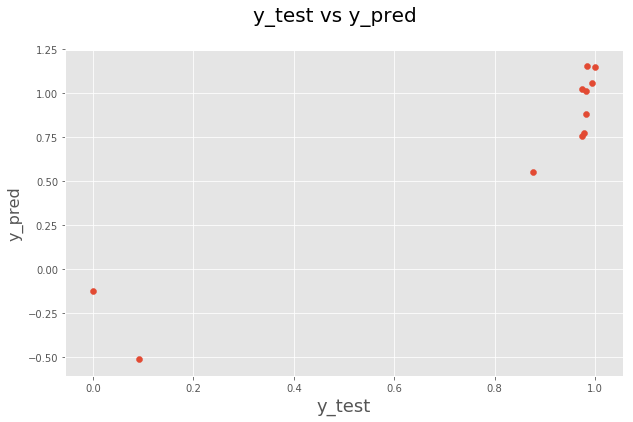

In [367]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity Analysis

In [368]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

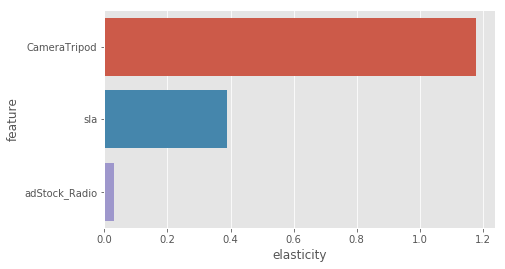

In [369]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### II. Gaming Accessory - Multiplicative model

In [370]:
# replacing '0.0' with '0.0000001' and taking log of the dataset to avaoid the nana values for log 0
df = np.log(final_gaming_data_with_adstock.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1))

In [371]:
df.head()

order_week     Month      Year  adStock_TV  adStock_Digital  \
0    3.295837  1.945910  7.608374   -2.921877        -0.456885   
1    3.332205  1.945910  7.608374   -2.516412        -0.051419   
2    3.367296  1.945910  7.608374   -2.362261         0.102731   
3    3.401197  1.945910  7.608374   -2.293268         0.171724   
4    3.433987  2.079442  7.608374   -2.955022        -0.090807   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             0.617112                  -8.363510                 -1.103164   
1             1.022577                  -7.958044                 -0.697699   
2             1.176728                  -7.803894                 -0.543549   
3             1.245721                  -7.734901                 -0.474556   
4             0.694922                  -8.420842                 -1.068883   

   adStock_ Affiliates  adStock_SEM  adStock_Radio  adStock_Other        gmv  \
0            -1.989137     0.227872     -13.815511     -13.815511  10.014313   
1            -1.583672     0.633337     -13.815511     -13.815511  14.473645   
2            -1.429521     0.787488     -13.815511     -13.815511  14.294520   
3            -1.360528     0.856481     -13.815511     -13.815511  14.374439   
4            -1.919477     0.591010     -13.815511     -13.815511  14.105708   

        sla  product_procurement_sla  discount       NPS  total_holiday  \
0  1.240787                 1.165752 -1.151222  4.000026       0.000000   
1  1.680295                 1.174963 -0.868303  4.000026     -13.815511   
2  1.661817                 0.999081 -0.797925  4.000026     -13.815511   
3  1.696288                 0.951353 -0.923857  4.000026     -13.815511   
4  1.739829                 1.171037 -0.771931  4.000089     -13.815511   

   is_holiday  total_special_sale_day  is_special_sale_day  total_pay_days  \
0    0.000000              -13.815511           -13.815511        0.000000   
1  -13.815511              -13.815511           -13.815511      -13.815511   
2  -13.815511                0.693147             0.000000        0.000000   
3  -13.815511              -13.815511           -13.815511      -13.815511   
4  -13.815511              -13.815511           -13.815511        0.000000   

   is_pay_days  pct_online_transactions  CoolingPad  GameControlMount  \
0     0.000000                 0.000000  -13.815511        -13.815511   
1   -13.815511                -1.347074  -13.815511        -13.815511   
2     0.000000                -1.469676  -13.815511        -13.815511   
3   -13.815511                -1.514128  -13.815511        -13.815511   
4     0.000000                -1.609438  -13.815511        -13.815511   

    GamePad  GamingAccessoryKit  GamingAdapter  GamingChargingStation  \
0  2.639057            0.693147     -13.815511             -13.815511   
1  6.769642            4.605170       3.871201             -13.815511   
2  7.409136            4.859812       3.784190             -13.815511   
3  6.826545            5.111988       3.555348             -13.815511   
4  6.416732            4.553877       3.433987             -13.815511   

   GamingHeadset  GamingKeyboard  GamingMemoryCard  GamingMouse  \
0       0.693147        0.000000        -13.815511     1.386294   
1       5.176150        6.070738          3.583519     6.878326   
2       5.187386        5.111988          3.295837     5.883322   
3       5.645447        5.159055          3.332205     6.107023   
4       6.049733        4.356709          2.397895     5.476464   

   GamingMousePad  GamingSpeaker  JoystickGamingWheel  MotionController  \
0        0.000000     -13.815511           -13.815511        -13.815511   
1        4.007333     -13.815511             2.397895          2.772589   
2        3.871201     -13.815511             2.079442          2.397895   
3        4.204693     -13.815511             2.484907          2.397895   
4        3.663562       0.000000             2.944439          2.079442   

In [372]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [373]:
# initialising scaler
scaler = MinMaxScaler()

In [374]:
# checking the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory'],
      dtype='object')

In [375]:
# Apply scaler() to all the columns except the categorical features
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [376]:
# assigning the values for x_train and y_train
y_train = df_train.pop('gmv')
X_train = df_train

In [377]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [378]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_Radio', 'discount', 'NPS', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [379]:
# neglecting the features not selected in top 20 by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'adStock_Digital', 'adStock_SEM',
       'adStock_Other', 'sla', 'product_procurement_sla', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamingChargingStation',
       'GamingSpeaker'],
      dtype='object')

In [380]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [381]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2420.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.11e-31
Time:                        00:53:58   Log-Likelihood:                 172.67
No. Observations:                  42   AIC:                            -303.3
Df Residuals:                      21   BIC:                            -266.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.970380e+11
5    adStock_Online marketing  2.080142e+04
6         adStock_ Affiliates  1.892141e+04
12              GamingAdapter  4.814400e+02
14             GamingKeyboard  4.554700e+02
11         GamingAccessoryKit  4.462100e+02
17             GamingMousePad  3.897700e+02
20        TVOutCableAccessory  3.774500e+02
4   adStock_Content Marketing  2.366900e+02
16                GamingMouse  2.097900e+02
1                        Year  2.090200e+02
13              GamingHeadset  2.062100e+02
7               adStock_Radio  1.675900e+02
2                  adStock_TV  1.471200e+02
18        JoystickGamingWheel  1.375400e+02
19           MotionController  1.132100e+02
10                    GamePad  1.008100e+02
15           GamingMemoryCard  6.194000e+01
9                         NPS  3.680000e+01
3         adStock_Sponsorship  3.250000e+01
8                    discount  1.134000e+01

In [382]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["TVOutCableAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2594.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.58e-32
Time:                        00:53:58   Log-Likelihood:                 172.07
No. Observations:                  42   AIC:                            -304.1
Df Residuals:                      22   BIC:                            -269.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.882658e+11
5    adStock_Online marketing  2.047966e+04
6         adStock_ Affiliates  1.852108e+04
14             GamingKeyboard  4.486300e+02
11         GamingAccessoryKit  4.458100e+02
17             GamingMousePad  3.838100e+02
12              GamingAdapter  3.402900e+02
4   adStock_Content Marketing  2.361500e+02
16                GamingMouse  2.069900e+02
13              GamingHeadset  2.029200e+02
1                        Year  1.997100e+02
7               adStock_Radio  1.552800e+02
18        JoystickGamingWheel  1.374300e+02
2                  adStock_TV  1.339700e+02
19           MotionController  1.039700e+02
10                    GamePad  9.351000e+01
15           GamingMemoryCard  4.866000e+01
9                         NPS  3.622000e+01
3         adStock_Sponsorship  3.131000e+01
8                    discount  1.133000e+01

In [383]:
# Let's drop with highest p-value
X_train_new1 = X_train_new.drop(["GamingMousePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2720.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.19e-34
Time:                        00:53:59   Log-Likelihood:                 170.99
No. Observations:                  42   AIC:                            -304.0
Df Residuals:                      23   BIC:                            -271.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.822951e+11
5    adStock_Online marketing  1.907664e+04
6         adStock_ Affiliates  1.710203e+04
14             GamingKeyboard  3.824500e+02
12              GamingAdapter  3.384100e+02
11         GamingAccessoryKit  2.578500e+02
4   adStock_Content Marketing  2.333900e+02
16                GamingMouse  2.047000e+02
13              GamingHeadset  2.028400e+02
1                        Year  1.933800e+02
7               adStock_Radio  1.526100e+02
17        JoystickGamingWheel  1.374200e+02
18           MotionController  1.023500e+02
2                  adStock_TV  9.777000e+01
10                    GamePad  9.132000e+01
15           GamingMemoryCard  4.861000e+01
9                         NPS  3.586000e+01
3         adStock_Sponsorship  2.355000e+01
8                    discount  9.080000e+00

In [384]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2606.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.08e-35
Time:                        00:53:59   Log-Likelihood:                 168.01
No. Observations:                  42   AIC:                            -300.0
Df Residuals:                      24   BIC:                            -268.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.225753e+11
5    adStock_Online marketing  1.893538e+04
6         adStock_ Affiliates  1.696291e+04
13             GamingKeyboard  3.823000e+02
11              GamingAdapter  3.372500e+02
10         GamingAccessoryKit  2.554100e+02
4   adStock_Content Marketing  2.129900e+02
15                GamingMouse  2.019900e+02
12              GamingHeadset  1.968600e+02
16        JoystickGamingWheel  1.310500e+02
1                        Year  1.300200e+02
7               adStock_Radio  1.190500e+02
17           MotionController  9.857000e+01
2                  adStock_TV  9.696000e+01
9                     GamePad  8.749000e+01
14           GamingMemoryCard  4.797000e+01
3         adStock_Sponsorship  2.350000e+01
8                    discount  8.990000e+00

In [385]:
# Let's remove feature  with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2682.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.29e-36
Time:                        00:53:59   Log-Likelihood:                 166.48
No. Observations:                  42   AIC:                            -299.0
Df Residuals:                      25   BIC:                            -269.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.224386e+11
5        adStock_ Affiliates  3.550390e+03
4   adStock_Online marketing  3.450790e+03
10             GamingAdapter  2.891000e+02
9         GamingAccessoryKit  2.457700e+02
12            GamingKeyboard  2.263300e+02
14               GamingMouse  1.456800e+02
11             GamingHeadset  1.312700e+02
1                       Year  1.298700e+02
6              adStock_Radio  1.182500e+02
16          MotionController  9.774000e+01
8                    GamePad  8.702000e+01
15       JoystickGamingWheel  8.549000e+01
2                 adStock_TV  6.080000e+01
13          GamingMemoryCard  4.737000e+01
3        adStock_Sponsorship  2.093000e+01
7                   discount  8.380000e+00

In [386]:
# Let's drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2761.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.08e-37
Time:                        00:53:59   Log-Likelihood:                 164.91
No. Observations:                  42   AIC:                            -297.8
Df Residuals:                      26   BIC:                            -270.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.045440e+11
5        adStock_ Affiliates  3.535390e+03
4   adStock_Online marketing  3.450340e+03
10             GamingAdapter  2.890900e+02
9         GamingAccessoryKit  2.314500e+02
1                       Year  1.109000e+02
6              adStock_Radio  1.064500e+02
13               GamingMouse  9.601000e+01
11             GamingHeadset  9.392000e+01
15          MotionController  9.186000e+01
14       JoystickGamingWheel  8.526000e+01
8                    GamePad  7.071000e+01
2                 adStock_TV  6.076000e+01
12          GamingMemoryCard  4.720000e+01
3        adStock_Sponsorship  2.093000e+01
7                   discount  7.560000e+00

In [387]:
# dropping the feature with highest p-value
X_train_new5 = X_train_new4.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.32e-39
Time:                        00:53:59   Log-Likelihood:                 163.30
No. Observations:                  42   AIC:                            -296.6
Df Residuals:                      27   BIC:                            -270.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  1.023429e+11
3   adStock_Online marketing  2.732640e+03
4        adStock_ Affiliates  2.567450e+03
9              GamingAdapter  2.831200e+02
8         GamingAccessoryKit  2.235000e+02
1                       Year  1.085600e+02
5              adStock_Radio  1.053300e+02
10             GamingHeadset  9.300000e+01
12               GamingMouse  9.149000e+01
14          MotionController  8.242000e+01
13       JoystickGamingWheel  7.696000e+01
7                    GamePad  6.574000e+01
11          GamingMemoryCard  4.236000e+01
2        adStock_Sponsorship  1.226000e+01
6                   discount  6.130000e+00

In [388]:
# dropping the feature with highest p-value
X_train_new6 = X_train_new5.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2820.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.89e-40
Time:                        00:54:00   Log-Likelihood:                 160.79
No. Observations:                  42   AIC:                            -293.6
Df Residuals:                      28   BIC:                            -269.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  7.441137e+10
7         GamingAccessoryKit  2.235000e+02
8              GamingAdapter  1.499900e+02
9              GamingHeadset  9.246000e+01
11               GamingMouse  9.038000e+01
4              adStock_Radio  7.983000e+01
1                       Year  7.893000e+01
6                    GamePad  6.570000e+01
13          MotionController  6.310000e+01
12       JoystickGamingWheel  5.049000e+01
10          GamingMemoryCard  4.179000e+01
3   adStock_Online marketing  1.523000e+01
2        adStock_Sponsorship  9.120000e+00
5                   discount  6.130000e+00

In [389]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2971.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.10e-41
Time:                        00:54:00   Log-Likelihood:                 159.47
No. Observations:                  42   AIC:                            -292.9
Df Residuals:                      29   BIC:                            -270.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  932.32
6         GamingAccessoryKit  223.48
7              GamingAdapter  142.78
8              GamingHeadset   90.92
10               GamingMouse   89.96
12          MotionController   63.07
5                    GamePad   56.00
11       JoystickGamingWheel   49.42
9           GamingMemoryCard   37.86
2   adStock_Online marketing   14.76
1        adStock_Sponsorship    8.94
4                   discount    6.12
3              adStock_Radio    3.14

In [390]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3189.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.44e-43
Time:                        00:54:00   Log-Likelihood:                 158.42
No. Observations:                  42   AIC:                            -292.8
Df Residuals:                      30   BIC:                            -272.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  917.56
5         GamingAccessoryKit  221.67
6              GamingAdapter  142.02
7              GamingHeadset   89.44
9                GamingMouse   88.84
11          MotionController   62.68
4                    GamePad   55.44
10       JoystickGamingWheel   40.03
8           GamingMemoryCard   29.56
3                   discount    6.11
1   adStock_Online marketing    4.87
2              adStock_Radio    1.70

In [391]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3570.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.51e-44
Time:                        00:54:00   Log-Likelihood:                 158.11
No. Observations:                  42   AIC:                            -294.2
Df Residuals:                      31   BIC:                            -275.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  864.85
4         GamingAccessoryKit  219.76
5              GamingAdapter  142.02
8                GamingMouse   86.86
6              GamingHeadset   85.54
10          MotionController   61.96
3                    GamePad   52.79
9        JoystickGamingWheel   37.10
7           GamingMemoryCard   29.31
2                   discount    6.06
1   adStock_Online marketing    4.87

In [392]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["MotionController"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3783.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.09e-46
Time:                        00:54:00   Log-Likelihood:                 156.44
No. Observations:                  42   AIC:                            -292.9
Df Residuals:                      32   BIC:                            -275.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                     const  845.84
4        GamingAccessoryKit  217.43
5             GamingAdapter   94.79
8               GamingMouse   85.14
6             GamingHeadset   82.56
3                   GamePad   47.08
9       JoystickGamingWheel   37.03
7          GamingMemoryCard   29.28
2                  discount    6.02
1  adStock_Online marketing    4.59

In [393]:
# dropping the feature with highest p-value

X_train_new11= X_train_new10.drop(["GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4252.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.98e-47
Time:                        00:54:00   Log-Likelihood:                 155.78
No. Observations:                  42   AIC:                            -293.6
Df Residuals:                      33   BIC:                            -277.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                     const  789.69
4        GamingAccessoryKit  202.06
7               GamingMouse   79.69
5             GamingHeadset   79.26
3                   GamePad   39.52
6          GamingMemoryCard   19.35
8       JoystickGamingWheel   17.15
2                  discount    5.80
1  adStock_Online marketing    4.39

In [394]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4493.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.69e-48
Time:                        00:54:00   Log-Likelihood:                 153.51
No. Observations:                  42   AIC:                            -291.0
Df Residuals:                      34   BIC:                            -277.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                     const  701.24
4        GamingAccessoryKit  187.18
5             GamingHeadset   74.49
6               GamingMouse   73.60
3                   GamePad   34.81
7       JoystickGamingWheel   14.48
2                  discount    5.75
1  adStock_Online marketing    4.36

In [395]:
# dropping the feature with highest vif
X_train_new13= X_train_new12.drop(["GamingAccessoryKit"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2824.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.78e-45
Time:                        00:54:00   Log-Likelihood:                 139.93
No. Observations:                  42   AIC:                            -265.9
Df Residuals:                      35   BIC:                            -253.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                     const  164.92
3                   GamePad   34.72
6       JoystickGamingWheel   14.43
4             GamingHeadset   11.01
5               GamingMouse    6.19
1  adStock_Online marketing    3.47
2                  discount    1.25

In [396]:
# dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3390.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.72e-47
Time:                        00:54:01   Log-Likelihood:                 139.35
No. Observations:                  42   AIC:                            -266.7
Df Residuals:                      36   BIC:                            -256.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2035    

Features     VIF
0                const  125.55
2              GamePad   30.77
5  JoystickGamingWheel   13.60
3        GamingHeadset    8.14
4          GamingMouse    4.83
1             discount    1.20

In [397]:
# dropping the feature on the basis of highest p-value
X_train_new15= X_train_new14.drop(["GamePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1155.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.73e-38
Time:                        00:54:01   Log-Likelihood:                 111.60
No. Observations:                  42   AIC:                            -213.2
Df Residuals:                      37   BIC:                            -204.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2622    

Features     VIF
0                const  109.23
4  JoystickGamingWheel    7.16
2        GamingHeadset    3.54
3          GamingMouse    3.19
1             discount    1.15

In [398]:
# dropping the feature on the basis of highest vif
X_train_new16= X_train_new15.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     679.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.80e-33
Time:                        00:54:01   Log-Likelihood:                 94.081
No. Observations:                  42   AIC:                            -180.2
Df Residuals:                      38   BIC:                            -173.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4088      0.030    -13.566

Features    VIF
0          const  52.00
3    GamingMouse   1.54
2  GamingHeadset   1.53
1       discount   1.02

In [399]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.5929021438180712


In [400]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.017611167691827315


### Elasticity

In [401]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

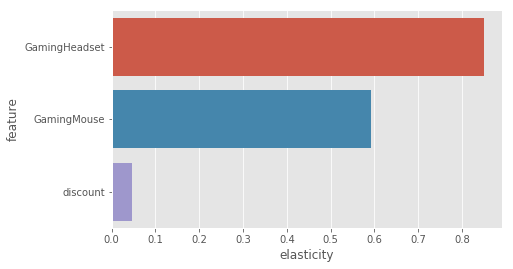

In [402]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Residual Analysis


In [403]:
y_train_price = lr.predict(X_train_lm)

Text(0.5,0,'Errors')

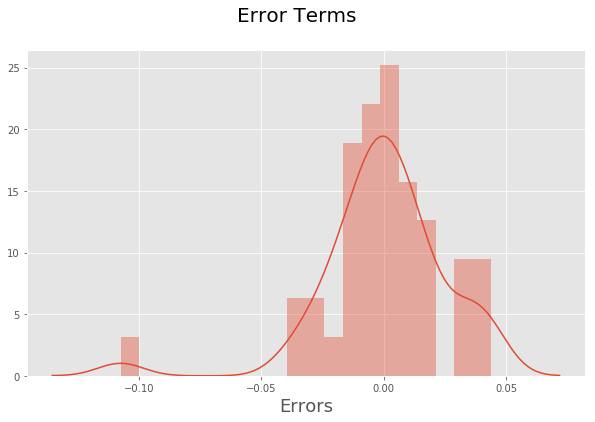

In [404]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [405]:
# y_test = df_test.pop('gmv')
X_test = df_test

In [406]:
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  discount  GamingHeadset  GamingMouse
25    1.0  0.652719       0.980153     0.976396
48    1.0  0.376904       0.914589     0.968585
52    1.0  0.228398       0.806907     0.913212
37    1.0  0.221153       0.869851     0.947593
6     1.0  0.000000       0.000000     0.000000

In [407]:
# Making predictions using the model
y_pred = lr.predict(X_test)

Text(0,0.5,'y_pred')

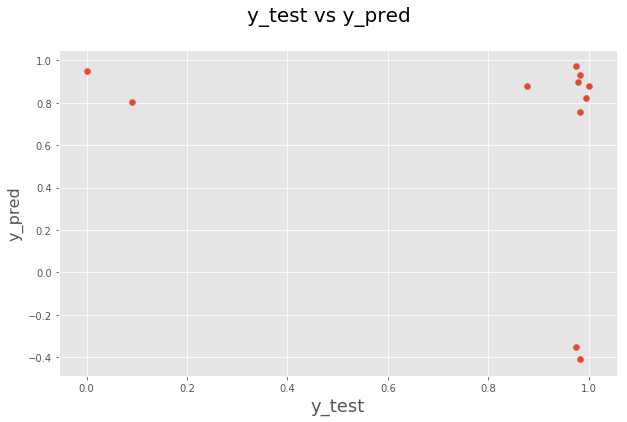

In [408]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### III. Home Audio - Multiplicative model

In [409]:
#Creating df with removal of features uncontrollable by the company, also, replacing 0.0 with lowest value to handle infinity given by log
df = np.log(final_home_audio_data_with_adstock.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1))

In [410]:
#Checking the dataset
df.head()

order_week     Month      Year  adStock_TV  adStock_Digital  \
0    3.295837  1.945910  7.608374   -2.921877        -0.456885   
1    3.332205  1.945910  7.608374   -2.516412        -0.051419   
2    3.367296  1.945910  7.608374   -2.362261         0.102731   
3    3.401197  1.945910  7.608374   -2.293268         0.171724   
4    3.433987  2.079442  7.608374   -2.955022        -0.090807   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             0.617112                  -8.363510                 -1.103164   
1             1.022577                  -7.958044                 -0.697699   
2             1.176728                  -7.803894                 -0.543549   
3             1.245721                  -7.734901                 -0.474556   
4             0.694922                  -8.420842                 -1.068883   

   adStock_ Affiliates  adStock_SEM  adStock_Radio  adStock_Other        gmv  \
0            -1.989137     0.227872     -13.815511     -13.815511  11.207215   
1            -1.583672     0.633337     -13.815511     -13.815511  15.037695   
2            -1.429521     0.787488     -13.815511     -13.815511  15.204816   
3            -1.360528     0.856481     -13.815511     -13.815511  15.085347   
4            -1.919477     0.591010     -13.815511     -13.815511  14.766552   

        sla  product_procurement_sla  discount       NPS  total_holiday  \
0  1.129384                 1.313388 -0.955324  4.000026       0.000000   
1  2.030581                 1.028817 -1.091208  4.000026     -13.815511   
2  1.968145                 1.001765 -1.050931  4.000026     -13.815511   
3  1.965428                 1.030554 -1.055449  4.000026     -13.815511   
4  1.986651                 0.987095 -1.063513  4.000026     -13.815511   

   is_holiday  total_special_sale_day  is_special_sale_day  total_pay_days  \
0    0.000000              -13.815511           -13.815511        0.000000   
1  -13.815511              -13.815511           -13.815511      -13.815511   
2  -13.815511                0.693147             0.000000        0.000000   
3  -13.815511              -13.815511           -13.815511      -13.815511   
4  -13.815511              -13.815511           -13.815511        0.000000   

   is_pay_days  pct_online_transactions   BoomBox  DJController       Dock  \
0     0.000000                -0.030459  1.386294    -13.815511 -13.815511   
1   -13.815511                -1.469676  4.094345    -13.815511   3.401197   
2     0.000000                -1.514128  4.043051    -13.815511   3.912023   
3   -13.815511                -1.609438  4.174387    -13.815511   4.025352   
4     0.000000                -1.560648  3.610918    -13.815511   3.784190   

   DockingStation   FMRadio  HiFiSystem  HomeAudioSpeaker   SlingBox  \
0      -13.815511  0.693147  -13.815511          3.258097 -13.815511   
1        0.000000  6.169611    2.564949          7.155396 -13.815511   
2        0.000000  6.276643    3.295837          7.320527 -13.815511   
3      -13.815511  6.232448    2.995732          7.194437 -13.815511   
4      -13.815511  5.918894    2.397895          6.844815 -13.815511   

   SoundMixer  VoiceRecorder  
0  -13.815511     -13.815511  
1  -13.815511       3.218876  
2  -13.815511       3.258097  
3  -13.815511       3.091042  
4  -13.815511       2.772589

In [411]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [412]:
scaler = MinMaxScaler()

In [413]:
#Checking columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [414]:
# Apply scaler() to all the columns except the categorical ones
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'pct_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [415]:
y_train = df_train.pop('gmv')
X_train = df_train

In [416]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [417]:
#Extracting selected columns by RFE into a list
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'NPS', 'BoomBox', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [418]:
#Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'product_procurement_sla', 'discount',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days',
       'pct_online_transactions', 'DJController', 'SlingBox'],
      dtype='object')

In [419]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [420]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2749.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.77e-29
Time:                        00:54:04   Log-Likelihood:                 182.68
No. Observations:                  40   AIC:                            -323.4
Df Residuals:                      19   BIC:                            -287.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.174567e+11
6    adStock_Online marketing  1.851995e+04
7         adStock_ Affiliates  1.557983e+04
10              adStock_Other  2.940140e+03
9               adStock_Radio  2.868780e+03
1                        Year  3.366700e+02
5   adStock_Content Marketing  3.217500e+02
20              VoiceRecorder  1.943300e+02
2                  adStock_TV  1.409600e+02
14                       Dock  1.391100e+02
17                 HiFiSystem  1.089300e+02
3             adStock_Digital  5.217000e+01
8                 adStock_SEM  5.012000e+01
16                    FMRadio  4.698000e+01
4         adStock_Sponsorship  3.839000e+01
12                        NPS  2.555000e+01
18           HomeAudioSpeaker  1.448000e+01
11                        sla  1.258000e+01
13                    BoomBox  6.180000e+00
15             DockingStation  4.770000e+00
19                 SoundMixer  3.090000e+00

In [421]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3045.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.55e-30
Time:                        00:54:04   Log-Likelihood:                 182.67
No. Observations:                  40   AIC:                            -325.3
Df Residuals:                      20   BIC:                            -291.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  3.082335e+11
6        adStock_ Affiliates  4.275460e+03
5   adStock_Online marketing  4.009960e+03
9              adStock_Other  2.575540e+03
8              adStock_Radio  2.328760e+03
1                       Year  3.268900e+02
19             VoiceRecorder  1.839900e+02
13                      Dock  1.368400e+02
2                 adStock_TV  1.099400e+02
16                HiFiSystem  1.075600e+02
15                   FMRadio  4.504000e+01
4        adStock_Sponsorship  2.470000e+01
7                adStock_SEM  2.338000e+01
11                       NPS  2.100000e+01
3            adStock_Digital  1.864000e+01
17          HomeAudioSpeaker  1.448000e+01
10                       sla  1.233000e+01
12                   BoomBox  6.150000e+00
14            DockingStation  4.660000e+00
18                SoundMixer  3.090000e+00

In [422]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["DockingStation"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3309.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.20e-32
Time:                        00:54:04   Log-Likelihood:                 182.28
No. Observations:                  40   AIC:                            -326.6
Df Residuals:                      21   BIC:                            -294.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  3.080754e+11
6        adStock_ Affiliates  4.224390e+03
5   adStock_Online marketing  3.937830e+03
9              adStock_Other  2.575490e+03
8              adStock_Radio  2.326980e+03
1                       Year  3.267200e+02
18             VoiceRecorder  1.622500e+02
13                      Dock  1.128000e+02
2                 adStock_TV  1.089800e+02
15                HiFiSystem  1.075600e+02
14                   FMRadio  4.500000e+01
4        adStock_Sponsorship  2.456000e+01
7                adStock_SEM  2.338000e+01
11                       NPS  2.076000e+01
3            adStock_Digital  1.863000e+01
16          HomeAudioSpeaker  1.428000e+01
10                       sla  1.198000e+01
12                   BoomBox  5.970000e+00
17                SoundMixer  3.080000e+00

In [423]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["VoiceRecorder"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3564.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.11e-34
Time:                        00:54:05   Log-Likelihood:                 181.69
No. Observations:                  40   AIC:                            -327.4
Df Residuals:                      22   BIC:                            -297.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  2.212419e+11
6        adStock_ Affiliates  4.053250e+03
5   adStock_Online marketing  3.842800e+03
8              adStock_Radio  2.139960e+03
9              adStock_Other  2.125410e+03
1                       Year  2.346300e+02
2                 adStock_TV  9.643000e+01
15                HiFiSystem  7.232000e+01
13                      Dock  6.337000e+01
14                   FMRadio  4.389000e+01
4        adStock_Sponsorship  2.371000e+01
7                adStock_SEM  2.286000e+01
11                       NPS  2.035000e+01
3            adStock_Digital  1.862000e+01
16          HomeAudioSpeaker  1.417000e+01
10                       sla  1.130000e+01
12                   BoomBox  5.300000e+00
17                SoundMixer  2.710000e+00

In [424]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3874.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.41e-35
Time:                        00:54:05   Log-Likelihood:                 181.26
No. Observations:                  40   AIC:                            -328.5
Df Residuals:                      23   BIC:                            -299.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  2.140494e+11
6        adStock_ Affiliates  3.603920e+03
5   adStock_Online marketing  3.451380e+03
8              adStock_Radio  2.134890e+03
9              adStock_Other  2.091200e+03
1                       Year  2.270100e+02
2                 adStock_TV  9.536000e+01
14                HiFiSystem  7.138000e+01
12                      Dock  6.335000e+01
13                   FMRadio  4.236000e+01
4        adStock_Sponsorship  2.331000e+01
7                adStock_SEM  2.284000e+01
11                       NPS  2.033000e+01
3            adStock_Digital  1.862000e+01
15          HomeAudioSpeaker  1.386000e+01
10                       sla  1.053000e+01
16                SoundMixer  2.440000e+00

In [425]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["Dock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4210.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.79e-37
Time:                        00:54:05   Log-Likelihood:                 180.78
No. Observations:                  40   AIC:                            -329.6
Df Residuals:                      24   BIC:                            -302.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  2.054000e+11
6        adStock_ Affiliates  3.290470e+03
5   adStock_Online marketing  3.196010e+03
8              adStock_Radio  2.130160e+03
9              adStock_Other  2.089570e+03
1                       Year  2.178300e+02
2                 adStock_TV  8.774000e+01
12                   FMRadio  3.933000e+01
13                HiFiSystem  2.961000e+01
7                adStock_SEM  2.227000e+01
11                       NPS  2.030000e+01
4        adStock_Sponsorship  1.971000e+01
3            adStock_Digital  1.842000e+01
14          HomeAudioSpeaker  1.385000e+01
10                       sla  1.053000e+01
15                SoundMixer  2.420000e+00

In [426]:
# Let's drop feature with higest p-value
X_train_new5 = X_train_new4.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4170.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.76e-38
Time:                        00:54:05   Log-Likelihood:                 178.39
No. Observations:                  40   AIC:                            -326.8
Df Residuals:                      25   BIC:                            -301.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1162.1527    

Features           VIF
0                 const  2.013457e+11
7         adStock_Radio  2.130000e+03
8         adStock_Other  2.089500e+03
1                  Year  2.135300e+02
2            adStock_TV  6.519000e+01
5   adStock_ Affiliates  4.857000e+01
11              FMRadio  3.767000e+01
12           HiFiSystem  2.538000e+01
6           adStock_SEM  2.217000e+01
3       adStock_Digital  1.780000e+01
10                  NPS  1.449000e+01
13     HomeAudioSpeaker  1.382000e+01
9                   sla  1.042000e+01
4   adStock_Sponsorship  8.450000e+00
14           SoundMixer  2.410000e+00

In [427]:
# Let's drop feature with higest p-value
X_train_new6 = X_train_new5.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4170.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.09e-39
Time:                        00:54:05   Log-Likelihood:                 176.13
No. Observations:                  40   AIC:                            -324.3
Df Residuals:                      26   BIC:                            -300.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1334.4135    

Features           VIF
0                 const  1.697774e+11
8         adStock_Other  1.679240e+03
7         adStock_Radio  1.481730e+03
1                  Year  1.800500e+02
2            adStock_TV  5.892000e+01
5   adStock_ Affiliates  4.663000e+01
11              FMRadio  2.691000e+01
6           adStock_SEM  1.985000e+01
10                  NPS  1.429000e+01
3       adStock_Digital  1.258000e+01
12     HomeAudioSpeaker  1.199000e+01
9                   sla  1.003000e+01
4   adStock_Sponsorship  7.900000e+00
13           SoundMixer  2.410000e+00

In [428]:
# Let's drop feature with higest p-value
X_train_new7= X_train_new6.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4274.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.43e-41
Time:                        00:54:05   Log-Likelihood:                 174.27
No. Observations:                  40   AIC:                            -322.5
Df Residuals:                      27   BIC:                            -300.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1322.7674    

Features           VIF
0                 const  1.696207e+11
1                  Year  1.798800e+02
7         adStock_Other  1.576400e+02
5   adStock_ Affiliates  4.173000e+01
2            adStock_TV  3.742000e+01
10              FMRadio  2.527000e+01
6           adStock_SEM  1.888000e+01
11     HomeAudioSpeaker  1.178000e+01
9                   NPS  1.177000e+01
3       adStock_Digital  1.130000e+01
8                   sla  9.580000e+00
4   adStock_Sponsorship  7.870000e+00
12           SoundMixer  2.360000e+00

In [429]:
# Let's drop feature with higest p-value
X_train_new8= X_train_new7.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4660.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.27e-42
Time:                        00:54:05   Log-Likelihood:                 173.53
No. Observations:                  40   AIC:                            -323.1
Df Residuals:                      28   BIC:                            -302.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1467.3019    

Features           VIF
0                 const  1.118587e+11
1                  Year  1.186200e+02
7         adStock_Other  1.179600e+02
5   adStock_ Affiliates  3.969000e+01
2            adStock_TV  3.725000e+01
9               FMRadio  2.458000e+01
6           adStock_SEM  1.749000e+01
10     HomeAudioSpeaker  1.172000e+01
3       adStock_Digital  1.086000e+01
8                   sla  8.620000e+00
4   adStock_Sponsorship  7.570000e+00
11           SoundMixer  2.290000e+00

In [430]:
# Let's drop feature with higest VIF

X_train_new9= X_train_new8.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1812.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.72e-38
Time:                        00:54:06   Log-Likelihood:                 152.05
No. Observations:                  40   AIC:                            -282.1
Df Residuals:                      29   BIC:                            -263.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0073    

Features    VIF
0                 const  44.69
4   adStock_ Affiliates  34.08
1            adStock_TV  30.96
8               FMRadio  23.67
5           adStock_SEM  13.81
9      HomeAudioSpeaker  10.98
2       adStock_Digital   8.85
7                   sla   8.41
3   adStock_Sponsorship   6.57
6         adStock_Other   3.01
10           SoundMixer   2.29

In [431]:
# Let's drop feature with higest p-value
X_train_new10= X_train_new9.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2072.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.22e-39
Time:                        00:54:06   Log-Likelihood:                 151.94
No. Observations:                  40   AIC:                            -283.9
Df Residuals:                      30   BIC:                            -267.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061    

Features    VIF
0                const  35.63
1           adStock_TV  22.47
7              FMRadio  20.56
4  adStock_ Affiliates  19.28
8     HomeAudioSpeaker  10.19
6                  sla   7.20
3  adStock_Sponsorship   4.78
5        adStock_Other   3.00
2      adStock_Digital   2.33
9           SoundMixer   2.22

In [432]:
# Let's drop feature with higest p-value
X_train_new11= X_train_new10.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2405.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.46e-41
Time:                        00:54:06   Log-Likelihood:                 151.91
No. Observations:                  40   AIC:                            -285.8
Df Residuals:                      31   BIC:                            -270.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0062    

Features    VIF
0                const  35.50
3  adStock_ Affiliates  18.69
1           adStock_TV  18.19
6              FMRadio  17.61
7     HomeAudioSpeaker   9.55
5                  sla   6.00
4        adStock_Other   2.36
2      adStock_Digital   2.07
8           SoundMixer   1.80

In [433]:
# Let's drop feature with higest p-value
X_train_new12= X_train_new11.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2812.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.19e-43
Time:                        00:54:06   Log-Likelihood:                 151.74
No. Observations:                  40   AIC:                            -287.5
Df Residuals:                      32   BIC:                            -274.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061    

Features    VIF
0                const  35.44
5              FMRadio  15.67
6     HomeAudioSpeaker   7.85
4                  sla   5.88
3        adStock_Other   2.35
2  adStock_ Affiliates   2.32
1      adStock_Digital   1.93
7           SoundMixer   1.27

In [434]:
# Let's drop feature with higest p-value
X_train_new13= X_train_new12.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3324.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.02e-44
Time:                        00:54:06   Log-Likelihood:                 151.39
No. Observations:                  40   AIC:                            -288.8
Df Residuals:                      33   BIC:                            -276.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0055    

Features    VIF
0                const  34.78
4              FMRadio  15.67
5     HomeAudioSpeaker   7.72
3                  sla   5.87
1  adStock_ Affiliates   2.28
2        adStock_Other   1.49
6           SoundMixer   1.26

In [435]:
# Let's drop feature with higest p-value
X_train_new14= X_train_new13.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3821.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.02e-45
Time:                        00:54:06   Log-Likelihood:                 149.93
No. Observations:                  40   AIC:                            -287.9
Df Residuals:                      34   BIC:                            -277.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0069    

Features    VIF
0                const  33.96
3              FMRadio  15.65
4     HomeAudioSpeaker   7.67
2                  sla   5.50
1  adStock_ Affiliates   2.24
5           SoundMixer   1.20

In [436]:
# Let's drop feature with higest VIF
X_train_new15= X_train_new14.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2045.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.04e-41
Time:                        00:54:06   Log-Likelihood:                 132.44
No. Observations:                  40   AIC:                            -254.9
Df Residuals:                      35   BIC:                            -246.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0169    

Features    VIF
0                const  31.74
3     HomeAudioSpeaker   2.46
2                  sla   1.97
1  adStock_ Affiliates   1.79
4           SoundMixer   1.09

In [437]:
# Let's drop feature with higest p-value
X_train_new16= X_train_new15.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2701.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.05e-42
Time:                        00:54:06   Log-Likelihood:                 131.69
No. Observations:                  40   AIC:                            -255.4
Df Residuals:                      36   BIC:                            -248.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0186      0.008  

Features    VIF
0             const  30.76
1               sla   1.48
2  HomeAudioSpeaker   1.38
3        SoundMixer   1.08

##### Selecting this model as the final model as the VIFs & the p-values are in acceptable range

In [438]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='r2', cv=10)
scores.mean()

0.904274791706268

In [439]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='mean_squared_error', cv=10)
-scores.mean()

0.000249637442552072

### Residual Analysis


In [440]:
y_train_price = lr.predict(X_train_lm)

Text(0.5,0,'Errors')

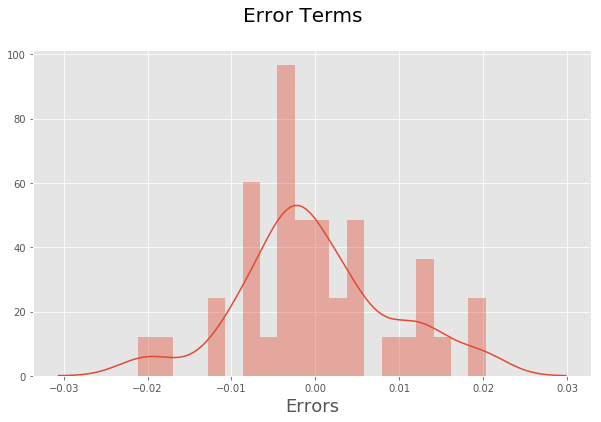

In [441]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Elasticity

In [442]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

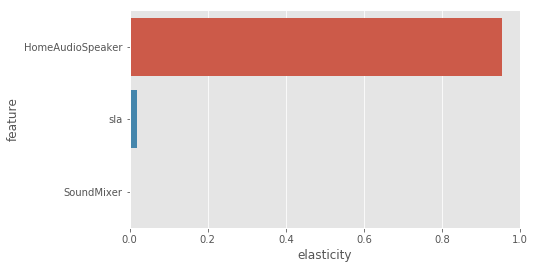

In [443]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Model Evaluation

In [444]:
X_test = df_test
y_test = df_test.pop('gmv')

In [445]:
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const       sla  HomeAudioSpeaker  SoundMixer
6     1.0  0.429915          0.887885    0.000000
36    1.0  0.390431          0.896755    0.000000
37    1.0  0.473084          0.876060    0.000000
28    1.0  0.255891          1.000000    0.000000
43    1.0  0.291969          0.876738    0.954404
49    1.0  0.000000          0.790585    0.000000
5     1.0  1.000000          0.000000    0.000000
33    1.0  0.363384          0.982409    0.000000
20    1.0  0.268393          0.994778    0.000000
42    1.0  0.302368          0.890951    1.000000

In [446]:
# Making predictions using the fourth model
y_pred = lr.predict(X_test)

Text(0,0.5,'y_pred')

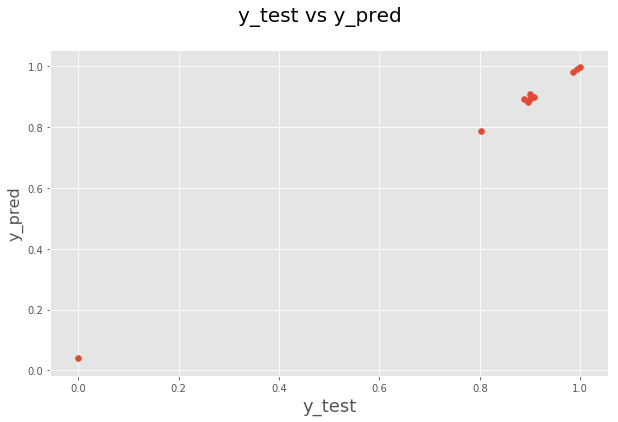

In [447]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## Building the Kyock's Models

In [448]:
#Function to create lagged GMV for each of the categories for creating this model
def createKyockKPI(df):
    df['gmv_lag'] = df['gmv'].shift(1)
    return df.fillna(0)

### I. Camera Accessory - Kyock's Model

In [449]:
# adding lag variable in the camera data set
df = createKyockKPI(final_camera_data_with_adstock)
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other        gmv  units       sla  \
0     1.255924            0.0            0.0    15375.0     25  2.280000   
1     1.883887            0.0            0.0  2019042.0   2752  7.156274   
2     2.197868            0.0            0.0  2249245.0   2917  6.491321   
3     2.354858            0.0            0.0  2105858.0   2888  6.488138   
4     1.805811            0.0            0.0  1426134.0   1932  6.470684   

   product_procurement_sla  product_mrp  selling_price  discount        NPS  \
0                 2.960000  1456.840000     615.000000  0.525600  54.599588   
1                 2.742586  1646.428137     751.233460  0.462194  54.599588   
2                 2.764789  1630.936238     783.509033  0.465349  54.599588   
3                 2.831776  1560.504313     740.930625  0.455913  54.599588   
4                 2.777959  1524.232356     756.820304  0.450456  54.605438   

   total_transactions  total_holiday  is_holiday  total_special_sale_day  \
0                  25            1.0         1.0                     0.0   
1                2630            0.0         0.0                     0.0   
2                2823            0.0         0.0                     2.0   
3                2782            0.0         0.0                     0.0   
4                1842            0.0         0.0                     0.0   

   is_special_sale_day  total_pay_days  is_pay_days  COD_count  Prepaid_count  \
0                  0.0             1.0          1.0        0.0           25.0   
1                  0.0             0.0          0.0     1796.0          834.0   
2                  1.0             1.0          1.0     1906.0          917.0   
3                  0.0             0.0          0.0     1914.0          868.0   
4                  0.0             1.0          1.0     1315.0          527.0   

   pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
0                     1.00         1.0              1.0        2.0   
1                     0.32       193.0             45.0      328.0   
2                     0.32       247.0             30.0      351.0   
3                     0.31       209.0             44.0      284.0   
4                     0.29       144.0             41.0      175.0   

   CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
0            4.0                   1.0                0.0           0.0   
1          735.0                 224.0               11.0           0.0   
2          770.0                 228.0                5.0           0.0   
3          812.0                 270.0                9.0           0.0   
4          516.0                 194.0                8.0           0.0   

   CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
0              0.0            0.0               0.0          0.0   
1              0.0            0.0               0.0          4.0   
2              0.0            0.0               0.0         11.0   
3              0.0         

In [450]:
df.shape

(52, 53)

In [451]:
#Dropping the features which cannot be handled by the company
df = df.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [452]:
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other        gmv       sla  \
0     1.255924            0.0            0.0    15375.0  2.280000   
1     1.883887            0.0            0.0  2019042.0  7.156274   
2     2.197868            0.0            0.0  2249245.0  6.491321   
3     2.354858            0.0            0.0  2105858.0  6.488138   
4     1.805811            0.0            0.0  1426134.0  6.470684   

   product_procurement_sla  discount        NPS  total_holiday  is_holiday  \
0                 2.960000  0.525600  54.599588            1.0         1.0   
1                 2.742586  0.462194  54.599588            0.0         0.0   
2                 2.764789  0.465349  54.599588            0.0         0.0   
3                 2.831776  0.455913  54.599588            0.0         0.0   
4                 2.777959  0.450456  54.605438            0.0         0.0   

   total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
0                     0.0                  0.0             1.0          1.0   
1                     0.0                  0.0             0.0          0.0   
2                     2.0                  1.0             1.0          1.0   
3                     0.0                  0.0             0.0          0.0   
4                     0.0                  0.0             1.0          1.0   

   pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
0                     1.00         1.0              1.0        2.0   
1                     0.32       193.0             45.0      328.0   
2                     0.32       247.0             30.0      351.0   
3                     0.31       209.0             44.0      284.0   
4                     0.29       144.0             41.0      175.0   

   CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
0            4.0                   1.0                0.0           0.0   
1          735.0                 224.0               11.0           0.0   
2          770.0                 228.0                5.0           0.0   
3          812.0                 270.0                9.0           0.0   
4          516.0                 194.0                8.0           0.0   

   CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
0              0.0            0.0               0.0          0.0   
1              0.0            0.0               0.0          4.0   
2              0.0            0.0               0.0         11.0   
3              0.0            0.0               0.0          7.0   
4              0.0            0.0               0.0          2.0   

   CameraRemoteControl  CameraTripod  ExtensionTube  Filter  Flash  \
0                  1.0          13.0            0.0     0.0    0.0   
1                141.0         433.0            0.0   226.0   17.0   
2                145.0         491.0            0.0   188.0   23.0   
3                108.0         457.0            0.0   194.0   18.0   
4                 82.0         363.0            0.0   112

In [453]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [454]:
scaler = MinMaxScaler()

In [455]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'gmv_lag'],
      dtype='object')

In [456]:
# Apply scaler() to all the columns except the categoriacal variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day', 
       'total_pay_days', 'pct_online_transactions',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

## Check linear models for test scaling

In [457]:
y_train = df_train.pop('gmv')
X_train = df_train

In [458]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [459]:
# selecting the features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_Digital', 'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'product_procurement_sla', 'discount',
       'total_special_sale_day', 'is_special_sale_day', 'CameraBag',
       'CameraBattery', 'CameraFilmRolls', 'CameraMicrophone', 'CameraTripod',
       'Flash', 'ReflectorUmbrella', 'gmv_lag'],
      dtype='object')

In [460]:
# negelecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'sla', 'NPS',
       'total_holiday', 'is_holiday', 'total_pay_days', 'is_pay_days',
       'pct_online_transactions', 'Binoculars', 'CameraAccessory',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraHousing', 'CameraMount', 'CameraRemoteControl', 'ExtensionTube',
       'Filter', 'FlashShoeAdapter', 'Lens', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [461]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [462]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     236.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.56e-19
Time:                        00:54:21   Log-Likelihood:                 129.04
No. Observations:                  41   AIC:                            -216.1
Df Residuals:                      20   BIC:                            -180.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4    adStock_Online marketing  2110.49
1             adStock_Digital  1695.53
5         adStock_ Affiliates  1486.38
6                 adStock_SEM  1484.69
3   adStock_Content Marketing   346.98
7               adStock_Radio   343.46
8               adStock_Other   252.86
0                       const   159.05
2         adStock_Sponsorship    60.32
14              CameraBattery    14.63
18                      Flash    12.99
13                  CameraBag    11.47
11     total_special_sale_day    11.36
12        is_special_sale_day    10.99
17               CameraTripod     9.56
10                   discount     8.92
15            CameraFilmRolls     7.94
16           CameraMicrophone     6.81
19          ReflectorUmbrella     4.42
9     product_procurement_sla     3.33
20                    gmv_lag     2.77

In [463]:
# Let's drop feature  with highest p-value 
X_train_new= X_train_rfe.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     233.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.10e-20
Time:                        00:54:21   Log-Likelihood:                 126.71
No. Observations:                  41   AIC:                            -213.4
Df Residuals:                      21   BIC:                            -179.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4    adStock_Online marketing  1807.47
1             adStock_Digital  1303.83
5         adStock_ Affiliates  1133.98
6                 adStock_SEM  1044.61
3   adStock_Content Marketing   345.83
0                       const   121.51
2         adStock_Sponsorship    38.29
7               adStock_Radio    22.39
13              CameraBattery    14.59
17                      Flash    12.92
12                  CameraBag    10.21
11        is_special_sale_day    10.01
10     total_special_sale_day     9.81
16               CameraTripod     9.29
9                    discount     8.00
14            CameraFilmRolls     7.85
15           CameraMicrophone     6.46
18          ReflectorUmbrella     3.82
8     product_procurement_sla     3.24
19                    gmv_lag     2.67

In [464]:
# # Let's drop feature  with highest p-value 
X_train_new1 = X_train_new.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     254.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.21e-21
Time:                        00:54:21   Log-Likelihood:                 126.40
No. Observations:                  41   AIC:                            -214.8
Df Residuals:                      22   BIC:                            -182.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4    adStock_Online marketing  1056.70
6                 adStock_SEM   771.25
5         adStock_ Affiliates   680.77
1             adStock_Digital   639.48
0                       const    65.70
3   adStock_Content Marketing    45.93
12              CameraBattery    12.79
2         adStock_Sponsorship    12.25
16                      Flash    11.81
11                  CameraBag    10.20
10        is_special_sale_day     9.88
9      total_special_sale_day     9.72
15               CameraTripod     8.58
13            CameraFilmRolls     7.85
8                    discount     7.12
14           CameraMicrophone     4.97
7     product_procurement_sla     3.19
18                    gmv_lag     2.45
17          ReflectorUmbrella     2.43

In [465]:
# Let's drop feature  with highest p-value
X_train_new2 = X_train_new1.drop(["gmv_lag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.48e-22
Time:                        00:54:21   Log-Likelihood:                 124.62
No. Observations:                  41   AIC:                            -213.2
Df Residuals:                      23   BIC:                            -182.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4    adStock_Online marketing  1034.72
6                 adStock_SEM   757.23
5         adStock_ Affiliates   673.80
1             adStock_Digital   623.92
0                       const    65.31
3   adStock_Content Marketing    45.56
12              CameraBattery    12.74
2         adStock_Sponsorship    11.93
16                      Flash    11.69
11                  CameraBag    10.15
10        is_special_sale_day     9.70
9      total_special_sale_day     9.69
13            CameraFilmRolls     7.78
15               CameraTripod     7.35
8                    discount     6.86
14           CameraMicrophone     4.91
7     product_procurement_sla     3.06
17          ReflectorUmbrella     2.42

In [466]:
# Let's drop feature  with highest p-value 
X_train_new3 = X_train_new2.drop(["total_special_sale_day"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     259.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.30e-23
Time:                        00:54:21   Log-Likelihood:                 122.66
No. Observations:                  41   AIC:                            -211.3
Df Residuals:                      24   BIC:                            -182.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4    adStock_Online marketing  1016.64
6                 adStock_SEM   740.63
5         adStock_ Affiliates   664.12
1             adStock_Digital   610.11
0                       const    63.75
3   adStock_Content Marketing    45.55
2         adStock_Sponsorship    11.90
15                      Flash    11.61
11              CameraBattery    10.92
10                  CameraBag     8.74
12            CameraFilmRolls     7.74
14               CameraTripod     6.59
8                    discount     6.42
13           CameraMicrophone     4.51
7     product_procurement_sla     2.97
16          ReflectorUmbrella     2.36
9         is_special_sale_day     1.55

In [467]:
# Let's drop feature  with highest p-value 
X_train_new4 = X_train_new3.drop(["is_special_sale_day"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     260.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.26e-23
Time:                        00:54:22   Log-Likelihood:                 120.61
No. Observations:                  41   AIC:                            -209.2
Df Residuals:                      25   BIC:                            -181.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4    adStock_Online marketing  953.03
6                 adStock_SEM  681.65
5         adStock_ Affiliates  626.74
1             adStock_Digital  556.46
0                       const   63.68
3   adStock_Content Marketing   44.82
2         adStock_Sponsorship   11.88
10              CameraBattery   10.62
14                      Flash   10.50
9                   CameraBag    8.65
11            CameraFilmRolls    7.66
13               CameraTripod    6.37
8                    discount    5.95
12           CameraMicrophone    4.15
7     product_procurement_sla    2.93
15          ReflectorUmbrella    2.21

In [468]:
# Let's drop feature  with highest p-value 
X_train_new5 = X_train_new4.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     263.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.51e-24
Time:                        00:54:22   Log-Likelihood:                 118.63
No. Observations:                  41   AIC:                            -207.3
Df Residuals:                      26   BIC:                            -181.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
3    adStock_Online marketing  888.62
4         adStock_ Affiliates  601.36
5                 adStock_SEM  422.87
1             adStock_Digital  390.24
0                       const   58.15
2   adStock_Content Marketing   43.36
9               CameraBattery    9.25
13                      Flash    8.84
8                   CameraBag    7.35
10            CameraFilmRolls    6.39
12               CameraTripod    6.33
7                    discount    5.80
11           CameraMicrophone    3.03
6     product_procurement_sla    2.73
14          ReflectorUmbrella    1.43

In [469]:
# Let's drop feature  with highest  vif
X_train_new6 = X_train_new5.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.00e-23
Time:                        00:54:22   Log-Likelihood:                 110.03
No. Observations:                  41   AIC:                            -192.1
Df Residuals:                      27   BIC:                            -168.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4                 adStock_SEM  159.50
1             adStock_Digital  113.33
0                       const   42.40
2   adStock_Content Marketing   20.23
12                      Flash    8.78
8               CameraBattery    7.62
7                   CameraBag    7.17
9             CameraFilmRolls    6.37
11               CameraTripod    5.91
6                    discount    5.66
3         adStock_ Affiliates    5.41
10           CameraMicrophone    3.02
5     product_procurement_sla    2.57
13          ReflectorUmbrella    1.36

In [470]:
# Let's drop feature  with highest p-value 
X_train_new7= X_train_new6.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     216.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.68e-24
Time:                        00:54:22   Log-Likelihood:                 110.01
No. Observations:                  41   AIC:                            -194.0
Df Residuals:                      28   BIC:                            -171.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
3               adStock_SEM  131.90
1           adStock_Digital  112.26
0                     const   42.02
11                    Flash    8.20
7             CameraBattery    7.59
6                 CameraBag    6.88
8           CameraFilmRolls    6.37
10             CameraTripod    5.82
5                  discount    5.49
2       adStock_ Affiliates    5.32
9          CameraMicrophone    2.94
4   product_procurement_sla    2.56
12        ReflectorUmbrella    1.36

In [471]:
# Let's drop feature  with highest p-value 
X_train_new8= X_train_new7.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.67e-25
Time:                        00:54:22   Log-Likelihood:                 110.00
No. Observations:                  41   AIC:                            -196.0
Df Residuals:                      29   BIC:                            -175.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  32.34
10                    Flash   8.19
6             CameraBattery   6.75
5                 CameraBag   6.48
4                  discount   5.47
7           CameraFilmRolls   5.43
9              CameraTripod   5.36
8          CameraMicrophone   2.84
2       adStock_ Affiliates   2.62
3   product_procurement_sla   2.54
1           adStock_Digital   1.88
11        ReflectorUmbrella   1.18

In [472]:
# Let's drop feature  with highest p-value 
X_train_new9= X_train_new8.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     276.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.09e-26
Time:                        00:54:22   Log-Likelihood:                 109.83
No. Observations:                  41   AIC:                            -197.7
Df Residuals:                      30   BIC:                            -178.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  32.28
9                     Flash   7.92
5             CameraBattery   6.57
4                 CameraBag   6.04
3                  discount   5.45
6           CameraFilmRolls   5.40
8              CameraTripod   4.97
7          CameraMicrophone   2.83
2   product_procurement_sla   2.53
1       adStock_ Affiliates   2.48
10        ReflectorUmbrella   1.17

In [473]:
# Let's drop feature  with highest p-value 
X_train_new10= X_train_new9.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     307.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.72e-28
Time:                        00:54:22   Log-Likelihood:                 109.18
No. Observations:                  41   AIC:                            -198.4
Df Residuals:                      31   BIC:                            -181.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  30.02
8                    Flash   7.52
5          CameraFilmRolls   5.24
3                 discount   4.42
7             CameraTripod   4.06
4                CameraBag   3.93
1      adStock_ Affiliates   2.39
2  product_procurement_sla   2.13
6         CameraMicrophone   1.73
9        ReflectorUmbrella   1.13

In [474]:
# Let's drop feature  with highest p-value 
X_train_new11= X_train_new10.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     335.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.30e-28
Time:                        00:54:22   Log-Likelihood:                 107.93
No. Observations:                  41   AIC:                            -197.9
Df Residuals:                      32   BIC:                            -182.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  28.88
7                    Flash   5.81
4          CameraFilmRolls   4.22
2                 discount   3.60
3                CameraBag   3.16
6             CameraTripod   2.68
1  product_procurement_sla   1.89
5         CameraMicrophone   1.73
8        ReflectorUmbrella   1.13

In [475]:
## Let's drop feature on the vif values to get less drop in adj. r2 value
X_train_new12= X_train_new11.drop(["CameraFilmRolls"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     310.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.11e-28
Time:                        00:54:23   Log-Likelihood:                 103.07
No. Observations:                  41   AIC:                            -190.1
Df Residuals:                      33   BIC:                            -176.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  27.55
6                    Flash   5.10
2                 discount   3.02
3                CameraBag   2.85
5             CameraTripod   2.43
1  product_procurement_sla   1.73
4         CameraMicrophone   1.55
7        ReflectorUmbrella   1.07

In [476]:
# dropping feature on the basis of highest p-value
X_train_new13= X_train_new12.drop(["ReflectorUmbrella"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     346.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.46e-29
Time:                        00:54:23   Log-Likelihood:                 101.54
No. Observations:                  41   AIC:                            -189.1
Df Residuals:                      34   BIC:                            -177.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  27.19
6                    Flash   5.05
2                 discount   3.02
3                CameraBag   2.80
5             CameraTripod   2.42
1  product_procurement_sla   1.71
4         CameraMicrophone   1.53

In [477]:
# dropping feature on the basis of vif values to see less drop in adj. r2 value
X_train_new14= X_train_new13.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     182.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.81e-24
Time:                        00:54:23   Log-Likelihood:                 84.549
No. Observations:                  41   AIC:                            -157.1
Df Residuals:                      35   BIC:                            -146.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  19.76
5                    Flash   2.90
2                CameraBag   2.58
1  product_procurement_sla   1.64
4             CameraTripod   1.60
3         CameraMicrophone   1.47

In [478]:
# dropping the value based on the vif's to check less drop in adj. r2 value
X_train_new15= X_train_new14.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.12e-22
Time:                        00:54:23   Log-Likelihood:                 75.363
No. Observations:                  41   AIC:                            -140.7
Df Residuals:                      36   BIC:                            -132.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0629      0.016  

Features   VIF
0             const  5.97
1         CameraBag  2.42
4             Flash  2.35
3      CameraTripod  1.58
2  CameraMicrophone  1.42

In [479]:
# dropping the feature on the basis of high p-value
X_train_new16= X_train_new15.drop(["CameraMicrophone"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new16)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     186.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.18e-22
Time:                        00:54:23   Log-Likelihood:                 73.910
No. Observations:                  41   AIC:                            -139.8
Df Residuals:                      37   BIC:                            -133.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0662      0.016      4.167   

Features   VIF
0         const  5.87
1     CameraBag  2.30
3         Flash  1.71
2  CameraTripod  1.57

In [480]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9040812331276118
lr model 2 r2_score 0.8424091995962939


In [481]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0018785120133741951
lr model 2 MSE 0.0033088315242441177


#### As we see linear model 1 performs much better having lowest MSE than the other two models, therefore we choose that as the best among the multiplicative models for Camera Category

### Residual Analysis


In [482]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5,0,'Errors')

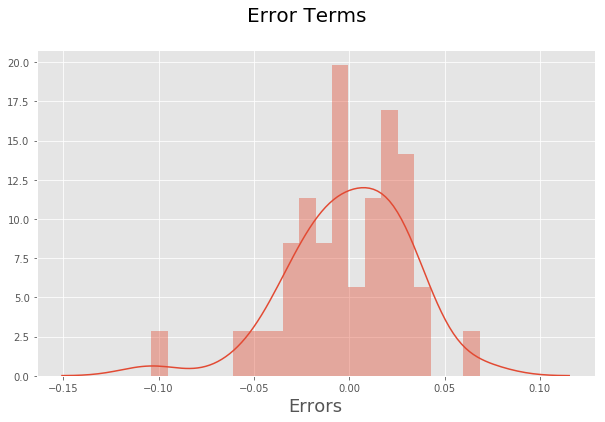

In [483]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [484]:
y_test = df_test.pop('gmv')
X_test = df_test

In [485]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'pct_online_transactions', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope',
       'gmv_lag'],
      dtype='object')

In [486]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
6           33      8  2015    0.000000         0.387803             0.000000   
32          60      2  2016    0.440584         0.588921             0.211609   
38          66      4  2016    0.990971         0.300736             0.617353   
35          63      3  2016    1.000000         0.579623             0.611897   
33          61      2  2016    0.422372         0.644730             0.222695   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
6                    0.000000                  0.000000             0.000000   
32                   0.718614                  0.866206             0.972552   
38                   0.191557                  0.671023             0.790947   
35                   0.418960                  0.681721             0.785803   
33                   0.696666                  0.857921             0.963873   

    adStock_SEM  adStock_Radio  adStock_Other       sla  \
6      0.000000       0.000000       0.000000  0.752212   
32     0.329271       0.218750       0.218750  0.979147   
38     0.230894       0.241667       0.441460  0.524385   
35     0.251681       0.386667       0.706336  0.843206   
33     0.336290       0.093750       0.093750  1.000000   

    product_procurement_sla  discount       NPS  total_holiday  is_holiday  \
6                  0.000000  1.000000  1.000000            0.0         0.0   
32                 0.565428  0.055216  0.288647            1.0         1.0   
38                 0.484511  0.128248  0.296878            1.0         1.0   
35                 0.500063  0.135462  0.192408            0.0         0.0   
33                 0.442266  0.204454  0.288647            0.0         0.0   

    total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
6                 0.333333                  1.0             1.0          1.0   
32                0.500000                  1.0             1.0          1.0   
38                0.000000                  0.0             1.0          1.0   
35                0.500000                  1.0             0.0          0.0   
33                0.000000                  0.0             0.0          0.0   

    pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
6                  0.000000    0.000000         0.000000   0.000000   
32                 0.370370    0.876866         1.000000   0.697674   
38                 1.000000    0.925373         0.355932   0.739535   
35                 0.481481    0.910448         0.711864   0.806977   
33                 0.333333    0.985075         0.949153   0.727907   

    CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
6        0.000000              0.000000                0.0           0.0   
32       1.000000              1.000000                0.4           0.3   
38       0.746073              0.914596                0.4           0.3   
35       0.749346              0.732919                0.3           0.1   
33       0.545812              0.472050                0.3           0.5   

    CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
6          0.000000            0.0          0.000000     0.000000   
32         0.411765            0.0          0.285714     1.000000   
38         0.403361            0.0          1.000000     0.269231   
35         0.319328            0.0          0.714286     0.750000   
33         0.327731            0.0          0.857143     0.980769   

    CameraRemoteControl  CameraTripod  ExtensionTube    Filter     Flash  \
6              0.000000      0.000000            0.0  0.000000  0.000000   
32             1.000000      0.969427            0.0  0.692308  0.686877   
38             0.860294      0.713376            0.4  0.720000  0.627544   
35             0.985294      0.791083            1.0  1.000000  0.657861   
33             0.963235      0.960510            0.6

In [487]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  product_procurement_sla  CameraBag  CameraMicrophone  CameraTripod  \
6     1.0                 0.000000   0.000000          0.000000      0.000000   
32    1.0                 0.565428   0.697674          0.285714      0.969427   
38    1.0                 0.484511   0.739535          1.000000      0.713376   
35    1.0                 0.500063   0.806977          0.714286      0.791083   
33    1.0                 0.442266   0.727907          0.857143      0.960510   
51    1.0                 0.518601   0.455814          0.000000      0.110828   
5     1.0                 1.000000   0.000000          0.000000      0.000000   
26    1.0                 0.621267   0.616279          0.000000      1.000000   
25    1.0                 0.601918   0.662791          0.000000      0.854777   
45    1.0                 0.494854   1.000000          0.000000      0.537580   
48    1.0                 0.450992   0.818605          0.000000      0.287898   

       Flash  
6   0.000000  
32  0.686877  
38  0.627544  
35  0.657861  
33  0.879168  
51  0.225206  
5   0.000000  
26  0.881767  
25  0.360329  
45  0.689043  
48  1.000000

In [488]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0,0.5,'y_pred')

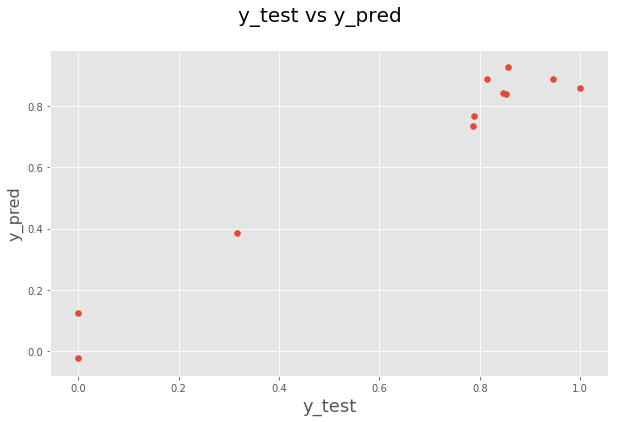

In [489]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity Analysis

In [490]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

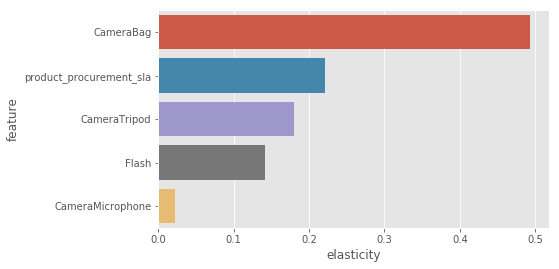

In [491]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### II. Gaming Accessory - Kyock's model

In [492]:
# Creating the lagged KPI i.e. lagged_GMV for Kyock Model
df = createKyockKPI(final_gaming_data_with_adstock)

In [493]:
# Keeping only those features which can be controlled by the company 
df = df.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [494]:
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other           gmv       sla  \
0     1.255924            0.0            0.0  2.234400e+04  3.458333   
1     1.883887            0.0            0.0  1.931187e+06  5.367141   
2     2.197868            0.0            0.0  1.614474e+06  5.268874   
3     2.354858            0.0            0.0  1.748798e+06  5.453665   
4     1.805811            0.0            0.0  1.336692e+06  5.696372   

   product_procurement_sla  discount        NPS  total_holiday  is_holiday  \
0                 3.208333  0.316250  54.599588            1.0         1.0   
1                 3.238024  0.419663  54.599588            0.0         0.0   
2                 2.715785  0.450262  54.599588            0.0         0.0   
3                 2.589212  0.396985  54.599588            0.0         0.0   
4                 3.225334  0.462120  54.603017            0.0         0.0   

   total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
0                     0.0                  0.0             1.0          1.0   
1                     0.0                  0.0             0.0          0.0   
2                     2.0                  1.0             1.0          1.0   
3                     0.0                  0.0             0.0          0.0   
4                     0.0                  0.0             1.0          1.0   

   pct_online_transactions  CoolingPad  GameControlMount  GamePad  \
0                     1.00         0.0               0.0     14.0   
1                     0.26         0.0               0.0    871.0   
2                     0.23         0.0               0.0   1651.0   
3                     0.22         0.0               0.0    922.0   
4                     0.20         0.0               0.0    612.0   

   GamingAccessoryKit  GamingAdapter  GamingChargingStation  GamingHeadset  \
0                 2.0            0.0                    0.0            2.0   
1               100.0           48.0                    0.0          177.0   
2               129.0           44.0                    0.0          179.0   
3               166.0           35.0                    0.0          283.0   
4                95.0           31.0                    0.0          424.0   

   GamingKeyboard  GamingMemoryCard  GamingMouse  GamingMousePad  \
0             1.0               0.0          4.0             1.0   
1           433.0              36.0        971.0            55.0   
2           166.0              27.0        359.0            48.0   
3           174.0              28.0        449.0            67.0   
4            78.0              11.0        239.0            39.0   

   GamingSpeaker  JoystickGamingWheel  MotionController  TVOutCableAccessory  \
0            0.0                  0.0               0.0                  0.0   
1            0.0                 11.0              16.0                 73.0   
2            0.0                  8.0              11.0                 92.0   
3            0.0                 12.0              11.0  

In [495]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [496]:
scaler = MinMaxScaler()

In [497]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'gmv_lag'],
      dtype='object')

In [498]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day', 
       'total_pay_days','pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [499]:
y_train = df_train.pop('gmv')
X_train = df_train

In [500]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [501]:
#Columns which are supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Content Marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'NPS', 'total_holiday', 'is_holiday', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard',
       'GamingMouse', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController'],
      dtype='object')

In [502]:
#Columns which are not supported by RFE
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'adStock_Sponsorship',
       'adStock_Online marketing', 'sla', 'product_procurement_sla',
       'discount', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingChargingStation',
       'GamingMousePad', 'TVOutCableAccessory', 'gmv_lag'],
      dtype='object')

In [503]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [504]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.35e-17
Time:                        00:54:34   Log-Likelihood:                 114.93
No. Observations:                  42   AIC:                            -187.9
Df Residuals:                      21   BIC:                            -151.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  8.925740e+08
6                 adStock_SEM  7.454440e+03
3             adStock_Digital  4.475930e+03
7               adStock_Radio  3.753880e+03
8               adStock_Other  3.657300e+03
2                  adStock_TV  4.854200e+02
4   adStock_Content Marketing  2.843000e+02
5         adStock_ Affiliates  8.000000e+01
1                        Year  5.488000e+01
19        JoystickGamingWheel  2.863000e+01
10              total_holiday  2.340000e+01
11                 is_holiday  2.260000e+01
14              GamingHeadset  1.513000e+01
13              GamingAdapter  1.376000e+01
17                GamingMouse  1.152000e+01
9                         NPS  1.150000e+01
12         GamingAccessoryKit  1.133000e+01
16           GamingMemoryCard  8.470000e+00
15             GamingKeyboard  5.880000e+00
20           MotionController  5.310000e+00
18              GamingSpeaker  4.700000e+00

In [505]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.74e-18
Time:                        00:54:34   Log-Likelihood:                 113.11
No. Observations:                  42   AIC:                            -186.2
Df Residuals:                      22   BIC:                            -151.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.868306e+08
6                 adStock_SEM  6.218360e+03
3             adStock_Digital  3.569970e+03
7               adStock_Radio  3.373580e+03
8               adStock_Other  3.348650e+03
2                  adStock_TV  4.030900e+02
4   adStock_Content Marketing  2.820900e+02
5         adStock_ Affiliates  7.941000e+01
10              total_holiday  2.108000e+01
11                 is_holiday  2.054000e+01
1                        Year  1.764000e+01
13              GamingAdapter  1.211000e+01
9                         NPS  1.125000e+01
14              GamingHeadset  1.096000e+01
12         GamingAccessoryKit  8.100000e+00
17                GamingMouse  7.510000e+00
16           GamingMemoryCard  6.850000e+00
15             GamingKeyboard  5.630000e+00
18              GamingSpeaker  4.100000e+00
19           MotionController  3.980000e+00

In [506]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.55e-18
Time:                        00:54:35   Log-Likelihood:                 111.98
No. Observations:                  42   AIC:                            -186.0
Df Residuals:                      23   BIC:                            -152.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.823193e+08
6                 adStock_SEM  6.015710e+03
3             adStock_Digital  3.515650e+03
7               adStock_Radio  3.351380e+03
8               adStock_Other  3.313910e+03
2                  adStock_TV  4.022400e+02
4   adStock_Content Marketing  2.466000e+02
5         adStock_ Affiliates  7.857000e+01
10              total_holiday  2.107000e+01
11                 is_holiday  2.047000e+01
1                        Year  1.736000e+01
9                         NPS  1.111000e+01
13              GamingHeadset  1.043000e+01
16                GamingMouse  7.150000e+00
12         GamingAccessoryKit  6.320000e+00
15           GamingMemoryCard  6.130000e+00
14             GamingKeyboard  5.250000e+00
17              GamingSpeaker  3.840000e+00
18           MotionController  3.720000e+00

In [507]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.58e-19
Time:                        00:54:35   Log-Likelihood:                 110.79
No. Observations:                  42   AIC:                            -185.6
Df Residuals:                      24   BIC:                            -154.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.751940e+08
6                 adStock_SEM  5.236440e+03
3             adStock_Digital  2.947290e+03
7               adStock_Radio  2.831630e+03
8               adStock_Other  2.818960e+03
2                  adStock_TV  3.418600e+02
4   adStock_Content Marketing  2.445300e+02
5         adStock_ Affiliates  6.654000e+01
10              total_holiday  2.063000e+01
11                 is_holiday  1.989000e+01
1                        Year  1.692000e+01
9                         NPS  1.060000e+01
13              GamingHeadset  1.041000e+01
12         GamingAccessoryKit  6.310000e+00
14           GamingMemoryCard  5.060000e+00
15                GamingMouse  4.800000e+00
16              GamingSpeaker  3.800000e+00
17           MotionController  3.270000e+00

In [508]:
# Let's remove feature with highest VIF
X_train_new3 = X_train_new2.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     63.38
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.12e-16
Time:                        00:54:35   Log-Likelihood:                 94.526
No. Observations:                  42   AIC:                            -155.1
Df Residuals:                      25   BIC:                            -125.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.154553e+08
6               adStock_Radio  2.095000e+02
7               adStock_Other  1.733900e+02
4   adStock_Content Marketing  8.423000e+01
3             adStock_Digital  7.034000e+01
2                  adStock_TV  3.567000e+01
5         adStock_ Affiliates  3.075000e+01
9               total_holiday  1.726000e+01
10                 is_holiday  1.645000e+01
12              GamingHeadset  1.036000e+01
8                         NPS  8.060000e+00
1                        Year  7.100000e+00
11         GamingAccessoryKit  5.910000e+00
14                GamingMouse  4.600000e+00
13           GamingMemoryCard  3.830000e+00
16           MotionController  3.250000e+00
15              GamingSpeaker  3.120000e+00

In [509]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     70.19
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.71e-17
Time:                        00:54:35   Log-Likelihood:                 94.489
No. Observations:                  42   AIC:                            -157.0
Df Residuals:                      26   BIC:                            -129.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5               adStock_Radio  198.18
6               adStock_Other  169.71
3   adStock_Content Marketing   82.73
2             adStock_Digital   70.11
0                       const   68.75
1                  adStock_TV   31.27
4         adStock_ Affiliates   30.69
9                  is_holiday   13.03
8               total_holiday   13.02
11              GamingHeadset    8.19
7                         NPS    7.54
10         GamingAccessoryKit    5.48
13                GamingMouse    3.95
12           GamingMemoryCard    3.51
14              GamingSpeaker    2.95
15           MotionController    2.65

In [510]:
# Let's drop feature with highest p-value
X_train_new5 = X_train_new4.drop(["total_holiday"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     78.01
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.13e-18
Time:                        00:54:35   Log-Likelihood:                 94.468
No. Observations:                  42   AIC:                            -158.9
Df Residuals:                      27   BIC:                            -132.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5               adStock_Radio  198.15
6               adStock_Other  169.70
3   adStock_Content Marketing   82.53
2             adStock_Digital   69.97
0                       const   67.27
1                  adStock_TV   31.23
4         adStock_ Affiliates   30.54
10              GamingHeadset    8.12
7                         NPS    7.42
9          GamingAccessoryKit    5.43
12                GamingMouse    3.91
11           GamingMemoryCard    3.48
13              GamingSpeaker    2.95
14           MotionController    2.62
8                  is_holiday    1.16

In [511]:
# Let's drop feature with highest p-value
X_train_new6 = X_train_new5.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     85.56
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.49e-19
Time:                        00:54:35   Log-Likelihood:                 94.096
No. Observations:                  42   AIC:                            -160.2
Df Residuals:                      28   BIC:                            -135.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4               adStock_Radio  145.19
5               adStock_Other  136.70
0                       const   58.98
3         adStock_ Affiliates   29.88
1                  adStock_TV   28.90
9               GamingHeadset    6.64
6                         NPS    4.56
8          GamingAccessoryKit    4.14
11                GamingMouse    3.40
10           GamingMemoryCard    2.97
12              GamingSpeaker    2.94
2   adStock_Content Marketing    2.67
13           MotionController    2.55
7                  is_holiday    1.16

In [512]:
# Let's drop feature with highest p-value
X_train_new7= X_train_new6.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     94.76
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.52e-20
Time:                        00:54:35   Log-Likelihood:                 93.831
No. Observations:                  42   AIC:                            -161.7
Df Residuals:                      29   BIC:                            -139.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  58.58
3         adStock_ Affiliates   8.42
5                         NPS   4.55
1                  adStock_TV   4.17
7          GamingAccessoryKit   3.93
8               GamingHeadset   3.87
10                GamingMouse   2.81
9            GamingMemoryCard   2.61
4               adStock_Radio   2.54
2   adStock_Content Marketing   2.52
12           MotionController   2.50
11              GamingSpeaker   1.90
6                  is_holiday   1.15

In [513]:
# Let's drop feature with highest p-value
X_train_new8= X_train_new7.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.86e-21
Time:                        00:54:35   Log-Likelihood:                 93.306
No. Observations:                  42   AIC:                            -162.6
Df Residuals:                      30   BIC:                            -141.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  49.58
3         adStock_ Affiliates   8.41
1                  adStock_TV   4.08
5                         NPS   3.95
7          GamingAccessoryKit   3.92
8               GamingHeadset   3.76
9                 GamingMouse   2.80
2   adStock_Content Marketing   2.44
11           MotionController   2.17
10              GamingSpeaker   1.90
4               adStock_Radio   1.82
6                  is_holiday   1.14

In [514]:
# Let's drop feature with highest p-value
X_train_new9= X_train_new8.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.70e-21
Time:                        00:54:36   Log-Likelihood:                 92.253
No. Observations:                  42   AIC:                            -162.5
Df Residuals:                      31   BIC:                            -143.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  49.01
3         adStock_ Affiliates   8.38
1                  adStock_TV   4.04
5                         NPS   3.94
6          GamingAccessoryKit   3.91
7               GamingHeadset   3.74
8                 GamingMouse   2.77
2   adStock_Content Marketing   2.42
10           MotionController   2.10
9               GamingSpeaker   1.90
4               adStock_Radio   1.73

In [515]:
# Let's drop feature with highest p-value
X_train_new10= X_train_new9.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.69e-22
Time:                        00:54:36   Log-Likelihood:                 90.700
No. Observations:                  42   AIC:                            -161.4
Df Residuals:                      32   BIC:                            -144.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0732    

Features    VIF
0                const  43.49
2  adStock_ Affiliates   8.07
1           adStock_TV   4.03
5   GamingAccessoryKit   3.72
6        GamingHeadset   3.63
4                  NPS   3.27
7          GamingMouse   2.13
9     MotionController   2.10
8        GamingSpeaker   1.89
3        adStock_Radio   1.70

In [516]:
# Let's drop feature with highest p-value
X_train_new11= X_train_new10.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.57e-23
Time:                        00:54:36   Log-Likelihood:                 89.667
No. Observations:                  42   AIC:                            -161.3
Df Residuals:                      33   BIC:                            -145.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0363    

Features   VIF
0                const  8.98
2  adStock_ Affiliates  5.48
1           adStock_TV  3.96
4   GamingAccessoryKit  3.26
5        GamingHeadset  3.16
8     MotionController  2.10
6          GamingMouse  2.05
7        GamingSpeaker  1.83
3        adStock_Radio  1.70

In [517]:
# Let's drop feature with highest p-value
X_train_new12= X_train_new11.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.34e-23
Time:                        00:54:36   Log-Likelihood:                 87.650
No. Observations:                  42   AIC:                            -159.3
Df Residuals:                      34   BIC:                            -145.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0389    

Features   VIF
0                const  8.90
3   GamingAccessoryKit  3.05
4        GamingHeadset  3.04
1  adStock_ Affiliates  2.76
5          GamingMouse  1.98
7     MotionController  1.83
2        adStock_Radio  1.67
6        GamingSpeaker  1.62

In [518]:
# Let's drop feature with highest p-value
X_train_new13= X_train_new12.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new13)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     163.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.43e-24
Time:                        00:54:36   Log-Likelihood:                 86.935
No. Observations:                  42   AIC:                            -159.9
Df Residuals:                      35   BIC:                            -147.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0347      0

Features   VIF
0               const  8.32
3       GamingHeadset  2.68
2  GamingAccessoryKit  2.21
4         GamingMouse  1.96
5       GamingSpeaker  1.62
6    MotionController  1.57
1       adStock_Radio  1.49

In [519]:
# Let's drop feature with highest p-value
X_train_new14= X_train_new13.drop(["GamingSpeaker"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.50e-24
Time:                        00:54:36   Log-Likelihood:                 85.034
No. Observations:                  42   AIC:                            -158.1
Df Residuals:                      36   BIC:                            -147.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0299      0

Features   VIF
0               const  8.07
3       GamingHeadset  2.55
2  GamingAccessoryKit  2.19
4         GamingMouse  1.90
5    MotionController  1.44
1       adStock_Radio  1.26

#### Selecting the first model as this one as the VIFs & p-values are in the acceptable range

In [520]:
# Dropping the feature so that the adjusted r-square doesn't drop much with one less feature
X_train_new15= X_train_new14.drop(["MotionController"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     188.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.68e-24
Time:                        00:54:36   Log-Likelihood:                 80.551
No. Observations:                  42   AIC:                            -151.1
Df Residuals:                      37   BIC:                            -142.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0356      0

Features   VIF
0               const  7.94
3       GamingHeadset  2.55
4         GamingMouse  1.90
2  GamingAccessoryKit  1.77
1       adStock_Radio  1.25

#### Selecting the second model as this one as the VIFs & p-values are in the acceptable range

In [521]:
# Dropping the feature so that the adjusted r-square doesn't drop much with one less feature
X_train_new16= X_train_new15.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.48e-23
Time:                        00:54:36   Log-Likelihood:                 74.654
No. Observations:                  42   AIC:                            -141.3
Df Residuals:                      38   BIC:                            -134.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0446      0

Features   VIF
0               const  7.74
2       GamingHeadset  2.06
3         GamingMouse  1.81
1  GamingAccessoryKit  1.73

#### Selecting the third model as this one as the VIFs & p-values are in the acceptable range

In [522]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9115547380081738
lr model 2 r2_score 0.8888565166366238
lr model 3 r2_score 0.846761575609181


In [523]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"r2_score", -scores.mean())

lr model 1 r2_score 0.0023506874795198697
lr model 2 r2_score 0.0030856638000180217
lr model 3 r2_score 0.005042400903674025


##### Based upon the cross validation score, model 1 seems the best among the 3 with minimum MSE.

### Residual Analysis


In [524]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5,0,'Errors')

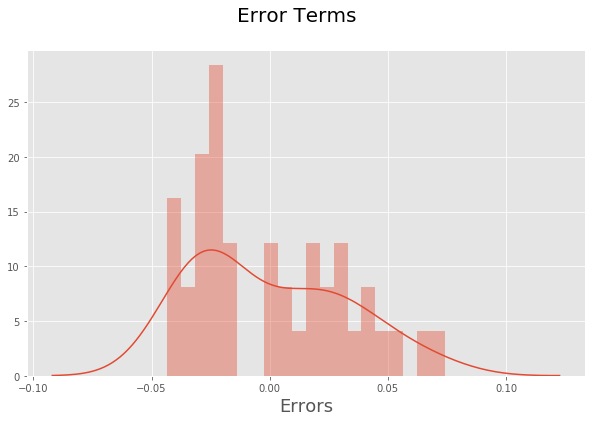

In [525]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [526]:
# y_test = df_test.pop('gmv')
X_test = df_test

In [527]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  adStock_Radio  GamingAccessoryKit  GamingHeadset  GamingMouse  \
25    1.0       0.000000            0.931193       0.856222     0.605735   
48    1.0       0.420988            1.000000       0.512686     0.513142   
52    1.0       0.013580            0.472477       0.220701     0.158303   
37    1.0       0.481185            0.972477       0.361257     0.328554   
6     1.0       0.000000            0.000000       0.000000     0.000000   

    MotionController  
25          0.823529  
48          0.352941  
52          0.647059  
37          0.529412  
6           0.000000

In [528]:
# Making predictions using the fourth model
y_pred = lr1.predict(X_test)

Text(0,0.5,'y_pred')

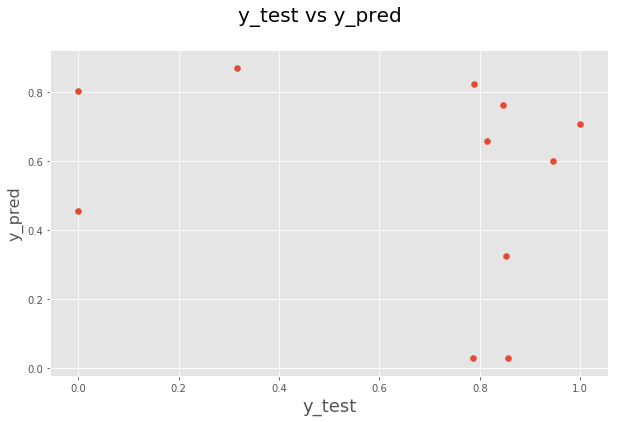

In [529]:
## Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity analysis

In [530]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

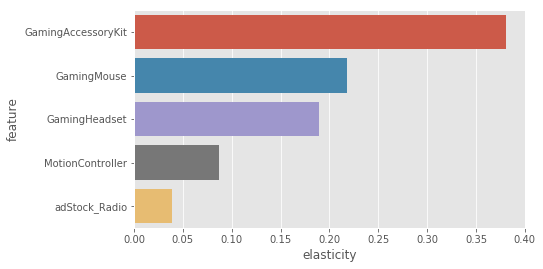

In [531]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### III. Home Audio - Kyock's  model

In [532]:
# creating dataset with lag gmv feature
df = createKyockKPI(final_home_audio_data_with_adstock)
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other           gmv  units       sla  \
0     1.255924            0.0            0.0  7.366000e+04     32  3.093750   
1     1.883887            0.0            0.0  3.394594e+06   1888  7.618513   
2     2.197868            0.0            0.0  4.012062e+06   2204  7.157391   
3     2.354858            0.0            0.0  3.560271e+06   2004  7.137966   
4     1.805811            0.0            0.0  2.588403e+06   1419  7.291076   

   product_procurement_sla  product_mrp  selling_price  discount        NPS  \
0                 3.718750  4108.406250    2301.875000  0.384688  54.599588   
1                 2.797753  3024.204387    1810.233886  0.335811  54.599588   
2                 2.723084  3158.978558    1824.581204  0.349612  54.599588   
3                 2.802618  3155.295065    1781.471803  0.348036  54.599588   
4                 2.683428  3180.561615    1827.348442  0.345241  54.599588   

   total_transactions  total_holiday  is_holiday  total_special_sale_day  \
0                  32            1.0         1.0                     0.0   
1                1869            0.0         0.0                     0.0   
2                2192            0.0         0.0                     2.0   
3                1986            0.0         0.0                     0.0   
4                1412            0.0         0.0                     0.0   

   is_special_sale_day  total_pay_days  is_pay_days  COD_count  Prepaid_count  \
0                  0.0             1.0          1.0        1.0             31   
1                  0.0             0.0          0.0     1442.0            427   
2                  1.0             1.0          1.0     1718.0            474   
3                  0.0             0.0          0.0     1588.0            398   
4                  0.0             1.0          1.0     1117.0            295   

   pct_online_transactions  BoomBox  DJController  Dock  DockingStation  \
0                     0.97      4.0           0.0   0.0             0.0   
1                     0.23     60.0           0.0  30.0             1.0   
2                     0.22     57.0           0.0  50.0             1.0   
3                     0.20     65.0           0.0  56.0             0.0   
4                     0.21     37.0           0.0  44.0             0.0   

   FMRadio  HiFiSystem  HomeAudioSpeaker  SlingBox  SoundMixer  VoiceRecorder  \
0      2.0         0.0              26.0       0.0         0.0            0.0   
1    478.0        13.0            1281.0       0.0         0.0           25.0   
2    532.0        27.0            1511.0       0.0         0.0           26.0   
3    509.0        20.0            1332.0       0.0         0.0           22.0   
4    372.0        11.0             939.0       0.0         0.0           16.0   

        gmv_lag  
0  0.000000e+00  
1  7.366000e+04  
2  3.394594e+06  
3  4.012062e+06  
4  3.560271e+06

In [533]:
# dropping the uncrollable feature
df=df.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [534]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'gmv_lag'],
      dtype='object')

In [535]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [536]:
scaler = MinMaxScaler()

In [537]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'pct_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [538]:
y_train = df_train.pop('gmv')
X_train = df_train

In [539]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [540]:
#selecting the top 20 feature given by rfe
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'discount', 'NPS', 'pct_online_transactions', 'BoomBox',
       'DockingStation', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [541]:
# neglecting the feature not selected by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'adStock_Digital', 'product_procurement_sla',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'DJController',
       'Dock', 'SlingBox', 'gmv_lag'],
      dtype='object')

In [542]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [543]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1600.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.49e-26
Time:                        00:54:47   Log-Likelihood:                 169.49
No. Observations:                  40   AIC:                            -297.0
Df Residuals:                      19   BIC:                            -261.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.221434e+08
5    adStock_Online marketing  3.497200e+03
6         adStock_ Affiliates  3.252190e+03
9               adStock_Other  2.931300e+03
8               adStock_Radio  2.121650e+03
4   adStock_Content Marketing  1.292540e+03
7                 adStock_SEM  9.855800e+02
2                  adStock_TV  7.055000e+02
3         adStock_Sponsorship  2.658600e+02
12                        NPS  5.380000e+01
13    pct_online_transactions  2.364000e+01
1                        Year  1.980000e+01
16                    FMRadio  1.550000e+01
14                    BoomBox  1.354000e+01
18           HomeAudioSpeaker  1.284000e+01
10                        sla  1.083000e+01
20              VoiceRecorder  7.670000e+00
15             DockingStation  6.810000e+00
11                   discount  6.150000e+00
17                 HiFiSystem  5.290000e+00
19                 SoundMixer  4.210000e+00

In [544]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1692.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.50e-28
Time:                        00:54:47   Log-Likelihood:                 168.55
No. Observations:                  40   AIC:                            -297.1
Df Residuals:                      20   BIC:                            -263.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.998392e+08
4    adStock_Online marketing  2.659480e+03
8               adStock_Other  1.708790e+03
5         adStock_ Affiliates  1.522540e+03
7               adStock_Radio  1.433440e+03
3   adStock_Content Marketing  7.219300e+02
6                 adStock_SEM  5.756000e+02
2                  adStock_TV  2.436800e+02
11                        NPS  5.175000e+01
12    pct_online_transactions  2.213000e+01
1                        Year  1.842000e+01
15                    FMRadio  1.273000e+01
9                         sla  1.070000e+01
13                    BoomBox  9.220000e+00
17           HomeAudioSpeaker  8.440000e+00
19              VoiceRecorder  7.610000e+00
14             DockingStation  6.810000e+00
10                   discount  6.150000e+00
16                 HiFiSystem  5.260000e+00
18                 SoundMixer  3.410000e+00

In [545]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["adStock_SEM"], axis = 1)
 # Add a constantDockingStation
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1768.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.29e-29
Time:                        00:54:47   Log-Likelihood:                 167.38
No. Observations:                  40   AIC:                            -296.8
Df Residuals:                      21   BIC:                            -264.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.995482e+08
4    adStock_Online marketing  8.847700e+02
5         adStock_ Affiliates  5.944300e+02
7               adStock_Other  2.565900e+02
6               adStock_Radio  2.539700e+02
2                  adStock_TV  3.267000e+01
10                        NPS  2.527000e+01
3   adStock_Content Marketing  1.392000e+01
1                        Year  1.226000e+01
14                    FMRadio  1.209000e+01
16           HomeAudioSpeaker  8.150000e+00
11    pct_online_transactions  7.000000e+00
12                    BoomBox  6.970000e+00
13             DockingStation  6.560000e+00
18              VoiceRecorder  6.420000e+00
8                         sla  6.400000e+00
15                 HiFiSystem  4.700000e+00
9                    discount  4.610000e+00
17                 SoundMixer  3.410000e+00

In [546]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1930.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.02e-31
Time:                        00:54:47   Log-Likelihood:                 167.06
No. Observations:                  40   AIC:                            -298.1
Df Residuals:                      22   BIC:                            -267.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.564465e+08
4    adStock_Online marketing  8.718200e+02
5         adStock_ Affiliates  5.851400e+02
7               adStock_Other  2.200700e+02
6               adStock_Radio  2.089800e+02
2                  adStock_TV  2.522000e+01
9                         NPS  1.833000e+01
3   adStock_Content Marketing  1.389000e+01
13                    FMRadio  1.109000e+01
1                        Year  9.620000e+00
15           HomeAudioSpeaker  7.340000e+00
11                    BoomBox  6.970000e+00
17              VoiceRecorder  6.210000e+00
12             DockingStation  6.160000e+00
14                 HiFiSystem  4.380000e+00
10    pct_online_transactions  4.080000e+00
8                    discount  4.010000e+00
16                 SoundMixer  3.400000e+00

In [547]:
# Let's remove feature  with highest p-value
X_train_new3 = X_train_new2.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2049.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.13e-32
Time:                        00:54:47   Log-Likelihood:                 166.15
No. Observations:                  40   AIC:                            -298.3
Df Residuals:                      23   BIC:                            -269.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.153579e+08
4    adStock_Online marketing  8.589000e+02
5         adStock_ Affiliates  5.696300e+02
7               adStock_Other  2.200100e+02
6               adStock_Radio  2.087000e+02
2                  adStock_TV  2.501000e+01
9                         NPS  1.777000e+01
3   adStock_Content Marketing  1.325000e+01
1                        Year  7.100000e+00
14           HomeAudioSpeaker  6.320000e+00
12             DockingStation  5.990000e+00
11                    BoomBox  5.920000e+00
16              VoiceRecorder  4.630000e+00
13                 HiFiSystem  3.840000e+00
10    pct_online_transactions  3.830000e+00
8                    discount  3.750000e+00
15                 SoundMixer  3.300000e+00

In [548]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["SoundMixer"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2102.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.15e-33
Time:                        00:54:47   Log-Likelihood:                 164.52
No. Observations:                  40   AIC:                            -297.0
Df Residuals:                      24   BIC:                            -270.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.024684e+08
4    adStock_Online marketing  7.627000e+02
5         adStock_ Affiliates  5.223500e+02
7               adStock_Other  2.059500e+02
6               adStock_Radio  1.987900e+02
2                  adStock_TV  2.497000e+01
9                         NPS  1.288000e+01
3   adStock_Content Marketing  1.200000e+01
1                        Year  6.300000e+00
12             DockingStation  5.820000e+00
14           HomeAudioSpeaker  5.110000e+00
15              VoiceRecorder  4.360000e+00
11                    BoomBox  4.260000e+00
10    pct_online_transactions  3.820000e+00
13                 HiFiSystem  3.740000e+00
8                    discount  3.410000e+00

In [549]:
X_train_new5 = X_train_new4.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2229.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.39e-35
Time:                        00:54:48   Log-Likelihood:                 163.50
No. Observations:                  40   AIC:                            -297.0
Df Residuals:                      25   BIC:                            -271.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const  85475601.08
4    adStock_Online marketing       593.90
5         adStock_ Affiliates       414.34
7               adStock_Other       205.94
6               adStock_Radio       198.75
2                  adStock_TV        21.70
3   adStock_Content Marketing        10.67
11             DockingStation         5.82
1                        Year         5.25
13           HomeAudioSpeaker         4.91
14              VoiceRecorder         4.32
8                    discount         3.39
9     pct_online_transactions         3.25
10                    BoomBox         3.23
12                 HiFiSystem         3.09

In [550]:
X_train_new6 = X_train_new5.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2243.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.42e-36
Time:                        00:54:48   Log-Likelihood:                 161.36
No. Observations:                  40   AIC:                            -294.7
Df Residuals:                      26   BIC:                            -271.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
3    adStock_Online marketing  573.61
4         adStock_ Affiliates  408.55
5               adStock_Radio  173.86
6               adStock_Other  173.05
0                       const   20.32
1                  adStock_TV   18.70
2   adStock_Content Marketing   10.33
10             DockingStation    4.94
12           HomeAudioSpeaker    4.75
13              VoiceRecorder    4.00
7                    discount    3.25
9                     BoomBox    3.23
11                 HiFiSystem    2.88
8     pct_online_transactions    2.80

In [551]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["DockingStation"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2262.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.89e-37
Time:                        00:54:48   Log-Likelihood:                 159.18
No. Observations:                  40   AIC:                            -292.4
Df Residuals:                      27   BIC:                            -270.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
3    adStock_Online marketing  563.15
4         adStock_ Affiliates  400.54
5               adStock_Radio  165.25
6               adStock_Other  164.97
0                       const   20.02
1                  adStock_TV   18.56
2   adStock_Content Marketing    9.85
11           HomeAudioSpeaker    4.70
9                     BoomBox    3.22
7                    discount    3.16
10                 HiFiSystem    2.88
8     pct_online_transactions    2.74
12              VoiceRecorder    1.67

In [552]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2248.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.39e-38
Time:                        00:54:48   Log-Likelihood:                 156.58
No. Observations:                  40   AIC:                            -289.2
Df Residuals:                      28   BIC:                            -268.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
3    adStock_Online marketing  547.58
4         adStock_ Affiliates  396.28
5               adStock_Radio  154.44
6               adStock_Other  152.80
1                  adStock_TV   17.56
0                       const   11.00
2   adStock_Content Marketing    9.23
10           HomeAudioSpeaker    4.21
7                    discount    3.15
9                  HiFiSystem    2.66
8     pct_online_transactions    2.49
11              VoiceRecorder    1.61

In [553]:
# dropping the feature with highest vif
X_train_new9= X_train_new8.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1272.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.62e-35
Time:                        00:54:48   Log-Likelihood:                 142.61
No. Observations:                  40   AIC:                            -263.2
Df Residuals:                      29   BIC:                            -244.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
4               adStock_Radio  86.45
5               adStock_Other  84.68
1                  adStock_TV  15.17
3    adStock_Online marketing  13.56
0                       const  10.55
9            HomeAudioSpeaker   3.79
6                    discount   2.77
2   adStock_Content Marketing   2.70
8                  HiFiSystem   2.58
7     pct_online_transactions   1.86
10              VoiceRecorder   1.54

In [554]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
  
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1451.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.58e-37
Time:                        00:54:48   Log-Likelihood:                 142.46
No. Observations:                  40   AIC:                            -264.9
Df Residuals:                      30   BIC:                            -248.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
4              adStock_Radio  84.46
5              adStock_Other  82.00
1                 adStock_TV  14.71
3   adStock_Online marketing  11.12
0                      const  10.44
8           HomeAudioSpeaker   2.50
7                 HiFiSystem   2.49
2  adStock_Content Marketing   2.40
6    pct_online_transactions   1.61
9              VoiceRecorder   1.48

In [555]:
# dropping the feature with hioghest p-value
X_train_new11= X_train_new10.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1671.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.24e-38
Time:                        00:54:48   Log-Likelihood:                 142.28
No. Observations:                  40   AIC:                            -266.6
Df Residuals:                      31   BIC:                            -251.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
3             adStock_Radio  78.21
4             adStock_Other  74.96
1                adStock_TV  13.25
2  adStock_Online marketing  11.07
0                     const  10.28
6                HiFiSystem   2.49
7          HomeAudioSpeaker   2.25
5   pct_online_transactions   1.53
8             VoiceRecorder   1.36

In [556]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["pct_online_transactions"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1261.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.31e-37
Time:                        00:54:48   Log-Likelihood:                 133.36
No. Observations:                  40   AIC:                            -250.7
Df Residuals:                      32   BIC:                            -237.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
3             adStock_Radio  65.33
4             adStock_Other  62.01
1                adStock_TV  10.44
2  adStock_Online marketing   8.74
0                     const   8.57
5                HiFiSystem   2.49
6          HomeAudioSpeaker   2.12
7             VoiceRecorder   1.34

In [557]:
# dropping the feature with highest p-value
X_train_new13= X_train_new12.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1517.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.11e-39
Time:                        00:54:49   Log-Likelihood:                 133.36
No. Observations:                  40   AIC:                            -252.7
Df Residuals:                      33   BIC:                            -240.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
0                     const  8.57
4                HiFiSystem  2.44
2  adStock_Online marketing  2.34
1                adStock_TV  2.25
5          HomeAudioSpeaker  2.03
3             adStock_Other  1.43
6             VoiceRecorder  1.34

In [558]:
# deleting the features with highest p-values
X_train_new14= X_train_new13.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1875.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.78e-40
Time:                        00:54:49   Log-Likelihood:                 133.36
No. Observations:                  40   AIC:                            -254.7
Df Residuals:                      34   BIC:                            -244.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
0                     const  8.51
3                HiFiSystem  2.24
4          HomeAudioSpeaker  1.99
1  adStock_Online marketing  1.44
2             adStock_Other  1.38
5             VoiceRecorder  1.29

In [559]:
# dropping feature with highest p-value
X_train_new15= X_train_new14.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new15)
  
lr2 = sm.OLS(y_train, X_train_lm1).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2403.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.64e-42
Time:                        00:54:49   Log-Likelihood:                 133.27
No. Observations:                  40   AIC:                            -256.5
Df Residuals:                      35   BIC:                            -248.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0254      0.004  

Features   VIF
0             const  6.96
2        HiFiSystem  2.12
3  HomeAudioSpeaker  1.94
4     VoiceRecorder  1.28
1     adStock_Other  1.23

In [560]:
# dropping feature with highest p-value
X_train_new16= X_train_new15.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new16)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3182.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.08e-43
Time:                        00:54:49   Log-Likelihood:                 132.58
No. Observations:                  40   AIC:                            -257.2
Df Residuals:                      36   BIC:                            -250.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0268      0.004  

Features   VIF
0             const  6.24
1     adStock_Other  1.12
3     VoiceRecorder  1.12
2  HomeAudioSpeaker  1.01

In [561]:
# dropping feature with highest p-value
X_train_new17= X_train_new16.drop(["VoiceRecorder"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new17)
    
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2975.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.36e-41
Time:                        00:54:49   Log-Likelihood:                 122.62
No. Observations:                  40   AIC:                            -239.2
Df Residuals:                      37   BIC:                            -234.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0370      0.004  

Features   VIF
0             const  4.13
1     adStock_Other  1.01
2  HomeAudioSpeaker  1.01

In [562]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9744224081709223
lr model 2 r2_score 0.976488009673609
lr model 3 r2_score 0.9690934501104452


In [563]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.00012618407909257792
lr model 2 MSE 0.00012624671035131
lr model 3 MSE 0.00017052777919139697


#### The best model is model 3 with the minimum number of features but maximum variance of the model being explained. Also, the MSE is the least of the 3rd model

### Residual Analysis


In [564]:
y_train_price = lr3.predict(X_train_lm3)

Text(0.5,0,'Errors')

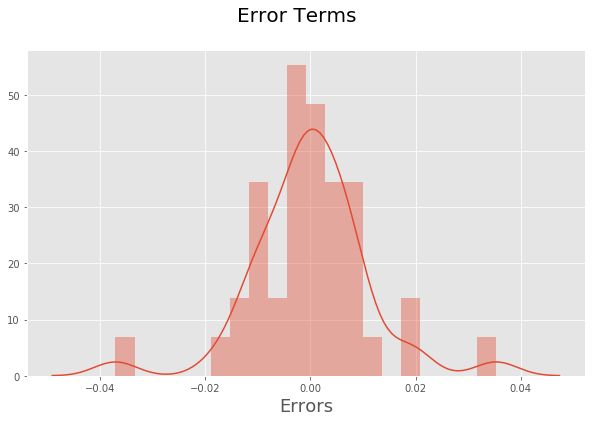

In [565]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [566]:
# y_test = df_test.pop('gmv')
X_test = df_test
y_test = df_test.pop('gmv')

In [567]:
X_test = X_test[X_train_lm3.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Other  HomeAudioSpeaker
6     1.0       0.000000          0.416162
36    1.0       0.470891          0.446061
37    1.0       0.235445          0.379394
28    1.0       1.000000          1.000000
43    1.0       0.368180          0.381414
49    1.0       0.006136          0.194343
5     1.0       0.000000          0.000000
33    1.0       0.753426          0.871515
20    1.0       0.000000          0.960000
42    1.0       0.343635          0.426263

In [568]:
# Making predictions using the fourth model
y_pred = lr3.predict(X_test)

Text(0,0.5,'y_pred')

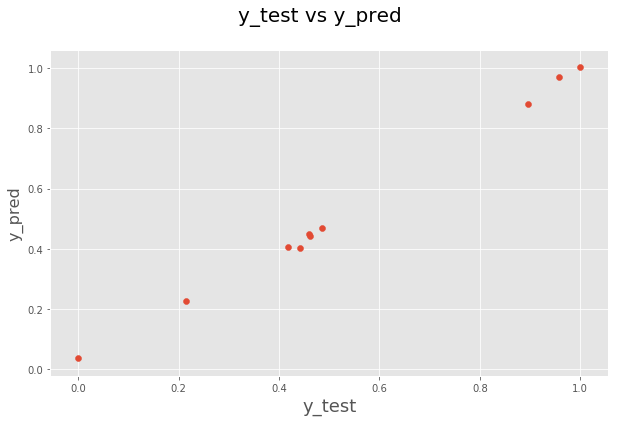

In [569]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity

In [570]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr3.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm3, y_train, coefficients_df)

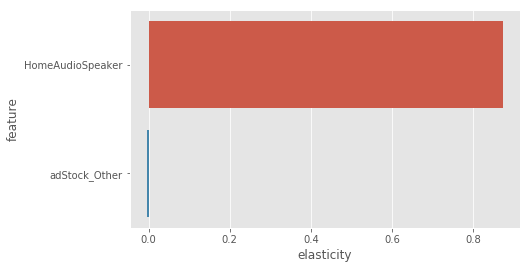

In [571]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Building the Distributed Lag Models

### Distributed Lag Model - Data Preparation

In [572]:
#Creating function to create Lagged KPIs for the Distributed Lag Model
def createKPiForDistributedLag(df):
    df['adStock_TV_lag1'] = df['adStock_TV'].shift(1)
    df['adStock_TV_lag2'] = df['adStock_TV'].shift(2)
    df['adStock_TV_lag3'] = df['adStock_TV'].shift(3)
    
    df['adStock_Digital_lag1'] = df['adStock_Digital'].shift(1)
    df['adStock_Digital_lag2'] = df['adStock_Digital'].shift(2)
    df['adStock_Digital_lag3'] = df['adStock_Digital'].shift(3)
    
    df['adStock_Sponsorship_lag1'] = df['adStock_Sponsorship'].shift(1)
    df['adStock_Sponsorship_lag2'] = df['adStock_Sponsorship'].shift(2)
    df['adStock_Sponsorship_lag3'] = df['adStock_Sponsorship'].shift(3)
    
    df['adStock_Content Marketing_lag1'] = df['adStock_Content Marketing'].shift(1)
    df['adStock_Content Marketing_lag2'] = df['adStock_Content Marketing'].shift(2)
    df['adStock_Content Marketing_lag3'] = df['adStock_Content Marketing'].shift(3)
    
    df['adStock_Online marketing_lag1'] = df['adStock_Online marketing'].shift(1)    
    df['adStock_Online marketing_lag2'] = df['adStock_Online marketing'].shift(2)    
    df['adStock_Online marketing_lag3'] = df['adStock_Online marketing'].shift(3)    
    
    df['adStock_ Affiliates_lag1'] = df['adStock_ Affiliates'].shift(1)
    df['adStock_ Affiliates_lag2'] = df['adStock_ Affiliates'].shift(2)
    df['adStock_ Affiliates_lag3'] = df['adStock_ Affiliates'].shift(3)
    
    df['adStock_SEM_lag1'] = df['adStock_SEM'].shift(1)   
    df['adStock_SEM_lag2'] = df['adStock_SEM'].shift(2)
    df['adStock_SEM_lag3'] = df['adStock_SEM'].shift(3)
    
    df['adStock_Other_lag1'] = df['adStock_Other'].shift(1)   
    df['adStock_Other_lag2'] = df['adStock_Other'].shift(2)
    df['adStock_Other_lag3'] = df['adStock_Other'].shift(3)
    
    df['gmv_lag1'] = df['gmv'].shift(1)   
    df['gmv_lag2'] = df['gmv'].shift(2)
    df['gmv_lag3'] = df['gmv'].shift(3)
    
    df['sla_lag1'] = df['sla'].shift(1)   
    df['sla_lag2'] = df['sla'].shift(2)
    df['sla_lag3'] = df['sla'].shift(3)
    
    df['product_procurement_sla_lag1'] = df['product_procurement_sla'].shift(1)   
    df['product_procurement_sla_lag2'] = df['product_procurement_sla'].shift(2)
    df['product_procurement_sla_lag3'] = df['product_procurement_sla'].shift(3)
    
    df['discount_lag1'] = df['discount'].shift(1)   
    df['discount_lag2'] = df['discount'].shift(2)
    df['discount_lag3'] = df['discount'].shift(3)
    
    df['NPS_lag1'] = df['NPS'].shift(1)   
    df['NPS_lag2'] = df['NPS'].shift(2)
    df['NPS_lag3'] = df['NPS'].shift(3)
    
    df['pct_online_transactions_lag1'] = df['pct_online_transactions'].shift(1)   
    df['pct_online_transactions_lag2'] = df['pct_online_transactions'].shift(2)
    df['pct_online_transactions_lag3'] = df['pct_online_transactions'].shift(3)
    
    return df.fillna(0)

### I. Camera Accessory - Distributed Lag Model

In [573]:
#Creating Lagged KPIs
df = createKPiForDistributedLag(final_camera_data_with_adstock)
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other        gmv  units       sla  \
0     1.255924            0.0            0.0    15375.0     25  2.280000   
1     1.883887            0.0            0.0  2019042.0   2752  7.156274   
2     2.197868            0.0            0.0  2249245.0   2917  6.491321   
3     2.354858            0.0            0.0  2105858.0   2888  6.488138   
4     1.805811            0.0            0.0  1426134.0   1932  6.470684   

   product_procurement_sla  product_mrp  selling_price  discount        NPS  \
0                 2.960000  1456.840000     615.000000  0.525600  54.599588   
1                 2.742586  1646.428137     751.233460  0.462194  54.599588   
2                 2.764789  1630.936238     783.509033  0.465349  54.599588   
3                 2.831776  1560.504313     740.930625  0.455913  54.599588   
4                 2.777959  1524.232356     756.820304  0.450456  54.605438   

   total_transactions  total_holiday  is_holiday  total_special_sale_day  \
0                  25            1.0         1.0                     0.0   
1                2630            0.0         0.0                     0.0   
2                2823            0.0         0.0                     2.0   
3                2782            0.0         0.0                     0.0   
4                1842            0.0         0.0                     0.0   

   is_special_sale_day  total_pay_days  is_pay_days  COD_count  Prepaid_count  \
0                  0.0             1.0          1.0        0.0           25.0   
1                  0.0             0.0          0.0     1796.0          834.0   
2                  1.0             1.0          1.0     1906.0          917.0   
3                  0.0             0.0          0.0     1914.0          868.0   
4                  0.0             1.0          1.0     1315.0          527.0   

   pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
0                     1.00         1.0              1.0        2.0   
1                     0.32       193.0             45.0      328.0   
2                     0.32       247.0             30.0      351.0   
3                     0.31       209.0             44.0      284.0   
4                     0.29       144.0             41.0      175.0   

   CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
0            4.0                   1.0                0.0           0.0   
1          735.0                 224.0               11.0           0.0   
2          770.0                 228.0                5.0           0.0   
3          812.0                 270.0                9.0           0.0   
4          516.0                 194.0                8.0           0.0   

   CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
0              0.0            0.0               0.0          0.0   
1              0.0            0.0               0.0          4.0   
2              0.0            0.0               0.0         11.0   
3              0.0         

In [574]:
df.shape

(52, 95)

In [575]:
#Dropping the features which cannot be handled by the company
df = df.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [576]:
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other        gmv       sla  \
0     1.255924            0.0            0.0    15375.0  2.280000   
1     1.883887            0.0            0.0  2019042.0  7.156274   
2     2.197868            0.0            0.0  2249245.0  6.491321   
3     2.354858            0.0            0.0  2105858.0  6.488138   
4     1.805811            0.0            0.0  1426134.0  6.470684   

   product_procurement_sla  discount        NPS  total_holiday  is_holiday  \
0                 2.960000  0.525600  54.599588            1.0         1.0   
1                 2.742586  0.462194  54.599588            0.0         0.0   
2                 2.764789  0.465349  54.599588            0.0         0.0   
3                 2.831776  0.455913  54.599588            0.0         0.0   
4                 2.777959  0.450456  54.605438            0.0         0.0   

   total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
0                     0.0                  0.0             1.0          1.0   
1                     0.0                  0.0             0.0          0.0   
2                     2.0                  1.0             1.0          1.0   
3                     0.0                  0.0             0.0          0.0   
4                     0.0                  0.0             1.0          1.0   

   pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
0                     1.00         1.0              1.0        2.0   
1                     0.32       193.0             45.0      328.0   
2                     0.32       247.0             30.0      351.0   
3                     0.31       209.0             44.0      284.0   
4                     0.29       144.0             41.0      175.0   

   CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
0            4.0                   1.0                0.0           0.0   
1          735.0                 224.0               11.0           0.0   
2          770.0                 228.0                5.0           0.0   
3          812.0                 270.0                9.0           0.0   
4          516.0                 194.0                8.0           0.0   

   CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
0              0.0            0.0               0.0          0.0   
1              0.0            0.0               0.0          4.0   
2              0.0            0.0               0.0         11.0   
3              0.0            0.0               0.0          7.0   
4              0.0            0.0               0.0          2.0   

   CameraRemoteControl  CameraTripod  ExtensionTube  Filter  Flash  \
0                  1.0          13.0            0.0     0.0    0.0   
1                141.0         433.0            0.0   226.0   17.0   
2                145.0         491.0            0.0   188.0   23.0   
3                108.0         457.0            0.0   194.0   18.0   
4                 82.0         363.0            0.0   112

In [577]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [578]:
scaler = MinMaxScaler()

In [579]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'gmv_lag', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Di

In [580]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'pct_online_transactions',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3', 'pct_online_transactions_lag1',
       'pct_online_transactions_lag2', 'pct_online_transactions_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [581]:
y_train = df_train.pop('gmv')
X_train = df_train

In [582]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [583]:
col = X_train.columns[rfe.support_]
col

Index(['adStock_ Affiliates', 'NPS', 'Binoculars', 'CameraBag',
       'CameraBattery', 'CameraTripod', 'Filter', 'Flash', 'ReflectorUmbrella',
       'Softbox', 'adStock_Sponsorship_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_ Affiliates_lag3', 'adStock_Other_lag2', 'adStock_Other_lag3',
       'sla_lag1', 'product_procurement_sla_lag2',
       'pct_online_transactions_lag1'],
      dtype='object')

In [584]:
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_SEM', 'adStock_Radio',
       'adStock_Other', 'sla', 'product_procurement_sla', 'discount',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days',
       'pct_online_transactions', 'CameraAccessory', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'ExtensionTube', 'FlashShoeAdapter', 'Lens', 'Strap', 'Telescope',
       'gmv_lag', 'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_Onl

In [585]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [586]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     390.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.08e-21
Time:                        00:55:12   Log-Likelihood:                 139.27
No. Observations:                  41   AIC:                            -236.5
Df Residuals:                      20   BIC:                            -200.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
0                            const  288.70
1              adStock_ Affiliates   40.05
14   adStock_Online marketing_lag1   37.93
2                              NPS   29.59
4                        CameraBag   19.66
12  adStock_Content Marketing_lag2   17.96
11        adStock_Sponsorship_lag1   12.83
7                           Filter   11.00
17              adStock_Other_lag3   10.68
19    product_procurement_sla_lag2   10.60
3                       Binoculars   10.45
16              adStock_Other_lag2   10.11
15        adStock_ Affiliates_lag3    9.54
13  adStock_Content Marketing_lag3    9.43
18                        sla_lag1    7.17
5                    CameraBattery    4.97
8                            Flash    4.96
20    pct_online_transactions_lag1    4.58
6                     CameraTripod    4.07
10                         Softbox    2.17
9                ReflectorUmbrella    1.47

In [587]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["ReflectorUmbrella"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     365.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.85e-22
Time:                        00:55:12   Log-Likelihood:                 135.89
No. Observations:                  41   AIC:                            -231.8
Df Residuals:                      21   BIC:                            -197.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
0                            const  281.06
1              adStock_ Affiliates   39.85
13   adStock_Online marketing_lag1   37.21
2                              NPS   28.63
4                        CameraBag   19.45
11  adStock_Content Marketing_lag2   17.35
10        adStock_Sponsorship_lag1   11.60
7                           Filter   10.66
3                       Binoculars   10.40
18    product_procurement_sla_lag2   10.28
12  adStock_Content Marketing_lag3    9.39
16              adStock_Other_lag3    8.93
15              adStock_Other_lag2    8.63
14        adStock_ Affiliates_lag3    8.35
17                        sla_lag1    6.96
5                    CameraBattery    4.97
8                            Flash    4.93
19    pct_online_transactions_lag1    4.56
6                     CameraTripod    4.07
9                          Softbox    2.17

In [588]:
# Let's drop with highest p-value
X_train_new1 = X_train_new.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     379.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.77e-23
Time:                        00:55:12   Log-Likelihood:                 134.59
No. Observations:                  41   AIC:                            -231.2
Df Residuals:                      22   BIC:                            -198.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
0                            const  195.40
12   adStock_Online marketing_lag1   25.64
1                              NPS   18.17
10  adStock_Content Marketing_lag2   17.04
3                        CameraBag   15.85
6                           Filter   10.30
11  adStock_Content Marketing_lag3    9.39
2                       Binoculars    9.04
9         adStock_Sponsorship_lag1    8.83
15              adStock_Other_lag3    8.81
14              adStock_Other_lag2    8.44
13        adStock_ Affiliates_lag3    8.35
17    product_procurement_sla_lag2    8.07
16                        sla_lag1    5.87
4                    CameraBattery    4.95
7                            Flash    4.49
5                     CameraTripod    3.89
18    pct_online_transactions_lag1    2.80
8                          Softbox    2.07

In [589]:
# Let's drop feature Flash with highest VIF
X_train_new2 = X_train_new1.drop(["adStock_Online marketing_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     167.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.78e-20
Time:                        00:55:12   Log-Likelihood:                 115.81
No. Observations:                  41   AIC:                            -195.6
Df Residuals:                      23   BIC:                            -164.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  98.83
3                        CameraBag  15.49
10  adStock_Content Marketing_lag2  13.42
6                           Filter   9.94
2                       Binoculars   8.81
11  adStock_Content Marketing_lag3   8.60
13              adStock_Other_lag2   8.43
14              adStock_Other_lag3   8.30
9         adStock_Sponsorship_lag1   7.61
1                              NPS   7.29
12        adStock_ Affiliates_lag3   5.66
4                    CameraBattery   4.89
16    product_procurement_sla_lag2   4.03
7                            Flash   3.80
5                     CameraTripod   3.64
15                        sla_lag1   3.31
17    pct_online_transactions_lag1   2.17
8                          Softbox   2.07

In [590]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_ Affiliates_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.63e-21
Time:                        00:55:12   Log-Likelihood:                 115.71
No. Observations:                  41   AIC:                            -197.4
Df Residuals:                      24   BIC:                            -168.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  65.75
3                        CameraBag  15.29
10  adStock_Content Marketing_lag2  13.42
6                           Filter   9.87
2                       Binoculars   8.81
11  adStock_Content Marketing_lag3   8.00
12              adStock_Other_lag2   7.83
9         adStock_Sponsorship_lag1   6.79
13              adStock_Other_lag3   6.64
4                    CameraBattery   4.84
1                              NPS   3.97
5                     CameraTripod   3.59
7                            Flash   2.94
15    product_procurement_sla_lag2   2.87
14                        sla_lag1   2.63
16    pct_online_transactions_lag1   2.12
8                          Softbox   2.03

In [591]:
# Let's drop the feature with highest p-value
X_train_new4 = X_train_new3.drop(["adStock_Content Marketing_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     198.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.63e-22
Time:                        00:55:13   Log-Likelihood:                 115.08
No. Observations:                  41   AIC:                            -198.2
Df Residuals:                      25   BIC:                            -170.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  57.88
3                        CameraBag  15.17
6                           Filter   9.69
2                       Binoculars   8.80
11              adStock_Other_lag2   7.28
12              adStock_Other_lag3   6.51
9         adStock_Sponsorship_lag1   4.86
4                    CameraBattery   4.74
5                     CameraTripod   3.58
1                              NPS   3.26
7                            Flash   2.91
10  adStock_Content Marketing_lag2   2.87
14    product_procurement_sla_lag2   2.44
13                        sla_lag1   2.40
8                          Softbox   2.03
15    pct_online_transactions_lag1   1.99

In [592]:
X_train_new5 = X_train_new4.drop(["adStock_Content Marketing_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.38e-23
Time:                        00:55:13   Log-Likelihood:                 114.10
No. Observations:                  41   AIC:                            -198.2
Df Residuals:                      26   BIC:                            -172.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                          const  57.63
3                      CameraBag  14.39
6                         Filter   8.92
2                     Binoculars   8.08
10            adStock_Other_lag2   7.28
11            adStock_Other_lag3   6.49
4                  CameraBattery   4.60
9       adStock_Sponsorship_lag1   3.94
1                            NPS   3.26
5                   CameraTripod   3.21
7                          Flash   2.87
13  product_procurement_sla_lag2   2.38
12                      sla_lag1   2.32
8                        Softbox   1.99
14  pct_online_transactions_lag1   1.86

In [593]:
# Dropping the feature with highest VIF value
X_train_new6 = X_train_new5.drop(["CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.57e-22
Time:                        00:55:13   Log-Likelihood:                 107.95
No. Observations:                  41   AIC:                            -187.9
Df Residuals:                      27   BIC:                            -163.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                          const  55.39
9             adStock_Other_lag2   7.18
10            adStock_Other_lag3   6.49
2                     Binoculars   6.05
5                         Filter   4.84
3                  CameraBattery   3.81
8       adStock_Sponsorship_lag1   3.78
1                            NPS   3.25
6                          Flash   2.81
4                   CameraTripod   2.78
12  product_procurement_sla_lag2   2.38
11                      sla_lag1   2.27
13  pct_online_transactions_lag1   1.85
7                        Softbox   1.66

In [594]:
# Dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["Softbox"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     189.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.70e-23
Time:                        00:55:13   Log-Likelihood:                 107.29
No. Observations:                  41   AIC:                            -188.6
Df Residuals:                      28   BIC:                            -166.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                          const  54.99
8             adStock_Other_lag2   6.74
9             adStock_Other_lag3   6.41
2                     Binoculars   6.04
5                         Filter   4.80
3                  CameraBattery   3.74
7       adStock_Sponsorship_lag1   3.69
1                            NPS   3.17
4                   CameraTripod   2.77
11  product_procurement_sla_lag2   2.37
10                      sla_lag1   2.27
6                          Flash   2.13
12  pct_online_transactions_lag1   1.79

In [595]:
# Dropping the feature with highest VIF
X_train_new8= X_train_new7.drop(["adStock_Other_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     185.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.97e-24
Time:                        00:55:13   Log-Likelihood:                 104.35
No. Observations:                  41   AIC:                            -184.7
Df Residuals:                      29   BIC:                            -164.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                          const  52.41
2                     Binoculars   6.00
5                         Filter   4.79
3                  CameraBattery   3.71
7       adStock_Sponsorship_lag1   3.41
1                            NPS   3.02
4                   CameraTripod   2.77
10  product_procurement_sla_lag2   2.37
9                       sla_lag1   2.27
6                          Flash   2.07
11  pct_online_transactions_lag1   1.63
8             adStock_Other_lag3   1.39

In [596]:
# Dropping the feature with highest VIF
X_train_new9= X_train_new8.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     108.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.05e-20
Time:                        00:55:13   Log-Likelihood:                 90.926
No. Observations:                  41   AIC:                            -159.9
Df Residuals:                      30   BIC:                            -141.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                          const  50.99
4                         Filter   3.72
2                  CameraBattery   3.50
1                            NPS   2.88
6       adStock_Sponsorship_lag1   2.74
3                   CameraTripod   2.68
9   product_procurement_sla_lag2   2.37
8                       sla_lag1   2.27
5                          Flash   1.69
10  pct_online_transactions_lag1   1.59
7             adStock_Other_lag3   1.38

In [597]:
# Dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["adStock_Sponsorship_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     120.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.48e-21
Time:                        00:55:13   Log-Likelihood:                 90.275
No. Observations:                  41   AIC:                            -160.5
Df Residuals:                      31   BIC:                            -143.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                         const  43.34
4                        Filter   3.54
2                 CameraBattery   3.46
3                  CameraTripod   2.65
7                      sla_lag1   2.01
8  product_procurement_sla_lag2   1.94
1                           NPS   1.86
5                         Flash   1.69
9  pct_online_transactions_lag1   1.50
6            adStock_Other_lag3   1.35

In [598]:
# Dropping the feature with highest p-value
X_train_new11= X_train_new10.drop(["sla_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     132.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.61e-22
Time:                        00:55:13   Log-Likelihood:                 89.277
No. Observations:                  41   AIC:                            -160.6
Df Residuals:                      32   BIC:                            -145.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                         const  33.52
4                        Filter   3.51
2                 CameraBattery   3.10
3                  CameraTripod   2.55
1                           NPS   1.56
5                         Flash   1.54
8  pct_online_transactions_lag1   1.41
6            adStock_Other_lag3   1.35
7  product_procurement_sla_lag2   1.26

In [599]:
# Dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["adStock_Other_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     145.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.06e-23
Time:                        00:55:14   Log-Likelihood:                 87.892
No. Observations:                  41   AIC:                            -159.8
Df Residuals:                      33   BIC:                            -146.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                         const  32.98
4                        Filter   3.38
2                 CameraBattery   2.77
3                  CameraTripod   2.53
1                           NPS   1.53
5                         Flash   1.46
7  pct_online_transactions_lag1   1.41
6  product_procurement_sla_lag2   1.26

In [600]:
# Dropping the feature with highest p-value
X_train_new13= X_train_new12.drop(["pct_online_transactions_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     165.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.07e-23
Time:                        00:55:14   Log-Likelihood:                 86.806
No. Observations:                  41   AIC:                            -159.6
Df Residuals:                      34   BIC:                            -147.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                         const  30.66
4                        Filter   3.30
2                 CameraBattery   2.58
3                  CameraTripod   2.48
5                         Flash   1.45
1                           NPS   1.43
6  product_procurement_sla_lag2   1.08

In [601]:
# Dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["product_procurement_sla_lag2"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    # Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     196.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.48e-24
Time:                        00:55:14   Log-Likelihood:                 85.937
No. Observations:                  41   AIC:                            -159.9
Df Residuals:                      35   BIC:                            -149.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0794      0.019      4.108

Features    VIF
0          const  14.77
4         Filter   3.29
2  CameraBattery   2.56
3   CameraTripod   2.42
5          Flash   1.42
1            NPS   1.40

##### Selecting this as the first model as all the p-values & VIFs are in the acceptable range

In [602]:
#Let's try to drop another feature so that still the maximum variance is being capture by the model
X_train_new15= X_train_new14.drop(["Filter"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.24e-19
Time:                        00:55:14   Log-Likelihood:                 67.729
No. Observations:                  41   AIC:                            -125.5
Df Residuals:                      36   BIC:                            -116.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0734      0.030      2.475

Features    VIF
0          const  14.74
2  CameraBattery   1.88
3   CameraTripod   1.85
4          Flash   1.39
1            NPS   1.38

##### Selecting this as the second model as all the p-values & VIFs are in the acceptable range

In [603]:
#Let's try to drop another feature so that still the maximum variance is being capture by the model
X_train_new16= X_train_new15.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.23e-19
Time:                        00:55:14   Log-Likelihood:                 65.266
No. Observations:                  41   AIC:                            -122.5
Df Residuals:                      37   BIC:                            -115.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0315      0.023      1.347

Features   VIF
0          const  8.32
1  CameraBattery  1.88
2   CameraTripod  1.50
3          Flash  1.38

In [604]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.8914214517571981
lr model 2 r2_score 0.7483138575280017
lr model 3 r2_score 0.7110815746917503


In [605]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0018899518660177213
lr model 2 MSE 0.00508769357785707
lr model 3 MSE 0.00517313272550318


#### As we see linear model 1 performs much better having lowest MSE than the other two models, therefore we choose that as the best among the multiplicative models for Camera Category

### Residual Analysis


In [606]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5,0,'Errors')

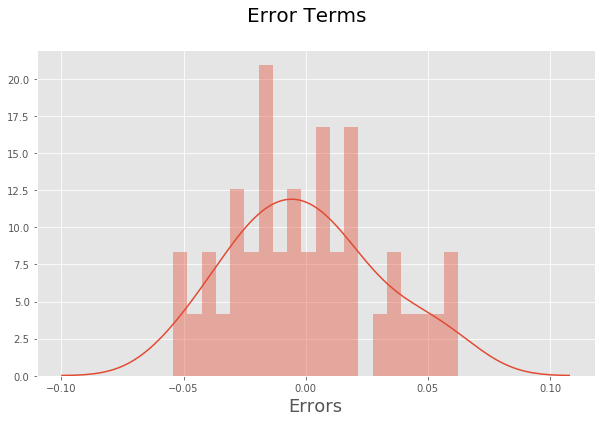

In [607]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [608]:
y_test = df_test.pop('gmv')
X_test = df_test

In [609]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_holiday', 'is_holiday',
       'total_special_sale_day', 'is_special_sale_day', 'total_pay_days',
       'is_pay_days', 'pct_online_transactions', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope', 'gmv_lag',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
 

In [610]:
X_test.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
6           33      8  2015    0.000000         0.387803             0.000000   
32          60      2  2016    0.440584         0.588921             0.211609   
38          66      4  2016    0.990971         0.300736             0.617353   
35          63      3  2016    1.000000         0.579623             0.611897   
33          61      2  2016    0.422372         0.644730             0.222695   

    adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
6                    0.000000                  0.000000             0.000000   
32                   0.718614                  0.866206             0.972552   
38                   0.191557                  0.671023             0.790947   
35                   0.418960                  0.681721             0.785803   
33                   0.696666                  0.857921             0.963873   

    adStock_SEM  adStock_Radio  adStock_Other       sla  \
6      0.000000       0.000000       0.000000  0.752212   
32     0.329271       0.218750       0.218750  0.979147   
38     0.230894       0.241667       0.441460  0.524385   
35     0.251681       0.386667       0.706336  0.843206   
33     0.336290       0.093750       0.093750  1.000000   

    product_procurement_sla  discount       NPS  total_holiday  is_holiday  \
6                  0.000000  1.000000  1.000000            0.0         0.0   
32                 0.565428  0.055216  0.288647            1.0         1.0   
38                 0.484511  0.128248  0.296878            1.0         1.0   
35                 0.500063  0.135462  0.192408            0.0         0.0   
33                 0.442266  0.204454  0.288647            0.0         0.0   

    total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
6                 0.333333                  1.0             1.0          1.0   
32                0.500000                  1.0             1.0          1.0   
38                0.000000                  0.0             1.0          1.0   
35                0.500000                  1.0             0.0          0.0   
33                0.000000                  0.0             0.0          0.0   

    pct_online_transactions  Binoculars  CameraAccessory  CameraBag  \
6                  0.000000    0.000000         0.000000   0.000000   
32                 0.370370    0.876866         1.000000   0.697674   
38                 1.000000    0.925373         0.355932   0.739535   
35                 0.481481    0.910448         0.711864   0.806977   
33                 0.333333    0.985075         0.949153   0.727907   

    CameraBattery  CameraBatteryCharger  CameraBatteryGrip  CameraEyeCup  \
6        0.000000              0.000000                0.0           0.0   
32       1.000000              1.000000                0.4           0.3   
38       0.746073              0.914596                0.4           0.3   
35       0.749346              0.732919                0.3           0.1   
33       0.545812              0.472050                0.3           0.5   

    CameraFilmRolls  CameraHousing  CameraMicrophone  CameraMount  \
6          0.000000            0.0          0.000000     0.000000   
32         0.411765            0.0          0.285714     1.000000   
38         0.403361            0.0          1.000000     0.269231   
35         0.319328            0.0          0.714286     0.750000   
33         0.327731            0.0          0.857143     0.980769   

    CameraRemoteControl  CameraTripod  ExtensionTube    Filter     Flash  \
6              0.000000      0.000000            0.0  0.000000  0.000000   
32             1.000000      0.969427            0.0  0.692308  0.686877   
38             0.860294      0.713376            0.4  0.720000  0.627544   
35             0.985294      0.791083            1.0  1.000000  0.657861   
33             0.963235      0.960510            0.6

In [611]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const       NPS  CameraBattery  CameraTripod    Filter     Flash
6     1.0  1.000000       0.000000      0.000000  0.000000  0.000000
32    1.0  0.288647       1.000000      0.969427  0.692308  0.686877
38    1.0  0.296878       0.746073      0.713376  0.720000  0.627544
35    1.0  0.192408       0.749346      0.791083  1.000000  0.657861
33    1.0  0.288647       0.545812      0.960510  0.649231  0.879168
51    1.0  0.302585       0.165576      0.110828  0.335385  0.225206
5     1.0  1.000000       0.000000      0.000000  0.000000  0.000000
26    1.0  0.050463       0.363874      1.000000  0.695385  0.881767
25    1.0  0.000000       0.419503      0.854777  0.784615  0.360329
45    1.0  0.066216       0.496073      0.537580  0.640000  0.689043
48    1.0  0.302585       0.433246      0.287898  0.670769  1.000000

In [612]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0,0.5,'y_pred')

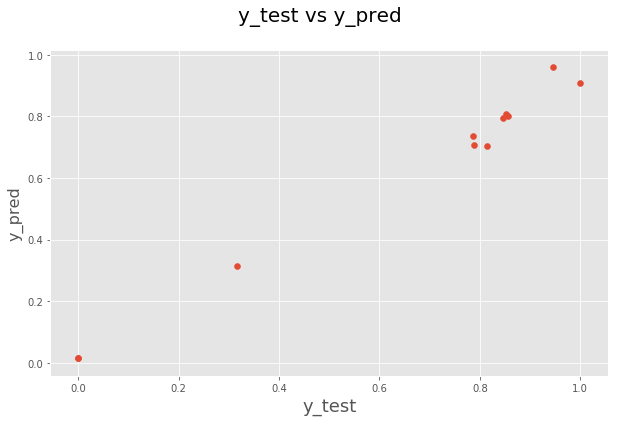

In [613]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity

In [614]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

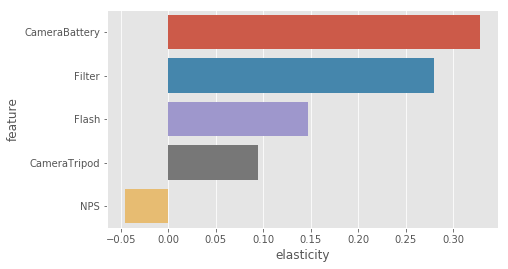

In [615]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### II. Gaming Accessory - Distributed Lag model

In [616]:
# Creating the lagged KPIs for distributed lag model
df = createKPiForDistributedLag(final_gaming_data_with_adstock)

In [617]:
# dropping the uncontrollable features
df = df.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [618]:
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other           gmv       sla  \
0     1.255924            0.0            0.0  2.234400e+04  3.458333   
1     1.883887            0.0            0.0  1.931187e+06  5.367141   
2     2.197868            0.0            0.0  1.614474e+06  5.268874   
3     2.354858            0.0            0.0  1.748798e+06  5.453665   
4     1.805811            0.0            0.0  1.336692e+06  5.696372   

   product_procurement_sla  discount        NPS  total_holiday  is_holiday  \
0                 3.208333  0.316250  54.599588            1.0         1.0   
1                 3.238024  0.419663  54.599588            0.0         0.0   
2                 2.715785  0.450262  54.599588            0.0         0.0   
3                 2.589212  0.396985  54.599588            0.0         0.0   
4                 3.225334  0.462120  54.603017            0.0         0.0   

   total_special_sale_day  is_special_sale_day  total_pay_days  is_pay_days  \
0                     0.0                  0.0             1.0          1.0   
1                     0.0                  0.0             0.0          0.0   
2                     2.0                  1.0             1.0          1.0   
3                     0.0                  0.0             0.0          0.0   
4                     0.0                  0.0             1.0          1.0   

   pct_online_transactions  CoolingPad  GameControlMount  GamePad  \
0                     1.00         0.0               0.0     14.0   
1                     0.26         0.0               0.0    871.0   
2                     0.23         0.0               0.0   1651.0   
3                     0.22         0.0               0.0    922.0   
4                     0.20         0.0               0.0    612.0   

   GamingAccessoryKit  GamingAdapter  GamingChargingStation  GamingHeadset  \
0                 2.0            0.0                    0.0            2.0   
1               100.0           48.0                    0.0          177.0   
2               129.0           44.0                    0.0          179.0   
3               166.0           35.0                    0.0          283.0   
4                95.0           31.0                    0.0          424.0   

   GamingKeyboard  GamingMemoryCard  GamingMouse  GamingMousePad  \
0             1.0               0.0          4.0             1.0   
1           433.0              36.0        971.0            55.0   
2           166.0              27.0        359.0            48.0   
3           174.0              28.0        449.0            67.0   
4            78.0              11.0        239.0            39.0   

   GamingSpeaker  JoystickGamingWheel  MotionController  TVOutCableAccessory  \
0            0.0                  0.0               0.0                  0.0   
1            0.0                 11.0              16.0                 73.0   
2            0.0                  8.0              11.0                 92.0   
3            0.0                 12.0              11.0  

In [619]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [620]:
scaler = MinMaxScaler()

In [621]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'gmv_lag', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'ad

In [622]:
# Apply scaler() to all the columns except the categorical variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
        'total_special_sale_day',
       'total_pay_days', 'pct_online_transactions',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3', 'pct_online_transactions_lag1',
       'pct_online_transactions_lag2', 'pct_online_transactions_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [623]:
y_train = df_train.pop('gmv')
X_train = df_train

In [624]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [625]:
# selecting the top 20 features by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_Online marketing', 'pct_online_transactions', 'GamePad',
       'GamingAccessoryKit', 'GamingHeadset', 'GamingKeyboard', 'GamingMouse',
       'GamingMousePad', 'GamingSpeaker', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Sponsorship_lag2', 'adStock_Content Marketing_lag2',
       'adStock_SEM_lag1', 'adStock_SEM_lag2', 'adStock_SEM_lag3', 'gmv_lag3',
       'product_procurement_sla_lag2'],
      dtype='object')

In [626]:
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'CoolingPad', 'GameControlMount',
       'GamingAdapter', 'GamingChargingStation', 'GamingMemoryCard',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory',
       'gmv_lag', 'adStock_TV_lag1', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_Online marketing_lag3', 'adStock_ Affiliates_lag1',
       'adStock_ Affiliates_lag2', 'adStock_ Affiliates_lag3',
       'adStock_Other_lag

In [627]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [628]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     176.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.69e-19
Time:                        00:55:38   Log-Likelihood:                 124.04
No. Observations:                  42   AIC:                            -206.1
Df Residuals:                      21   BIC:                            -169.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
16                adStock_SEM_lag1  612.26
12            adStock_Digital_lag1  487.57
17                adStock_SEM_lag2  432.45
13            adStock_Digital_lag2  237.19
0                            const   60.90
11                 adStock_TV_lag3   59.88
15  adStock_Content Marketing_lag2   53.82
10                 adStock_TV_lag2   52.27
1         adStock_Online marketing   31.05
18                adStock_SEM_lag3   15.37
5                    GamingHeadset   13.57
8                   GamingMousePad   11.52
14        adStock_Sponsorship_lag2    9.68
7                      GamingMouse    9.47
4               GamingAccessoryKit    8.39
6                   GamingKeyboard    7.11
3                          GamePad    7.02
9                    GamingSpeaker    4.72
19                        gmv_lag3    4.71
2          pct_online_transactions    3.10
20    product_procurement_sla_lag2    2.69

In [629]:
# Let's drop feature GamingAccessoryKit with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Content Marketing_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     191.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.92e-20
Time:                        00:55:38   Log-Likelihood:                 123.69
No. Observations:                  42   AIC:                            -207.4
Df Residuals:                      22   BIC:                            -172.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features     VIF
15              adStock_SEM_lag1  525.68
12          adStock_Digital_lag1  402.70
16              adStock_SEM_lag2  231.28
13          adStock_Digital_lag2  173.92
0                          const   49.91
10               adStock_TV_lag2   41.36
11               adStock_TV_lag3   37.69
1       adStock_Online marketing   23.88
17              adStock_SEM_lag3   14.28
5                  GamingHeadset   12.02
8                 GamingMousePad   11.52
14      adStock_Sponsorship_lag2    9.66
7                    GamingMouse    7.28
3                        GamePad    7.02
4             GamingAccessoryKit    6.46
6                 GamingKeyboard    5.49
9                  GamingSpeaker    4.71
18                      gmv_lag3    4.67
2        pct_online_transactions    2.85
19  product_procurement_sla_lag2    2.69

In [630]:
# Let's drop Year with highest p-value
X_train_new1 = X_train_new.drop(["adStock_Sponsorship_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     194.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.95e-21
Time:                        00:55:38   Log-Likelihood:                 121.91
No. Observations:                  42   AIC:                            -205.8
Df Residuals:                      23   BIC:                            -172.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features     VIF
14              adStock_SEM_lag1  468.94
12          adStock_Digital_lag1  365.88
15              adStock_SEM_lag2  229.18
13          adStock_Digital_lag2  173.82
0                          const   47.83
10               adStock_TV_lag2   36.37
11               adStock_TV_lag3   33.68
1       adStock_Online marketing   23.52
16              adStock_SEM_lag3   14.26
5                  GamingHeadset   12.02
8                 GamingMousePad   10.93
7                    GamingMouse    7.28
3                        GamePad    6.94
4             GamingAccessoryKit    5.97
6                 GamingKeyboard    5.37
9                  GamingSpeaker    4.64
17                      gmv_lag3    4.57
18  product_procurement_sla_lag2    2.63
2        pct_online_transactions    2.62

In [631]:
# Let's drop feature Flash with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_SEM_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.23e-21
Time:                        00:55:38   Log-Likelihood:                 120.20
No. Observations:                  42   AIC:                            -204.4
Df Residuals:                      24   BIC:                            -173.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features     VIF
13          adStock_Digital_lag2  106.05
14              adStock_SEM_lag2  105.68
0                          const   47.71
10               adStock_TV_lag2   33.49
11               adStock_TV_lag3   31.65
1       adStock_Online marketing   13.64
15              adStock_SEM_lag3   12.63
12          adStock_Digital_lag1   12.11
8                 GamingMousePad   10.65
5                  GamingHeadset    9.05
7                    GamingMouse    6.91
3                        GamePad    6.35
4             GamingAccessoryKit    5.34
6                 GamingKeyboard    5.19
9                  GamingSpeaker    4.15
16                      gmv_lag3    3.97
17  product_procurement_sla_lag2    2.63
2        pct_online_transactions    2.59

In [632]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_TV_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     207.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.60e-22
Time:                        00:55:38   Log-Likelihood:                 119.05
No. Observations:                  42   AIC:                            -204.1
Df Residuals:                      25   BIC:                            -174.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features     VIF
13              adStock_SEM_lag2  103.52
12          adStock_Digital_lag2   92.88
0                          const   47.40
1       adStock_Online marketing   12.19
11          adStock_Digital_lag1   11.57
8                 GamingMousePad   10.52
14              adStock_SEM_lag3   10.36
10               adStock_TV_lag3    9.64
5                  GamingHeadset    7.16
7                    GamingMouse    6.77
3                        GamePad    6.35
6                 GamingKeyboard    5.13
4             GamingAccessoryKit    5.07
9                  GamingSpeaker    4.12
15                      gmv_lag3    3.13
2        pct_online_transactions    2.59
16  product_procurement_sla_lag2    2.58

In [633]:
# Let's drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["adStock_SEM_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     217.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.06e-23
Time:                        00:55:38   Log-Likelihood:                 117.92
No. Observations:                  42   AIC:                            -203.8
Df Residuals:                      26   BIC:                            -176.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
12          adStock_Digital_lag2  92.83
13              adStock_SEM_lag2  85.07
0                          const  41.35
1       adStock_Online marketing  12.07
8                 GamingMousePad   9.62
10               adStock_TV_lag3   8.89
11          adStock_Digital_lag1   8.56
5                  GamingHeadset   7.13
7                    GamingMouse   6.76
3                        GamePad   6.25
6                 GamingKeyboard   5.06
4             GamingAccessoryKit   4.78
9                  GamingSpeaker   3.66
14                      gmv_lag3   3.12
2        pct_online_transactions   2.34
15  product_procurement_sla_lag2   2.33

In [634]:
# dropping the feature with highest p-values
X_train_new5 = X_train_new4.drop(["product_procurement_sla_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     232.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.25e-24
Time:                        00:55:38   Log-Likelihood:                 117.05
No. Observations:                  42   AIC:                            -204.1
Df Residuals:                      27   BIC:                            -178.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
12      adStock_Digital_lag2  85.81
13          adStock_SEM_lag2  76.99
0                      const  19.57
1   adStock_Online marketing  12.02
8             GamingMousePad   8.89
10           adStock_TV_lag3   8.83
11      adStock_Digital_lag1   8.36
5              GamingHeadset   6.92
7                GamingMouse   6.72
3                    GamePad   5.50
4         GamingAccessoryKit   4.71
6             GamingKeyboard   4.09
9              GamingSpeaker   3.59
14                  gmv_lag3   3.02
2    pct_online_transactions   2.13

In [635]:
# dropping the feature with highest p -value
X_train_new6 = X_train_new5.drop(["pct_online_transactions"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     235.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.27e-25
Time:                        00:55:38   Log-Likelihood:                 115.00
No. Observations:                  42   AIC:                            -202.0
Df Residuals:                      28   BIC:                            -177.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
11      adStock_Digital_lag2  85.79
12          adStock_SEM_lag2  76.25
0                      const  14.27
1   adStock_Online marketing  11.27
7             GamingMousePad   8.83
10      adStock_Digital_lag1   8.30
4              GamingHeadset   6.89
6                GamingMouse   6.44
9            adStock_TV_lag3   6.04
2                    GamePad   5.49
3         GamingAccessoryKit   4.63
5             GamingKeyboard   4.09
8              GamingSpeaker   3.56
13                  gmv_lag3   2.96

In [636]:
# dropping the feature with highest vif
X_train_new7= X_train_new6.drop(["adStock_Digital_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     188.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.00e-24
Time:                        00:55:38   Log-Likelihood:                 107.96
No. Observations:                  42   AIC:                            -189.9
Df Residuals:                      29   BIC:                            -167.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                      const  13.09
7             GamingMousePad   8.11
11          adStock_SEM_lag2   6.97
10      adStock_Digital_lag1   6.87
6                GamingMouse   6.38
1   adStock_Online marketing   5.91
4              GamingHeadset   5.36
2                    GamePad   4.69
3         GamingAccessoryKit   4.50
5             GamingKeyboard   3.91
9            adStock_TV_lag3   3.90
12                  gmv_lag3   2.46
8              GamingSpeaker   2.02

In [637]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["adStock_SEM_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.09e-25
Time:                        00:55:39   Log-Likelihood:                 106.58
No. Observations:                  42   AIC:                            -189.2
Df Residuals:                      30   BIC:                            -168.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                      const  12.88
7             GamingMousePad   7.97
6                GamingMouse   6.27
1   adStock_Online marketing   5.83
4              GamingHeadset   5.14
2                    GamePad   4.69
3         GamingAccessoryKit   4.44
5             GamingKeyboard   3.63
9            adStock_TV_lag3   3.57
11                  gmv_lag3   2.45
8              GamingSpeaker   1.96
10      adStock_Digital_lag1   1.91

In [638]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["adStock_Digital_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     215.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.36e-26
Time:                        00:55:39   Log-Likelihood:                 105.61
No. Observations:                  42   AIC:                            -189.2
Df Residuals:                      31   BIC:                            -170.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                      const  12.57
7             GamingMousePad   7.18
1   adStock_Online marketing   5.59
4              GamingHeadset   5.13
6                GamingMouse   5.04
2                    GamePad   4.67
3         GamingAccessoryKit   4.27
5             GamingKeyboard   3.62
9            adStock_TV_lag3   3.56
10                  gmv_lag3   2.36
8              GamingSpeaker   1.66

In [639]:
# dropping the features with higest p-value
X_train_new10= X_train_new9.drop(["GamingMousePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     218.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.88e-26
Time:                        00:55:39   Log-Likelihood:                 103.09
No. Observations:                  42   AIC:                            -186.2
Df Residuals:                      32   BIC:                            -168.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  12.57
1  adStock_Online marketing   5.45
2                   GamePad   4.36
3        GamingAccessoryKit   4.25
6               GamingMouse   4.18
4             GamingHeadset   3.52
5            GamingKeyboard   3.52
8           adStock_TV_lag3   3.38
9                  gmv_lag3   2.35
7             GamingSpeaker   1.43

In [640]:
# dropping feature with highest p-value
X_train_new11= X_train_new10.drop(["adStock_TV_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     227.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.39e-26
Time:                        00:55:39   Log-Likelihood:                 100.82
No. Observations:                  42   AIC:                            -183.6
Df Residuals:                      33   BIC:                            -168.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  12.08
2                   GamePad   4.18
3        GamingAccessoryKit   4.15
6               GamingMouse   3.80
4             GamingHeadset   3.45
5            GamingKeyboard   3.07
1  adStock_Online marketing   2.75
8                  gmv_lag3   2.20
7             GamingSpeaker   1.41

In [641]:
X_train_new12= X_train_new11.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     257.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.56e-27
Time:                        00:55:39   Log-Likelihood:                 100.01
No. Observations:                  42   AIC:                            -184.0
Df Residuals:                      34   BIC:                            -170.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0081      0

Features    VIF
0               const  11.14
1             GamePad   4.18
2  GamingAccessoryKit   3.92
5         GamingMouse   3.48
3       GamingHeadset   3.20
4      GamingKeyboard   2.44
7            gmv_lag3   2.12
6       GamingSpeaker   1.37

In [642]:
# dropping the feature with highest p-value
X_train_new13= X_train_new12.drop(["gmv_lag3"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new13)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     285.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.37e-28
Time:                        00:55:39   Log-Likelihood:                 98.351
No. Observations:                  42   AIC:                            -182.7
Df Residuals:                      35   BIC:                            -170.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0172      0

Features   VIF
0               const  9.12
1             GamePad  3.45
5         GamingMouse  3.38
2  GamingAccessoryKit  3.16
4      GamingKeyboard  2.44
3       GamingHeadset  2.43
6       GamingSpeaker  1.35

### Selecting this as our first model based on p-value and vif values

In [643]:
# dropping the features to see the min drop in adj. r2 values
X_train_new14= X_train_new13.drop(["GamePad"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new14)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.08e-25
Time:                        00:55:39   Log-Likelihood:                 85.756
No. Observations:                  42   AIC:                            -159.5
Df Residuals:                      36   BIC:                            -149.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0340      0

Features   VIF
0               const  8.49
4         GamingMouse  3.34
2       GamingHeadset  2.42
3      GamingKeyboard  2.19
1  GamingAccessoryKit  1.77
5       GamingSpeaker  1.31

### Selecting this as our second model based on p-value and vif values

In [644]:
# dropping the features to see the min drop in adj. r2 values
X_train_new15= X_train_new14.drop(["GamingMouse"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new15)
    
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.83e-21
Time:                        00:55:39   Log-Likelihood:                 72.914
No. Observations:                  42   AIC:                            -135.8
Df Residuals:                      37   BIC:                            -127.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0097      0

Features   VIF
0               const  7.78
2       GamingHeadset  1.89
1  GamingAccessoryKit  1.70
3      GamingKeyboard  1.25
4       GamingSpeaker  1.25

### Selecting this as our third model based on p-value and vif values

In [645]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9451248321062955
lr model 2 r2_score 0.9107302998686876
lr model 3 r2_score 0.7725645233738657


In [646]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2,X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"r2_score", -scores.mean())

lr model 1 r2_score 0.0014490373404597162
lr model 2 r2_score 0.002075569577646399
lr model 3 r2_score 0.004543879344320369


### Residual Analysis


In [647]:
y_train_price = lr2.predict(X_train_lm2)

Text(0.5,0,'Errors')

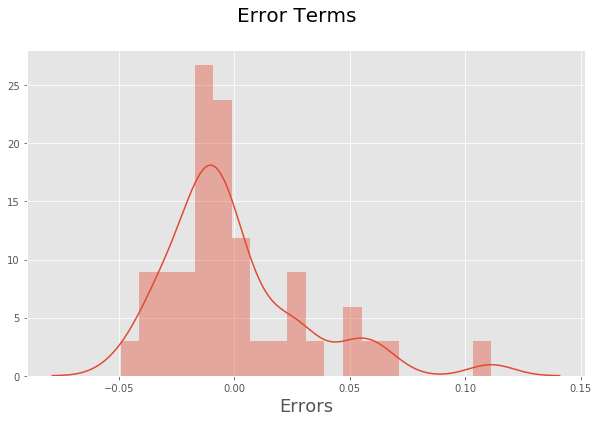

In [648]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [649]:
# y_test = df_test.pop('gmv')
X_test = df_test

In [650]:
X_test = X_test[X_train_lm2.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  GamingAccessoryKit  GamingHeadset  GamingKeyboard  GamingMouse  \
25    1.0            0.931193       0.856222        0.618056     0.605735   
48    1.0            1.000000       0.512686        0.861111     0.513142   
52    1.0            0.472477       0.220701        0.479167     0.158303   
37    1.0            0.972477       0.361257        1.000000     0.328554   
6     1.0            0.000000       0.000000        0.000000     0.000000   

    GamingSpeaker  
25       0.236364  
48       1.000000  
52       0.145455  
37       0.145455  
6        0.000000

In [651]:
# Making predictions using the fourth model
y_pred = lr2.predict(X_test)

Text(0,0.5,'y_pred')

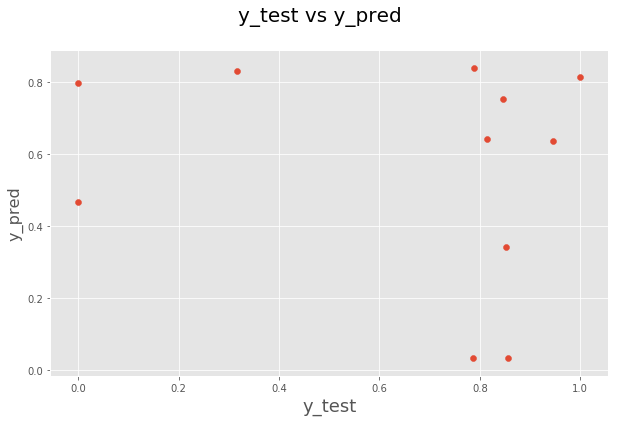

In [652]:
## Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity

In [653]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2, y_train, coefficients_df)

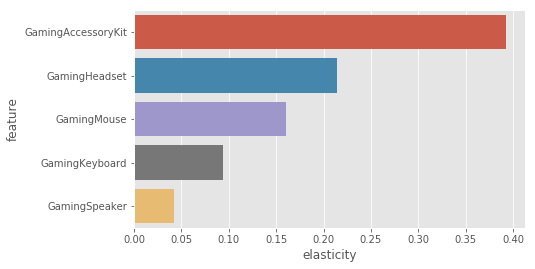

In [654]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### III. Home Audio - Distributed lag  model

In [655]:
# creating lag features
df = createKPiForDistributedLag(final_home_audio_data_with_adstock)
df.head()

order_week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0          27      7  2015    0.053833         0.633253             1.853567   
1          28      7  2015    0.080749         0.949880             2.780351   
2          29      7  2015    0.094207         1.108193             3.243743   
3          30      7  2015    0.100936         1.187350             3.475439   
4          31      8  2015    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other           gmv  units       sla  \
0     1.255924            0.0            0.0  7.366000e+04     32  3.093750   
1     1.883887            0.0            0.0  3.394594e+06   1888  7.618513   
2     2.197868            0.0            0.0  4.012062e+06   2204  7.157391   
3     2.354858            0.0            0.0  3.560271e+06   2004  7.137966   
4     1.805811            0.0            0.0  2.588403e+06   1419  7.291076   

   product_procurement_sla  product_mrp  selling_price  discount        NPS  \
0                 3.718750  4108.406250    2301.875000  0.384688  54.599588   
1                 2.797753  3024.204387    1810.233886  0.335811  54.599588   
2                 2.723084  3158.978558    1824.581204  0.349612  54.599588   
3                 2.802618  3155.295065    1781.471803  0.348036  54.599588   
4                 2.683428  3180.561615    1827.348442  0.345241  54.599588   

   total_transactions  total_holiday  is_holiday  total_special_sale_day  \
0                  32            1.0         1.0                     0.0   
1                1869            0.0         0.0                     0.0   
2                2192            0.0         0.0                     2.0   
3                1986            0.0         0.0                     0.0   
4                1412            0.0         0.0                     0.0   

   is_special_sale_day  total_pay_days  is_pay_days  COD_count  Prepaid_count  \
0                  0.0             1.0          1.0        1.0             31   
1                  0.0             0.0          0.0     1442.0            427   
2                  1.0             1.0          1.0     1718.0            474   
3                  0.0             0.0          0.0     1588.0            398   
4                  0.0             1.0          1.0     1117.0            295   

   pct_online_transactions  BoomBox  DJController  Dock  DockingStation  \
0                     0.97      4.0           0.0   0.0             0.0   
1                     0.23     60.0           0.0  30.0             1.0   
2                     0.22     57.0           0.0  50.0             1.0   
3                     0.20     65.0           0.0  56.0             0.0   
4                     0.21     37.0           0.0  44.0             0.0   

   FMRadio  HiFiSystem  HomeAudioSpeaker  SlingBox  SoundMixer  VoiceRecorder  \
0      2.0         0.0              26.0       0.0         0.0            0.0   
1    478.0        13.0            1281.0       0.0         0.0           25.0   
2    532.0        27.0            1511.0       0.0         0.0           26.0   
3    509.0        20.0            1332.0       0.0         0.0           22.0   
4    372.0        11.0             939.0       0.0         0.0           16.0   

        gmv_lag  adStock_TV_lag1  adStock_TV_lag2  adStock_TV_lag3  \
0  0.000000e+00         0.000000         0.000000         0.000000   
1  7.366000e+04         0.053833         0.000000         0.000000   
2  3.

In [656]:
# dropping the uncontrollable features
df=df.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [657]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'gmv_lag', 'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Onl

In [658]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [659]:
scaler = MinMaxScaler()

In [660]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
        'total_special_sale_day', 
       'total_pay_days',  'pct_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_Online marketing_lag3', 'adStock_ Affiliates_lag1',
       'adStock_ Affiliates_lag2', 'adStock_ Affiliates_lag3',
       'adStock_SEM_lag1', 'adStock_SEM_lag2', 'adStock_SEM_lag3',
       'adStock_Other_lag1', 'adStock_Other_lag2', 'adStock_Other_lag3',
       'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1', 'sla_lag2', 'sla_lag3',
       'product_procurement_sla_lag1', 'product_procurement_sla_lag2',
       'product_procurement_sla_lag3', 'discount_lag1', 'discount_lag2',
       'discount_lag3', 'NPS_lag1', 'NPS_lag2', 'NPS_lag3',
       'pct_online_transactions_lag1', 'pct_online_transactions_lag2',
       'pct_online_transactions_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [661]:
y_train = df_train.pop('gmv')
X_train = df_train

In [662]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [663]:
# selecting features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_Digital', 'adStock_Sponsorship', 'adStock_SEM',
       'adStock_Radio', 'product_procurement_sla', 'discount', 'BoomBox',
       'Dock', 'FMRadio', 'HomeAudioSpeaker', 'adStock_TV_lag1',
       'adStock_TV_lag3', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag3', 'sla_lag2',
       'product_procurement_sla_lag3', 'pct_online_transactions_lag2'],
      dtype='object')

In [664]:
# neglecting the features not selected by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_TV',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_Other', 'sla', 'NPS', 'total_holiday',
       'is_holiday', 'total_special_sale_day', 'is_special_sale_day',
       'total_pay_days', 'is_pay_days', 'pct_online_transactions',
       'DJController', 'DockingStation', 'HiFiSystem', 'SlingBox',
       'SoundMixer', 'VoiceRecorder', 'gmv_lag', 'adStock_TV_lag2',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_ Affiliates_lag2', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag

In [665]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [666]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1179.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.70e-25
Time:                        00:56:02   Log-Likelihood:                 163.38
No. Observations:                  40   AIC:                            -284.8
Df Residuals:                      19   BIC:                            -249.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features      VIF
17       adStock_ Affiliates_lag3  1032.65
15  adStock_Online marketing_lag3   981.99
3                     adStock_SEM   249.94
1                 adStock_Digital   167.56
0                           const    95.92
12                adStock_TV_lag3    36.51
14       adStock_Sponsorship_lag3    33.24
2             adStock_Sponsorship    26.89
11                adStock_TV_lag1    20.11
16       adStock_ Affiliates_lag1    17.38
13       adStock_Sponsorship_lag2    15.99
10               HomeAudioSpeaker    14.17
18                       sla_lag2    11.19
19   product_procurement_sla_lag3    10.16
8                            Dock     9.98
9                         FMRadio     7.55
6                        discount     7.01
7                         BoomBox     6.50
4                   adStock_Radio     4.59
5         product_procurement_sla     3.84
20   pct_online_transactions_lag2     2.87

In [667]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["adStock_ Affiliates_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.95e-27
Time:                        00:56:02   Log-Likelihood:                 163.21
No. Observations:                  40   AIC:                            -286.4
Df Residuals:                      20   BIC:                            -252.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features     VIF
3                     adStock_SEM  211.28
1                 adStock_Digital  140.46
0                           const   94.30
12                adStock_TV_lag3   27.25
2             adStock_Sponsorship   26.75
11                adStock_TV_lag1   18.00
16       adStock_ Affiliates_lag1   17.22
13       adStock_Sponsorship_lag2   15.67
10               HomeAudioSpeaker   13.97
14       adStock_Sponsorship_lag3   13.49
15  adStock_Online marketing_lag3   12.66
17                       sla_lag2   11.18
8                            Dock    9.94
18   product_procurement_sla_lag3    9.83
9                         FMRadio    7.52
6                        discount    6.90
7                         BoomBox    6.41
4                   adStock_Radio    4.22
5         product_procurement_sla    3.83
19   pct_online_transactions_lag2    2.87

In [668]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["adStock_Radio"], axis = 1)
 # Add a constantDockingStation
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1426.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.20e-28
Time:                        00:56:02   Log-Likelihood:                 163.07
No. Observations:                  40   AIC:                            -288.1
Df Residuals:                      21   BIC:                            -256.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features     VIF
3                     adStock_SEM  146.75
1                 adStock_Digital  102.07
0                           const   87.52
15       adStock_ Affiliates_lag1   16.53
12       adStock_Sponsorship_lag2   15.64
2             adStock_Sponsorship   14.94
11                adStock_TV_lag3   14.21
9                HomeAudioSpeaker   13.73
13       adStock_Sponsorship_lag3   13.23
14  adStock_Online marketing_lag3   12.42
7                            Dock    9.94
10                adStock_TV_lag1    9.93
16                       sla_lag2    8.92
8                         FMRadio    7.52
17   product_procurement_sla_lag3    7.48
5                        discount    6.49
6                         BoomBox    6.39
4         product_procurement_sla    3.80
18   pct_online_transactions_lag2    2.56

In [669]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1375.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.51e-29
Time:                        00:56:02   Log-Likelihood:                 160.27
No. Observations:                  40   AIC:                            -284.5
Df Residuals:                      22   BIC:                            -254.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                           const  81.93
11       adStock_Sponsorship_lag2  15.57
10                adStock_TV_lag3  14.21
8                HomeAudioSpeaker  13.65
1             adStock_Sponsorship  11.93
12       adStock_Sponsorship_lag3  11.34
14       adStock_ Affiliates_lag1  10.63
13  adStock_Online marketing_lag3  10.54
6                            Dock   9.93
9                 adStock_TV_lag1   9.01
2                     adStock_SEM   8.87
15                       sla_lag2   8.54
16   product_procurement_sla_lag3   7.22
7                         FMRadio   6.98
5                         BoomBox   6.39
4                        discount   6.33
3         product_procurement_sla   3.80
17   pct_online_transactions_lag2   2.32

In [670]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1373.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.11e-30
Time:                        00:56:02   Log-Likelihood:                 158.16
No. Observations:                  40   AIC:                            -282.3
Df Residuals:                      23   BIC:                            -253.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                           const  78.71
10       adStock_Sponsorship_lag2  15.55
9                 adStock_TV_lag3  12.77
7                HomeAudioSpeaker  11.88
11       adStock_Sponsorship_lag3  10.96
13       adStock_ Affiliates_lag1  10.32
12  adStock_Online marketing_lag3  10.14
5                            Dock   9.74
14                       sla_lag2   8.04
8                 adStock_TV_lag1   7.90
6                         FMRadio   6.96
15   product_procurement_sla_lag3   6.62
4                         BoomBox   6.00
1             adStock_Sponsorship   5.63
3                        discount   5.22
2         product_procurement_sla   3.48
16   pct_online_transactions_lag2   2.05

In [671]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["adStock_Sponsorship_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1399.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.52e-31
Time:                        00:56:02   Log-Likelihood:                 156.39
No. Observations:                  40   AIC:                            -280.8
Df Residuals:                      24   BIC:                            -253.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                           const  78.49
7                HomeAudioSpeaker  11.78
9                 adStock_TV_lag3  11.31
12       adStock_ Affiliates_lag1  10.32
11  adStock_Online marketing_lag3  10.06
5                            Dock   9.56
13                       sla_lag2   7.57
8                 adStock_TV_lag1   7.18
6                         FMRadio   6.96
14   product_procurement_sla_lag3   6.22
4                         BoomBox   5.93
3                        discount   5.12
1             adStock_Sponsorship   5.08
10       adStock_Sponsorship_lag2   4.64
2         product_procurement_sla   3.47
15   pct_online_transactions_lag2   1.98

In [672]:
#Let's drop feature with highest p-value
X_train_new5 = X_train_new4.drop(["adStock_Sponsorship_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1403.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.41e-32
Time:                        00:56:02   Log-Likelihood:                 154.25
No. Observations:                  40   AIC:                            -278.5
Df Residuals:                      25   BIC:                            -253.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                           const  75.15
7                HomeAudioSpeaker  10.84
11       adStock_ Affiliates_lag1  10.26
10  adStock_Online marketing_lag3   9.96
9                 adStock_TV_lag3   8.72
5                            Dock   8.51
8                 adStock_TV_lag1   7.04
6                         FMRadio   6.90
12                       sla_lag2   6.62
4                         BoomBox   5.82
13   product_procurement_sla_lag3   5.57
3                        discount   4.90
2         product_procurement_sla   3.29
1             adStock_Sponsorship   2.94
14   pct_online_transactions_lag2   1.69

In [673]:
#Let's drop feature with highest p-value
X_train_new6 = X_train_new5.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1415.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.35e-33
Time:                        00:56:02   Log-Likelihood:                 152.16
No. Observations:                  40   AIC:                            -276.3
Df Residuals:                      26   BIC:                            -252.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                           const  25.06
9   adStock_Online marketing_lag3   9.81
6                HomeAudioSpeaker   9.35
10       adStock_ Affiliates_lag1   9.28
8                 adStock_TV_lag3   8.53
4                            Dock   7.94
7                 adStock_TV_lag1   7.02
5                         FMRadio   6.86
11                       sla_lag2   6.59
3                         BoomBox   5.77
12   product_procurement_sla_lag3   5.37
2                        discount   3.40
1             adStock_Sponsorship   2.89
13   pct_online_transactions_lag2   1.66

In [674]:
#Let's drop feature with highest p-value
X_train_new7= X_train_new6.drop(["adStock_TV_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1447.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.19e-34
Time:                        00:56:02   Log-Likelihood:                 150.25
No. Observations:                  40   AIC:                            -274.5
Df Residuals:                      27   BIC:                            -252.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                           const  24.90
8   adStock_Online marketing_lag3   9.30
9        adStock_ Affiliates_lag1   9.23
6                HomeAudioSpeaker   9.04
4                            Dock   7.74
5                         FMRadio   6.64
10                       sla_lag2   5.84
3                         BoomBox   5.16
11   product_procurement_sla_lag3   5.03
7                 adStock_TV_lag3   3.73
2                        discount   3.37
1             adStock_Sponsorship   2.08
12   pct_online_transactions_lag2   1.51

In [675]:
#Let's drop feature with highest p-value
X_train_new8= X_train_new7.drop(["sla_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1451.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.53e-35
Time:                        00:56:02   Log-Likelihood:                 147.85
No. Observations:                  40   AIC:                            -271.7
Df Residuals:                      28   BIC:                            -251.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                           const  24.85
9        adStock_ Affiliates_lag1   9.22
8   adStock_Online marketing_lag3   9.07
6                HomeAudioSpeaker   7.55
4                            Dock   6.98
5                         FMRadio   6.63
3                         BoomBox   4.27
7                 adStock_TV_lag3   3.70
2                        discount   3.12
1             adStock_Sponsorship   2.05
10   product_procurement_sla_lag3   1.55
11   pct_online_transactions_lag2   1.30

In [676]:
#Let's drop feature with highest p-value
X_train_new9= X_train_new8.drop(["product_procurement_sla_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1643.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.99e-37
Time:                        00:56:03   Log-Likelihood:                 147.72
No. Observations:                  40   AIC:                            -273.4
Df Residuals:                      29   BIC:                            -254.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                           const  21.39
9        adStock_ Affiliates_lag1   9.18
8   adStock_Online marketing_lag3   8.46
6                HomeAudioSpeaker   7.29
4                            Dock   6.61
5                         FMRadio   6.58
3                         BoomBox   4.07
7                 adStock_TV_lag3   3.70
2                        discount   3.12
1             adStock_Sponsorship   2.05
10   pct_online_transactions_lag2   1.30

In [677]:
#Let's drop feature with highest p-value
X_train_new10= X_train_new9.drop(["adStock_TV_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1717.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.70e-38
Time:                        00:56:03   Log-Likelihood:                 145.81
No. Observations:                  40   AIC:                            -271.6
Df Residuals:                      30   BIC:                            -254.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                          const  20.71
7  adStock_Online marketing_lag3   8.28
8       adStock_ Affiliates_lag1   8.27
6               HomeAudioSpeaker   7.10
4                           Dock   6.54
5                        FMRadio   6.51
3                        BoomBox   3.93
2                       discount   2.92
1            adStock_Sponsorship   2.05
9   pct_online_transactions_lag2   1.14

In [678]:
#Let's drop feature with highest p-value
X_train_new11= X_train_new10.drop(["Dock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1848.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.60e-39
Time:                        00:56:03   Log-Likelihood:                 144.29
No. Observations:                  40   AIC:                            -270.6
Df Residuals:                      31   BIC:                            -255.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                          const  20.69
7       adStock_ Affiliates_lag1   7.29
6  adStock_Online marketing_lag3   6.30
5               HomeAudioSpeaker   6.18
4                        FMRadio   4.84
3                        BoomBox   3.89
2                       discount   2.91
1            adStock_Sponsorship   1.99
8   pct_online_transactions_lag2   1.14

In [679]:
#Let's drop feature with highest p-value
X_train_new12= X_train_new11.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2032.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.65e-40
Time:                        00:56:03   Log-Likelihood:                 142.88
No. Observations:                  40   AIC:                            -269.8
Df Residuals:                      32   BIC:                            -256.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                          const  17.13
6       adStock_ Affiliates_lag1   5.88
5  adStock_Online marketing_lag3   5.38
3                        FMRadio   3.79
2                        BoomBox   3.72
4               HomeAudioSpeaker   3.26
1            adStock_Sponsorship   1.99
7   pct_online_transactions_lag2   1.13

In [680]:
#Let's drop feature with highest p-value
X_train_new13= X_train_new12.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2292.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.20e-42
Time:                        00:56:03   Log-Likelihood:                 141.59
No. Observations:                  40   AIC:                            -269.2
Df Residuals:                      33   BIC:                            -257.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                          const  15.90
4  adStock_Online marketing_lag3   5.30
5       adStock_ Affiliates_lag1   5.04
2                        FMRadio   3.58
1                        BoomBox   3.02
3               HomeAudioSpeaker   2.95
6   pct_online_transactions_lag2   1.13

In [681]:
#Let's drop feature with highest p-value
X_train_new14= X_train_new13.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new14)
    
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2675.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.31e-43
Time:                        00:56:03   Log-Likelihood:                 140.44
No. Observations:                  40   AIC:                            -268.9
Df Residuals:                      34   BIC:                            -258.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Features    VIF
0                          const  13.74
3  adStock_Online marketing_lag3   5.02
4       adStock_ Affiliates_lag1   4.97
2               HomeAudioSpeaker   2.79
1                        FMRadio   2.70
5   pct_online_transactions_lag2   1.13

In [682]:
#Let's drop feature with highest VIF
X_train_new15= X_train_new14.drop(["adStock_Online marketing_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2126.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.07e-41
Time:                        00:56:03   Log-Likelihood:                 130.83
No. Observations:                  40   AIC:                            -251.7
Df Residuals:                      35   BIC:                            -243.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                         const  12.48
2              HomeAudioSpeaker   2.79
1                       FMRadio   2.50
3      adStock_ Affiliates_lag1   1.18
4  pct_online_transactions_lag2   1.05

In [683]:
#Let's drop feature with highest p-value
X_train_new16= X_train_new15.drop(["adStock_ Affiliates_lag1"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new16)
    
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2785.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.18e-42
Time:                        00:56:03   Log-Likelihood:                 129.92
No. Observations:                  40   AIC:                            -251.8
Df Residuals:                      36   BIC:                            -245.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features   VIF
0                         const  7.49
2              HomeAudioSpeaker  2.46
1                       FMRadio  2.42
3  pct_online_transactions_lag2  1.04

In [684]:
#Let's drop feature with highest p-value
X_train_new17= X_train_new16.drop(["pct_online_transactions_lag2"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new17)
    
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3933.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.00e-44
Time:                        00:56:03   Log-Likelihood:                 128.17
No. Observations:                  40   AIC:                            -250.3
Df Residuals:                      37   BIC:                            -245.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0275      0.004  

Features   VIF
0             const  6.37
1           FMRadio  2.36
2  HomeAudioSpeaker  2.36

In [685]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9886694966709888
lr model 2 r2_score 0.9783148868940383


In [686]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1,X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 7.940449972357372e-05
lr model 2 MSE 0.00012385780034221197


#### The best model is model 2 with the minimum number of features but maximum variance of the model being explained. As only two features are able to explain the 97% variance of the model

### Residual Analysis


In [687]:
y_train_price = lr2.predict(X_train_lm2)

Text(0.5,0,'Errors')

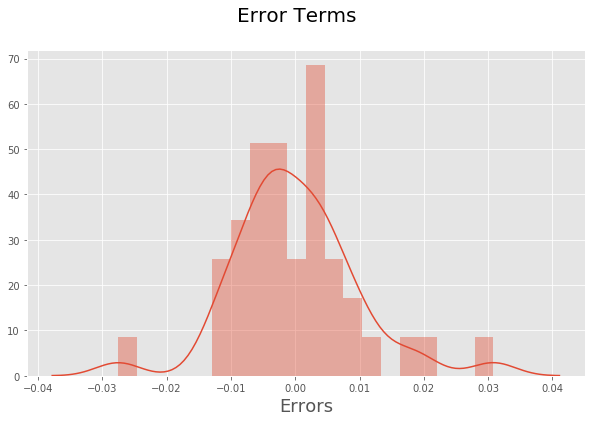

In [688]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [689]:
# y_test = df_test.pop('gmv')
X_test = df_test
y_test = df_test.pop('gmv')

In [690]:
X_test = X_test[X_train_lm2.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const   FMRadio  HomeAudioSpeaker
6     1.0  0.833648          0.416162
36    1.0  0.720227          0.446061
37    1.0  0.725898          0.379394
28    1.0  0.897921          1.000000
43    1.0  0.551985          0.381414
49    1.0  0.164461          0.194343
5     1.0  0.000000          0.000000
33    1.0  1.000000          0.871515
20    1.0  0.843100          0.960000
42    1.0  0.642722          0.426263

In [691]:
# Making predictions using the fourth model
y_pred = lr2.predict(X_test)

Text(0,0.5,'y_pred')

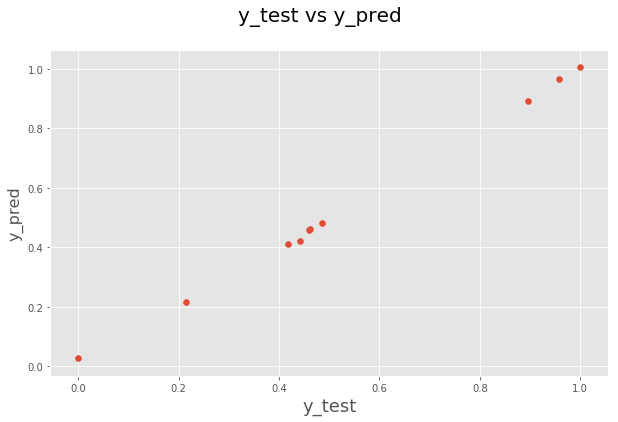

In [692]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Elasticity Analysis - Home Audio - Distributed Lag Model

In [693]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2, y_train, coefficients_df)

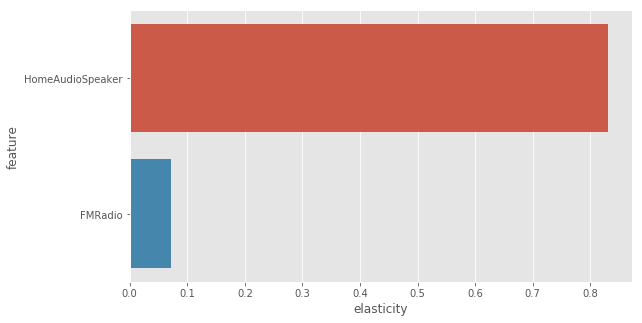

In [694]:
plt.figure(figsize = (9,5))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))